# Separate runs by HKLE due to size limits

# Positions rounded to 1,000

# GPMP are 150bp. TCGA are 101bp.

In [1]:
tcgadata="TCGA/focused.1000.T.csv.gz"

In [2]:
gpmpdata="GPMP/focused.1000.T.csv.gz"

In [3]:
hkle='SVA_B'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [4]:
threshold=3

In [5]:
import numpy as np
np.__version__

'1.21.0'

In [6]:
import pandas as pd
pd.__version__

'1.2.4'

In [7]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [10]:
import scipy
scipy.__version__

'1.7.0'

In [11]:
from scipy import stats

In [12]:
import seaborn as sns
sns.__version__

'0.11.1'

In [13]:
from datetime import datetime

In [14]:
import sklearn
sklearn.__version__

'0.24.2'

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
default_max_columns=pd.get_option('display.max_columns')

In [17]:
default_max_rows=pd.get_option('display.max_rows')

In [18]:
default_precision=pd.get_option('display.precision')

In [19]:
pd.set_option('display.precision', 2)

In [20]:
#default_threshold=np.get_printoptions()['threshold']

In [21]:
#np.set_printoptions(threshold=10000000)

# Read Metadata 1

In [22]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['subject','sequencing','days_to_death','gender1','disease_type','center_name','Unknown'])
mt1['sequencing']=mt1['sequencing'].str[0:20]

In [23]:
mt1.shape

(278, 7)

In [24]:
mt1 #.head()

subject            sequencing  days_to_death gender1  \
0    02-2483  02-2483-01A-01D-1494            NaN    male   
1    02-2483  02-2483-10A-01D-1494            NaN    male   
2    02-2485  02-2485-01A-01D-1494            NaN    male   
3    02-2485  02-2485-10A-01D-1494            NaN    male   
4    06-0125  06-0125-01A-01D-1490         1448.0  female   
..       ...                   ...            ...     ...   
273  TQ-A7RV  TQ-A7RV-02A-11D-A36O            NaN    male   
274  TQ-A7RV  TQ-A7RV-10A-01D-A34A            NaN    male   
275  TQ-A8XE  TQ-A8XE-01A-11D-A36O          954.0  female   
276  TQ-A8XE  TQ-A8XE-02A-11D-A36O          954.0  female   
277  TQ-A8XE  TQ-A8XE-10A-01D-A367          954.0  female   

                 disease_type                         center_name Unknown  
0     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
1     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
2     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
3     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
4     Glioblastoma Multiforme  Broad Institute of MIT and Harvard  9440/3  
..                        ...                                 ...     ...  
273  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  9382/3  
274  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  9382/3  
275  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  9450/3  
276  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  9450/3  
277  Brain Lower Grade Glioma  Broad Institute of MIT and Harvard  9450/3  

[278 rows x 7 columns]

In [25]:
list(mt1)

['subject',
 'sequencing',
 'days_to_death',
 'gender1',
 'disease_type',
 'center_name',
 'Unknown']

# Read Metadata 2

In [26]:
mt2=pd.read_csv("TCGA/TCGA.Glioma.metadata.tsv",sep="\t")

In [27]:
mt2.shape

(1114, 18)

In [28]:
mt2.head()

case_submitter_id project_id primary_diagnosis   race  \
0      TCGA-02-0001   TCGA-GBM      Glioblastoma  white   
1      TCGA-02-0003   TCGA-GBM      Glioblastoma  white   
2      TCGA-02-0004   TCGA-GBM      Glioblastoma  white   
3      TCGA-02-0006   TCGA-GBM      Glioblastoma  white   
4      TCGA-02-0007   TCGA-GBM      Glioblastoma  white   

                ethnicity  gender RE_names IDH     x1p19q TERT  \
0  not hispanic or latino  female      NaN  WT  non-codel  NaN   
1  not hispanic or latino    male      NaN  WT  non-codel  NaN   
2  not hispanic or latino    male      NaN  WT        NaN  NaN   
3  not hispanic or latino  female      NaN  WT  non-codel  NaN   
4  not hispanic or latino  female      NaN  WT  non-codel  NaN   

         IDH_1p19q_status                           WHO_groups  \
0  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
1  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
2         IDH-WT:1p19q-NA                                  NaN   
3  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
4  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   

                     Triple_group     Tissue_sample_location          MGMT  \
0  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
1  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
2         IDH-WT:1p19q-NA:TERT-NA  MD Anderson Cancer Center           NaN   
3  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
4  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   

    Age  Survival_months  Vital_status  
0  44.0            11.76           1.0  
1  50.0             4.73           1.0  
2  59.0            11.33           1.0  
3  56.0            18.33           1.0  
4  40.0            23.16           1.0

In [29]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [30]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [31]:
#mt2[['subject','case_submitter_id']].head()

In [32]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [33]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

# Merge Metadata

In [34]:
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')
#meta=mt2.merge(mt1,on='sequencing',suffixes=["_mt2","_mt1"],how='inner')
#meta.drop('subject',axis='columns',inplace=True)
meta

project_id       primary_diagnosis                       race  \
0     TCGA-GBM            Glioblastoma                      asian   
1     TCGA-GBM            Glioblastoma                      asian   
2     TCGA-GBM            Glioblastoma  black or african american   
3     TCGA-GBM            Glioblastoma  black or african american   
4     TCGA-GBM            Glioblastoma                      white   
..         ...                     ...                        ...   
273   TCGA-LGG        Astrocytoma, NOS                      white   
274   TCGA-LGG        Astrocytoma, NOS                      white   
275   TCGA-LGG  Oligodendroglioma, NOS                      white   
276   TCGA-LGG  Oligodendroglioma, NOS                      white   
277   TCGA-LGG  Oligodendroglioma, NOS                      white   

                  ethnicity gender2                   RE_names     IDH  \
0    not hispanic or latino    male  02-2483-01A-01R-1849-01+1  Mutant   
1    not hispanic or latino    male  02-2483-01A-01R-1849-01+1  Mutant   
2    not hispanic or latino    male  02-2485-01A-01R-1849-01+1      WT   
3    not hispanic or latino    male  02-2485-01A-01R-1849-01+1      WT   
4    not hispanic or latino  female  06-0125-01A-01R-1849-01+1      WT   
..                      ...     ...                        ...     ...   
273      hispanic or latino    male  TQ-A7RV-01A-21R-A34F-07+1  Mutant   
274      hispanic or latino    male  TQ-A7RV-01A-21R-A34F-07+1  Mutant   
275      hispanic or latino  female  TQ-A8XE-01A-11R-A36H-07+1  Mutant   
276      hispanic or latino  female  TQ-A8XE-01A-11R-A36H-07+1  Mutant   
277      hispanic or latino  female  TQ-A8XE-01A-11R-A36H-07+1  Mutant   

        x1p19q    TERT            IDH_1p19q_status  ...   Age Survival_months  \
0    non-codel      WT  IDH-Mutant:1p19q-non-codel  ...  43.0           15.31   
1    non-codel      WT  IDH-Mutant:1p19q-non-codel  ...  43.0           15.31   
2    non-codel  Mutant      IDH-WT:1p19q-non-codel  ...  53.0           15.44   
3    non-codel  Mutant      IDH-WT:1p19q-non-codel  ...  53.0           15.44   
4    non-codel  Mutant      IDH-WT:1p19q-non-codel  ...  63.0           47.57   
..         ...     ...                         ...  ...   ...             ...   
273  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...   NaN             NaN   
274  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...   NaN             NaN   
275  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...   NaN             NaN   
276  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...   NaN             NaN   
277  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...   NaN             NaN   

    Vital_status  subject            sequencing  days_to_death  gender1  \
0            0.0  02-2483  02-2483-01A-01D-1494            NaN     male   
1            0.0  02-2483  02-2483-10A-01D-1494            NaN     male   
2            0.0  02-2485  02-2485-01A-01D-1494            NaN     male   
3            0.0  02-2485  02-2485-10A-01D-1494            NaN     male   
4            1.0  06-0125  06-0125-01A-01D-1490         1448.0   female   
..           ...      ...                   ...            ...      ...   
273          NaN  TQ-A7RV  TQ-A7RV-02A-11D-A36O            NaN     male   
274          NaN  TQ-A7RV  TQ-A7RV-10A-01D-A34A            NaN     male   
275          NaN  TQ-A8XE  TQ-A8XE-01A-11D-A36O          954.0   female   
276          NaN  TQ-A8XE  TQ-A8XE-02A-11D-A36O          954.0   female   
277          NaN  TQ-A8XE  TQ-A8XE-10A-01D-A367          954.0   female   

                 disease_type                         center_name  Unknown  
0     Glioblastoma Multiforme  Broad Institute of MIT and Harvard   9440/3  
1     Glioblastoma Multiforme  Broad Institute of MIT and Harvard   9440/3  
2     Glioblastoma Multiforme  Broad Institute of MIT and Harvard   9440/3  
3     Glioblastoma Multiforme  Broad Institute of MIT and Harvard   9440/3  
4     Glioblastoma Multifor

In [35]:
del mt1
del mt2

In [36]:
meta.head()

project_id primary_diagnosis                       race  \
0   TCGA-GBM      Glioblastoma                      asian   
1   TCGA-GBM      Glioblastoma                      asian   
2   TCGA-GBM      Glioblastoma  black or african american   
3   TCGA-GBM      Glioblastoma  black or african american   
4   TCGA-GBM      Glioblastoma                      white   

                ethnicity gender2                   RE_names     IDH  \
0  not hispanic or latino    male  02-2483-01A-01R-1849-01+1  Mutant   
1  not hispanic or latino    male  02-2483-01A-01R-1849-01+1  Mutant   
2  not hispanic or latino    male  02-2485-01A-01R-1849-01+1      WT   
3  not hispanic or latino    male  02-2485-01A-01R-1849-01+1      WT   
4  not hispanic or latino  female  06-0125-01A-01R-1849-01+1      WT   

      x1p19q    TERT            IDH_1p19q_status  ...   Age Survival_months  \
0  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...  43.0           15.31   
1  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...  43.0           15.31   
2  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...  53.0           15.44   
3  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...  53.0           15.44   
4  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...  63.0           47.57   

  Vital_status  subject            sequencing  days_to_death  gender1  \
0          0.0  02-2483  02-2483-01A-01D-1494            NaN     male   
1          0.0  02-2483  02-2483-10A-01D-1494            NaN     male   
2          0.0  02-2485  02-2485-01A-01D-1494            NaN     male   
3          0.0  02-2485  02-2485-10A-01D-1494            NaN     male   
4          1.0  06-0125  06-0125-01A-01D-1490         1448.0   female   

              disease_type                         center_name  Unknown  
0  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   9440/3  
1  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   9440/3  
2  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   9440/3  
3  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   9440/3  
4  Glioblastoma Multiforme  Broad Institute of MIT and Harvard   9440/3  

[5 rows x 24 columns]

In [37]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [38]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [39]:
meta.drop('subject',axis='columns',inplace=True)

In [40]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'sequencing', 'days_to_death',
       'gender1', 'disease_type', 'center_name', 'Unknown'],
      dtype='object')

In [41]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     78
Oligodendroglioma, NOS           72
Astrocytoma, anaplastic          48
Mixed glioma                     36
Oligodendroglioma, anaplastic    20
Astrocytoma, NOS                 20
Name: primary_diagnosis, dtype: int64

In [42]:
meta['TERT'].value_counts()

Mutant    146
WT        123
Name: TERT, dtype: int64

In [43]:
meta['IDH'].value_counts()

Mutant    163
WT        108
Name: IDH, dtype: int64

In [44]:
meta['x1p19q'].value_counts()

non-codel    226
codel         48
Name: x1p19q, dtype: int64

In [45]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    196
Glioblastoma Multiforme      78
Name: disease_type, dtype: int64

In [46]:
meta['gender1'].value_counts()

male      154
female    120
Name: gender1, dtype: int64

In [47]:
meta['race'].value_counts()

white                        250
black or african american     15
not reported                   7
asian                          2
Name: race, dtype: int64

In [48]:
meta['ethnicity'].value_counts()

not hispanic or latino    235
not reported               23
hispanic or latino         16
Name: ethnicity, dtype: int64

In [49]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    115
IDH-WT:1p19q-non-codel        108
IDH-Mutant:1p19q-codel         48
IDH-NA:1p19q-non-codel          3
Name: IDH_1p19q_status, dtype: int64

In [50]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             64
oligodendroglioma:IDH-Mutant:1p19q-codel        48
astrocytoma:IDH-Mutant:1p19q-non-codel          37
oligodendroglioma:IDH-Mutant:1p19q-non-codel    29
astrocytoma:IDH-WT:1p19q-non-codel              26
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     26
glioblastoma:IDH-Mutant:1p19q-non-codel         11
oligodendroglioma:IDH-WT:1p19q-non-codel        10
oligoastrocytoma:IDH-WT:1p19q-non-codel          8
Name: WHO_groups, dtype: int64

In [51]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        111
IDH-WT:1p19q-non-codel:TERT-Mutant         95
IDH-Mutant:1p19q-codel:TERT-Mutant         46
IDH-WT:1p19q-non-codel:TERT-WT             10
IDH-WT:1p19q-non-codel:TERT-NA              3
IDH-NA:1p19q-non-codel:TERT-Mutant          3
IDH-Mutant:1p19q-codel:TERT-WT              2
IDH-Mutant:1p19q-non-codel:TERT-Mutant      2
IDH-Mutant:1p19q-non-codel:TERT-NA          2
Name: Triple_group, dtype: int64

In [52]:
meta['MGMT'].value_counts()

Methylated      191
Unmethylated     57
Name: MGMT, dtype: int64

In [53]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    174
Harvard Medical School                100
Name: center_name, dtype: int64

## We need a multi-level index to merge with df later so adding an empty index level

not anymore. I flatten before merging.

In [54]:
#meta.columns=[meta.columns,[''] * len(meta.columns)]

In [55]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'sequencing', 'days_to_death',
       'gender1', 'disease_type', 'center_name', 'Unknown'],
      dtype='object')

# Read raw TCGA data and cleanup

In [56]:
tcga_df=pd.read_csv(tcgadata,header=[0,1],index_col=[0,1,2,3])
tcga_df.columns= [' '.join(col).strip() for col in tcga_df.columns.values]
tcga_df #.head()

chr1 1102000  chr1 1308000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 1409000  chr1 1410000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             1   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 1580000  chr1 1581000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 2211000  chr1 3129000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 3315000  chr1 3321000  ...  \
sample               pup    hkle     mapq                              ...   
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0  ...   
         

In [57]:
tcga_df.reset_index(inplace=True)
tcga_df.rename(columns={"sample": "sequencing"},inplace=True)
tcga_df.head()

sequencing     pup      hkle mapq  chr1 1102000  chr1 1308000  \
0  02-2483-01A-01D-1494  paired  HERVK113  Q20             0             0   
1  02-2483-01A-01D-1494  paired     SVA_A  Q20             0             0   
2  02-2483-01A-01D-1494  paired     SVA_B  Q20             0             0   
3  02-2483-01A-01D-1494  paired     SVA_C  Q20             0             0   
4  02-2483-01A-01D-1494  paired     SVA_D  Q20             0             0   

   chr1 1409000  chr1 1410000  chr1 1580000  chr1 1581000  ...  chrY 15075000  \
0             4             1             4             0  ...              0   
1             0             0             0             0  ...              0   
2             0             0             0             0  ...              0   
3             0             0             0             0  ...              0   
4             0             0             0             0  ...              0   

   chrY 15774000  chrY 17181000  chrY 19536000  chrY 19699000  chrY 19700000  \
0              0              0              0              2              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   chrY 20553000  chrY 20976000  chrY 21047000  chrY 21217000  
0              0              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 12554 columns]

In [58]:
tcga_df['sample']=tcga_df['sequencing'].str[0:11]
tcga_df['subject']=tcga_df['sample'].str[0:7]
tcga_df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1024    TQ-A8XE
1025    TQ-A8XE
1026    TQ-A8XE
1027    TQ-A8XE
1028    TQ-A8XE
Name: subject, Length: 1029, dtype: object

In [59]:
tcga_df.columns

Index(['sequencing', 'pup', 'hkle', 'mapq', 'chr1 1102000', 'chr1 1308000',
       'chr1 1409000', 'chr1 1410000', 'chr1 1580000', 'chr1 1581000',
       ...
       'chrY 17181000', 'chrY 19536000', 'chrY 19699000', 'chrY 19700000',
       'chrY 20553000', 'chrY 20976000', 'chrY 21047000', 'chrY 21217000',
       'sample', 'subject'],
      dtype='object', length=12556)

In [60]:
tcga_df=tcga_df[tcga_df['hkle']==hkle]
tcga_df.head()

sequencing     pup   hkle mapq  chr1 1102000  chr1 1308000  \
2   02-2483-01A-01D-1494  paired  SVA_B  Q20             0             0   
9   02-2483-10A-01D-1494  paired  SVA_B  Q20             0             0   
16  02-2485-01A-01D-1494  paired  SVA_B  Q20             0             0   
23  02-2485-10A-01D-1494  paired  SVA_B  Q20             0             0   
30  06-0125-01A-01D-1490  paired  SVA_B  Q20             0             0   

    chr1 1409000  chr1 1410000  chr1 1580000  chr1 1581000  ...  \
2              0             0             0             0  ...   
9              0             0             0             0  ...   
16             0             0             0             0  ...   
23             0             0             0             1  ...   
30             0             0             0             0  ...   

    chrY 17181000  chrY 19536000  chrY 19699000  chrY 19700000  chrY 20553000  \
2               0              0              0              0              0   
9               0              0              0              0              0   
16              0              0              0              0              0   
23              0              0              0              0              0   
30              0              0              0              0              0   

    chrY 20976000  chrY 21047000  chrY 21217000       sample  subject  
2               0              0              0  02-2483-01A  02-2483  
9               0              0              0  02-2483-10A  02-2483  
16              0              0              1  02-2485-01A  02-2485  
23              0              0              0  02-2485-10A  02-2485  
30              0              0              0  06-0125-01A  06-0125  

[5 rows x 12556 columns]

In [61]:
tcga_df.set_index(['subject','sample','sequencing','pup','hkle','mapq'],inplace=True)
tcga_df.head()

chr1 1102000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_B Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_B Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_B Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_B Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_B Q20              0   

                                                            chr1 1308000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_B Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_B Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_B Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_B Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_B Q20              0   

                                                            chr1 1409000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_B Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_B Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_B Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_B Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_B Q20              0   

                                                            chr1 1410000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_B Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_B Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_B Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_B Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_B Q20              0   

                                                            chr1 1580000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_B Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_B Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_B Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_B Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_B Q20              0   

                                                            chr1 1581000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_B Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_B Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_B Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_B Q20              1   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_B Q20              0   

                                                            chr1 2211000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_B Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_B Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_B Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_B Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_B Q20              0   

                                                            chr1 3129000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_B Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_B Q20              0   
02-2485 02-2485-01A 02-24

In [62]:
tcga_df.shape

(147, 12550)

## Remove "hkle", "pup" and "q" as they are useless in this dataset.

In [63]:
tcga_df=tcga_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [64]:
tcga_df #.head()

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             1   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             1   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             1   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0  ...   
        02-2483-10A 02-2483-10A-01D-1494             0         

In [65]:
tcga_df.shape

(147, 12550)

## Drop recurrent tumor (-02?)

## Drop solid normal (-11?) (I've seen a couple)

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [66]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

In [67]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [68]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

In [69]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A', 'CS-5390-10A-01D-1468')],
           names=['subject', 'sample', 'sequencing'])

In [70]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [71]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [72]:
#tcga_counts=pd.read_csv("TCGA/TCGA_raw_counts.csv")
tcga_counts=pd.read_csv('TCGA/sequencing_paired_read_counts.csv',header=None,names=['sequencing','count'])
#rc['sample']=rc['sequencing'].str[0:11]
tcga_counts.head()

#tcga_counts.rename(columns={"subject": "sample"},inplace=True)
#tcga_counts.head()

sequencing       count
0  02-2483-01A-01D-1494   566024474
1  02-2483-10A-01D-1494   579304076
2  02-2485-01A-01D-1494   575060540
3  02-2485-10A-01D-1494   478851061
4  06-0125-01A-01D-1490  1066268796

In [73]:
tcga_df.reset_index(inplace=True)
#tcga_df.columns= [' '.join(col).strip() for col in tcga_df.columns.values]
#tcga_df=tcga_df.merge(tcga_counts,on='sample')
tcga_df=tcga_df.merge(tcga_counts,on='sequencing')
tcga_df.set_index(['subject','sample','sequencing'],inplace=True)
tcga_df.head()

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             1   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0  ...   
        02-2483-10A 02-2483-10A-01D-1494             0             0  ...   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0  ...   
        02-2485-10A 02-2485-10A-01D-1494             0             0  ...   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0  ...   

                                          chrY 15774000  chrY 17181000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              0              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490              0              0   

                                          chrY 19536000  chrY 19699000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              0              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490              0              0   

                                          chrY 19700000  chrY 20553000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              0              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   


In [74]:
tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]]=(
    1e9*tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]].values)/tcga_df[['count']].values


In [75]:
tcga_df.drop('count',axis='columns',inplace=True)
tcga_df

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0          0.00   
        02-2483-10A 02-2483-10A-01D-1494           0.0          0.00   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0          0.00   
        02-2485-10A 02-2485-10A-01D-1494           0.0          2.09   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0          0.00   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0          0.00   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0          1.60   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0          0.00   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0          1.38   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0          0.00   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0  ...   
        02-2483-10A 02-2483-10A-01D-1494           0.0         

In [76]:
tcga_df.drop(tcga_df.columns[tcga_df.sum(axis='index')==0],axis='columns',inplace=True)
tcga_df

chr1 1410000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0          0.00   
        02-2483-10A 02-2483-10A-01D-1494           0.0          0.00   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0          0.00   
        02-2485-10A 02-2485-10A-01D-1494           0.0          2.09   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0          0.00   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0          0.00   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0          1.60   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0          0.00   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0          1.38   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0          0.00   

                                          chr1 3315000  chr1 3321000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 4763000  chr1 5112000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 6304000  chr1 6306000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494          0.00          0.00   
        02-2483-10A 02-2483-10A-01D-1494          0.00          0.00   
02-2485 02-2485-01A 02-2485-01A-01D-1494          0.00          0.00   
        02-2485-10A 02-2485-10A-01D-1494          0.00          0.00   
06-0125 06-0125-01A 06-0125-01A-01D-1490          0.94          0.00   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W          0.00          5.36   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A          0.00          0.00   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A          0.00          0.00   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O          0.00          6.90   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367          0.00          8.08   

                                          chr1 6714000  chr1 6716000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494          0.00          8.83  ...   
        02-2483-10A 02-2483-10A-01D-1494          0.00         

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [77]:
n=tcga_df.copy()    # NORMAL
#t=tcga_df.copy()    # TUMOR

In [78]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
#t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [79]:
#n=n.droplevel('sample',axis='index').droplevel('sequencing',axis='index')
#t=t.droplevel('sample',axis='index')

In [80]:
n

chr1 1410000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494           0.0          0.00   
02-2485 02-2485-10A 02-2485-10A-01D-1494           0.0          2.09   
06-0125 06-0125-10A 06-0125-10A-01D-1490           0.0          1.44   
06-0157 06-0157-10A 06-0157-10A-01D-1491           0.0          1.78   
06-0171 06-0171-10A 06-0171-10A-01D-A33C           0.0          0.00   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086           0.0          0.00   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329           0.0          0.00   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0          0.00   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0          0.00   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0          0.00   

                                          chr1 3315000  chr1 3321000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-10A 06-0125-10A-01D-1490           0.0           0.0   
06-0157 06-0157-10A 06-0157-10A-01D-1491           0.0           0.0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C           0.0           0.0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086           0.0           0.0   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329           0.0           0.0   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 4763000  chr1 5112000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-10A 06-0125-10A-01D-1490           0.0           0.0   
06-0157 06-0157-10A 06-0157-10A-01D-1491           0.0           0.0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C           0.0           0.0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086           0.0           0.0   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329           0.0           0.0   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 6304000  chr1 6306000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494           0.0          0.00   
02-2485 02-2485-10A 02-2485-10A-01D-1494           0.0          0.00   
06-0125 06-0125-10A 06-0125-10A-01D-1490           0.0          0.00   
06-0157 06-0157-10A 06-0157-10A-01D-1491           0.0          0.00   
06-0171 06-0171-10A 06-0171-10A-01D-A33C           0.0          0.00   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086           0.0          3.74   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329           0.0          0.00   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0          5.36   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0          0.00   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0          8.08   

                                          chr1 6714000  chr1 6716000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-10A 02-2483-10A-01D-1494          0.00          5.18  ...   
02-2485 02-2485-10A 02-2485-10A-01D-1494          0.00         

In [81]:
#t.head()

In [82]:
#n_index=n.index
#t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [83]:
#n_index[n_index != t_index]

In [84]:
#ngtet=(n>=threshold)
#tgtet=(t>=threshold)
#
#compdf=((((ngtet)^(tgtet))&(tgtet)).replace([False,True],[0,1]) - 
#        (((ngtet)^(tgtet))&(ngtet)).replace([False,True],[0,1]))

# Tumor only. Could have filtered earlier but here is good too.

In [85]:
#compdf=(t>=threshold).replace([False,True],[0,1])

# Normal only. Could have filtered earlier but here is good too.

In [86]:
compdf=(n>=threshold).replace([False,True],[0,1])

In [87]:
compdf

chr1 1410000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086             0             0   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329             0             0   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 3315000  chr1 3321000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086             0             0   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329             0             0   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 4763000  chr1 5112000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086             0             0   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329             0             0   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 6304000  chr1 6306000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086             0             1   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329             0             0   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             1   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             1   

                                          chr1 6714000  chr1 6716000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             1  ...   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0         

In [88]:
compdf.shape

(73, 5005)

### Keep only positions with any sample with something other than 0

In [89]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [90]:
compdf.shape

(73, 3313)

In [91]:
compdf.head()

chr1 1581000  chr1 3315000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   

                                          chr1 6306000  chr1 6714000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   

                                          chr1 6716000  chr1 7600000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             1             1   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             1   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   

                                          chr1 7602000  chr1 7952000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   

                                          chr1 8503000  chr1 8912000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0  ...   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0  ...   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0  ...   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             1  ...   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0  ...   

                                          chrX 155223000  chrY 4294000  \
subject sample      sequencing                                           
02-2483 02-2483-10A 02-2483-10A-01D-1494               0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494               0             1   
06-0125 06-0125-10A 06-0125-10A-01D-1490               0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491               1             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C               1             0   

                                          chrY 4296000  chrY 7180000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             1   
02-2485 02-2485-10A 02-2485-10A-01D-1494             1             1   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             1   

                                          chrY 8917000  chrY 12352000  \
subject sample      sequencing                                          
02-2483 02-2483-10A 02-2483-10A-01D-1494             0              1   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0              1   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0              0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0              0   
06-0171 06-0171-10A 

### Get the chromosome columns for analysis after merging with the metadata

In [92]:
#chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
#chromosome_columns

### Merge with the metadata for later grouping

In [93]:
compdf.reset_index(inplace=True)
compdf

subject       sample            sequencing  chr1 1581000  chr1 3315000  \
0   02-2483  02-2483-10A  02-2483-10A-01D-1494             0             0   
1   02-2485  02-2485-10A  02-2485-10A-01D-1494             0             0   
2   06-0125  06-0125-10A  06-0125-10A-01D-1490             0             0   
3   06-0157  06-0157-10A  06-0157-10A-01D-1491             0             0   
4   06-0171  06-0171-10A  06-0171-10A-01D-A33C             0             0   
..      ...          ...                   ...           ...           ...   
68  IK-7675  IK-7675-10A  IK-7675-10A-01D-2086             0             0   
69  TM-A7CF  TM-A7CF-10A  TM-A7CF-10A-01D-A329             0             0   
70  TQ-A7RK  TQ-A7RK-10A  TQ-A7RK-10A-01D-A33W             0             0   
71  TQ-A7RV  TQ-A7RV-10A  TQ-A7RV-10A-01D-A34A             0             0   
72  TQ-A8XE  TQ-A8XE-10A  TQ-A8XE-10A-01D-A367             0             0   

    chr1 6306000  chr1 6714000  chr1 6716000  chr1 7600000  chr1 7602000  ...  \
0              0             0             1             1             0  ...   
1              0             0             0             1             0  ...   
2              0             0             0             0             0  ...   
3              0             0             0             0             0  ...   
4              0             0             0             0             0  ...   
..           ...           ...           ...           ...           ...  ...   
68             1             0             0             0             1  ...   
69             0             0             0             0             0  ...   
70             1             0             0             0             0  ...   
71             0             0             0             0             0  ...   
72             1             0             1             0             0  ...   

    chrX 155223000  chrY 4294000  chrY 4296000  chrY 7180000  chrY 8917000  \
0                0             0             0             1             0   
1                0             1             1             1             0   
2                0             0             0             0             0   
3                1             0             0             0             0   
4                1             0             0             1             0   
..             ...           ...           ...           ...           ...   
68               0             1             0             1             0   
69               0             0             0             0             0   
70               0             1             0             1             0   
71               0             1             0             0             0   
72               0             0             0             0             0   

    chrY 12352000  chrY 12452000  chrY 12878000  chrY 19536000  chrY 20553000  
0               1              0              0              0              0  
1               1              1              0              0              0  
2               0              0              0              0              0  
3               0              0              0              0              0  
4               0              1              0              0              0  
..            ...            ...            ...            ...            ...  
68              0              0              0              0              0  
69              0              0              0              0              0  
70              0              0              0              0              0  
71              0              1              0              0              0  
72              0              0              0              0              0  

[73 rows x 3316 columns]

In [94]:
compdf['sequencing']

0     02-2483-10A-01D-1494
1     02-2485-10A-01D-1494
2     06-0125-10A-01D-1490
3     06-0157-10A-01D-1491
4     06-0171-10A-01D-A33C
              ...         
68    IK-7675-10A-01D-2086
69    TM-A7CF-10A-01D-A329
70    TQ-A7RK-10A-01D-A33W
71    TQ-A7RV-10A-01D-A34A
72    TQ-A8XE-10A-01D-A367
Name: sequencing, Length: 73, dtype: object

In [95]:
meta['sequencing']

0      02-2483-01A-01D-1494
1      02-2483-10A-01D-1494
2      02-2485-01A-01D-1494
3      02-2485-10A-01D-1494
4      06-0125-01A-01D-1490
               ...         
273    TQ-A7RV-02A-11D-A36O
274    TQ-A7RV-10A-01D-A34A
275    TQ-A8XE-01A-11D-A36O
276    TQ-A8XE-02A-11D-A36O
277    TQ-A8XE-10A-01D-A367
Name: sequencing, Length: 274, dtype: object

In [96]:
#compdf=compdf.merge(meta,on='subject')
compdf=compdf.merge(meta,on='sequencing')
compdf

subject       sample            sequencing  chr1 1581000  chr1 3315000  \
0   02-2483  02-2483-10A  02-2483-10A-01D-1494             0             0   
1   02-2485  02-2485-10A  02-2485-10A-01D-1494             0             0   
2   06-0125  06-0125-10A  06-0125-10A-01D-1490             0             0   
3   06-0157  06-0157-10A  06-0157-10A-01D-1491             0             0   
4   06-0171  06-0171-10A  06-0171-10A-01D-A33C             0             0   
..      ...          ...                   ...           ...           ...   
68  IK-7675  IK-7675-10A  IK-7675-10A-01D-2086             0             0   
69  TM-A7CF  TM-A7CF-10A  TM-A7CF-10A-01D-A329             0             0   
70  TQ-A7RK  TQ-A7RK-10A  TQ-A7RK-10A-01D-A33W             0             0   
71  TQ-A7RV  TQ-A7RV-10A  TQ-A7RV-10A-01D-A34A             0             0   
72  TQ-A8XE  TQ-A8XE-10A  TQ-A8XE-10A-01D-A367             0             0   

    chr1 6306000  chr1 6714000  chr1 6716000  chr1 7600000  chr1 7602000  ...  \
0              0             0             1             1             0  ...   
1              0             0             0             1             0  ...   
2              0             0             0             0             0  ...   
3              0             0             0             0             0  ...   
4              0             0             0             0             0  ...   
..           ...           ...           ...           ...           ...  ...   
68             1             0             0             0             1  ...   
69             0             0             0             0             0  ...   
70             1             0             0             0             0  ...   
71             0             0             0             0             0  ...   
72             1             0             1             0             0  ...   

               Tissue_sample_location          MGMT   Age  Survival_months  \
0           MD Anderson Cancer Center    Methylated  43.0            15.31   
1           MD Anderson Cancer Center  Unmethylated  53.0            15.44   
2                 Henry Ford Hospital    Methylated  63.0            47.57   
3                 Henry Ford Hospital           NaN  63.0             3.19   
4                 Henry Ford Hospital           NaN  65.0            13.11   
..                                ...           ...   ...              ...   
68              Christiana Healthcare    Methylated  43.0            18.99   
69  The University of New South Wales    Methylated  41.0            48.36   
70            University of Sao Paulo    Methylated   NaN              NaN   
71            University of Sao Paulo    Methylated   NaN              NaN   
72            University of Sao Paulo    Methylated   NaN              NaN   

    Vital_status  days_to_death  gender1              disease_type  \
0            0.0            NaN     male   Glioblastoma Multiforme   
1            0.0            NaN     male   Glioblastoma Multiforme   
2            1.0         1448.0   female   Glioblastoma Multiforme   
3            1.0           97.0   female   Glioblastoma Multiforme   
4            1.0          399.0     male   Glioblastoma Multiforme   
..           ...            ...      ...                       ...   
68           1.0          578.0     male  Brain Lower Grade Glioma   
69           0.0            NaN   female  Brain Lower Grade Glioma   
70           NaN            NaN     male  Brain Lower Grade Glioma   
71           NaN            NaN     male  Brain Lower Grade Glioma   
72           NaN          954.0   female  Brain Lower Grade Glioma   

                           center_name  Unknown  
0   Broad Institute of MIT and Harvard   9440/3  
1   Broad Institute of MIT and Harvard   9440/3  
2   Broad Institute of MIT and Harvard   9440/3  
3   Broad Institute of MIT and Harvard   9440/3  
4   Broad Institute of MIT and Harvard   9440/3  
..              

In [97]:
compdf.set_index(['subject','sample','sequencing'],inplace=True)
compdf

chr1 1581000  chr1 3315000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086             0             0   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329             0             0   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 6306000  chr1 6714000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086             1             0   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329             0             0   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             1             0   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367             1             0   

                                          chr1 6716000  chr1 7600000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             1             1   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             1   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086             0             0   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329             0             0   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367             1             0   

                                          chr1 7602000  chr1 7952000  \
subject sample      sequencing                                         
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-10A 06-0125-10A-01D-1490             0             0   
06-0157 06-0157-10A 06-0157-10A-01D-1491             0             0   
06-0171 06-0171-10A 06-0171-10A-01D-A33C             0             0   
...                                                ...           ...   
IK-7675 IK-7675-10A IK-7675-10A-01D-2086             1             0   
TM-A7CF TM-A7CF-10A TM-A7CF-10A-01D-A329             0             1   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             1   
TQ-A7RV TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             1   
TQ-A8XE TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 8503000  chr1 8912000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-10A 02-2483-10A-01D-1494             0             0  ...   
02-2485 02-2485-10A 02-2485-10A-01D-1494             0         

In [98]:
#list(compdf)


In [99]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column, fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [100]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:43:43'

### Flatten the multi-level column names

In [101]:
#compdf.columns= [' '.join(col).strip() for col in compdf.columns.values]
#compdf #.head()

### Reset Index

In [102]:
compdf.reset_index(inplace=True)
compdf.head(2)

subject       sample            sequencing  chr1 1581000  chr1 3315000  \
0  02-2483  02-2483-10A  02-2483-10A-01D-1494             0             0   
1  02-2485  02-2485-10A  02-2485-10A-01D-1494             0             0   

   chr1 6306000  chr1 6714000  chr1 6716000  chr1 7600000  chr1 7602000  ...  \
0             0             0             1             1             0  ...   
1             0             0             0             1             0  ...   

      Tissue_sample_location          MGMT   Age  Survival_months  \
0  MD Anderson Cancer Center    Methylated  43.0            15.31   
1  MD Anderson Cancer Center  Unmethylated  53.0            15.44   

   Vital_status  days_to_death  gender1             disease_type  \
0           0.0            NaN     male  Glioblastoma Multiforme   
1           0.0            NaN     male  Glioblastoma Multiforme   

                          center_name  Unknown  
0  Broad Institute of MIT and Harvard   9440/3  
1  Broad Institute of MIT and Harvard   9440/3  

[2 rows x 3338 columns]

In [103]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:43:43'

disease_type
T-Testing
Boxplotting
 p : 5.6655084315569635e-18  ( t : 11.554845549490993 ) :  chr9 74853000


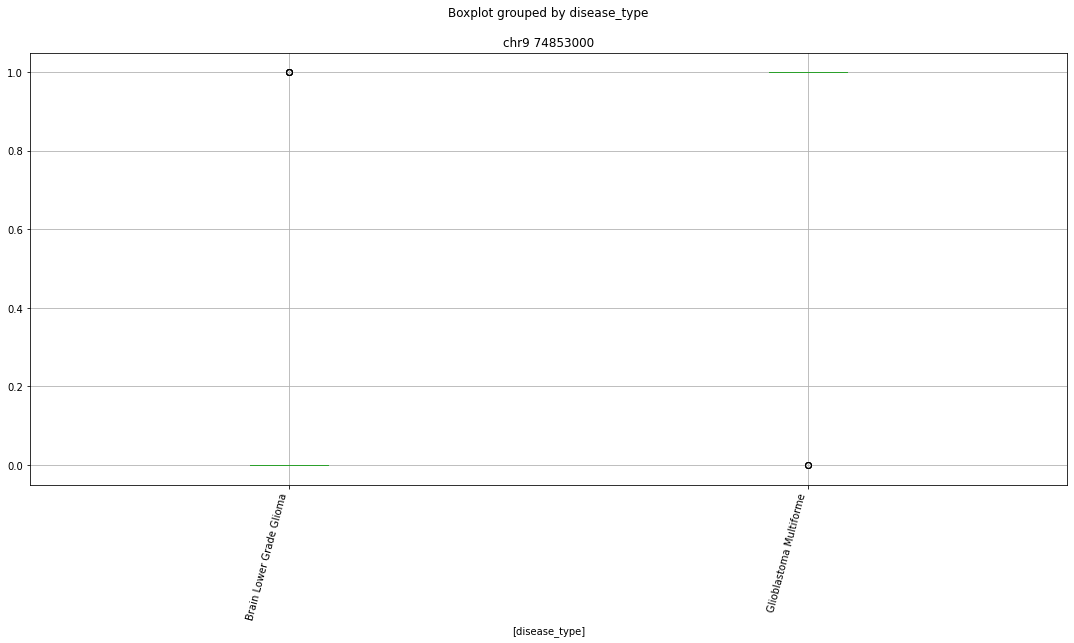

 p : 1.2480988517868185e-16  ( t : 10.797116094925201 ) :  chr3 119243000


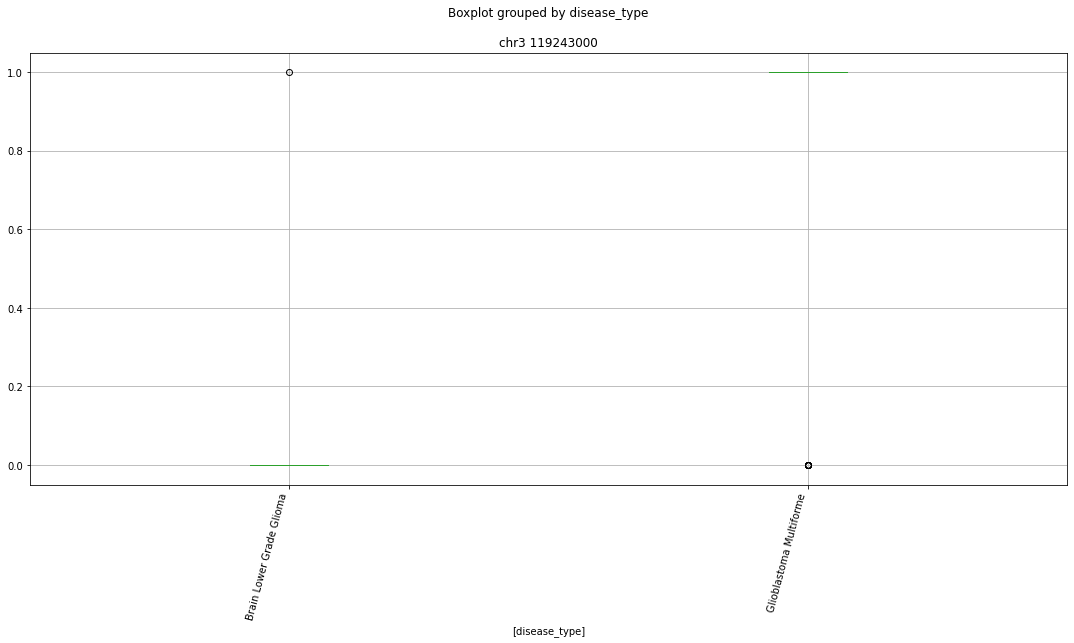

 p : 1.5411833978375324e-14  ( t : 9.642772086443424 ) :  chr18 51116000


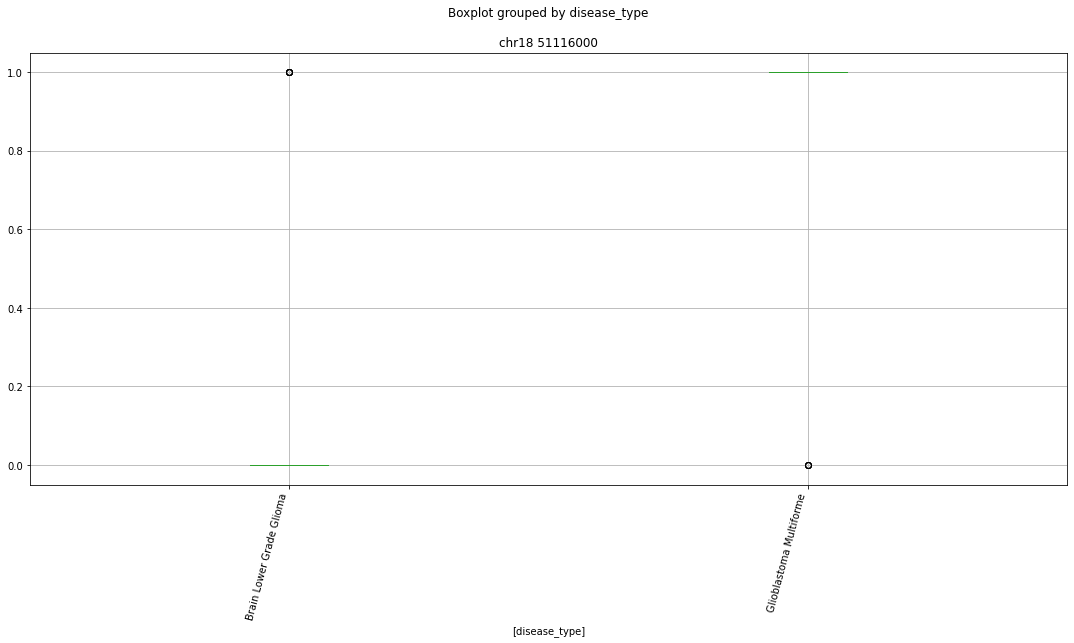

 p : 3.3864941393068684e-14  ( t : 9.456395760043183 ) :  chr4 40787000


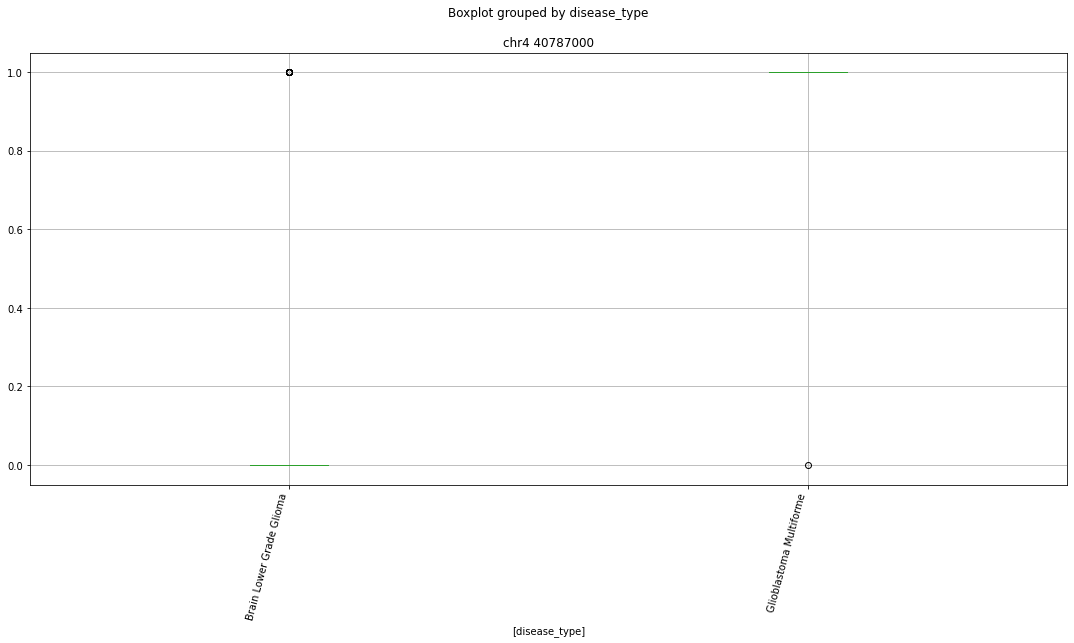

 p : 2.0557708470858964e-13  ( t : 9.031208501954975 ) :  chr6 25585000


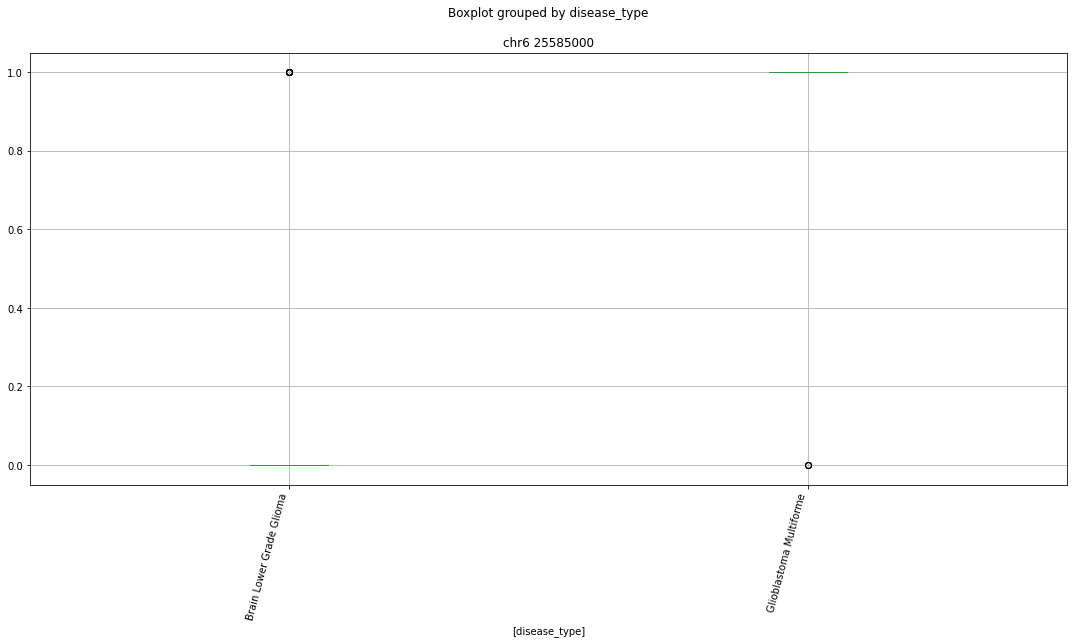

 p : 3.230994299523944e-13  ( t : 8.924928080877834 ) :  chr12 63687000


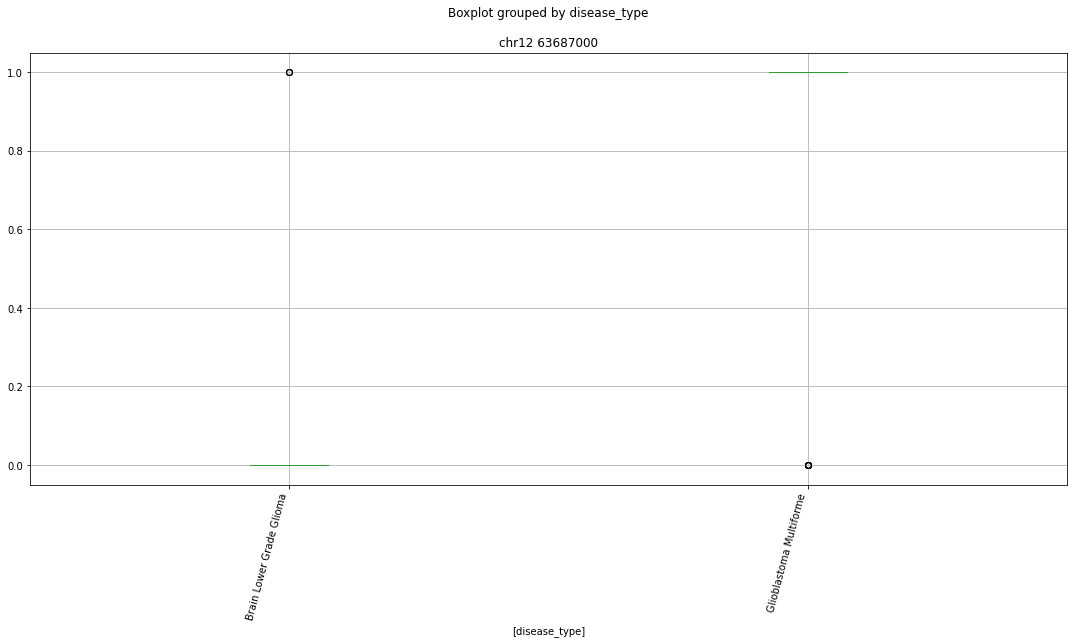

 p : 3.5067033030961863e-13  ( t : 8.905691017720823 ) :  chr6 159661000


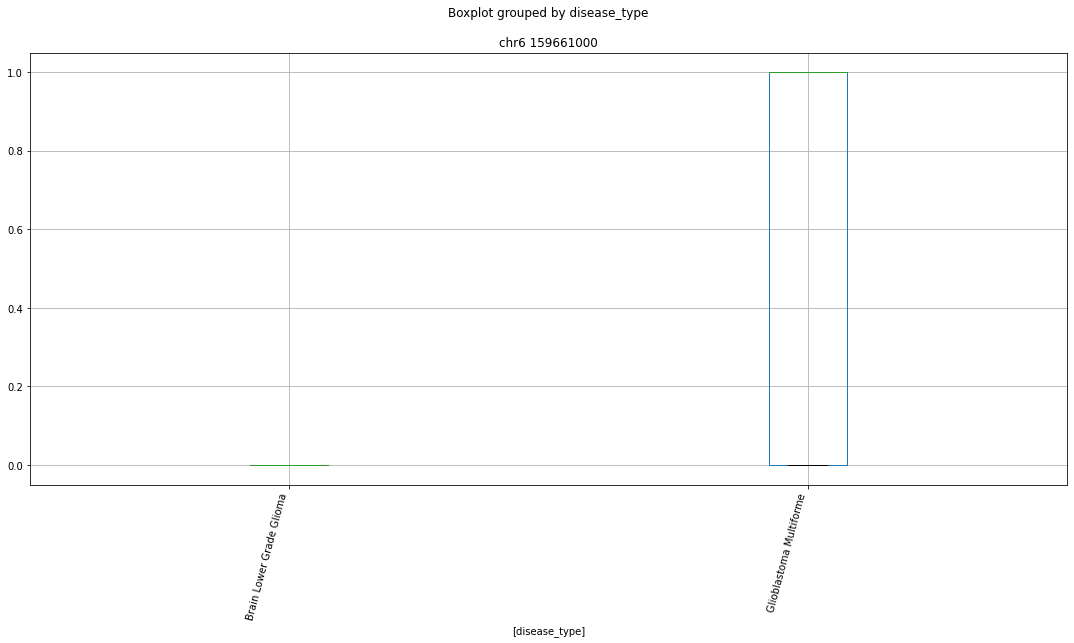

 p : 4.94184080440652e-12  ( t : 8.28545219165828 ) :  chr4 113797000


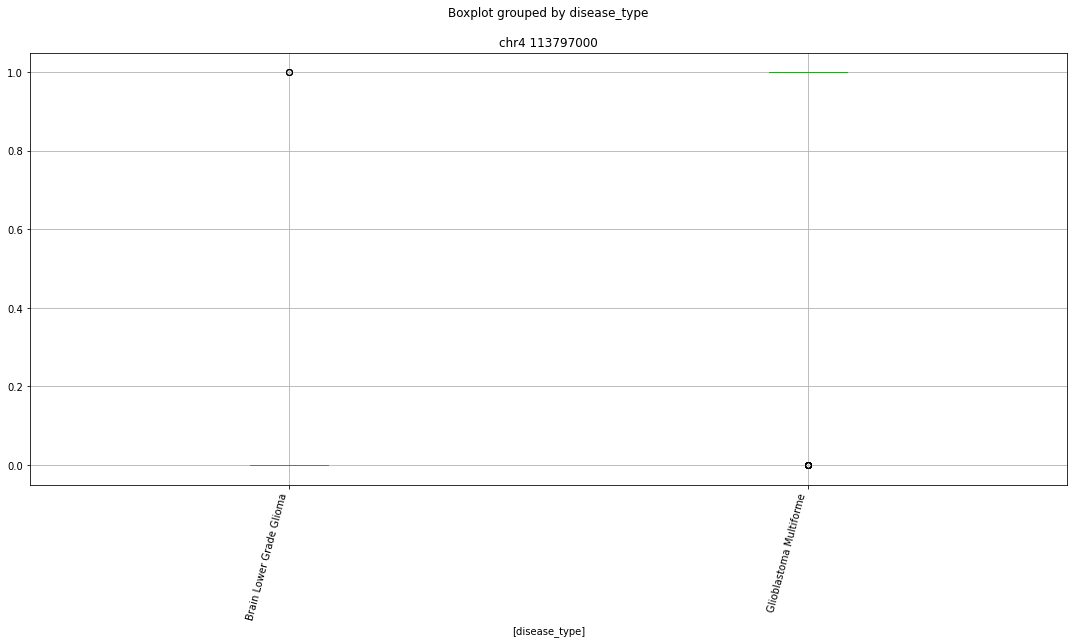

 p : 4.94184080440652e-12  ( t : 8.28545219165828 ) :  chr13 100618000


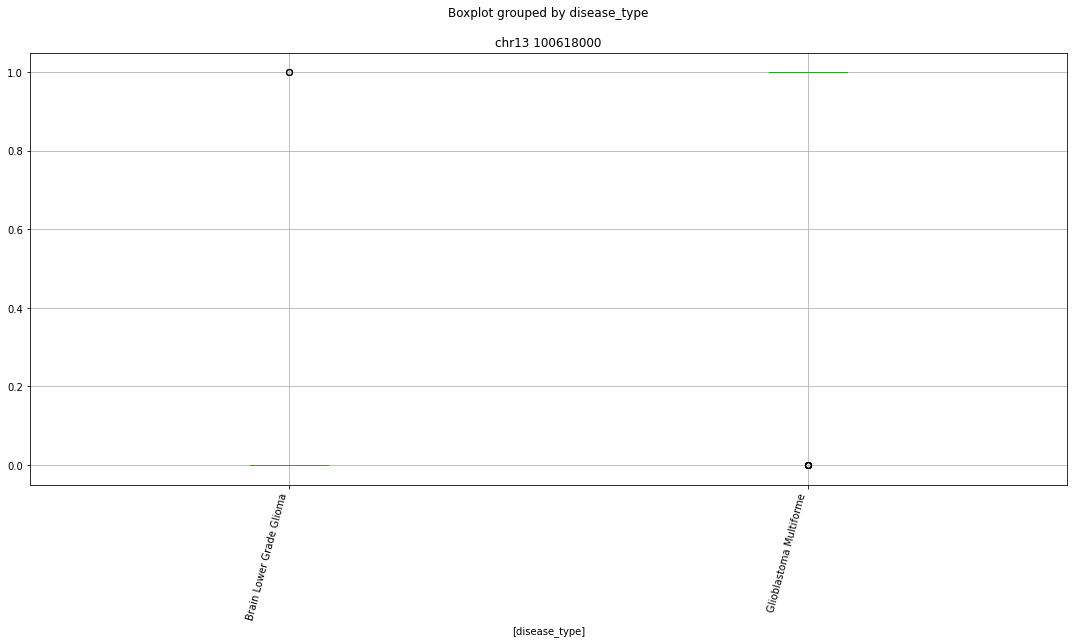

 p : 6.795720937170999e-12  ( t : 8.210862484069242 ) :  chr11 65762000


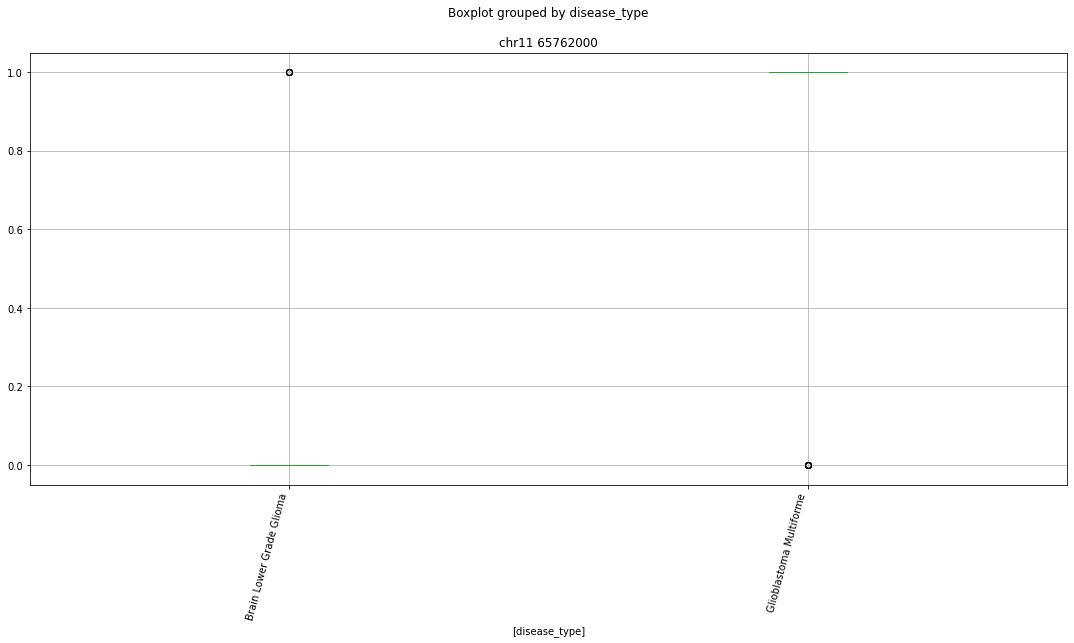

 p : 7.490288353367368e-12  ( t : 8.188076797257873 ) :  chr3 186434000


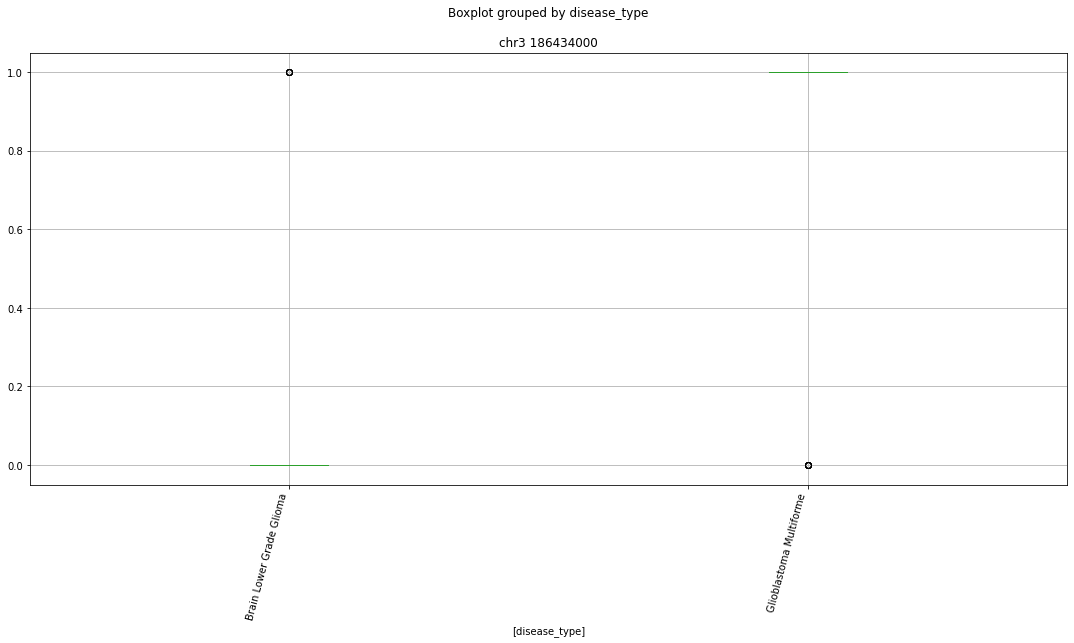

 p : 1.311789228817411e-11  ( t : 8.056861558902348 ) :  chr3 164785000


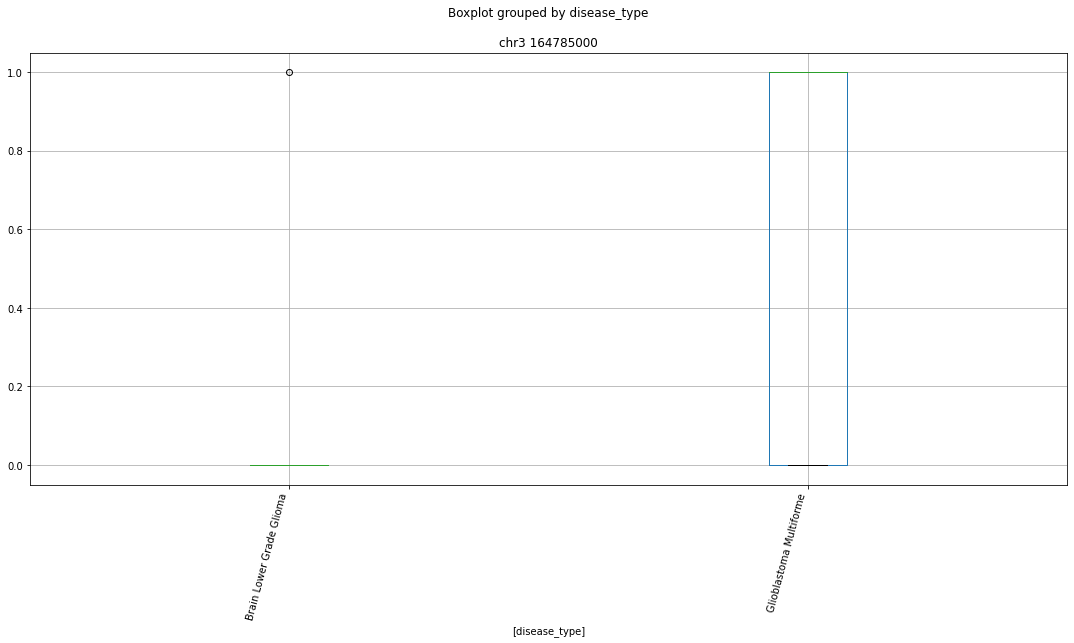

 p : 2.922459852647724e-11  ( t : 7.869221862481335 ) :  chr1 167030000


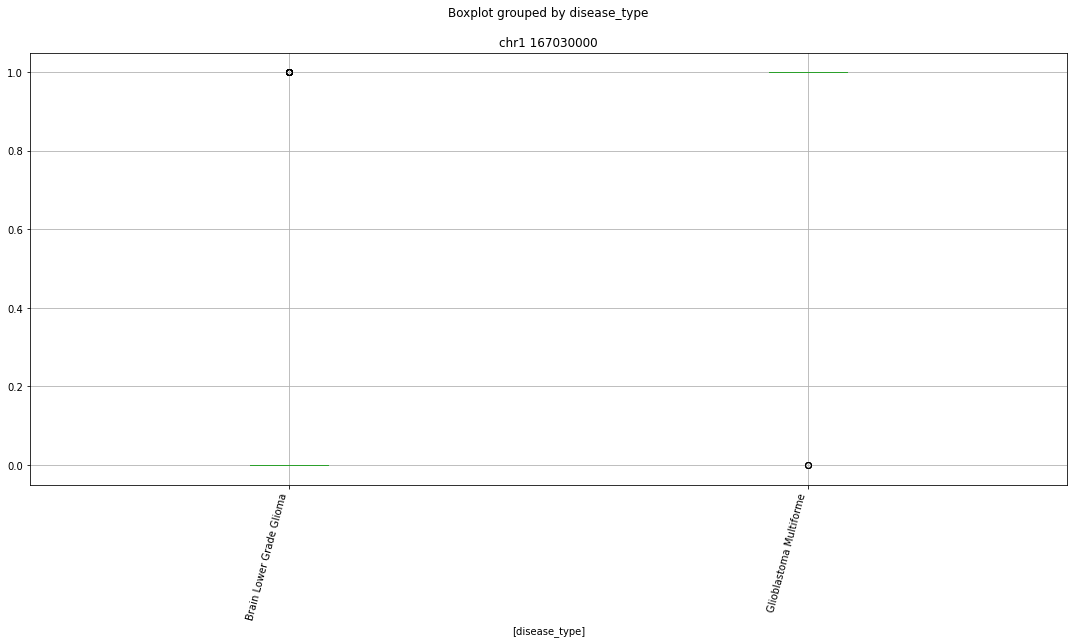

 p : 2.922459852647724e-11  ( t : 7.869221862481335 ) :  chr7 32754000


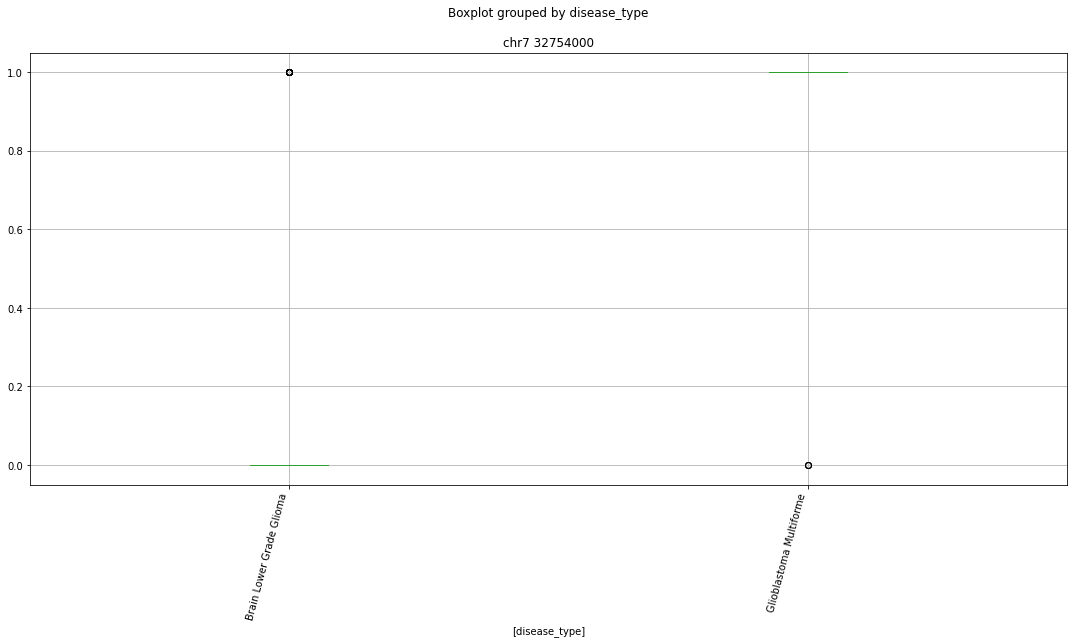

 p : 3.1038290460401354e-11  ( t : 7.855111879227142 ) :  chr11 56144000


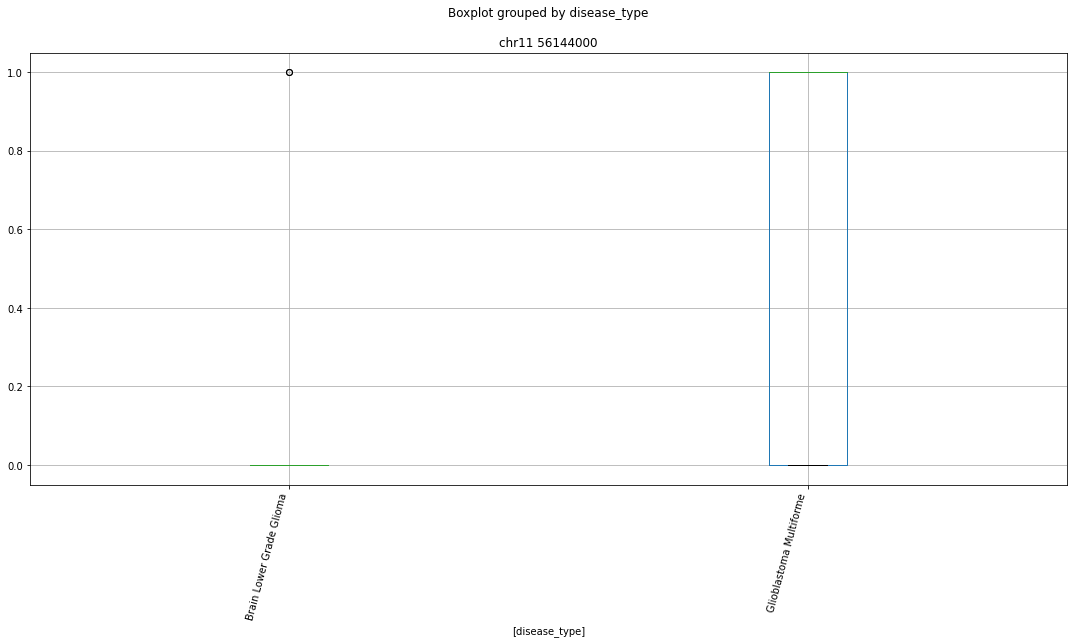

 p : 3.1038290460401354e-11  ( t : 7.855111879227142 ) :  chr9 129662000


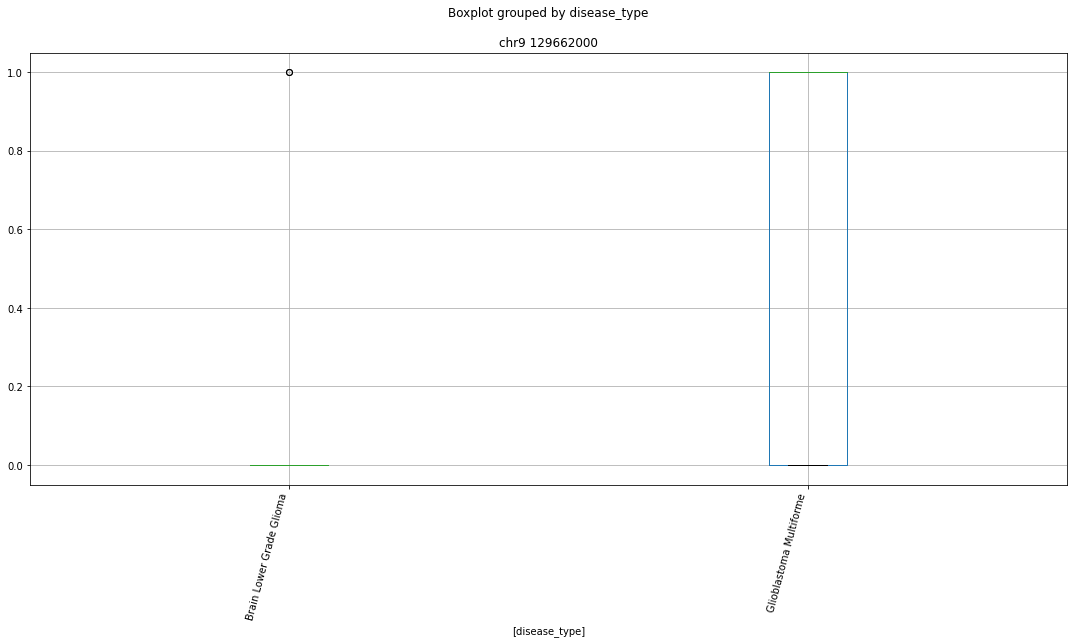

 p : 7.609277290064471e-11  ( t : 7.644822012889148 ) :  chr16 66515000


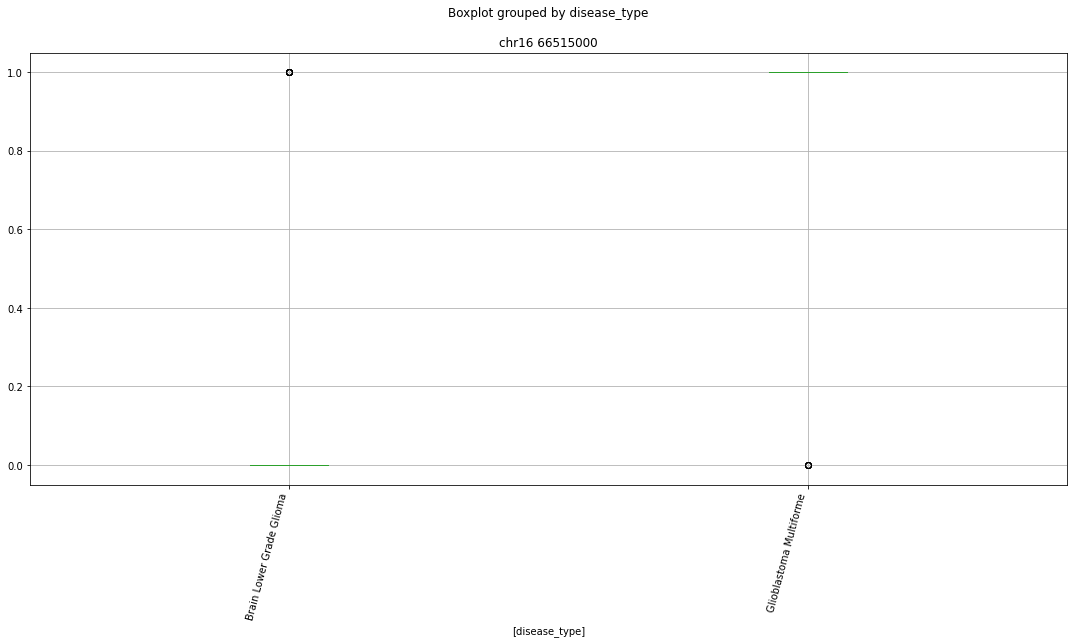

 p : 7.609277290064524e-11  ( t : 7.644822012889147 ) :  chr7 2162000


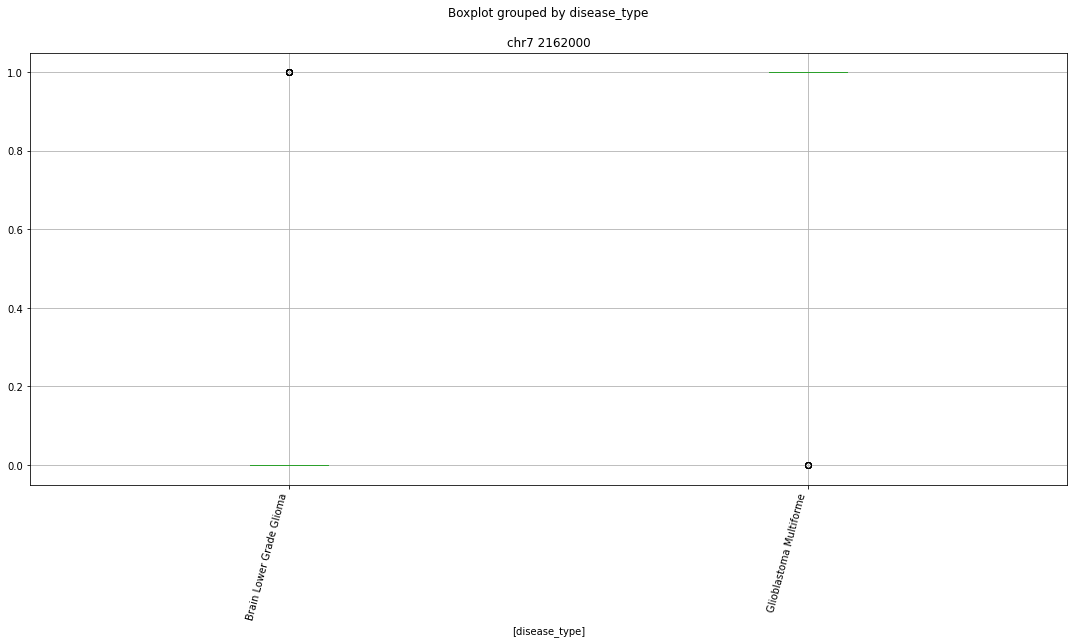

 p : 9.277251739703446e-11  ( t : 7.598297201011695 ) :  chr3 116519000


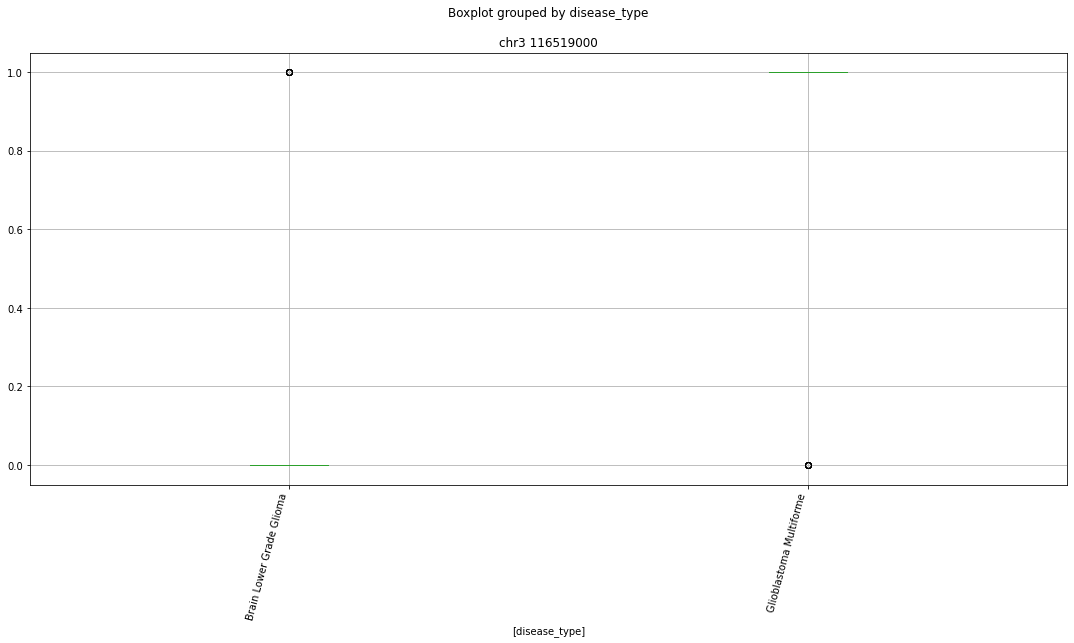

Clustermapping
['chr1 10029000' 'chr1 106413000' 'chr1 109054000' ... 'chrY 7180000'
 'disease_type' 'subject']


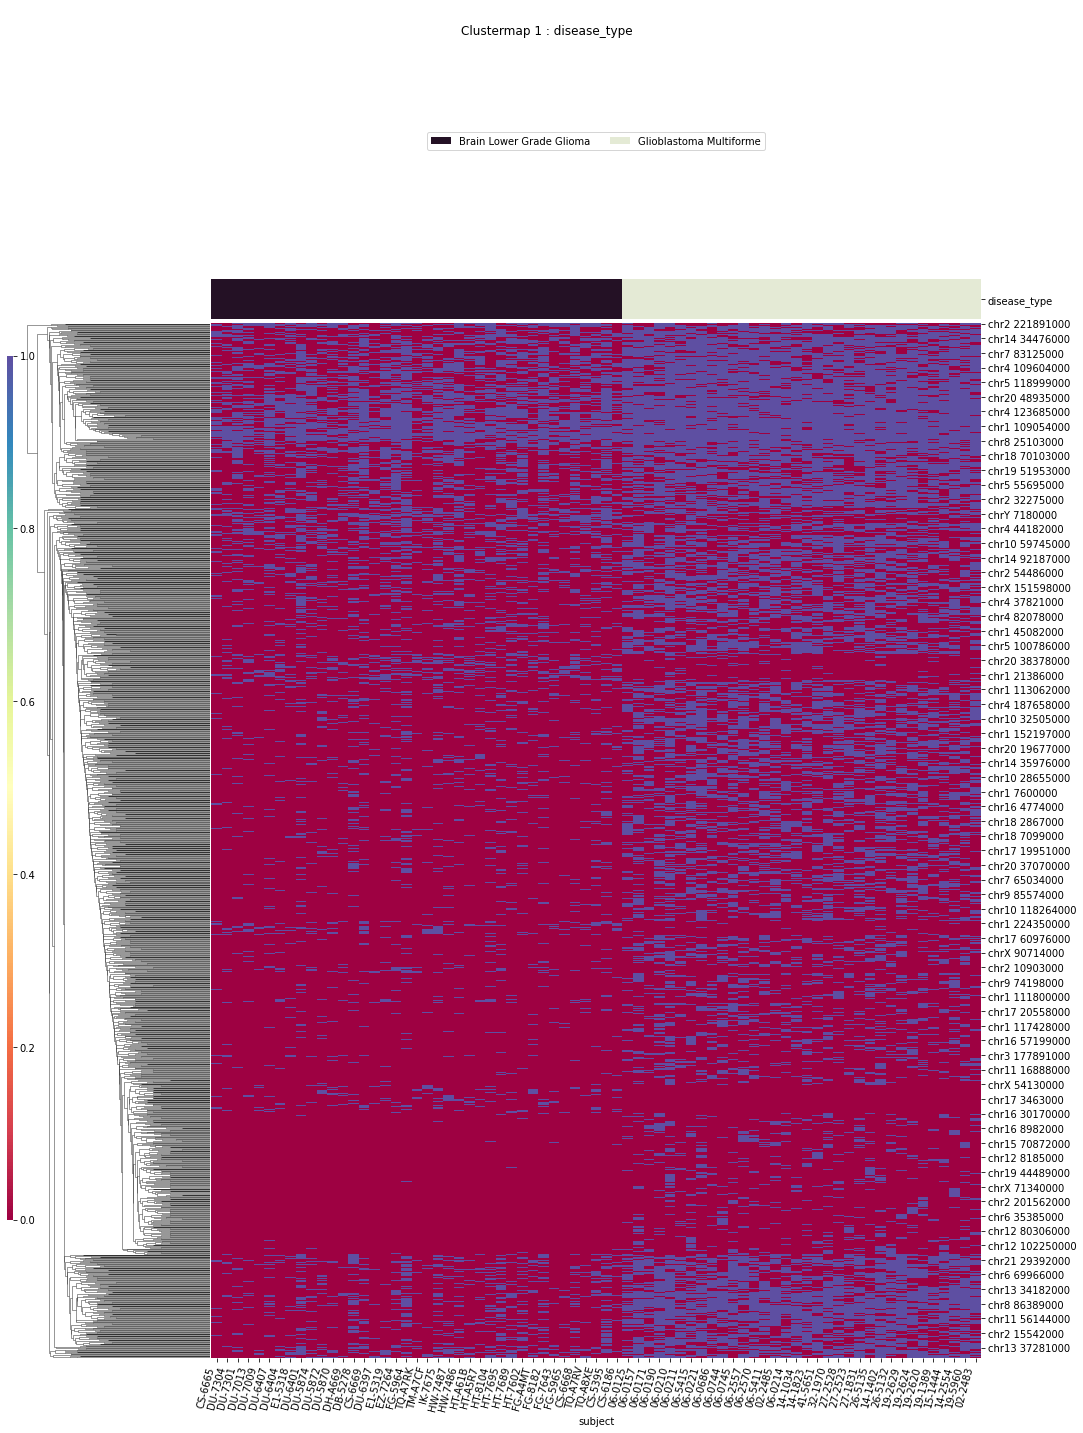

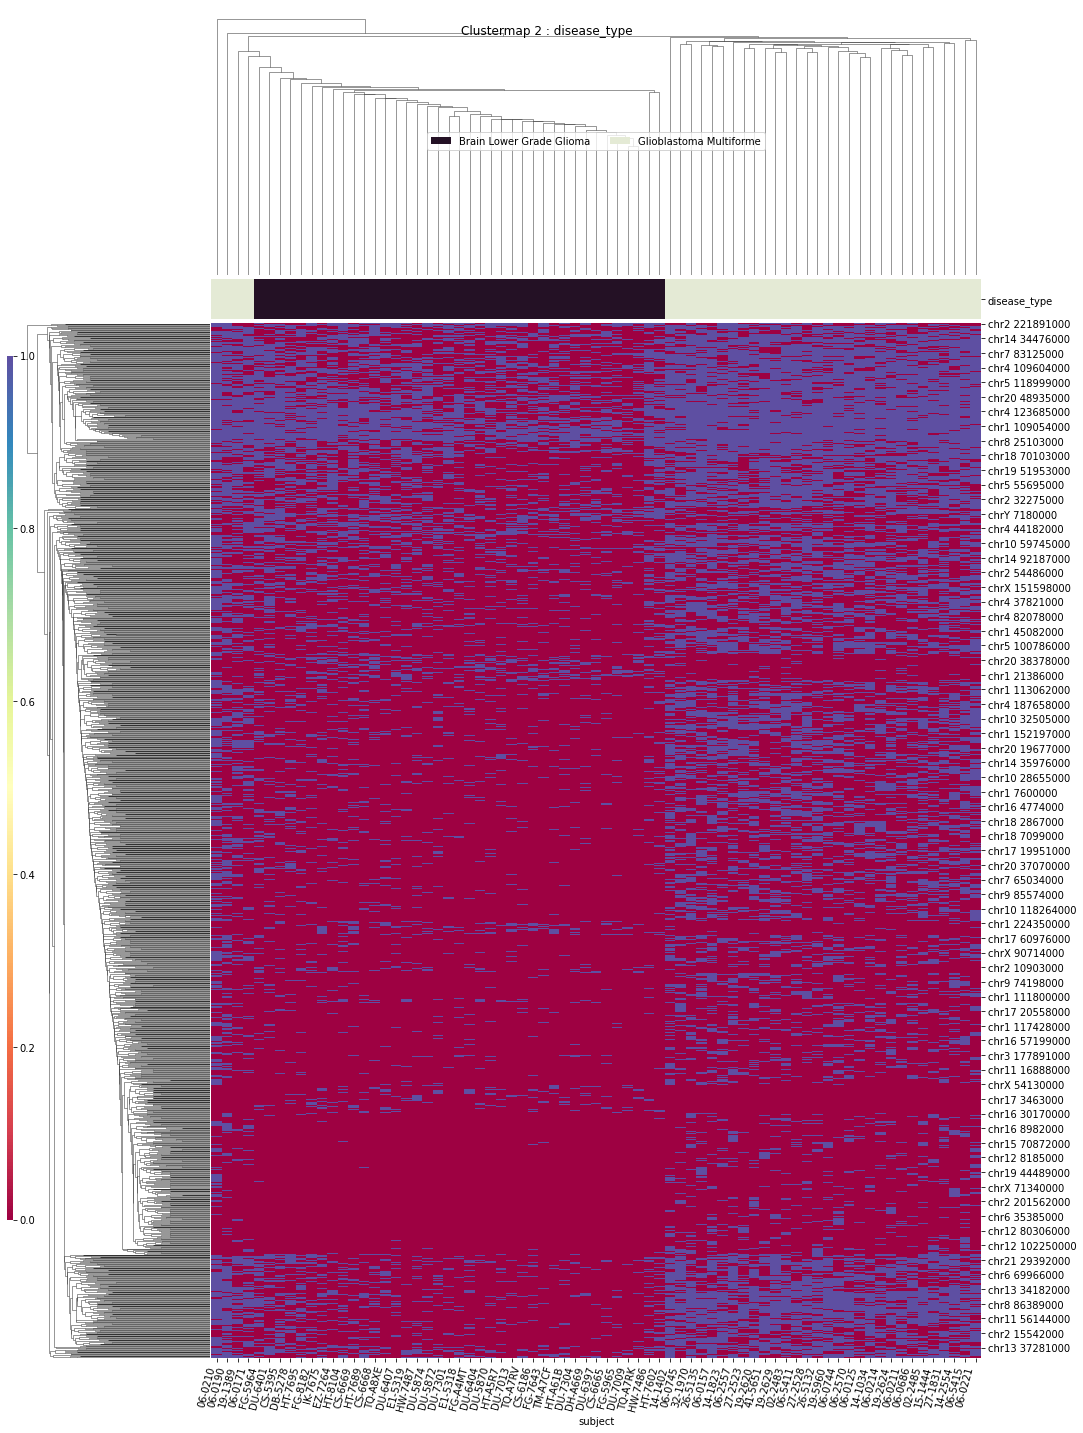

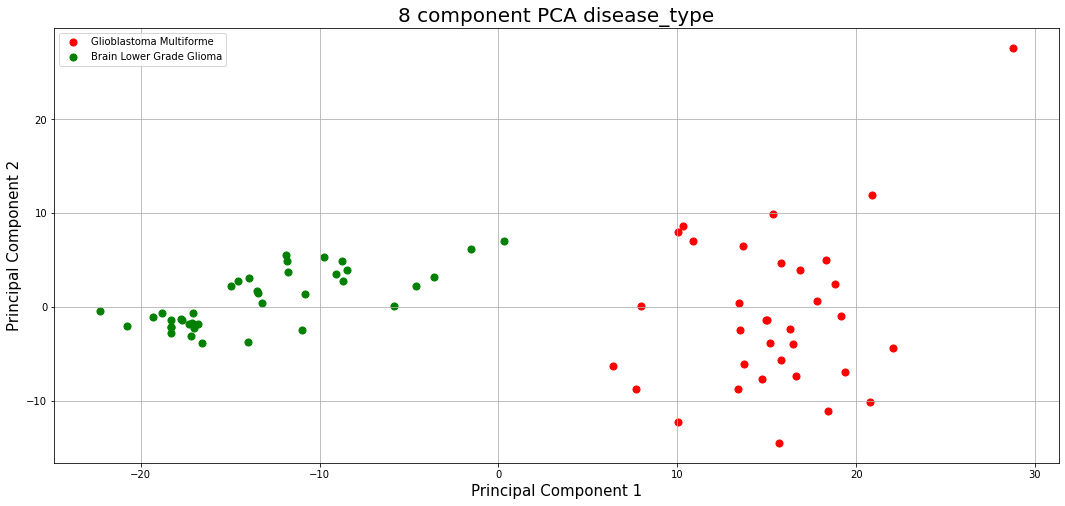

In [104]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [105]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:44:05'

disease_type
T-Testing
Boxplotting
 p : 5.6655084315569635e-18  ( t : 11.554845549490993 ) :  chr9 74853000


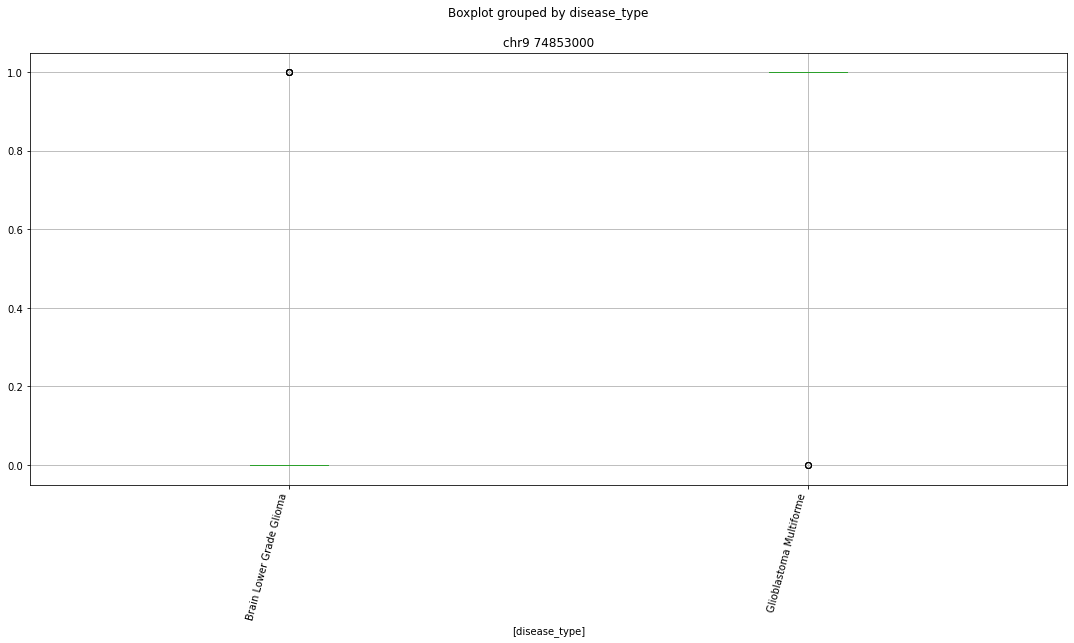

 p : 1.2480988517868185e-16  ( t : 10.797116094925201 ) :  chr3 119243000


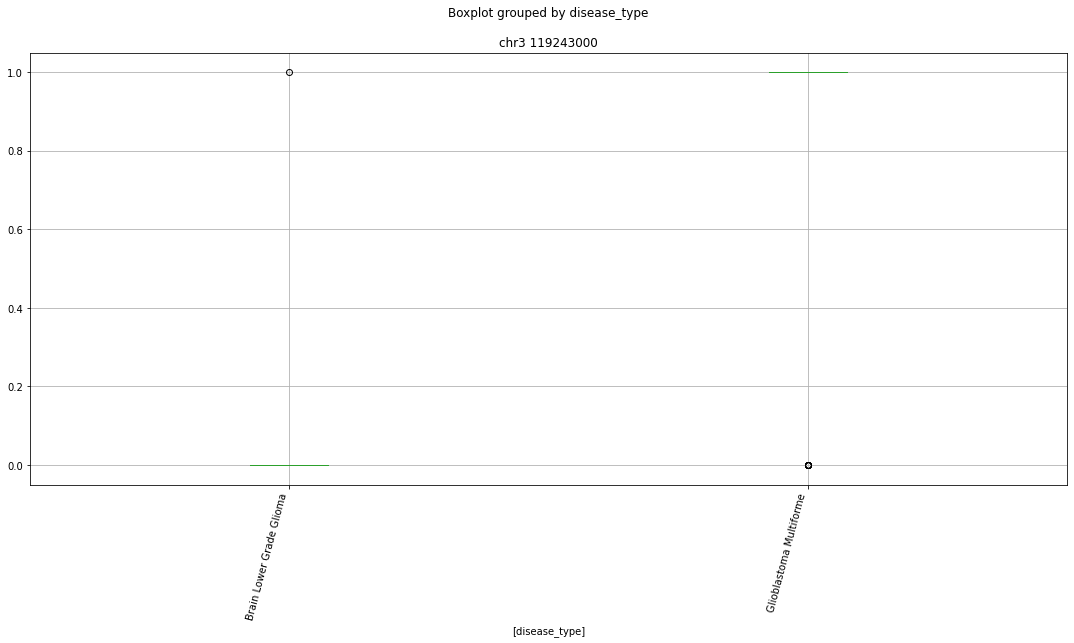

Clustermapping
['chr1 106413000' 'chr1 109074000' 'chr1 109176000' 'chr1 111234000'
 'chr1 111529000' 'chr1 111800000' 'chr1 11249000' 'chr1 112641000'
 'chr1 112729000' 'chr1 113062000' 'chr1 114480000' 'chr1 114803000'
 'chr1 117300000' 'chr1 13394000' 'chr1 13659000' 'chr1 143639000'
 'chr1 147061000' 'chr1 147062000' 'chr1 150851000' 'chr1 151650000'
 'chr1 152144000' 'chr1 152195000' 'chr1 153575000' 'chr1 153583000'
 'chr1 160936000' 'chr1 161280000' 'chr1 161315000' 'chr1 162450000'
 'chr1 162457000' 'chr1 163545000' 'chr1 167030000' 'chr1 167771000'
 'chr1 167805000' 'chr1 168838000' 'chr1 170419000' 'chr1 173614000'
 'chr1 179039000' 'chr1 179418000' 'chr1 181955000' 'chr1 187617000'
 'chr1 189226000' 'chr1 193436000' 'chr1 197406000' 'chr1 202190000'
 'chr1 202739000' 'chr1 21024000' 'chr1 21054000' 'chr1 212725000'
 'chr1 212780000' 'chr1 213153000' 'chr1 219546000' 'chr1 222489000'
 'chr1 225616000' 'chr1 226114000' 'chr1 227133000' 'chr1 227277000'
 'chr1 227710000' 'chr1 

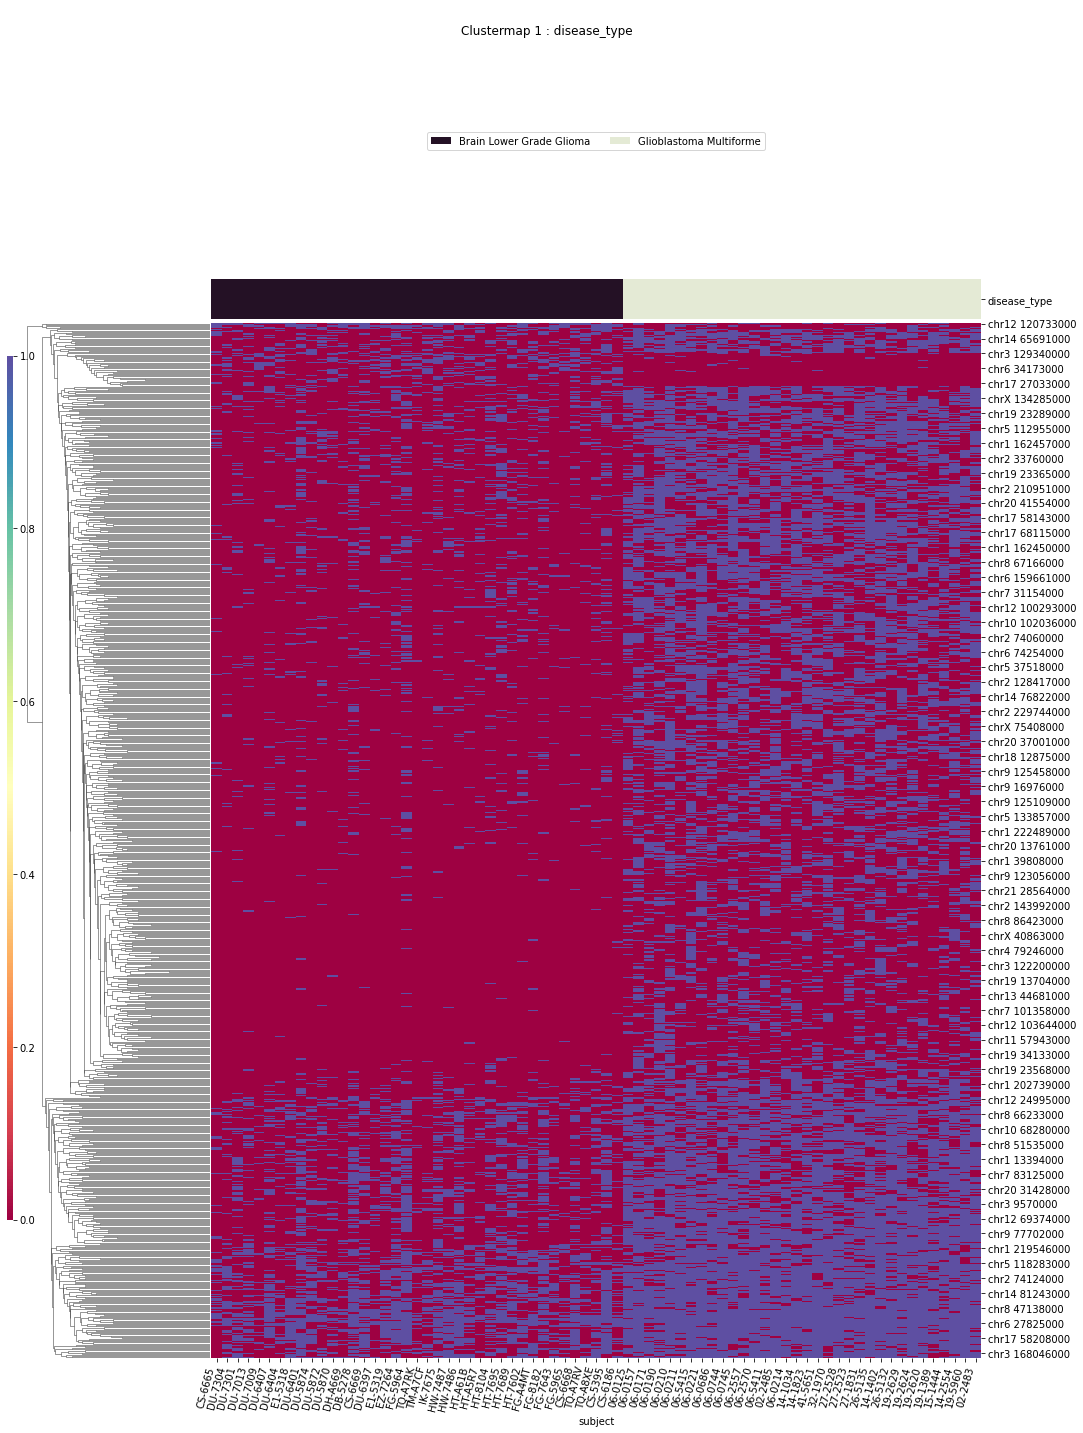

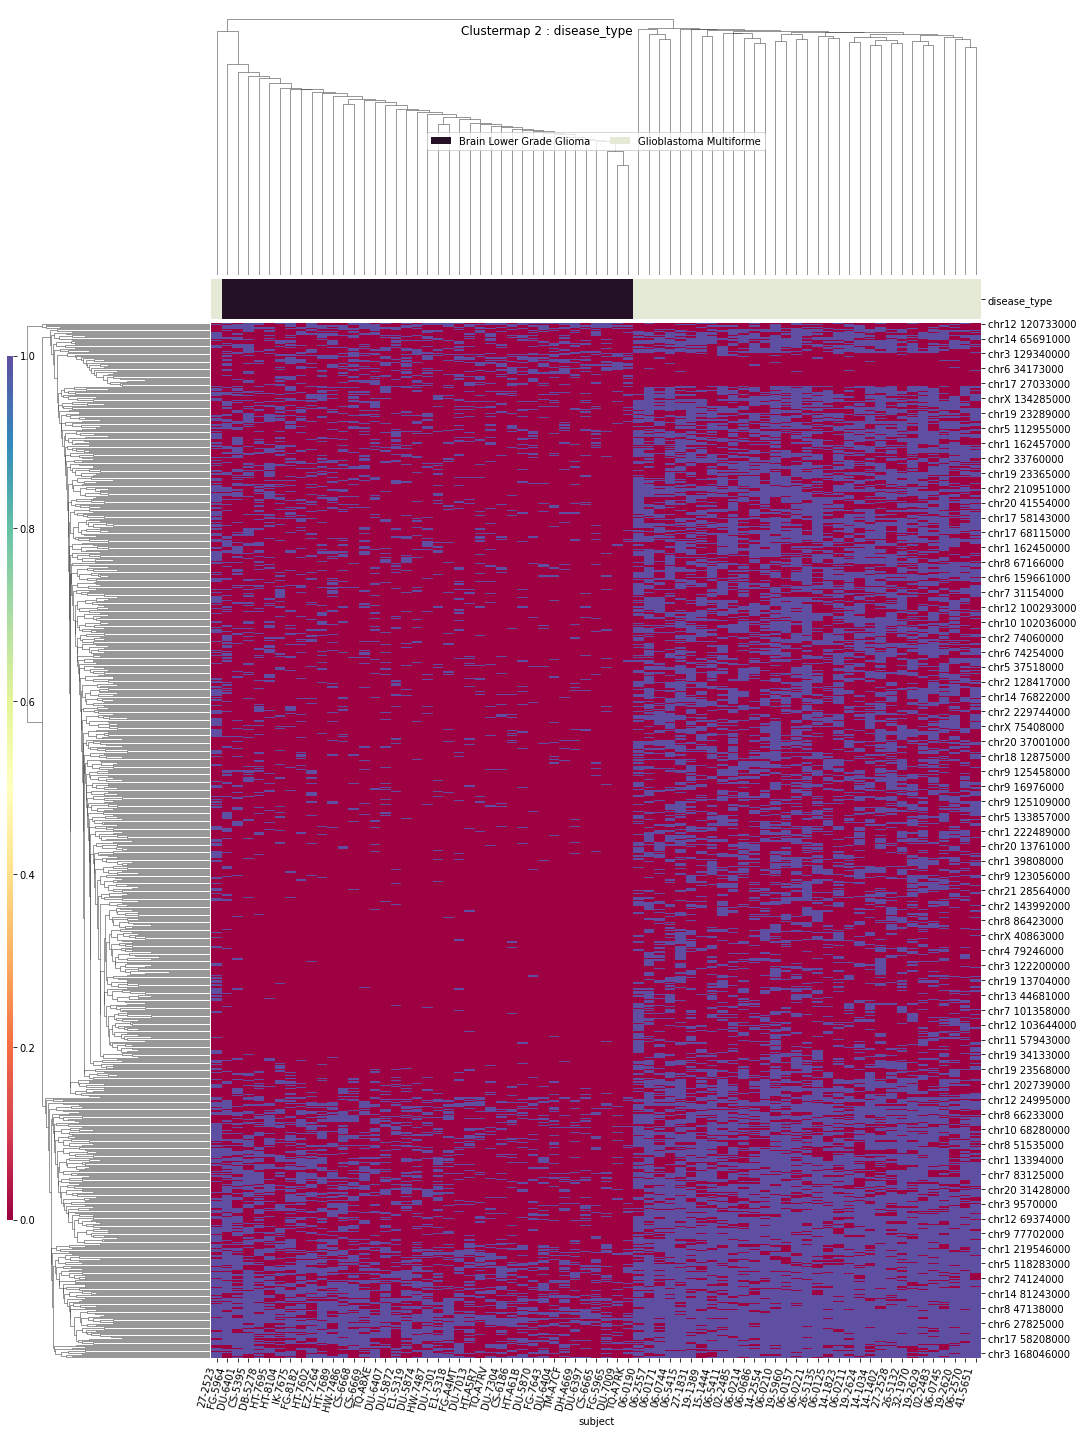

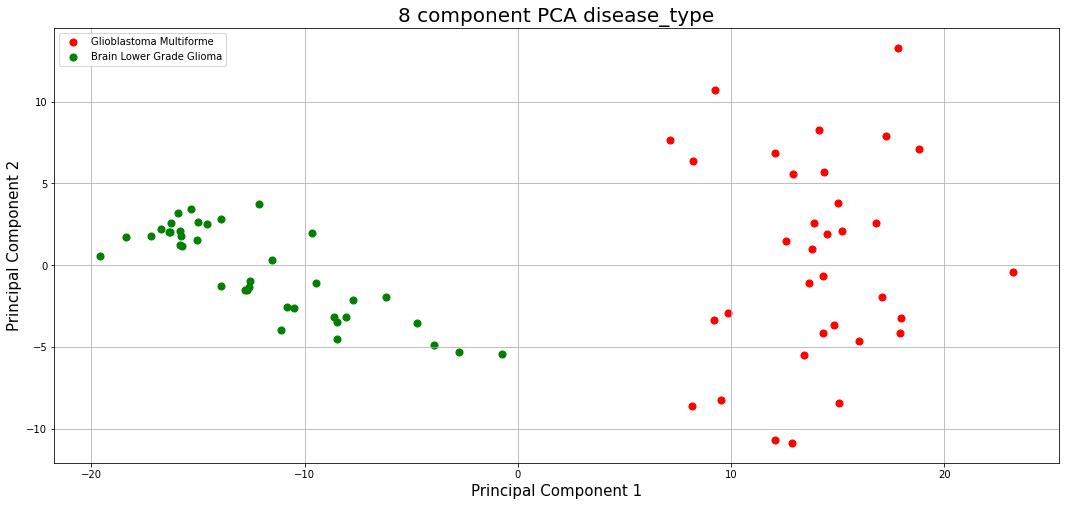

In [106]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [107]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:44:23'

disease_type
T-Testing
Boxplotting
 p : 5.6655084315569635e-18  ( t : 11.554845549490993 ) :  chr9 74853000


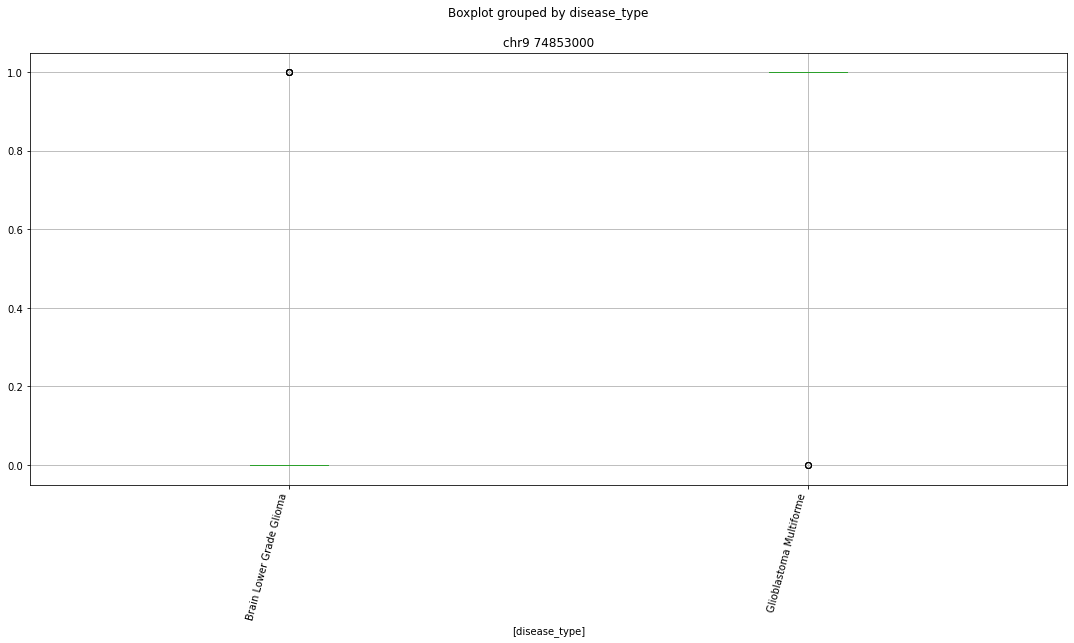

 p : 1.2480988517868185e-16  ( t : 10.797116094925201 ) :  chr3 119243000


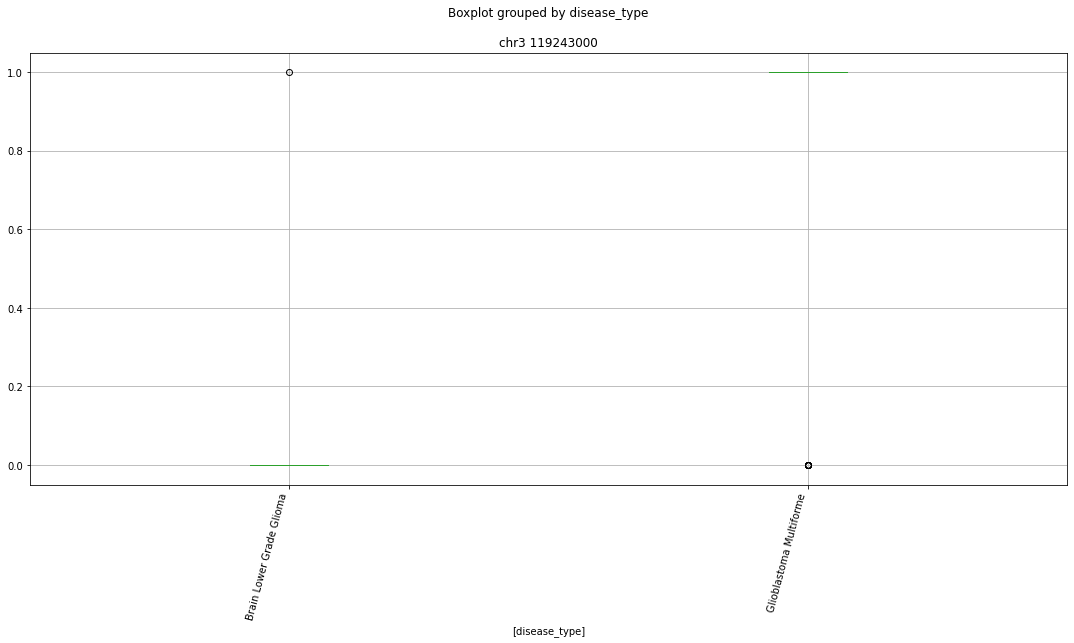

Clustermapping
['chr1 106413000' 'chr1 109074000' 'chr1 109176000' 'chr1 111529000'
 'chr1 11249000' 'chr1 112729000' 'chr1 113062000' 'chr1 13394000'
 'chr1 147062000' 'chr1 150851000' 'chr1 152144000' 'chr1 153575000'
 'chr1 163545000' 'chr1 167030000' 'chr1 168838000' 'chr1 179039000'
 'chr1 179418000' 'chr1 181955000' 'chr1 187617000' 'chr1 189226000'
 'chr1 197406000' 'chr1 202190000' 'chr1 202739000' 'chr1 21054000'
 'chr1 212725000' 'chr1 212780000' 'chr1 219546000' 'chr1 225616000'
 'chr1 227133000' 'chr1 227277000' 'chr1 231127000' 'chr1 234266000'
 'chr1 245775000' 'chr1 246363000' 'chr1 247221000' 'chr1 248676000'
 'chr1 248911000' 'chr1 26802000' 'chr1 27065000' 'chr1 27288000'
 'chr1 34083000' 'chr1 36243000' 'chr1 39808000' 'chr1 39999000'
 'chr1 43502000' 'chr1 45114000' 'chr1 45498000' 'chr1 48381000'
 'chr1 48480000' 'chr1 50382000' 'chr1 50827000' 'chr1 52182000'
 'chr1 52869000' 'chr1 7600000' 'chr1 77868000' 'chr1 86963000'
 'chr1 92025000' 'chr1 96469000' 'chr10 11

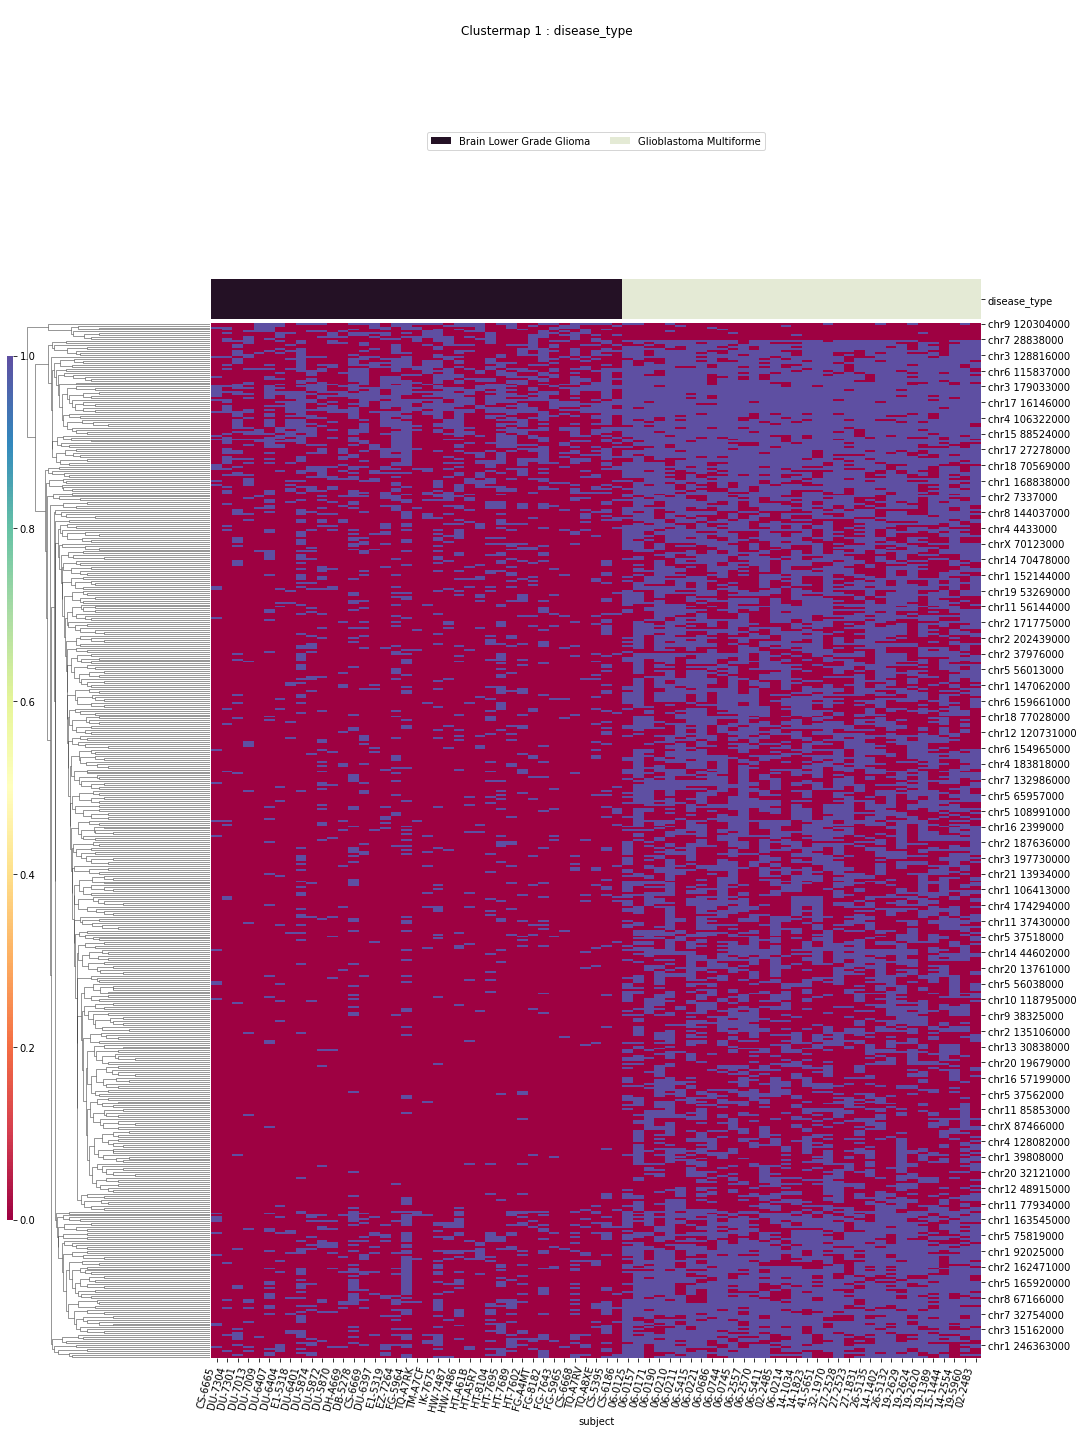

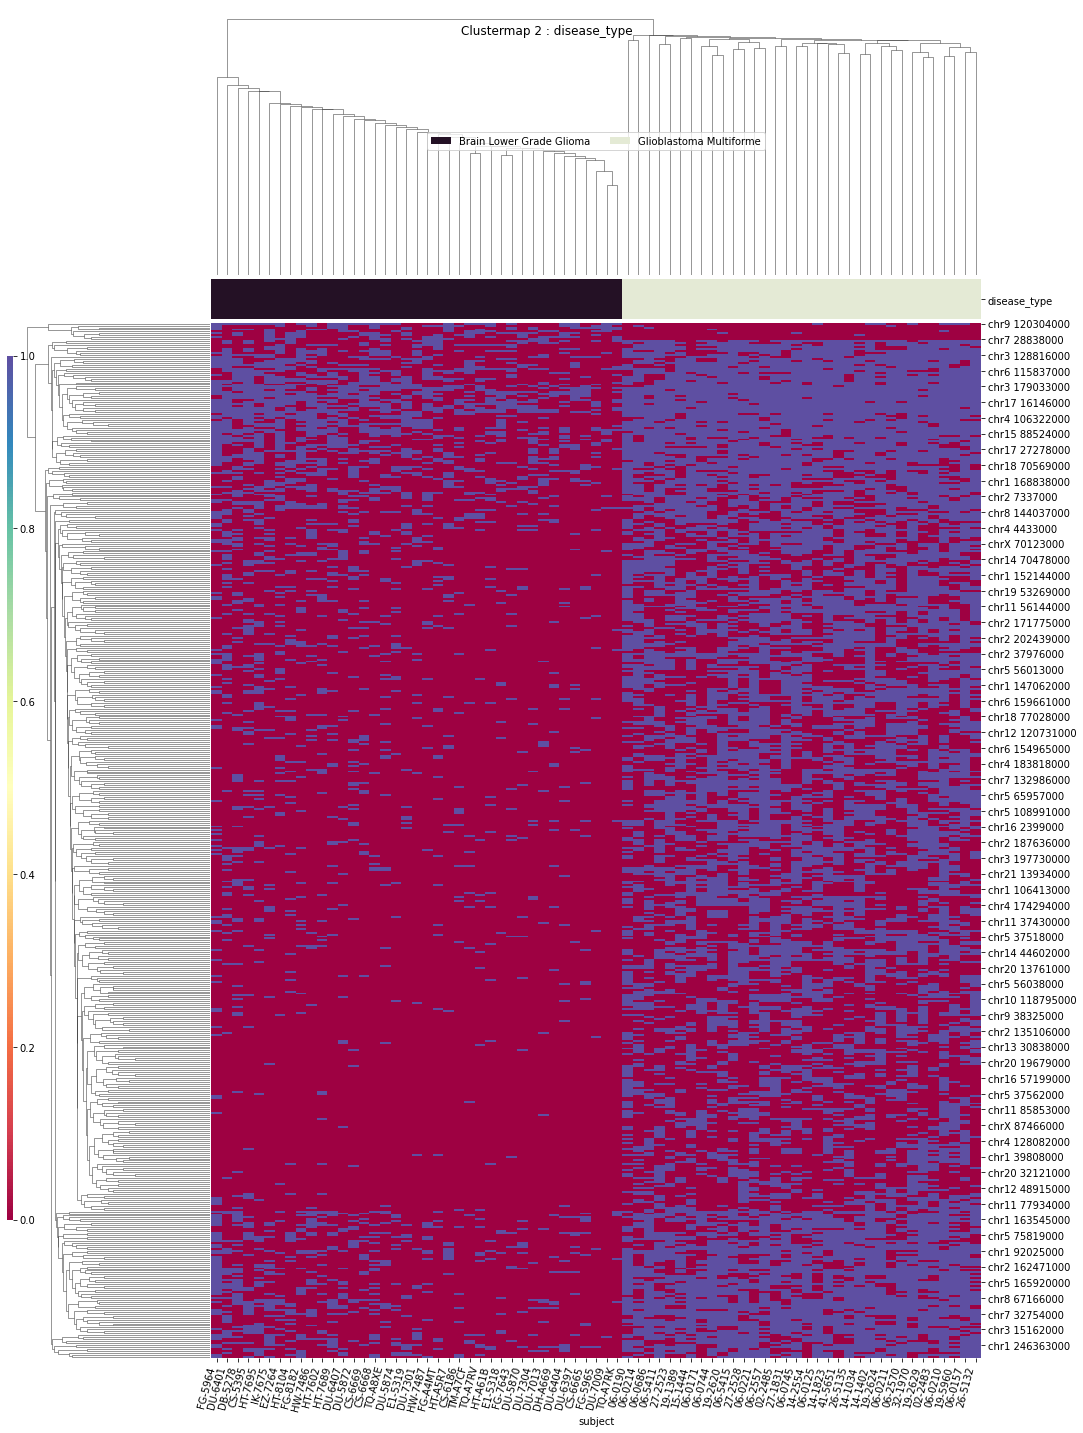

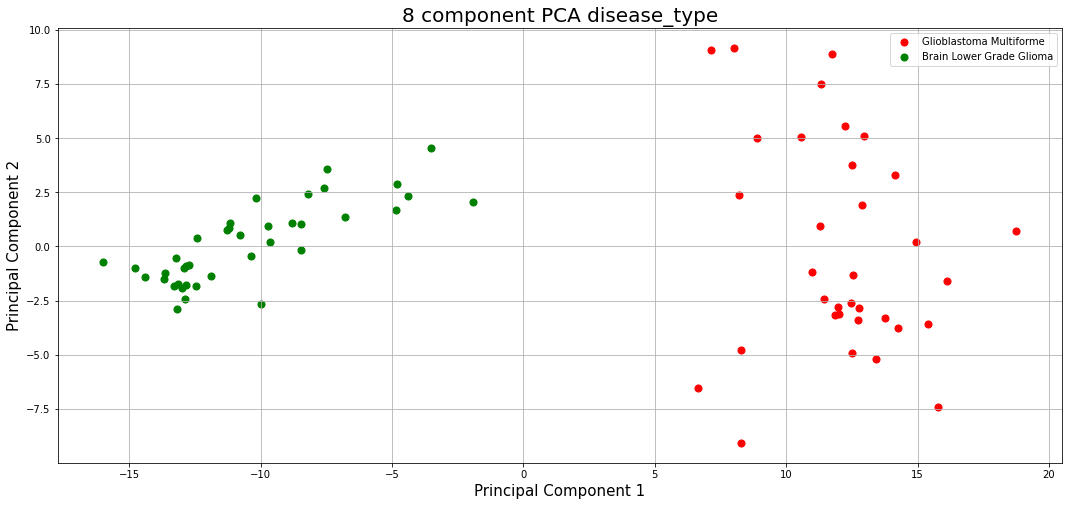

In [108]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [109]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:44:41'

# Load the GPMP data

In [110]:
gpmp_df=pd.read_csv(gpmpdata,header=[0,1],index_col=[0,1,2,3])
gpmp_df

chromosome                              chr1                                  \
position                             1409000 1410000 1580000 1581000 5573000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        4       3       1       0       0   
                       SVA_A    Q20        0       0       0       0       0   
                       SVA_B    Q20        0       0       0       0       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        0       1       0       0       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
                       SVA_E    Q20        0       0       0       0       0   
                       SVA_F    Q20        0       0       0       0       0   

chromosome                                                                    \
position                             6304000 6306000 6714000 6716000 7600000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        0       0       0       0       0   
                       SVA_A    Q20        3       1       2       2       0   
                       SVA_B    Q20        1       1       2       1       0   
                       SVA_C    Q20        2       1       2       1       0   
                       SVA_D    Q20        2       1       2       1       0   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        2       0       1       1       2   
                       SVA_C    Q20        3       0       1       1       3   
                       SVA_D    Q20        3       0       1       1       3   
                       SVA_E    Q20        3       0       1       1       3   
                       SVA_F    Q20        3       0       0       0       0   

chromosome                            ...     chrY                             \
position                              ... 12879000 13103000 13104000 15774000   
sample          pup    hkle     mapq  ...                                       
SF12149_S1L1_N  paired HERVK113 Q20   ...        0        0        1        0   
                       SVA_A    Q20   ...        0        0        0        0   
                       SVA_B    Q20   ...        0        0        0        0   
                       SVA_C    Q20   ...        0        0        0        0   
                       SVA_D    Q20   ...        0        0        0        0   
...                                   ...      ...      ...      ...      ...   
SF12656_S11L4_N paired SVA_B    Q20   ...        0        0        0        0   
                       SVA_C    Q20   ...        0        0        0        0   
                       SVA_D    Q20   ...        0        0        0        0   
                       SVA_E    Q20   ...        0        0        0        0   
                       SVA_F    Q20   ...        0        0        0        0   

chromosome                                                                \
position                             19535000 19536000 19699000 19700000   
sample          pup    hkle     mapq                                       
SF12149_S1L1_N  paired HERVK113 Q20         0        0        2        2   
                       SVA_A    Q20         0        2        0        0   
                       SVA_B    Q20         0        2        0        0   
                       SVA_C    Q20         0        2        0        0   
                       SVA_D    Q20         0        2        0        0   
...            

In [111]:
gpmp_df.reset_index(inplace=True)
gpmp_df

chromosome           sample     pup      hkle mapq    chr1                  \
position                                           1409000 1410000 1580000   
0            SF12149_S1L1_N  paired  HERVK113  Q20       4       3       1   
1            SF12149_S1L1_N  paired     SVA_A  Q20       0       0       0   
2            SF12149_S1L1_N  paired     SVA_B  Q20       0       0       0   
3            SF12149_S1L1_N  paired     SVA_C  Q20       0       0       0   
4            SF12149_S1L1_N  paired     SVA_D  Q20       0       0       0   
..                      ...     ...       ...  ...     ...     ...     ...   
93          SF12656_S11L4_N  paired     SVA_B  Q20       0       1       0   
94          SF12656_S11L4_N  paired     SVA_C  Q20       0       0       0   
95          SF12656_S11L4_N  paired     SVA_D  Q20       0       0       0   
96          SF12656_S11L4_N  paired     SVA_E  Q20       0       0       0   
97          SF12656_S11L4_N  paired     SVA_F  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 5573000 6304000  ... 12879000 13103000 13104000 15774000   
0                0       0       0  ...        0        0        1        0   
1                0       0       3  ...        0        0        0        0   
2                0       0       1  ...        0        0        0        0   
3                0       0       2  ...        0        0        0        0   
4                0       0       2  ...        0        0        0        0   
..             ...     ...     ...  ...      ...      ...      ...      ...   
93               0       0       2  ...        0        0        0        0   
94               0       0       3  ...        0        0        0        0   
95               0       0       3  ...        0        0        0        0   
96               0       0       3  ...        0        0        0        0   
97               0       0       3  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
0                 0        0        2        2        0        0  
1                 0        2        0        0        1        0  
2                 0        2        0        0        1        0  
3                 0        2        0        0        1        0  
4                 0        2        0        0        1        0  
..              ...      ...      ...      ...      ...      ...  
93                0        0        0        0        0        0  
94                0        0        0        0        0        0  
95                0        0        0        0        0        0  
96                0        0        0        0        0        0  
97                0        0        0        0        0        0  

[98 rows x 5384 columns]

In [112]:
gpmp_df=gpmp_df[gpmp_df['hkle']==hkle]
gpmp_df

chromosome           sample     pup   hkle mapq    chr1                  \
position                                        1409000 1410000 1580000   
2            SF12149_S1L1_N  paired  SVA_B  Q20       0       0       0   
9            SF12210_S2L1_N  paired  SVA_B  Q20       0       0       0   
16           SF12255_S7L2_N  paired  SVA_B  Q20       0       0       0   
23           SF12271_S8L2_N  paired  SVA_B  Q20       0       0       0   
30           SF12288_S1L1_N  paired  SVA_B  Q20       0       0       0   
37           SF12333_S2L1_N  paired  SVA_B  Q20       0       0       0   
44           SF12407_S1L1_N  paired  SVA_B  Q20       0       0       0   
51           SF12430_S2L1_N  paired  SVA_B  Q20       0       0       0   
58           SF12460_S8L3_N  paired  SVA_B  Q20       0       0       0   
65           SF12480_S7L3_N  paired  SVA_B  Q20       0       0       0   
72           SF12495_S9L3_N  paired  SVA_B  Q20       0       0       0   
79           SF12577_S6L2_N  paired  SVA_B  Q20       0       0       0   
86          SF12634_S10L4_N  paired  SVA_B  Q20       0       0       0   
93          SF12656_S11L4_N  paired  SVA_B  Q20       0       1       0   

chromosome                          ...     chrY                             \
position   1581000 5573000 6304000  ... 12879000 13103000 13104000 15774000   
2                0       0       1  ...        0        0        0        0   
9                1       0       1  ...        0        0        0        0   
16               0       0       0  ...        0        0        0        0   
23               0       0       0  ...        0        0        0        0   
30               0       0       0  ...        0        0        0        0   
37               0       0       0  ...        0        0        0        0   
44               0       0       1  ...        0        0        0        0   
51               1       0       0  ...        0        0        0        0   
58               0       0       0  ...        0        0        0        0   
65               0       0       0  ...        0        0        0        0   
72               2       0       2  ...        0        0        0        0   
79               1       0       0  ...        0        0        0        0   
86               1       0       0  ...        0        0        0        0   
93               0       0       2  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
2                 0        2        0        0        1        0  
9                 0        0        0        0        0        0  
16                0        0        0        0        2        0  
23                0        0        0        0        1        0  
30                0        0        0        0        5        0  
37                0        0        0        0        0        0  
44                0        0        0        0        0        0  
51                0        0        0        0        0        0  
58                0        0        0        0        0        0  
65                0        2        0        0        2        0  
72                0        0        0        0        2        0  
79                0        0        0        0        3        0  
86                0        1        0        0        4        0  
93                0        0        0        0        0        0  

[14 rows x 5384 columns]

In [113]:
gpmp_df['subject']=gpmp_df['sample'].str[0:7]
gpmp_df['subject']

<ipython-input-113-9c38aa8e9611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df['subject']=gpmp_df['sample'].str[0:7]


2     SF12149
9     SF12210
16    SF12255
23    SF12271
30    SF12288
37    SF12333
44    SF12407
51    SF12430
58    SF12460
65    SF12480
72    SF12495
79    SF12577
86    SF12634
93    SF12656
Name: subject, dtype: object

In [114]:
gpmp_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
gpmp_df #.head()

chromosome                                   chr1                          \
position                                  1409000 1410000 1580000 1581000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_B Q20        0       0       0       0   
SF12210 SF12210_S2L1_N  paired SVA_B Q20        0       0       0       1   
SF12255 SF12255_S7L2_N  paired SVA_B Q20        0       0       0       0   
SF12271 SF12271_S8L2_N  paired SVA_B Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired SVA_B Q20        0       0       0       0   
SF12333 SF12333_S2L1_N  paired SVA_B Q20        0       0       0       0   
SF12407 SF12407_S1L1_N  paired SVA_B Q20        0       0       0       0   
SF12430 SF12430_S2L1_N  paired SVA_B Q20        0       0       0       1   
SF12460 SF12460_S8L3_N  paired SVA_B Q20        0       0       0       0   
SF12480 SF12480_S7L3_N  paired SVA_B Q20        0       0       0       0   
SF12495 SF12495_S9L3_N  paired SVA_B Q20        0       0       0       2   
SF12577 SF12577_S6L2_N  paired SVA_B Q20        0       0       0       1   
SF12634 SF12634_S10L4_N paired SVA_B Q20        0       0       0       1   
SF12656 SF12656_S11L4_N paired SVA_B Q20        0       1       0       0   

chromosome                                                                 \
position                                  5573000 6304000 6306000 6714000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_B Q20        0       1       1       2   
SF12210 SF12210_S2L1_N  paired SVA_B Q20        0       1       1       1   
SF12255 SF12255_S7L2_N  paired SVA_B Q20        0       0       1       1   
SF12271 SF12271_S8L2_N  paired SVA_B Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired SVA_B Q20        0       0       0       0   
SF12333 SF12333_S2L1_N  paired SVA_B Q20        0       0       0       2   
SF12407 SF12407_S1L1_N  paired SVA_B Q20        0       1       2       6   
SF12430 SF12430_S2L1_N  paired SVA_B Q20        0       0       0       1   
SF12460 SF12460_S8L3_N  paired SVA_B Q20        0       0       2       2   
SF12480 SF12480_S7L3_N  paired SVA_B Q20        0       0       2       0   
SF12495 SF12495_S9L3_N  paired SVA_B Q20        0       2       0       2   
SF12577 SF12577_S6L2_N  paired SVA_B Q20        0       0       0       1   
SF12634 SF12634_S10L4_N paired SVA_B Q20        0       0       2       3   
SF12656 SF12656_S11L4_N paired SVA_B Q20        0       2       0       1   

chromosome                                                 ...     chrY  \
position                                  6716000 7600000  ... 12879000   
subject sample          pup    hkle  mapq                  ...            
SF12149 SF12149_S1L1_N  paired SVA_B Q20        1       0  ...        0   
SF12210 SF12210_S2L1_N  paired SVA_B Q20        1       3  ...        0   
SF12255 SF12255_S7L2_N  paired SVA_B Q20        0       2  ...        0   
SF12271 SF12271_S8L2_N  paired SVA_B Q20        3       2  ...        0   
SF12288 SF12288_S1L1_N  paired SVA_B Q20        0       2  ...        0   
SF12333 SF12333_S2L1_N  paired SVA_B Q20        0       4  ...        0   
SF12407 SF12407_S1L1_N  paired SVA_B Q20        0       9  ...        0   
SF12430 SF12430_S2L1_N  paired SVA_B Q20        3       4  ...        0   
SF12460 SF12460_S8L3_N  paired SVA_B Q20        1       1  ...        0   
SF12480 SF12480_S7L3_N  paired SVA_B Q20        0       0  ...        0   
SF12495 SF12495_S9L3_N  paired SVA_B Q20        2       2  ...        0   
SF12577 SF12577_S6L2_N  paired SVA_B Q20        1       3  ...        0   
SF12634 SF12634_S10L4_N paired SVA_B Q20        1       3  ...        0   
SF12656 SF12656_S11L4_N paired SVA_B Q20        1       2  ...        0   

chromosome                                                                     \
position               

# Select only the normals

In [115]:
gpmp_df = gpmp_df.loc[
    gpmp_df.loc[gpmp_df.index.get_level_values('sample').str.contains("N$")].index]


In [116]:
gpmp_df

chromosome                                   chr1                          \
position                                  1409000 1410000 1580000 1581000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_B Q20        0       0       0       0   
SF12210 SF12210_S2L1_N  paired SVA_B Q20        0       0       0       1   
SF12255 SF12255_S7L2_N  paired SVA_B Q20        0       0       0       0   
SF12271 SF12271_S8L2_N  paired SVA_B Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired SVA_B Q20        0       0       0       0   
SF12333 SF12333_S2L1_N  paired SVA_B Q20        0       0       0       0   
SF12407 SF12407_S1L1_N  paired SVA_B Q20        0       0       0       0   
SF12430 SF12430_S2L1_N  paired SVA_B Q20        0       0       0       1   
SF12460 SF12460_S8L3_N  paired SVA_B Q20        0       0       0       0   
SF12480 SF12480_S7L3_N  paired SVA_B Q20        0       0       0       0   
SF12495 SF12495_S9L3_N  paired SVA_B Q20        0       0       0       2   
SF12577 SF12577_S6L2_N  paired SVA_B Q20        0       0       0       1   
SF12634 SF12634_S10L4_N paired SVA_B Q20        0       0       0       1   
SF12656 SF12656_S11L4_N paired SVA_B Q20        0       1       0       0   

chromosome                                                                 \
position                                  5573000 6304000 6306000 6714000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_B Q20        0       1       1       2   
SF12210 SF12210_S2L1_N  paired SVA_B Q20        0       1       1       1   
SF12255 SF12255_S7L2_N  paired SVA_B Q20        0       0       1       1   
SF12271 SF12271_S8L2_N  paired SVA_B Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired SVA_B Q20        0       0       0       0   
SF12333 SF12333_S2L1_N  paired SVA_B Q20        0       0       0       2   
SF12407 SF12407_S1L1_N  paired SVA_B Q20        0       1       2       6   
SF12430 SF12430_S2L1_N  paired SVA_B Q20        0       0       0       1   
SF12460 SF12460_S8L3_N  paired SVA_B Q20        0       0       2       2   
SF12480 SF12480_S7L3_N  paired SVA_B Q20        0       0       2       0   
SF12495 SF12495_S9L3_N  paired SVA_B Q20        0       2       0       2   
SF12577 SF12577_S6L2_N  paired SVA_B Q20        0       0       0       1   
SF12634 SF12634_S10L4_N paired SVA_B Q20        0       0       2       3   
SF12656 SF12656_S11L4_N paired SVA_B Q20        0       2       0       1   

chromosome                                                 ...     chrY  \
position                                  6716000 7600000  ... 12879000   
subject sample          pup    hkle  mapq                  ...            
SF12149 SF12149_S1L1_N  paired SVA_B Q20        1       0  ...        0   
SF12210 SF12210_S2L1_N  paired SVA_B Q20        1       3  ...        0   
SF12255 SF12255_S7L2_N  paired SVA_B Q20        0       2  ...        0   
SF12271 SF12271_S8L2_N  paired SVA_B Q20        3       2  ...        0   
SF12288 SF12288_S1L1_N  paired SVA_B Q20        0       2  ...        0   
SF12333 SF12333_S2L1_N  paired SVA_B Q20        0       4  ...        0   
SF12407 SF12407_S1L1_N  paired SVA_B Q20        0       9  ...        0   
SF12430 SF12430_S2L1_N  paired SVA_B Q20        3       4  ...        0   
SF12460 SF12460_S8L3_N  paired SVA_B Q20        1       1  ...        0   
SF12480 SF12480_S7L3_N  paired SVA_B Q20        0       0  ...        0   
SF12495 SF12495_S9L3_N  paired SVA_B Q20        2       2  ...        0   
SF12577 SF12577_S6L2_N  paired SVA_B Q20        1       3  ...        0   
SF12634 SF12634_S10L4_N paired SVA_B Q20        1       3  ...        0   
SF12656 SF12656_S11L4_N paired SVA_B Q20        1       2  ...        0   

chromosome                                                                     \
position               

In [117]:
gpmp_df=gpmp_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')
gpmp_df

chromosome                 chr1                                          \
position                1409000 1410000 1580000 1581000 5573000 6304000   
subject sample                                                            
SF12149 SF12149_S1L1_N        0       0       0       0       0       1   
SF12210 SF12210_S2L1_N        0       0       0       1       0       1   
SF12255 SF12255_S7L2_N        0       0       0       0       0       0   
SF12271 SF12271_S8L2_N        0       0       0       0       0       0   
SF12288 SF12288_S1L1_N        0       0       0       0       0       0   
SF12333 SF12333_S2L1_N        0       0       0       0       0       0   
SF12407 SF12407_S1L1_N        0       0       0       0       0       1   
SF12430 SF12430_S2L1_N        0       0       0       1       0       0   
SF12460 SF12460_S8L3_N        0       0       0       0       0       0   
SF12480 SF12480_S7L3_N        0       0       0       0       0       0   
SF12495 SF12495_S9L3_N        0       0       0       2       0       2   
SF12577 SF12577_S6L2_N        0       0       0       1       0       0   
SF12634 SF12634_S10L4_N       0       0       0       1       0       0   
SF12656 SF12656_S11L4_N       0       1       0       0       0       2   

chromosome                                               ...     chrY  \
position                6306000 6714000 6716000 7600000  ... 12879000   
subject sample                                           ...            
SF12149 SF12149_S1L1_N        1       2       1       0  ...        0   
SF12210 SF12210_S2L1_N        1       1       1       3  ...        0   
SF12255 SF12255_S7L2_N        1       1       0       2  ...        0   
SF12271 SF12271_S8L2_N        0       0       3       2  ...        0   
SF12288 SF12288_S1L1_N        0       0       0       2  ...        0   
SF12333 SF12333_S2L1_N        0       2       0       4  ...        0   
SF12407 SF12407_S1L1_N        2       6       0       9  ...        0   
SF12430 SF12430_S2L1_N        0       1       3       4  ...        0   
SF12460 SF12460_S8L3_N        2       2       1       1  ...        0   
SF12480 SF12480_S7L3_N        2       0       0       0  ...        0   
SF12495 SF12495_S9L3_N        0       2       2       2  ...        0   
SF12577 SF12577_S6L2_N        0       1       1       3  ...        0   
SF12634 SF12634_S10L4_N       2       3       1       3  ...        0   
SF12656 SF12656_S11L4_N       0       1       1       2  ...        0   

chromosome                                                                     \
position                13103000 13104000 15774000 19535000 19536000 19699000   
subject sample                                                                  
SF12149 SF12149_S1L1_N         0        0        0        0        2        0   
SF12210 SF12210_S2L1_N         0        0        0        0        0        0   
SF12255 SF12255_S7L2_N         0        0        0        0        0        0   
SF12271 SF12271_S8L2_N         0        0        0        0        0        0   
SF12288 SF12288_S1L1_N         0        0        0        0        0        0   
SF12333 SF12333_S2L1_N         0        0        0        0        0        0   
SF12407 SF12407_S1L1_N         0        0        0        0        0        0   
SF12430 SF12430_S2L1_N         0        0        0        0        0        0   
SF12460 SF12460_S8L3_N         0        0        0        0        0        0   
SF12480 SF12480_S7L3_N         0        0        0        0        2        0   
SF12495 SF12495_S9L3_N         0        0        0        0        0        0   
SF12577 SF12577_S6L2_N         0        0        0        0        0        0   
SF12634 SF12634_S10L4_N        0        0        0        0        1        0   
SF12656 SF12656_S11L4_N        0        0        0        0        0        0   

chromosome                                          
position                19700000 20553000 20976000 

In [118]:
gpmp_df.columns= [' '.join(col).strip() for col in gpmp_df.columns.values]
gpmp_df

chr1 1409000  chr1 1410000  chr1 1580000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              0             0             0   
SF12210 SF12210_S2L1_N              0             0             0   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              0             0             0   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             0             0   
SF12407 SF12407_S1L1_N              0             0             0   
SF12430 SF12430_S2L1_N              0             0             0   
SF12460 SF12460_S8L3_N              0             0             0   
SF12480 SF12480_S7L3_N              0             0             0   
SF12495 SF12495_S9L3_N              0             0             0   
SF12577 SF12577_S6L2_N              0             0             0   
SF12634 SF12634_S10L4_N             0             0             0   
SF12656 SF12656_S11L4_N             0             1             0   

                         chr1 1581000  chr1 5573000  chr1 6304000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              0             0             1   
SF12210 SF12210_S2L1_N              1             0             1   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              0             0             0   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             0             0   
SF12407 SF12407_S1L1_N              0             0             1   
SF12430 SF12430_S2L1_N              1             0             0   
SF12460 SF12460_S8L3_N              0             0             0   
SF12480 SF12480_S7L3_N              0             0             0   
SF12495 SF12495_S9L3_N              2             0             2   
SF12577 SF12577_S6L2_N              1             0             0   
SF12634 SF12634_S10L4_N             1             0             0   
SF12656 SF12656_S11L4_N             0             0             2   

                         chr1 6306000  chr1 6714000  chr1 6716000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              1             2             1   
SF12210 SF12210_S2L1_N              1             1             1   
SF12255 SF12255_S7L2_N              1             1             0   
SF12271 SF12271_S8L2_N              0             0             3   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             2             0   
SF12407 SF12407_S1L1_N              2             6             0   
SF12430 SF12430_S2L1_N              0             1             3   
SF12460 SF12460_S8L3_N              2             2             1   
SF12480 SF12480_S7L3_N              2             0             0   
SF12495 SF12495_S9L3_N              0             2             2   
SF12577 SF12577_S6L2_N              0             1             1   
SF12634 SF12634_S10L4_N             2             3             1   
SF12656 SF12656_S11L4_N             0             1             1   

                         chr1 7600000  ...  chrY 12879000  chrY 13103000  \
subject sample                         ...                                 
SF12149 SF12149_S1L1_N              0  ...              0              0   
SF12210 SF12210_S2L1_N              3  ...              0              0   
SF12255 SF12255_S7L2_N              2  ...              0              0   
SF12271 SF12271_S8L2_N              2  ...              0              0   
SF12288 SF12288_S1L1_N              2  ...              0              0   
SF12333 SF12333_S2L1_N              4  ...              0              0   
SF12407 SF12407_S1L1_N              9  ...              0              0   
SF12430 SF12430_S2L1_N    

# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [119]:
gpmp_counts=pd.read_csv("GPMP/raw_read_counts.csv")
gpmp_counts.head()

sample  raw pair count
0   SF12149_S1L0_E      1515318278
1   SF12149_S1L1_N       660620929
2  SF12149_S2L0_NE      1334986480
3   SF12210_S2L1_N       597544666
4   SF12210_S3L1_E      1487133148

In [120]:
gpmp_df.reset_index(inplace=True)
gpmp_df=gpmp_df.merge(gpmp_counts,on='sample')
gpmp_df.set_index(['subject','sample'],inplace=True)
gpmp_df

chr1 1409000  chr1 1410000  chr1 1580000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              0             0             0   
SF12210 SF12210_S2L1_N              0             0             0   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              0             0             0   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             0             0   
SF12407 SF12407_S1L1_N              0             0             0   
SF12430 SF12430_S2L1_N              0             0             0   
SF12460 SF12460_S8L3_N              0             0             0   
SF12480 SF12480_S7L3_N              0             0             0   
SF12495 SF12495_S9L3_N              0             0             0   
SF12577 SF12577_S6L2_N              0             0             0   
SF12634 SF12634_S10L4_N             0             0             0   
SF12656 SF12656_S11L4_N             0             1             0   

                         chr1 1581000  chr1 5573000  chr1 6304000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              0             0             1   
SF12210 SF12210_S2L1_N              1             0             1   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              0             0             0   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             0             0   
SF12407 SF12407_S1L1_N              0             0             1   
SF12430 SF12430_S2L1_N              1             0             0   
SF12460 SF12460_S8L3_N              0             0             0   
SF12480 SF12480_S7L3_N              0             0             0   
SF12495 SF12495_S9L3_N              2             0             2   
SF12577 SF12577_S6L2_N              1             0             0   
SF12634 SF12634_S10L4_N             1             0             0   
SF12656 SF12656_S11L4_N             0             0             2   

                         chr1 6306000  chr1 6714000  chr1 6716000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              1             2             1   
SF12210 SF12210_S2L1_N              1             1             1   
SF12255 SF12255_S7L2_N              1             1             0   
SF12271 SF12271_S8L2_N              0             0             3   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             2             0   
SF12407 SF12407_S1L1_N              2             6             0   
SF12430 SF12430_S2L1_N              0             1             3   
SF12460 SF12460_S8L3_N              2             2             1   
SF12480 SF12480_S7L3_N              2             0             0   
SF12495 SF12495_S9L3_N              0             2             2   
SF12577 SF12577_S6L2_N              0             1             1   
SF12634 SF12634_S10L4_N             2             3             1   
SF12656 SF12656_S11L4_N             0             1             1   

                         chr1 7600000  ...  chrY 13103000  chrY 13104000  \
subject sample                         ...                                 
SF12149 SF12149_S1L1_N              0  ...              0              0   
SF12210 SF12210_S2L1_N              3  ...              0              0   
SF12255 SF12255_S7L2_N              2  ...              0              0   
SF12271 SF12271_S8L2_N              2  ...              0              0   
SF12288 SF12288_S1L1_N              2  ...              0              0   
SF12333 SF12333_S2L1_N              4  ...              0              0   
SF12407 SF12407_S1L1_N              9  ...              0              0   
SF12430 SF12430_S2L1_N    

In [121]:
gpmp_df=gpmp_df.droplevel('sample',axis='index')
gpmp_df

chr1 1409000  chr1 1410000  chr1 1580000  chr1 1581000  chr1 5573000  \
subject                                                                         
SF12149             0             0             0             0             0   
SF12210             0             0             0             1             0   
SF12255             0             0             0             0             0   
SF12271             0             0             0             0             0   
SF12288             0             0             0             0             0   
SF12333             0             0             0             0             0   
SF12407             0             0             0             0             0   
SF12430             0             0             0             1             0   
SF12460             0             0             0             0             0   
SF12480             0             0             0             0             0   
SF12495             0             0             0             2             0   
SF12577             0             0             0             1             0   
SF12634             0             0             0             1             0   
SF12656             0             1             0             0             0   

         chr1 6304000  chr1 6306000  chr1 6714000  chr1 6716000  chr1 7600000  \
subject                                                                         
SF12149             1             1             2             1             0   
SF12210             1             1             1             1             3   
SF12255             0             1             1             0             2   
SF12271             0             0             0             3             2   
SF12288             0             0             0             0             2   
SF12333             0             0             2             0             4   
SF12407             1             2             6             0             9   
SF12430             0             0             1             3             4   
SF12460             0             2             2             1             1   
SF12480             0             2             0             0             0   
SF12495             2             0             2             2             2   
SF12577             0             0             1             1             3   
SF12634             0             2             3             1             3   
SF12656             2             0             1             1             2   

         ...  chrY 13103000  chrY 13104000  chrY 15774000  chrY 19535000  \
subject  ...                                                               
SF12149  ...              0              0              0              0   
SF12210  ...              0              0              0              0   
SF12255  ...              0              0              0              0   
SF12271  ...              0              0              0              0   
SF12288  ...              0              0              0              0   
SF12333  ...              0              0              0              0   
SF12407  ...              0              0              0              0   
SF12430  ...              0              0              0              0   
SF12460  ...              0              0              0              0   
SF12480  ...              0              0              0              0   
SF12495  ...              0              0              0              0   
SF12577  ...              0              0              0              0   
SF12634  ...              0              0              0              0   
SF12656  ...              0              0              0              0   

         chrY 19536000  chrY 19699000  chrY 19700000  chrY 20553000  \
subject                                                               
SF12149              2              0              0    

In [122]:
gpmp_df.shape

(14, 5381)

In [123]:
gpmp_df=gpmp_df.loc[:, (gpmp_df != 0).any(axis=0)]

In [124]:
gpmp_df.shape

(14, 3941)

In [125]:
gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
    1e9*gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]].values)/gpmp_df[['raw pair count']].values


<ipython-input-125-5f77c92ad960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [126]:
gpmp_df.drop('raw pair count',axis='columns',inplace=True)
gpmp_df

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


chr1 1410000  chr1 1581000  chr1 6304000  chr1 6306000  chr1 6714000  \
subject                                                                         
SF12149          0.00          0.00          1.51          1.51          3.03   
SF12210          0.00          1.67          1.67          1.67          1.67   
SF12255          0.00          0.00          0.00          1.45          1.45   
SF12271          0.00          0.00          0.00          0.00          0.00   
SF12288          0.00          0.00          0.00          0.00          0.00   
SF12333          0.00          0.00          0.00          0.00          1.67   
SF12407          0.00          0.00          0.85          1.70          5.10   
SF12430          0.00          0.79          0.00          0.00          0.79   
SF12460          0.00          0.00          0.00          2.08          2.08   
SF12480          0.00          0.00          0.00          2.25          0.00   
SF12495          0.00          1.92          1.92          0.00          1.92   
SF12577          0.00          0.72          0.00          0.00          0.72   
SF12634          0.00          0.71          0.00          1.43          2.14   
SF12656          0.76          0.00          1.51          0.00          0.76   

         chr1 6716000  chr1 7600000  chr1 7602000  chr1 7952000  chr1 8503000  \
subject                                                                         
SF12149          1.51          0.00          1.51          1.51          3.03   
SF12210          1.67          5.02          0.00          1.67          0.00   
SF12255          0.00          2.91          0.00          0.00          0.00   
SF12271          3.99          2.66          0.00          1.33          0.00   
SF12288          0.00          1.82          0.91          1.82          4.54   
SF12333          0.00          3.34          0.00          1.67          0.84   
SF12407          0.00          7.65          0.85          1.70          1.70   
SF12430          2.37          3.15          0.00          0.79          0.79   
SF12460          1.04          1.04          1.04          0.00          2.08   
SF12480          0.00          0.00          0.00          2.25          0.00   
SF12495          1.92          1.92          0.00          0.96          0.96   
SF12577          0.72          2.16          1.44          4.31          0.00   
SF12634          0.71          2.14          2.14          0.71          1.43   
SF12656          0.76          1.51          0.76          0.00          0.76   

         ...  chrX 155223000  chrY 4294000  chrY 4296000  chrY 7180000  \
subject  ...                                                             
SF12149  ...            1.51          1.51          3.03          7.57   
SF12210  ...            1.67          0.00          0.00          0.00   
SF12255  ...            2.91          1.45          2.91          2.91   
SF12271  ...            3.99          1.33          2.66          3.99   
SF12288  ...            0.00          0.00          2.72          4.54   
SF12333  ...            1.67          0.00          0.00          0.00   
SF12407  ...            5.10          0.00          0.00          0.00   
SF12430  ...            5.52          0.00          0.00          0.00   
SF12460  ...            7.29          0.00          0.00          0.00   
SF12480  ...            2.25          2.25          1.13          3.38   
SF12495  ...            0.96          2.88          1.92          6.73   
SF12577  ...            0.72          0.00          2.16          5.75   
SF12634  ...            1.43          0.71          0.71          4.28   
SF12656  ...            0.76          0.00          0.00          0.00   

         chrY 8917000  chrY 12352000  chrY 12452000  chrY 12878000  \
subject                                                              
SF12149          3.03           1.51           0.00           0.00   
SF12210          0.0

In [127]:
gpmp_binary_df=(gpmp_df>=threshold).replace([False,True],[0,1]).copy()
gpmp_binary_df

chr1 1410000  chr1 1581000  chr1 6304000  chr1 6306000  chr1 6714000  \
subject                                                                         
SF12149             0             0             0             0             1   
SF12210             0             0             0             0             0   
SF12255             0             0             0             0             0   
SF12271             0             0             0             0             0   
SF12288             0             0             0             0             0   
SF12333             0             0             0             0             0   
SF12407             0             0             0             0             1   
SF12430             0             0             0             0             0   
SF12460             0             0             0             0             0   
SF12480             0             0             0             0             0   
SF12495             0             0             0             0             0   
SF12577             0             0             0             0             0   
SF12634             0             0             0             0             0   
SF12656             0             0             0             0             0   

         chr1 6716000  chr1 7600000  chr1 7602000  chr1 7952000  chr1 8503000  \
subject                                                                         
SF12149             0             0             0             0             1   
SF12210             0             1             0             0             0   
SF12255             0             0             0             0             0   
SF12271             1             0             0             0             0   
SF12288             0             0             0             0             1   
SF12333             0             1             0             0             0   
SF12407             0             1             0             0             0   
SF12430             0             1             0             0             0   
SF12460             0             0             0             0             0   
SF12480             0             0             0             0             0   
SF12495             0             0             0             0             0   
SF12577             0             0             0             1             0   
SF12634             0             0             0             0             0   
SF12656             0             0             0             0             0   

         ...  chrX 155223000  chrY 4294000  chrY 4296000  chrY 7180000  \
subject  ...                                                             
SF12149  ...               0             0             1             1   
SF12210  ...               0             0             0             0   
SF12255  ...               0             0             0             0   
SF12271  ...               1             0             0             1   
SF12288  ...               0             0             0             1   
SF12333  ...               0             0             0             0   
SF12407  ...               1             0             0             0   
SF12430  ...               1             0             0             0   
SF12460  ...               1             0             0             0   
SF12480  ...               0             0             0             1   
SF12495  ...               0             0             0             1   
SF12577  ...               0             0             0             1   
SF12634  ...               0             0             0             1   
SF12656  ...               0             0             0             0   

         chrY 8917000  chrY 12352000  chrY 12452000  chrY 12878000  \
subject                                                              
SF12149             1              0              0              0   
SF12210             

In [128]:
gpmp_binary_df.shape

(14, 3940)

In [129]:
gpmp_binary_df=gpmp_binary_df.loc[:, (gpmp_binary_df != 0).any(axis=0)]
gpmp_binary_df.shape

(14, 2808)

In [130]:
gpmp_binary_df.loc[:,'disease_type']='GBM'
gpmp_binary_df

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


chr1 6714000  chr1 6716000  chr1 7600000  chr1 7952000  chr1 8503000  \
subject                                                                         
SF12149             1             0             0             0             1   
SF12210             0             0             1             0             0   
SF12255             0             0             0             0             0   
SF12271             0             1             0             0             0   
SF12288             0             0             0             0             1   
SF12333             0             0             1             0             0   
SF12407             1             0             1             0             0   
SF12430             0             0             1             0             0   
SF12460             0             0             0             0             0   
SF12480             0             0             0             0             0   
SF12495             0             0             0             0             0   
SF12577             0             0             0             1             0   
SF12634             0             0             0             0             0   
SF12656             0             0             0             0             0   

         chr1 8912000  chr1 10029000  chr1 10427000  chr1 11249000  \
subject                                                              
SF12149             1              0              1              1   
SF12210             0              0              1              1   
SF12255             0              1              1              1   
SF12271             1              0              1              0   
SF12288             1              0              1              0   
SF12333             0              0              1              1   
SF12407             1              0              1              0   
SF12430             1              1              1              1   
SF12460             1              1              1              0   
SF12480             0              0              1              0   
SF12495             0              0              1              0   
SF12577             1              0              1              1   
SF12634             0              1              1              0   
SF12656             1              0              1              0   

         chr1 11305000  ...  chrX 154773000  chrX 155223000  chrY 4296000  \
subject                 ...                                                 
SF12149              1  ...               0               0             1   
SF12210              0  ...               0               0             0   
SF12255              0  ...               0               0             0   
SF12271              0  ...               0               1             0   
SF12288              0  ...               0               0             0   
SF12333              1  ...               0               0             0   
SF12407              0  ...               1               1             0   
SF12430              1  ...               1               1             0   
SF12460              0  ...               0               1             0   
SF12480              1  ...               0               0             0   
SF12495              1  ...               0               0             0   
SF12577              1  ...               0               0             0   
SF12634              1  ...               0               0             0   
SF12656              0  ...               0               0             0   

         chrY 7180000  chrY 8917000  chrY 12352000  chrY 12452000  \
subject                                                             
SF12149             1             1              0              0   
SF12210             0             0              0              0   
SF12255             0             0              0              0   
SF12271      

In [131]:
gpmp_binary_df.shape

(14, 2809)

In [132]:
both_binary_df=compdf.copy()

In [133]:
both_binary_df.drop(['Triple_group', 'Tissue_sample_location', 'MGMT', 'Age', 'Survival_months',
                     'Vital_status', 'days_to_death', 'gender1','center_name',
                     'race', 'ethnicity', 'gender2', 'RE_names', 'IDH', 'x1p19q', 'TERT',
                     'IDH_1p19q_status', 'WHO_groups',
                     'project_id','primary_diagnosis','sample','sequencing','Unknown'], axis='columns',inplace=True)

In [134]:
both_binary_df.set_index(['subject'],inplace=True)
both_binary_df #.head()

chr1 1581000  chr1 3315000  chr1 6306000  chr1 6714000  chr1 6716000  \
subject                                                                         
02-2483             0             0             0             0             1   
02-2485             0             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   
...               ...           ...           ...           ...           ...   
IK-7675             0             0             1             0             0   
TM-A7CF             0             0             0             0             0   
TQ-A7RK             0             0             1             0             0   
TQ-A7RV             0             0             0             0             0   
TQ-A8XE             0             0             1             0             1   

         chr1 7600000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
02-2483             1             0             0             0             0   
02-2485             1             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             1   
06-0171             0             0             0             0             0   
...               ...           ...           ...           ...           ...   
IK-7675             0             1             0             0             0   
TM-A7CF             0             0             1             0             0   
TQ-A7RK             0             0             1             0             0   
TQ-A7RV             0             0             1             0             0   
TQ-A8XE             0             0             0             0             0   

         ...  chrY 4294000  chrY 4296000  chrY 7180000  chrY 8917000  \
subject  ...                                                           
02-2483  ...             0             0             1             0   
02-2485  ...             1             1             1             0   
06-0125  ...             0             0             0             0   
06-0157  ...             0             0             0             0   
06-0171  ...             0             0             1             0   
...      ...           ...           ...           ...           ...   
IK-7675  ...             1             0             1             0   
TM-A7CF  ...             0             0             0             0   
TQ-A7RK  ...             1             0             1             0   
TQ-A7RV  ...             1             0             0             0   
TQ-A8XE  ...             0             0             0             0   

         chrY 12352000  chrY 12452000  chrY 12878000  chrY 19536000  \
subject                                                               
02-2483              1              0              0              0   
02-2485              1              1              0              0   
06-0125              0              0              0              0   
06-0157              0              0              0              0   
06-0171              0              1              0              0   
...                ...            ...            ...            ...   
IK-7675              0              0              0              0   
TM-A7CF              0              0              0              0   
TQ-A7RK              0              0              0              0   
TQ-A7RV              0              1              0              0   
TQ-A8XE              0              0              0              0   

         chrY 20553000              dise

In [135]:
both_binary_df

chr1 1581000  chr1 3315000  chr1 6306000  chr1 6714000  chr1 6716000  \
subject                                                                         
02-2483             0             0             0             0             1   
02-2485             0             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   
...               ...           ...           ...           ...           ...   
IK-7675             0             0             1             0             0   
TM-A7CF             0             0             0             0             0   
TQ-A7RK             0             0             1             0             0   
TQ-A7RV             0             0             0             0             0   
TQ-A8XE             0             0             1             0             1   

         chr1 7600000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
02-2483             1             0             0             0             0   
02-2485             1             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             1   
06-0171             0             0             0             0             0   
...               ...           ...           ...           ...           ...   
IK-7675             0             1             0             0             0   
TM-A7CF             0             0             1             0             0   
TQ-A7RK             0             0             1             0             0   
TQ-A7RV             0             0             1             0             0   
TQ-A8XE             0             0             0             0             0   

         ...  chrY 4294000  chrY 4296000  chrY 7180000  chrY 8917000  \
subject  ...                                                           
02-2483  ...             0             0             1             0   
02-2485  ...             1             1             1             0   
06-0125  ...             0             0             0             0   
06-0157  ...             0             0             0             0   
06-0171  ...             0             0             1             0   
...      ...           ...           ...           ...           ...   
IK-7675  ...             1             0             1             0   
TM-A7CF  ...             0             0             0             0   
TQ-A7RK  ...             1             0             1             0   
TQ-A7RV  ...             1             0             0             0   
TQ-A8XE  ...             0             0             0             0   

         chrY 12352000  chrY 12452000  chrY 12878000  chrY 19536000  \
subject                                                               
02-2483              1              0              0              0   
02-2485              1              1              0              0   
06-0125              0              0              0              0   
06-0157              0              0              0              0   
06-0171              0              1              0              0   
...                ...            ...            ...            ...   
IK-7675              0              0              0              0   
TM-A7CF              0              0              0              0   
TQ-A7RK              0              0              0              0   
TQ-A7RV              0              1              0              0   
TQ-A8XE              0              0              0              0   

         chrY 20553000              dise

In [136]:
both_binary_df=both_binary_df.append(gpmp_binary_df)
both_binary_df

chr1 1581000  chr1 3315000  chr1 6306000  chr1 6714000  chr1 6716000  \
subject                                                                         
02-2483           0.0           0.0           0.0             0             1   
02-2485           0.0           0.0           0.0             0             0   
06-0125           0.0           0.0           0.0             0             0   
06-0157           0.0           0.0           0.0             0             0   
06-0171           0.0           0.0           0.0             0             0   
...               ...           ...           ...           ...           ...   
SF12480           NaN           NaN           NaN             0             0   
SF12495           NaN           NaN           NaN             0             0   
SF12577           NaN           NaN           NaN             0             0   
SF12634           NaN           NaN           NaN             0             0   
SF12656           NaN           NaN           NaN             0             0   

         chr1 7600000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
02-2483             1           0.0             0             0             0   
02-2485             1           0.0             0             0             0   
06-0125             0           0.0             0             0             0   
06-0157             0           0.0             0             0             1   
06-0171             0           0.0             0             0             0   
...               ...           ...           ...           ...           ...   
SF12480             0           NaN             0             0             0   
SF12495             0           NaN             0             0             0   
SF12577             0           NaN             1             0             1   
SF12634             0           NaN             0             0             0   
SF12656             0           NaN             0             0             1   

         ...  chrX 55750000  chrX 65458000  chrX 70601000  chrX 72560000  \
subject  ...                                                               
02-2483  ...            NaN            NaN            NaN            NaN   
02-2485  ...            NaN            NaN            NaN            NaN   
06-0125  ...            NaN            NaN            NaN            NaN   
06-0157  ...            NaN            NaN            NaN            NaN   
06-0171  ...            NaN            NaN            NaN            NaN   
...      ...            ...            ...            ...            ...   
SF12480  ...            0.0            0.0            0.0            0.0   
SF12495  ...            0.0            0.0            0.0            0.0   
SF12577  ...            0.0            0.0            0.0            0.0   
SF12634  ...            0.0            0.0            0.0            0.0   
SF12656  ...            0.0            0.0            0.0            0.0   

         chrX 75336000  chrX 79069000  chrX 80592000  chrX 115346000  \
subject                                                                
02-2483            NaN            NaN            NaN             NaN   
02-2485            NaN            NaN            NaN             NaN   
06-0125            NaN            NaN            NaN             NaN   
06-0157            NaN            NaN            NaN             NaN   
06-0171            NaN            NaN            NaN             NaN   
...                ...            ...            ...             ...   
SF12480            0.0            1.0            1.0             0.0   
SF12495            0.0            1.0            0.0             0.0   
SF12577            0.0            0.0            0.0             0.0   
SF12634            0.0            0.0            0.0             0.0   
SF12656            0.0            0.0           

In [137]:
both_binary_df.fillna(0, inplace=True)
both_binary_df.reset_index(inplace=True)
both_binary_df.set_index(['subject','disease_type'],inplace=True)
both_binary_df

chr1 1581000  chr1 3315000  chr1 6306000  \
subject disease_type                                                        
02-2483 Glioblastoma Multiforme           0.0           0.0           0.0   
02-2485 Glioblastoma Multiforme           0.0           0.0           0.0   
06-0125 Glioblastoma Multiforme           0.0           0.0           0.0   
06-0157 Glioblastoma Multiforme           0.0           0.0           0.0   
06-0171 Glioblastoma Multiforme           0.0           0.0           0.0   
...                                       ...           ...           ...   
SF12480 GBM                               0.0           0.0           0.0   
SF12495 GBM                               0.0           0.0           0.0   
SF12577 GBM                               0.0           0.0           0.0   
SF12634 GBM                               0.0           0.0           0.0   
SF12656 GBM                               0.0           0.0           0.0   

                                 chr1 6714000  chr1 6716000  chr1 7600000  \
subject disease_type                                                        
02-2483 Glioblastoma Multiforme             0             1             1   
02-2485 Glioblastoma Multiforme             0             0             1   
06-0125 Glioblastoma Multiforme             0             0             0   
06-0157 Glioblastoma Multiforme             0             0             0   
06-0171 Glioblastoma Multiforme             0             0             0   
...                                       ...           ...           ...   
SF12480 GBM                                 0             0             0   
SF12495 GBM                                 0             0             0   
SF12577 GBM                                 0             0             0   
SF12634 GBM                                 0             0             0   
SF12656 GBM                                 0             0             0   

                                 chr1 7602000  chr1 7952000  chr1 8503000  \
subject disease_type                                                        
02-2483 Glioblastoma Multiforme           0.0             0             0   
02-2485 Glioblastoma Multiforme           0.0             0             0   
06-0125 Glioblastoma Multiforme           0.0             0             0   
06-0157 Glioblastoma Multiforme           0.0             0             0   
06-0171 Glioblastoma Multiforme           0.0             0             0   
...                                       ...           ...           ...   
SF12480 GBM                               0.0             0             0   
SF12495 GBM                               0.0             0             0   
SF12577 GBM                               0.0             1             0   
SF12634 GBM                               0.0             0             0   
SF12656 GBM                               0.0             0             0   

                                 chr1 8912000  ...  chrX 55750000  \
subject disease_type                           ...                  
02-2483 Glioblastoma Multiforme             0  ...            0.0   
02-2485 Glioblastoma Multiforme             0  ...            0.0   
06-0125 Glioblastoma Multiforme             0  ...            0.0   
06-0157 Glioblastoma Multiforme             1  ...            0.0   
06-0171 Glioblastoma Multiforme             0  ...            0.0   
...                                       ...  ...            ...   
SF12480 GBM                                 0  ...            0.0   
SF12495 GBM                                 0  ...            0.0   
SF12577 GBM                                 1  ...            0.0   
SF12634 GBM                                 0  ...            0.0   
SF12656 GBM                                 1  ...            0.0   

                                 chrX 65458000  chrX 70601000  chrX 72560000  \
subject disease_type                             

In [138]:
both_binary_df = pd.DataFrame(both_binary_df, dtype=int)
both_binary_df.reset_index(inplace=True)
#both_binary_df.set_index(['subject'],inplace=True)
both_binary_df

subject             disease_type  chr1 1581000  chr1 3315000  \
0   02-2483  Glioblastoma Multiforme             0             0   
1   02-2485  Glioblastoma Multiforme             0             0   
2   06-0125  Glioblastoma Multiforme             0             0   
3   06-0157  Glioblastoma Multiforme             0             0   
4   06-0171  Glioblastoma Multiforme             0             0   
..      ...                      ...           ...           ...   
82  SF12480                      GBM             0             0   
83  SF12495                      GBM             0             0   
84  SF12577                      GBM             0             0   
85  SF12634                      GBM             0             0   
86  SF12656                      GBM             0             0   

    chr1 6306000  chr1 6714000  chr1 6716000  chr1 7600000  chr1 7602000  \
0              0             0             1             1             0   
1              0             0             0             1             0   
2              0             0             0             0             0   
3              0             0             0             0             0   
4              0             0             0             0             0   
..           ...           ...           ...           ...           ...   
82             0             0             0             0             0   
83             0             0             0             0             0   
84             0             0             0             0             0   
85             0             0             0             0             0   
86             0             0             0             0             0   

    chr1 7952000  ...  chrX 55750000  chrX 65458000  chrX 70601000  \
0              0  ...              0              0              0   
1              0  ...              0              0              0   
2              0  ...              0              0              0   
3              0  ...              0              0              0   
4              0  ...              0              0              0   
..           ...  ...            ...            ...            ...   
82             0  ...              0              0              0   
83             0  ...              0              0              0   
84             1  ...              0              0              0   
85             0  ...              0              0              0   
86             0  ...              0              0              0   

    chrX 72560000  chrX 75336000  chrX 79069000  chrX 80592000  \
0               0              0              0              0   
1               0              0              0              0   
2               0              0              0              0   
3               0              0              0              0   
4               0              0              0              0   
..            ...            ...            ...            ...   
82              0              0              1              1   
83              0              0              1              0   
84              0              0              0              0   
85              0              0              0              0   
86              0              0              0              0   

    chrX 115346000  chrX 123588000  chrX 123734000  
0                0               0               0  
1                0               0               0  
2                0               0               0  
3                0               0               0  
4                0               0               0  
..             ...             ...             ...  
82               0               1               0  
83               0               0               0  
84               0               0               0  
85               0               0               0  
86               0               0               0  

[87

disease_type
T-Testing
Boxplotting
 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr4 54919000


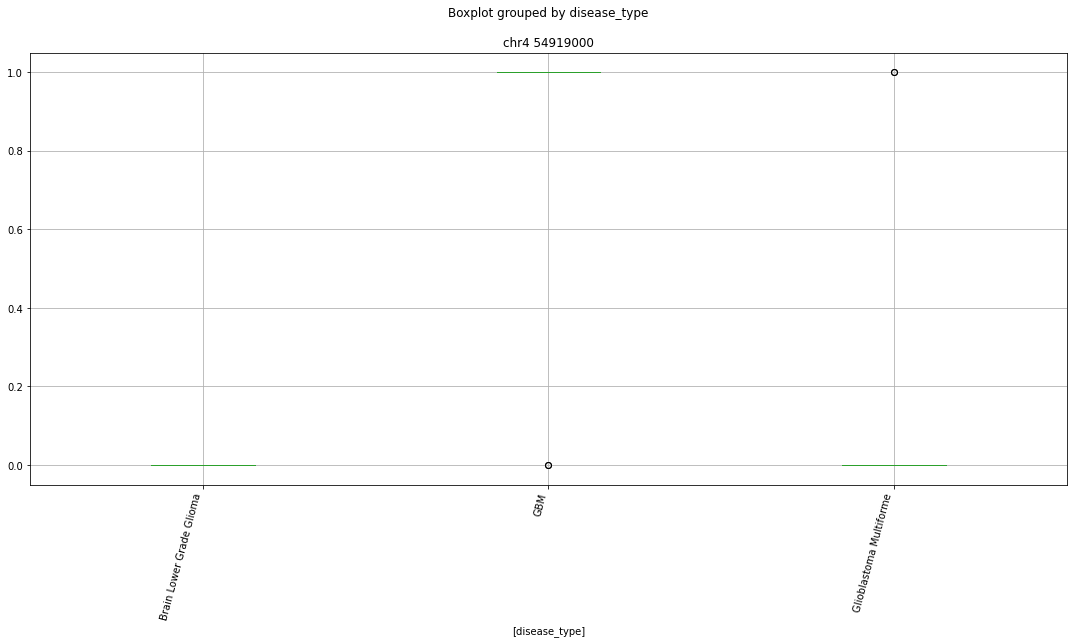

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr12 19092000


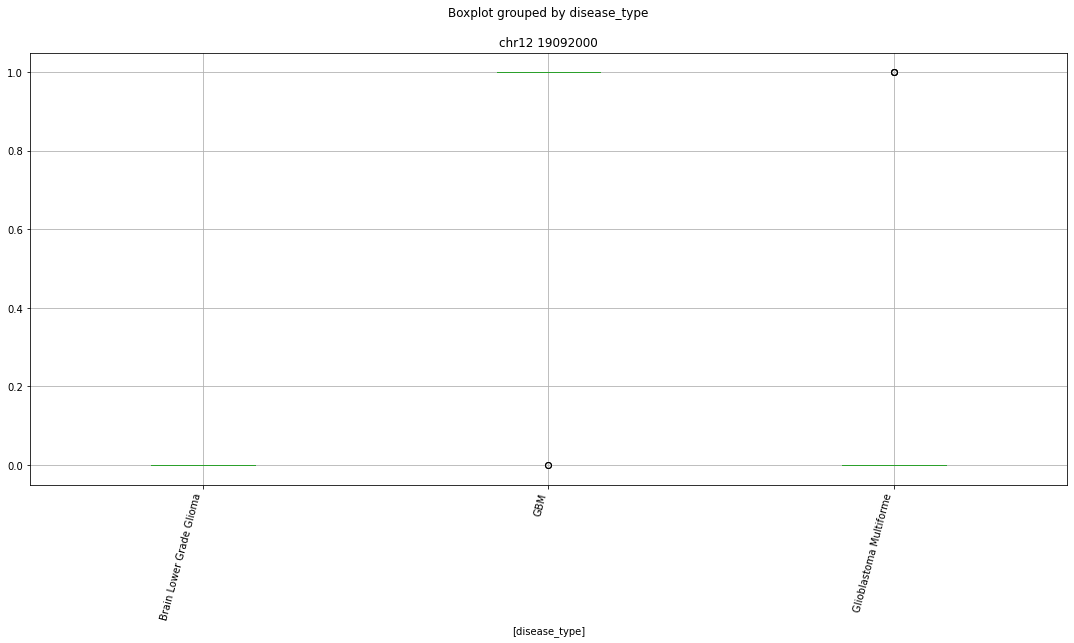

 p : 5.6655084315569635e-18  ( t : 11.554845549490993 ) :  chr9 74853000


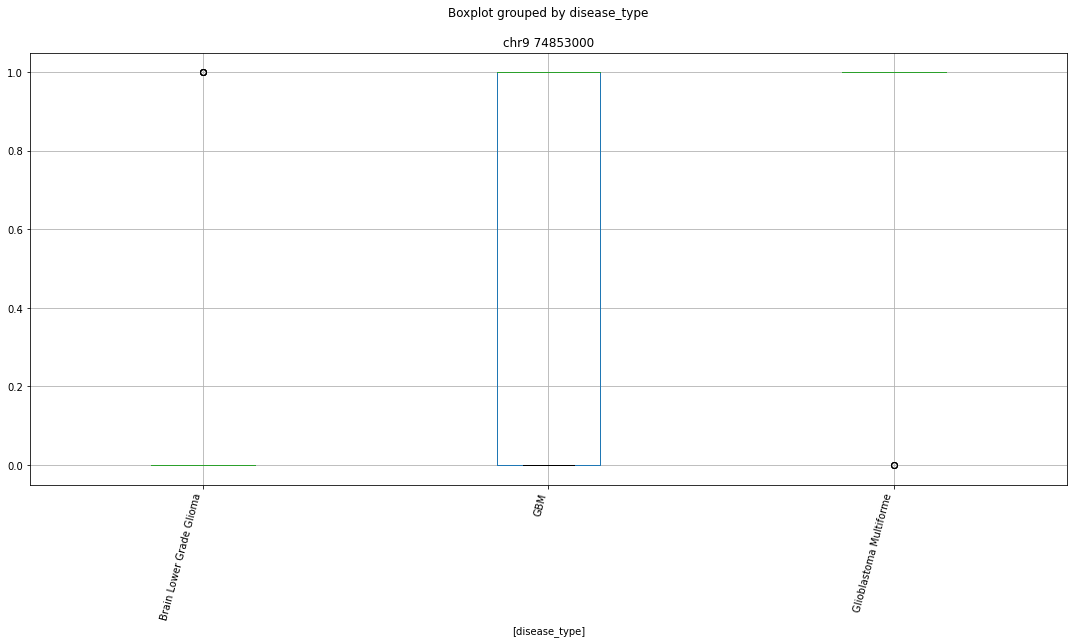

 p : 1.950069771513284e-17  ( t : 12.714573424165305 ) :  chr5 37518000


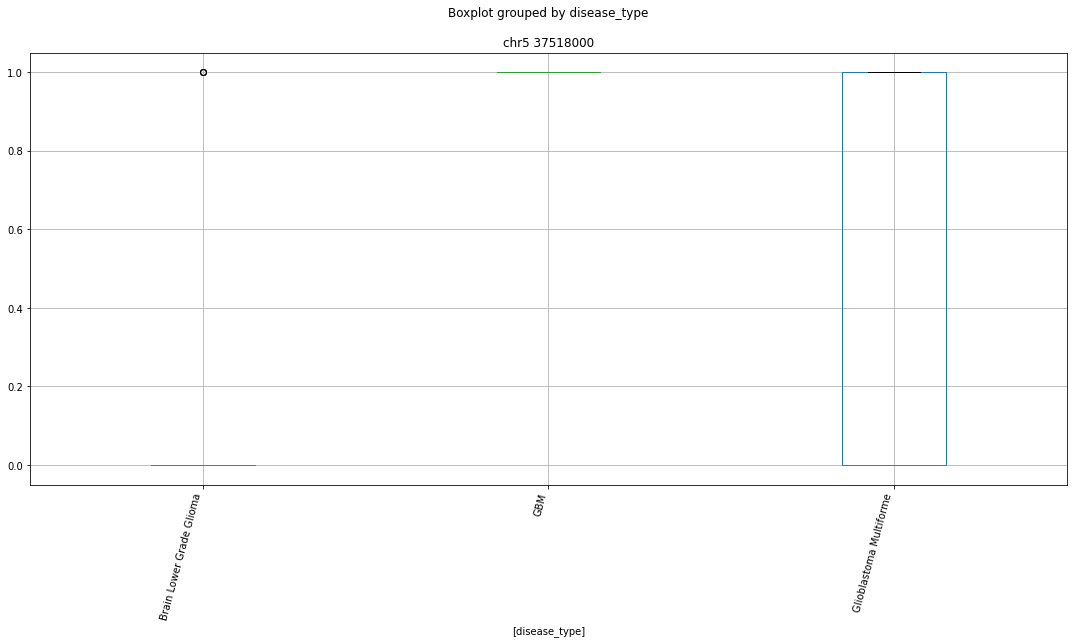

 p : 1.2480988517868185e-16  ( t : 10.797116094925201 ) :  chr3 119243000


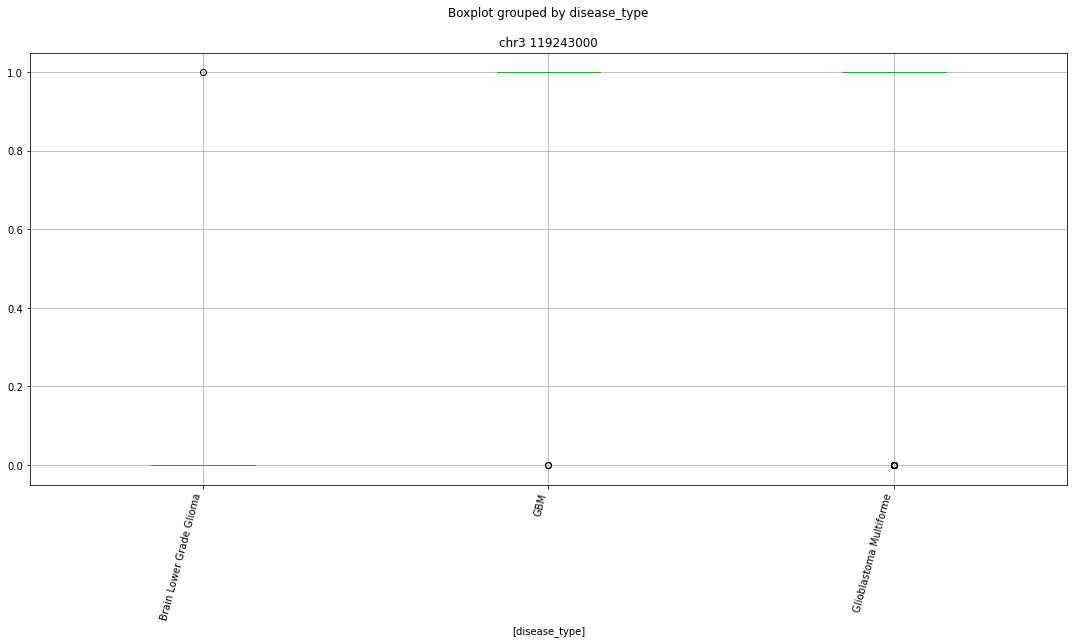

 p : 2.0346699265924837e-16  ( t : 11.961887225105135 ) :  chr16 2399000


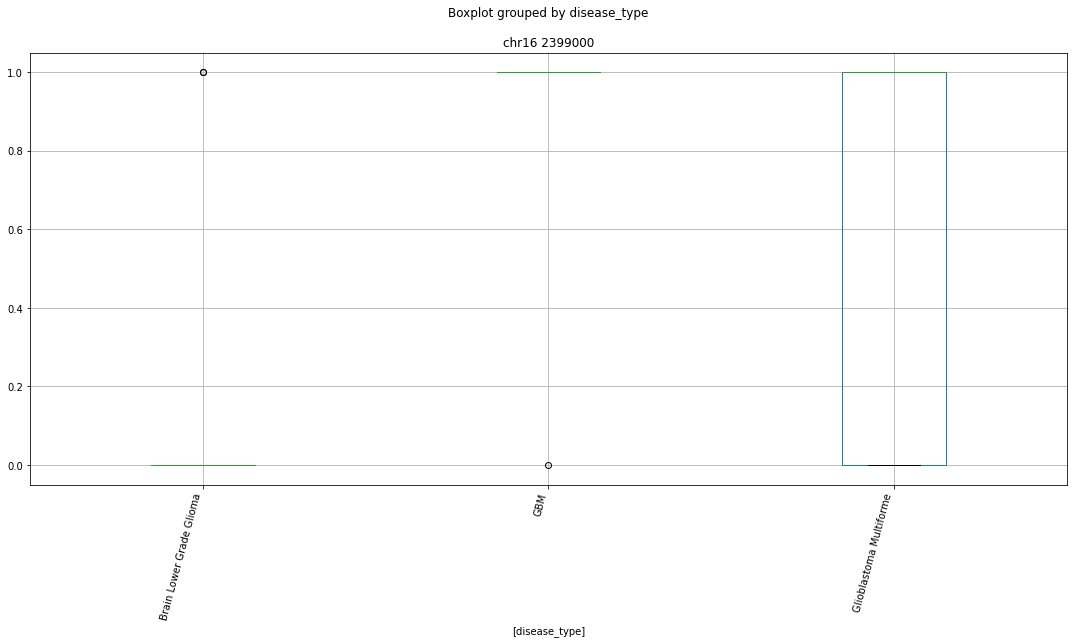

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr4 151732000


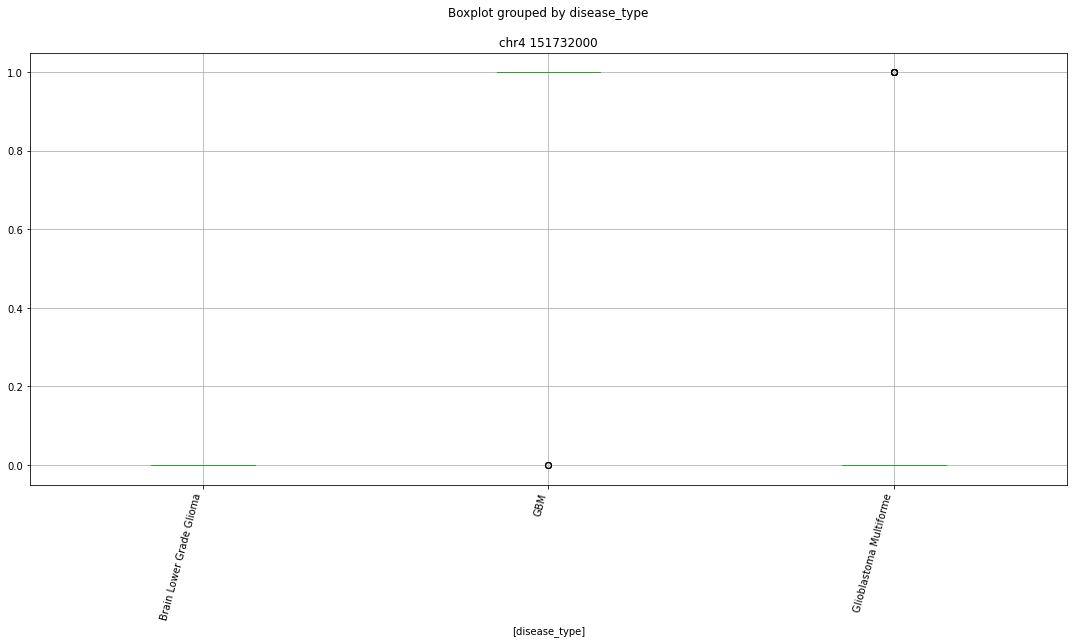

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr5 43745000


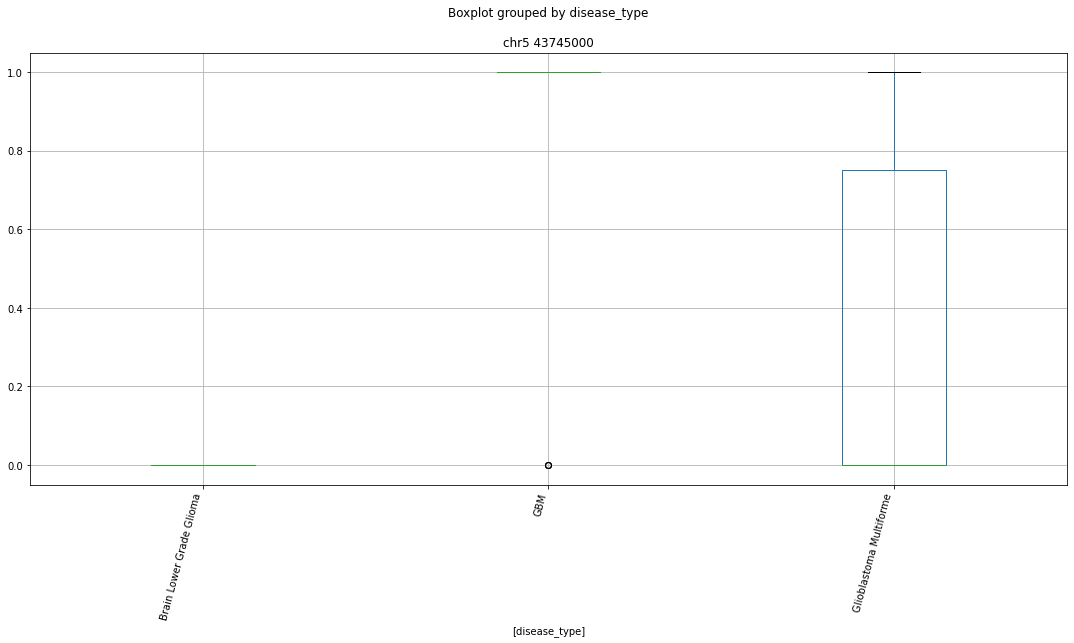

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr8 93832000


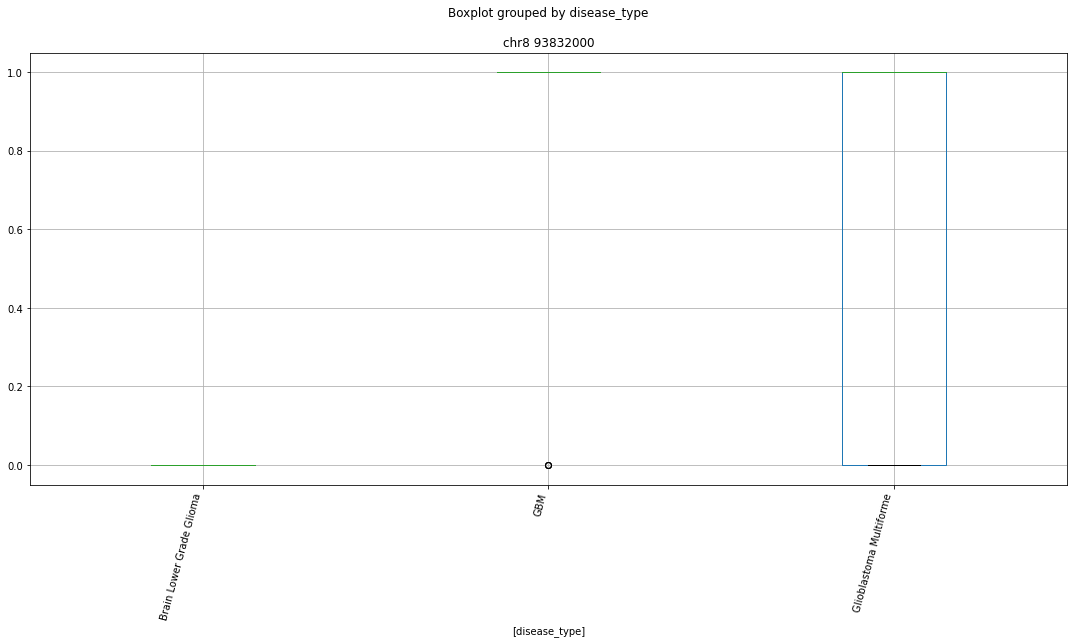

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr12 108421000


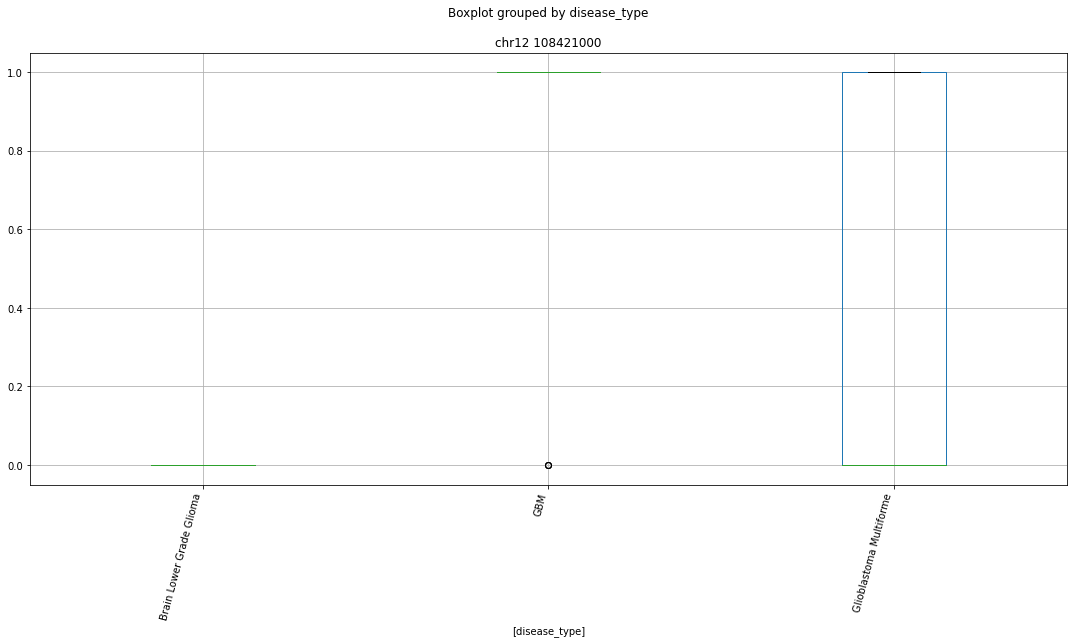

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr12 102250000


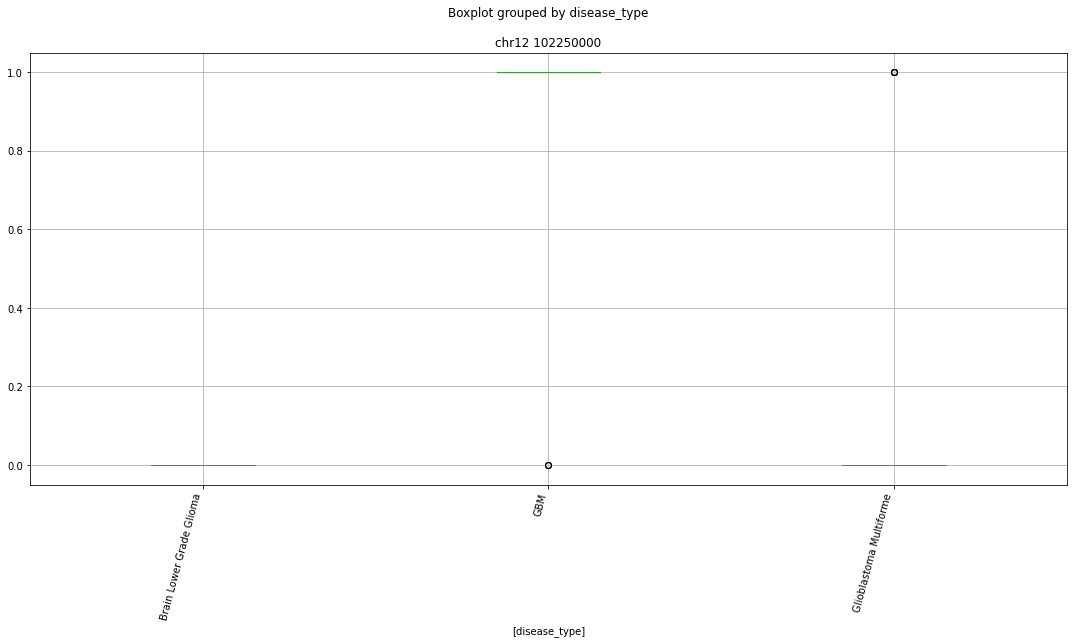

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr17 30978000


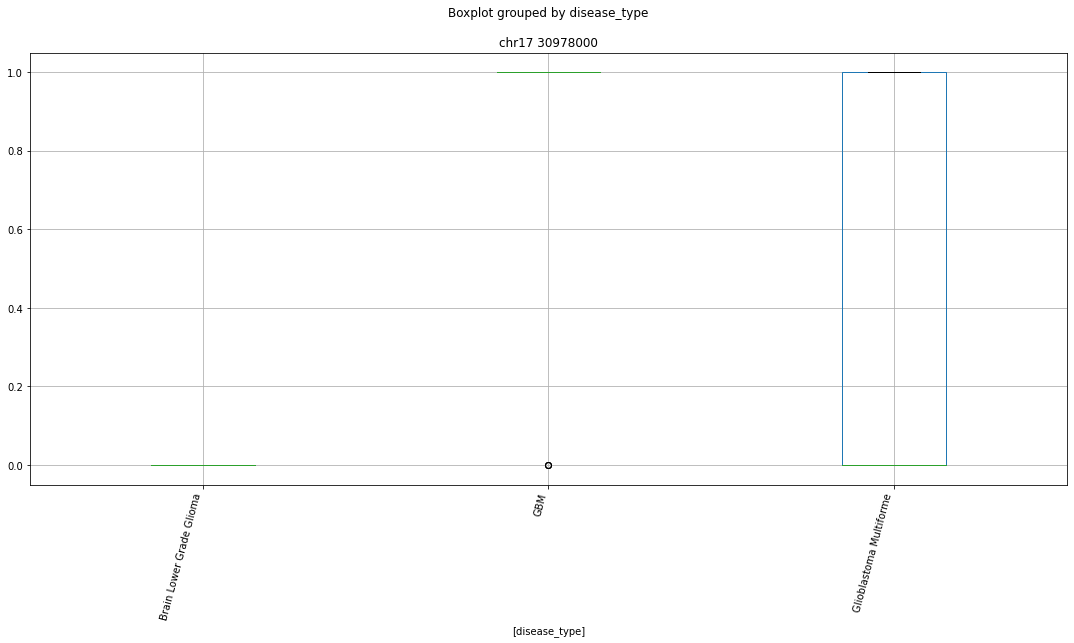

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr6 159661000


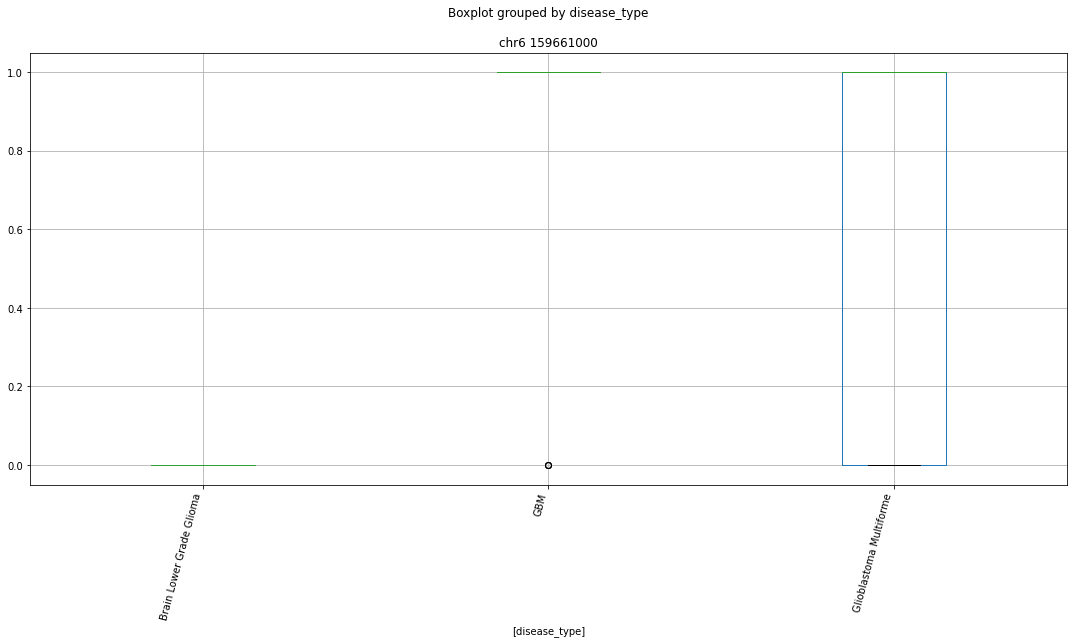

 p : 4.246227838271257e-16  ( t : 11.730463485510944 ) :  chr16 53626000


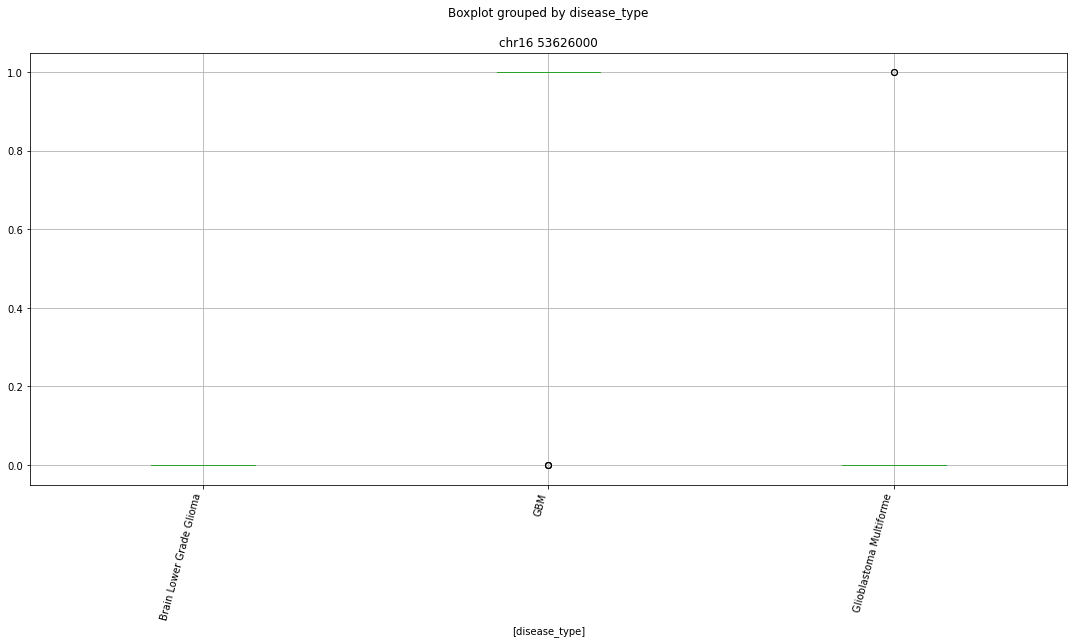

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr3 119243000


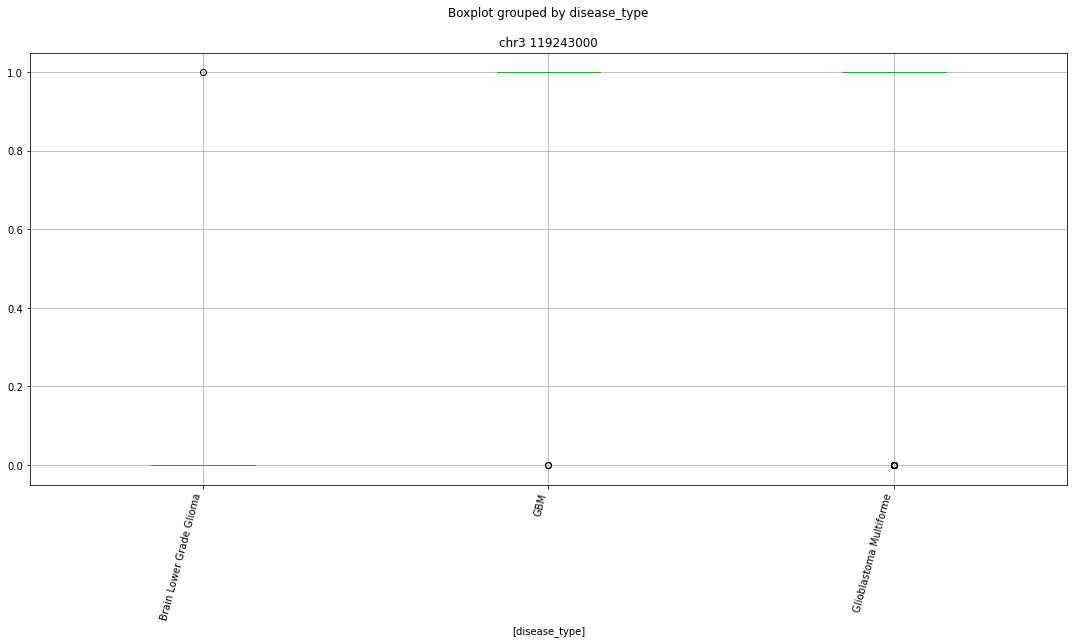

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr3 117051000


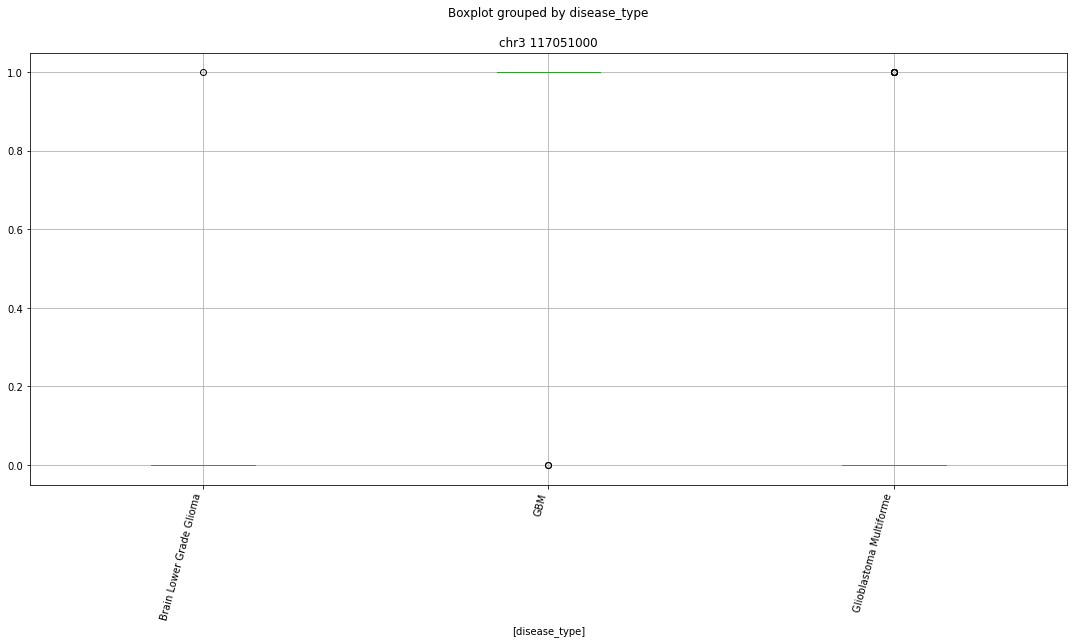

 p : 1.5411833978375324e-14  ( t : 9.642772086443424 ) :  chr18 51116000


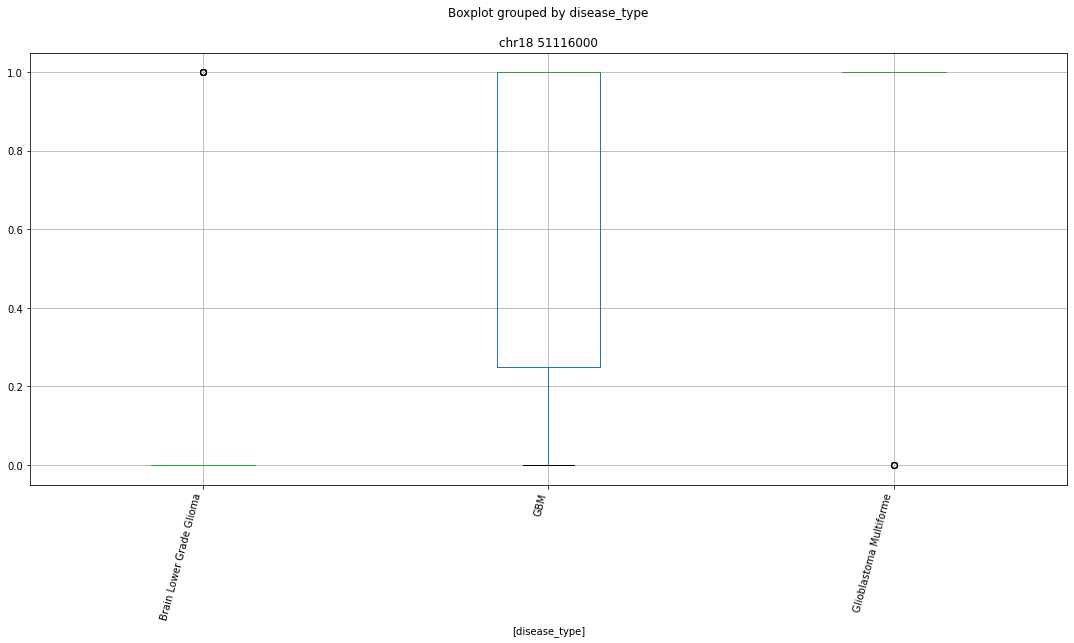

 p : 3.3864941393068684e-14  ( t : 9.456395760043183 ) :  chr4 40787000


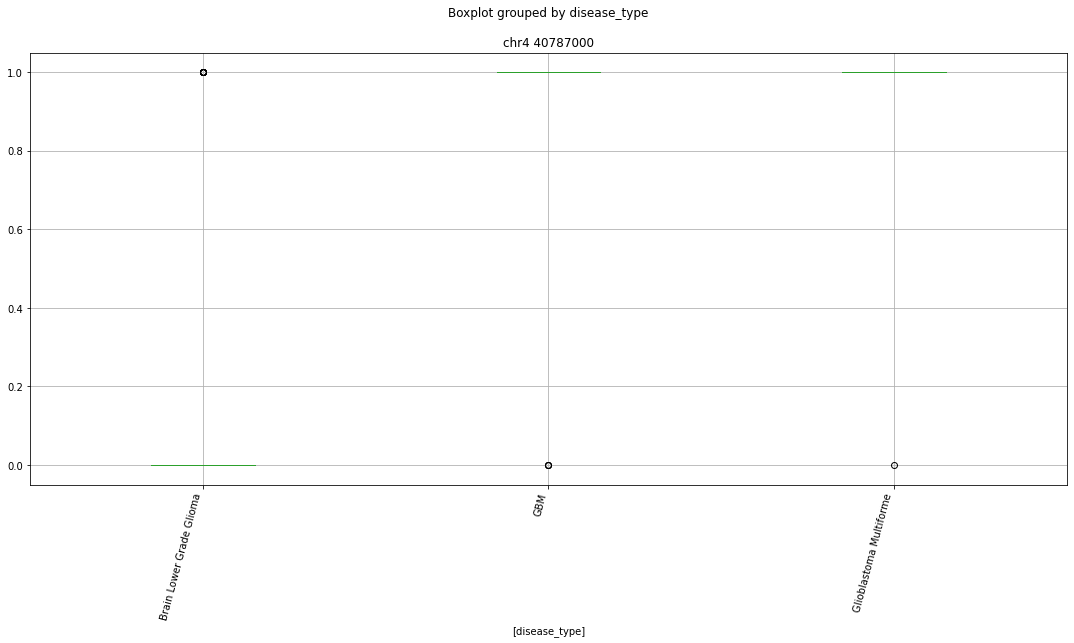

 p : 7.704722670518554e-14  ( t : 10.151540384745967 ) :  chr1 43502000


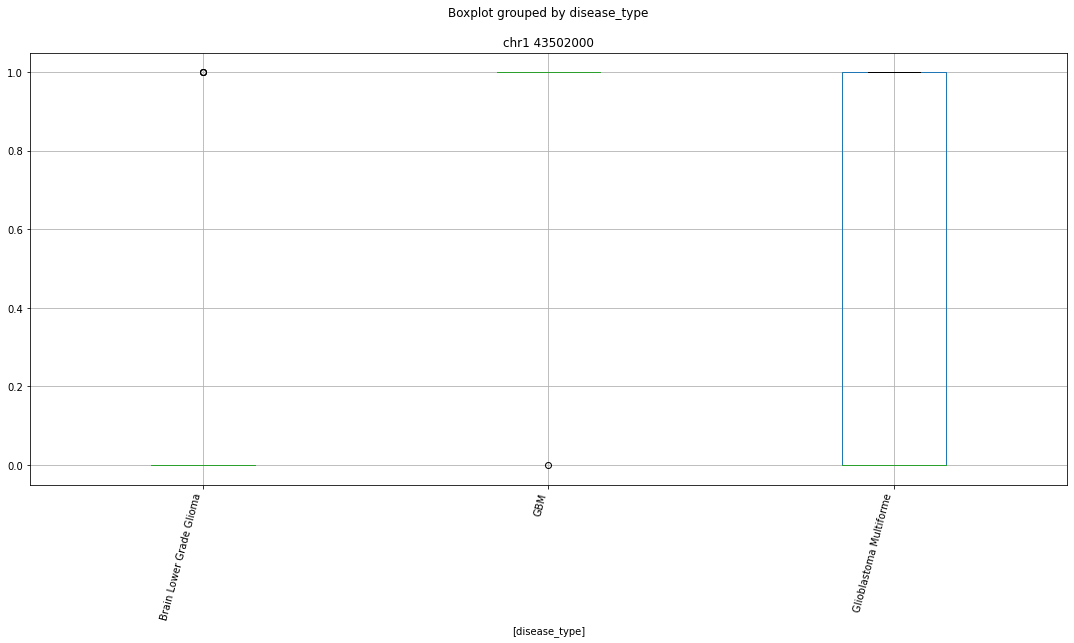

 p : 7.704722670518554e-14  ( t : 10.151540384745967 ) :  chr1 150851000


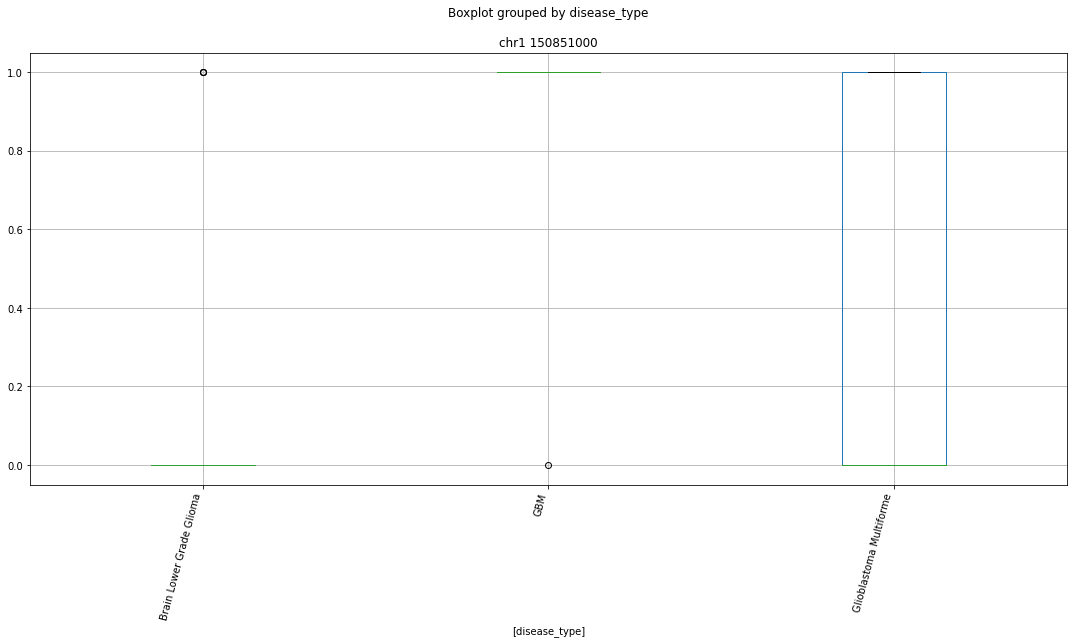

 p : 2.0557708470858964e-13  ( t : 9.031208501954975 ) :  chr6 25585000


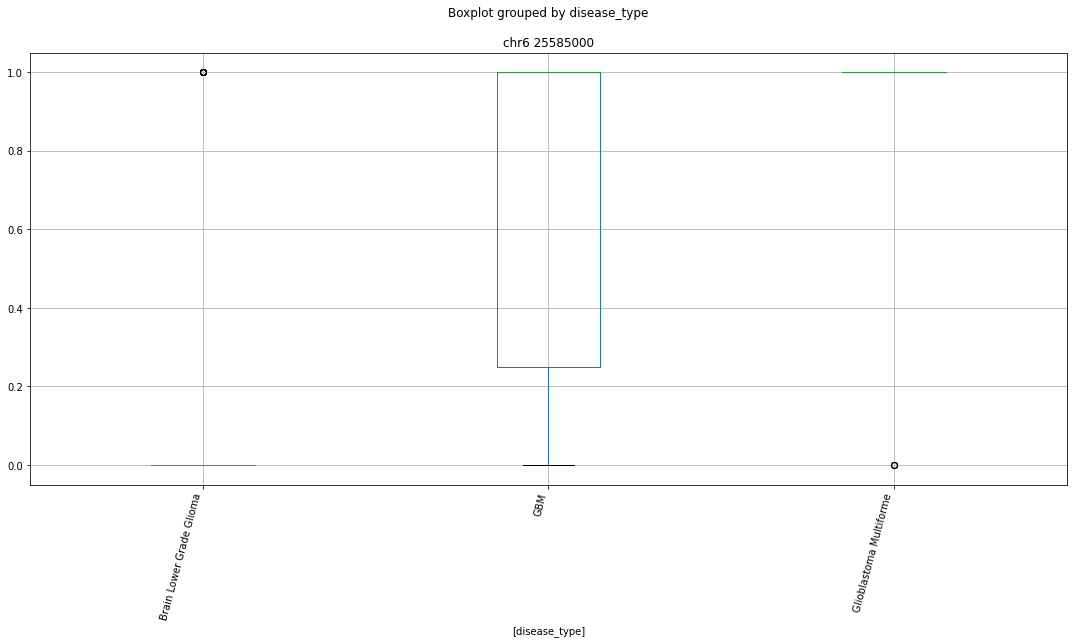

 p : 3.230994299523944e-13  ( t : 8.924928080877834 ) :  chr12 63687000


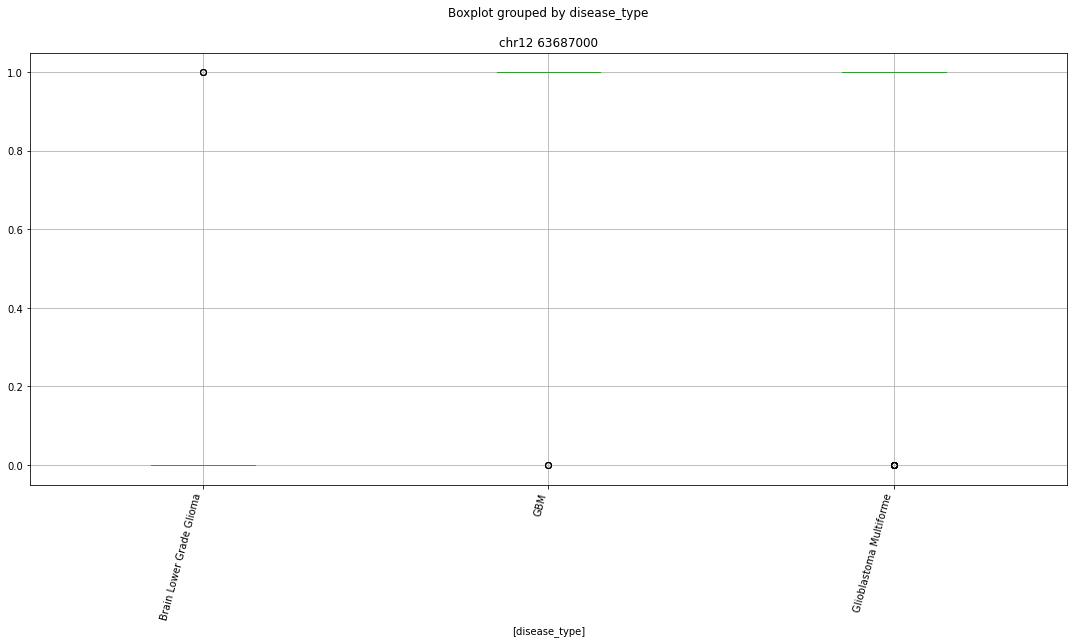

 p : 3.3711776281921387e-13  ( t : 9.719554838517347 ) :  chr12 120731000


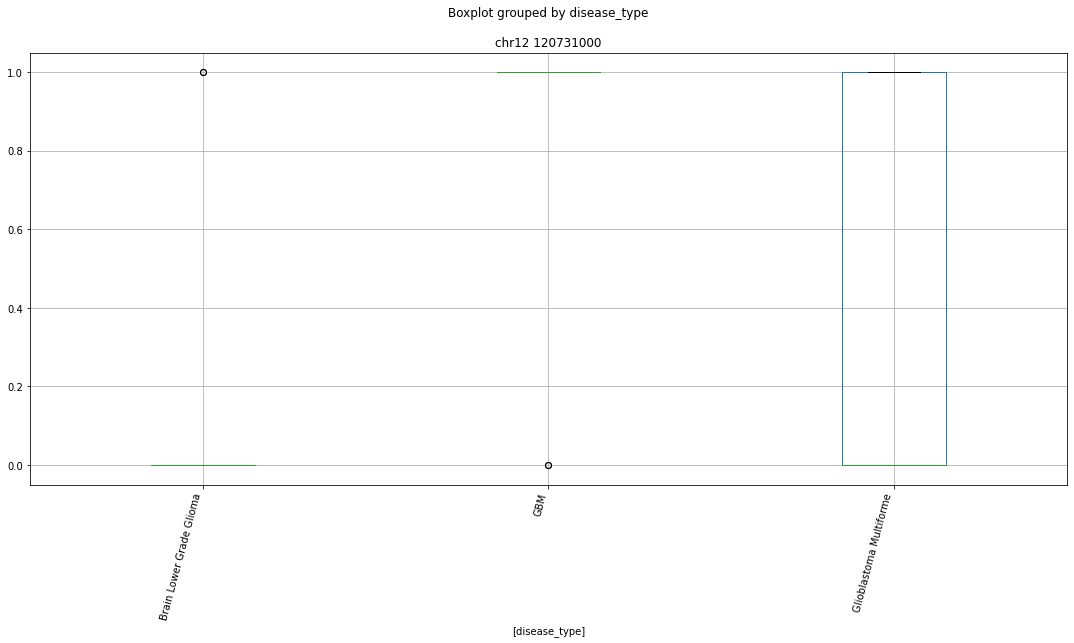

 p : 3.3711776281921387e-13  ( t : 9.719554838517347 ) :  chr17 65938000


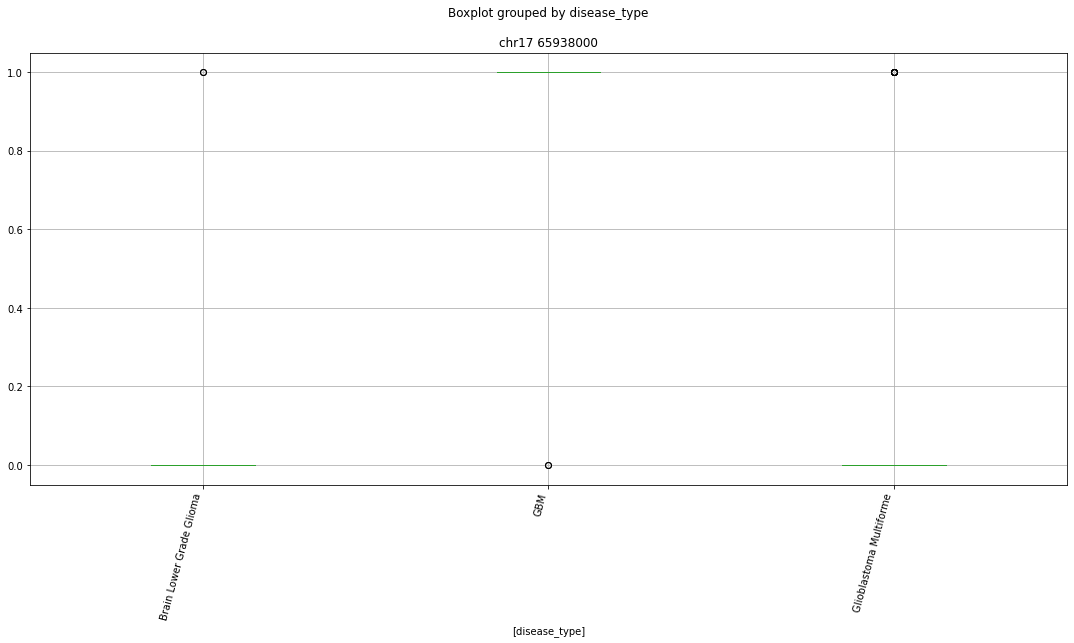

 p : 3.3711776281921387e-13  ( t : 9.719554838517347 ) :  chr7 20669000


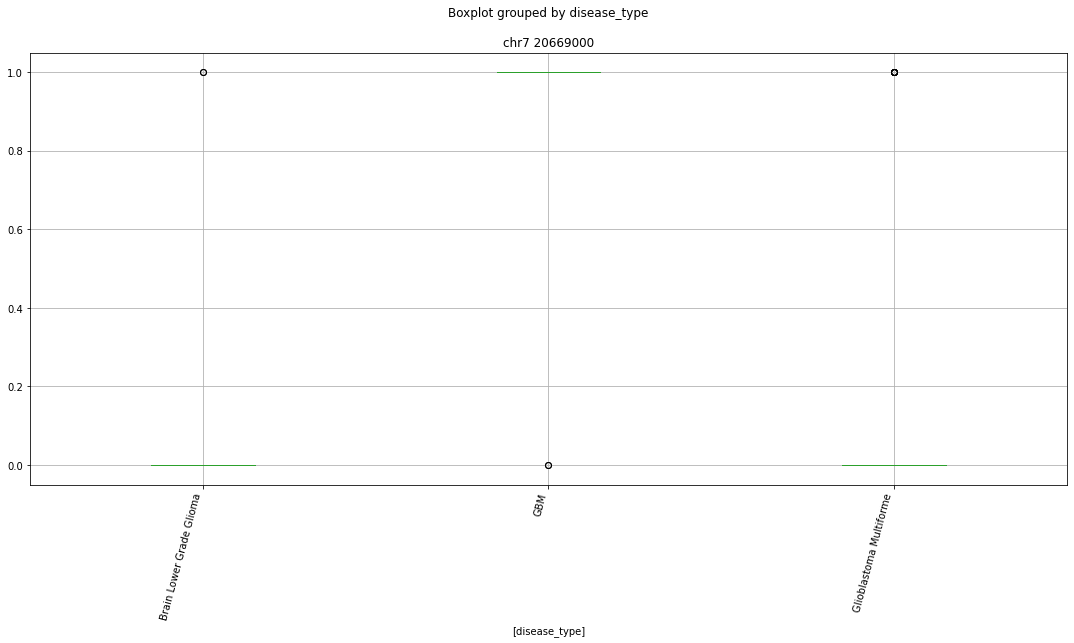

 p : 3.3711776281921387e-13  ( t : 9.719554838517347 ) :  chr9 129662000


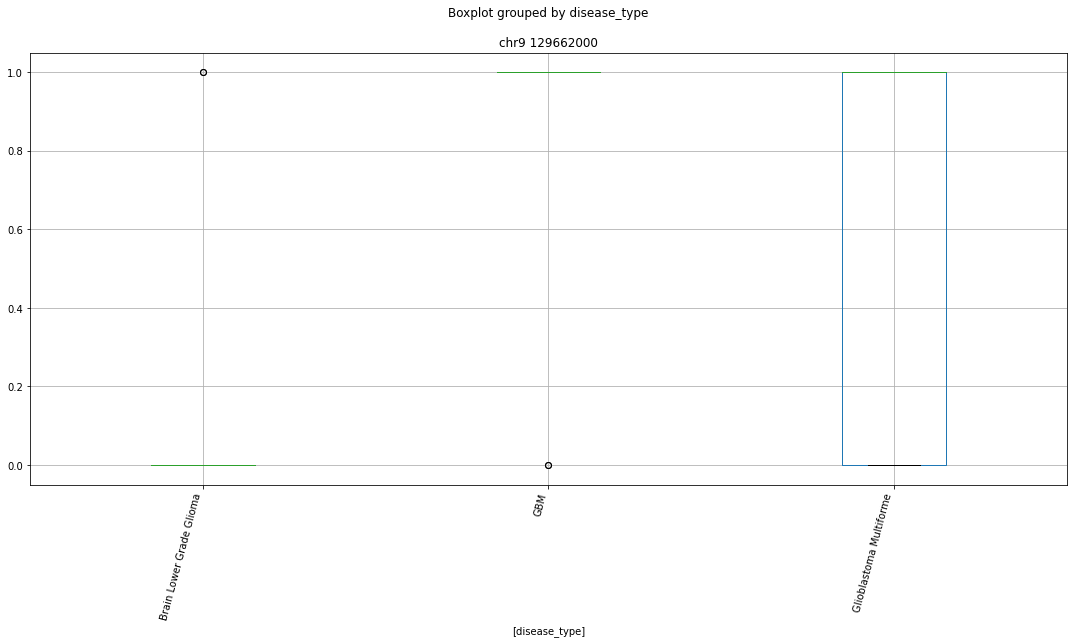

 p : 3.3711776281921387e-13  ( t : 9.719554838517347 ) :  chr12 18520000


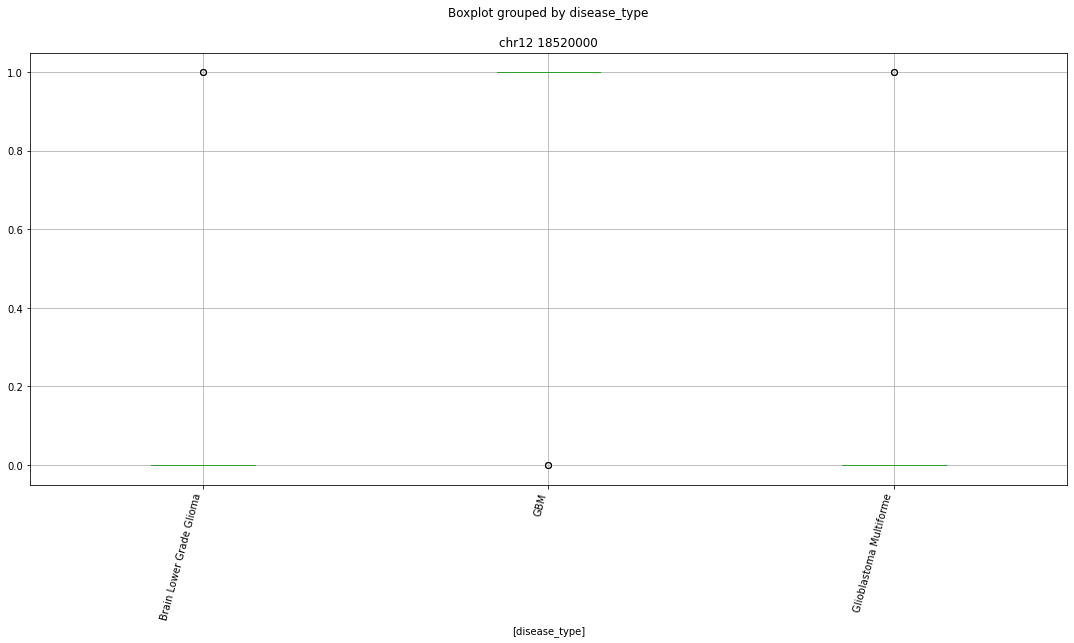

 p : 3.5067033030961863e-13  ( t : 8.905691017720823 ) :  chr6 159661000


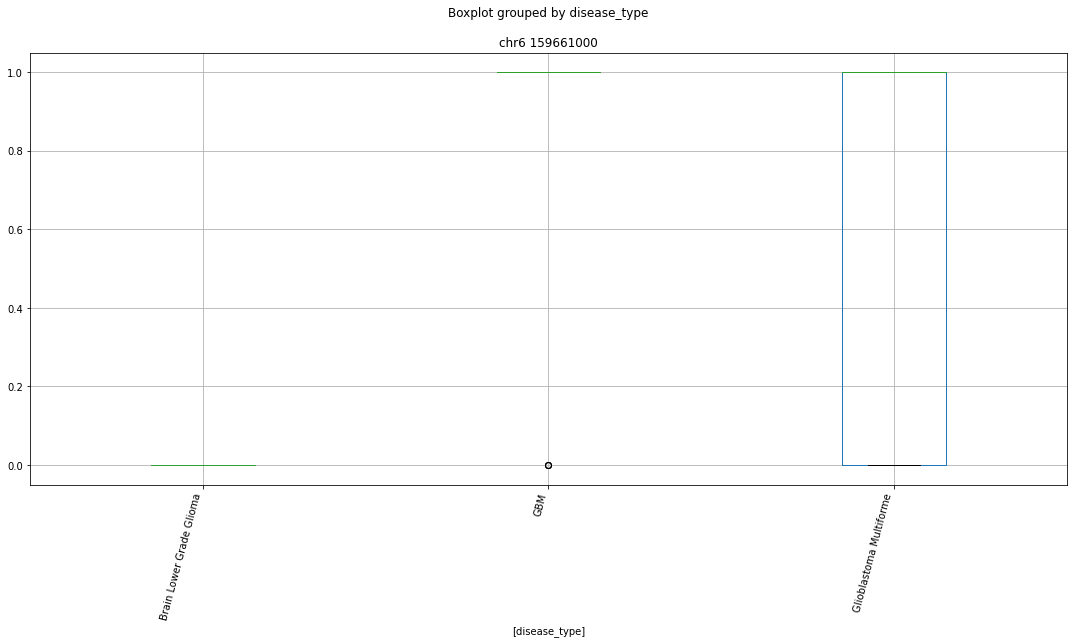

 p : 3.782650537486202e-13  ( t : 9.68611143426407 ) :  chr21 28564000


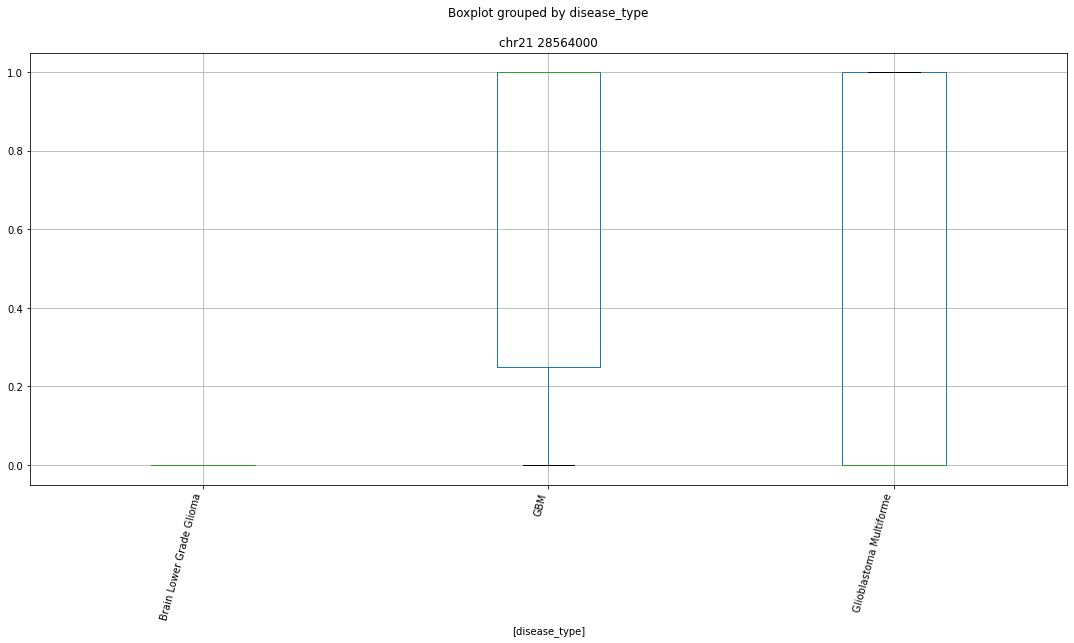

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr1 52743000


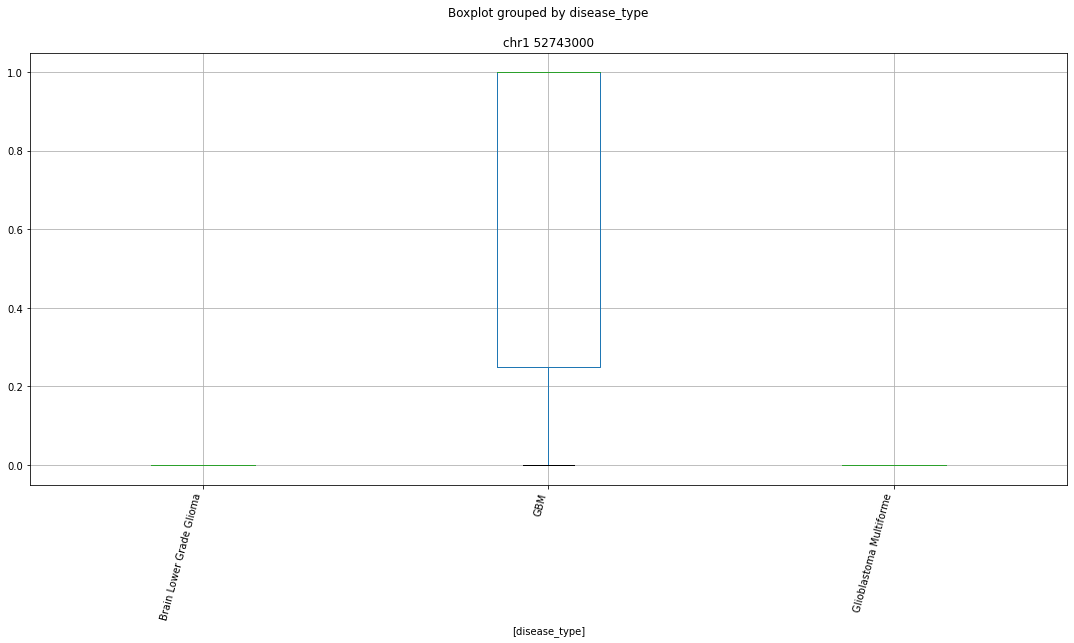

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr6 158348000


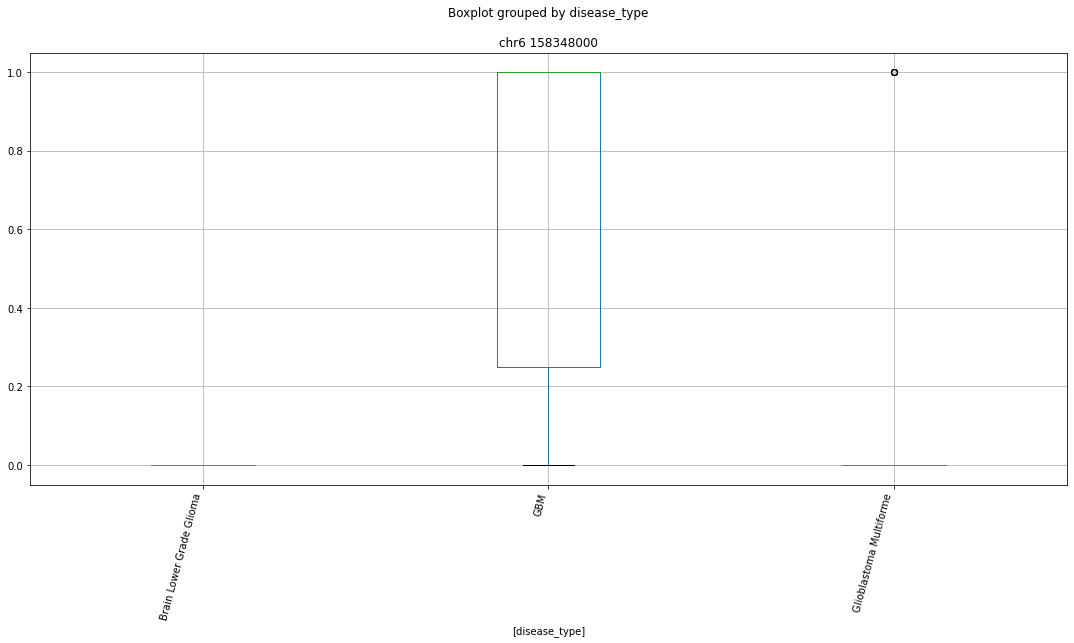

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr4 6836000


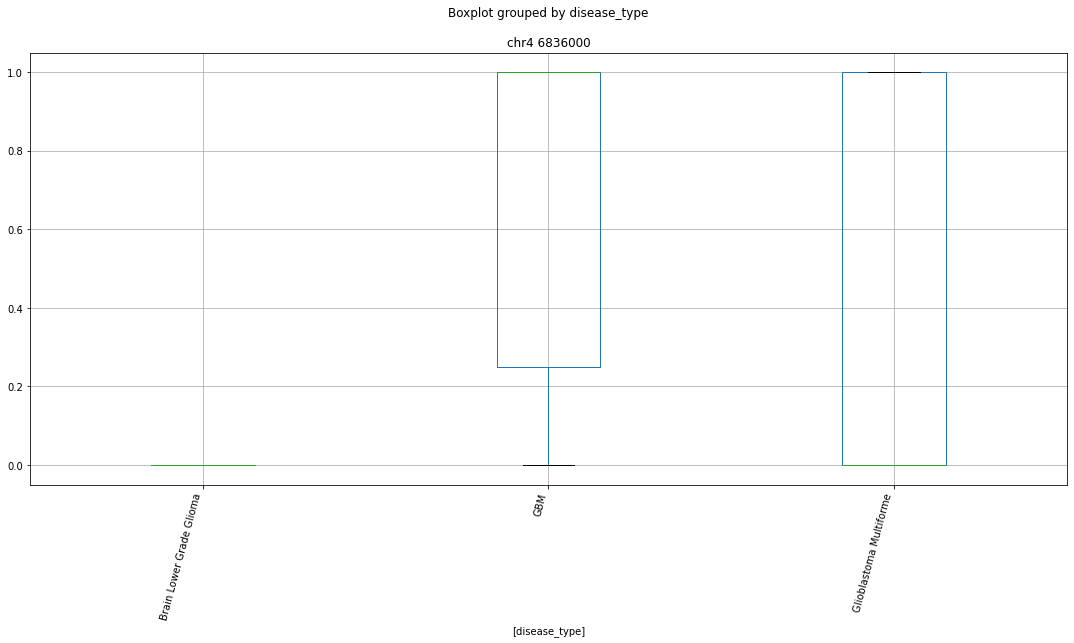

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr16 57199000


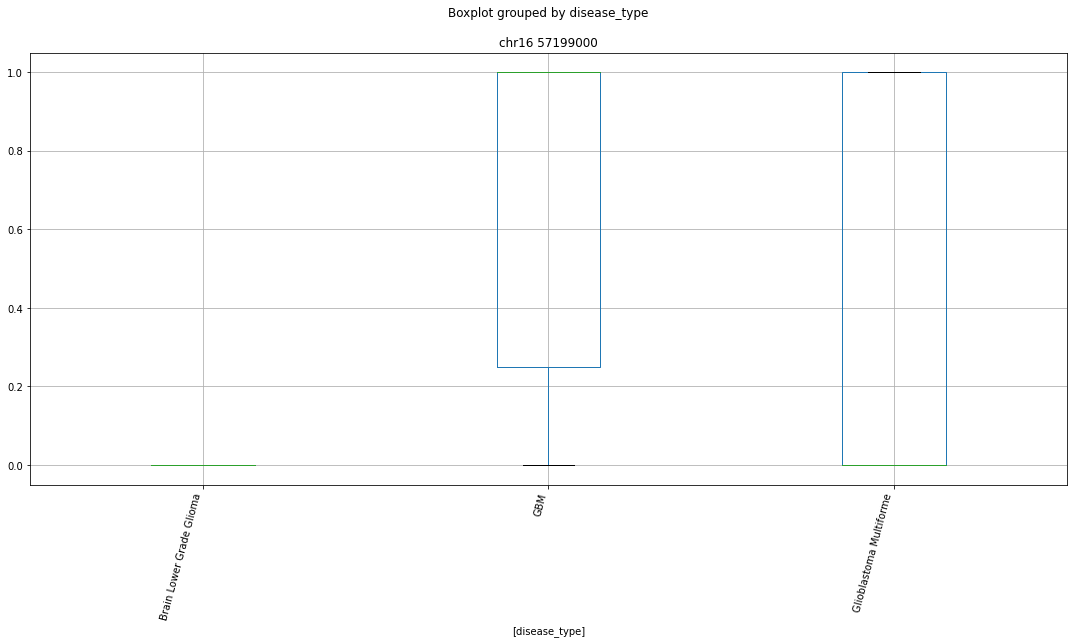

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr10 58245000


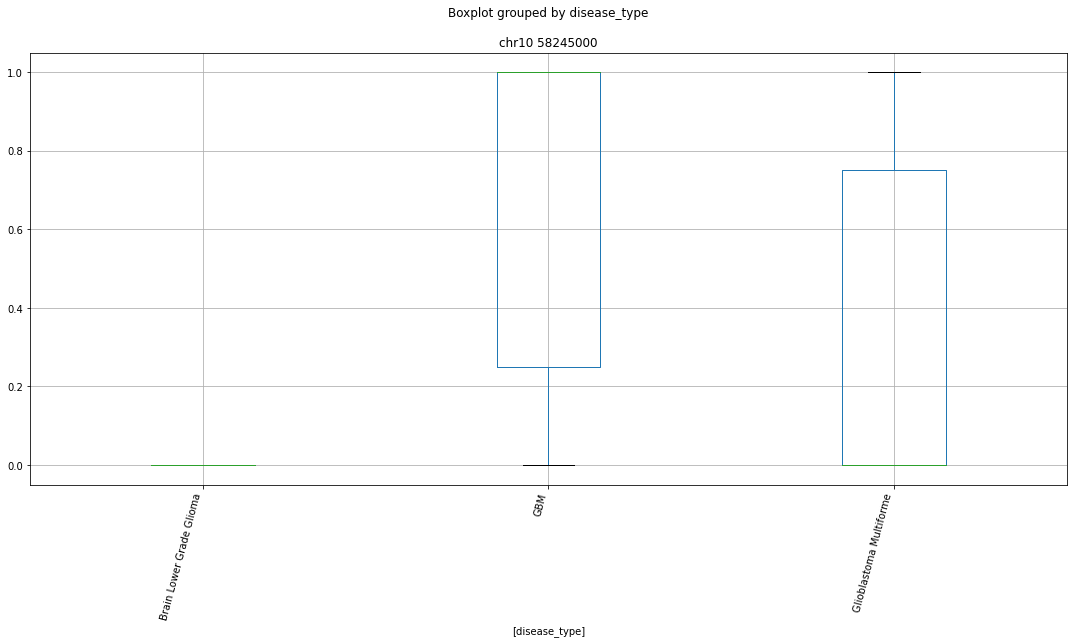

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr10 43330000


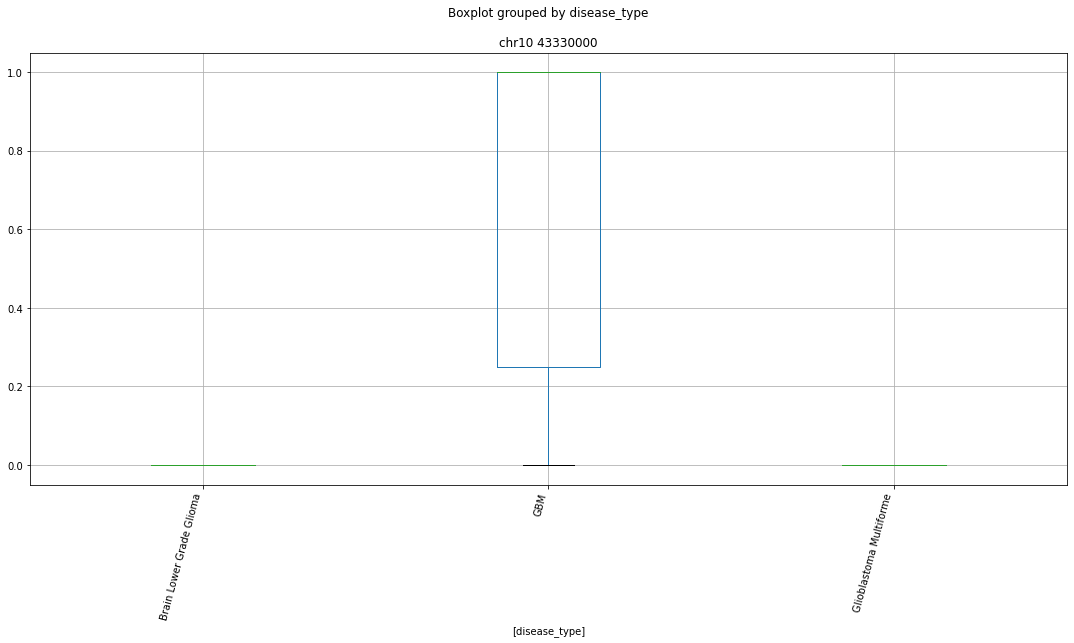

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr4 3093000


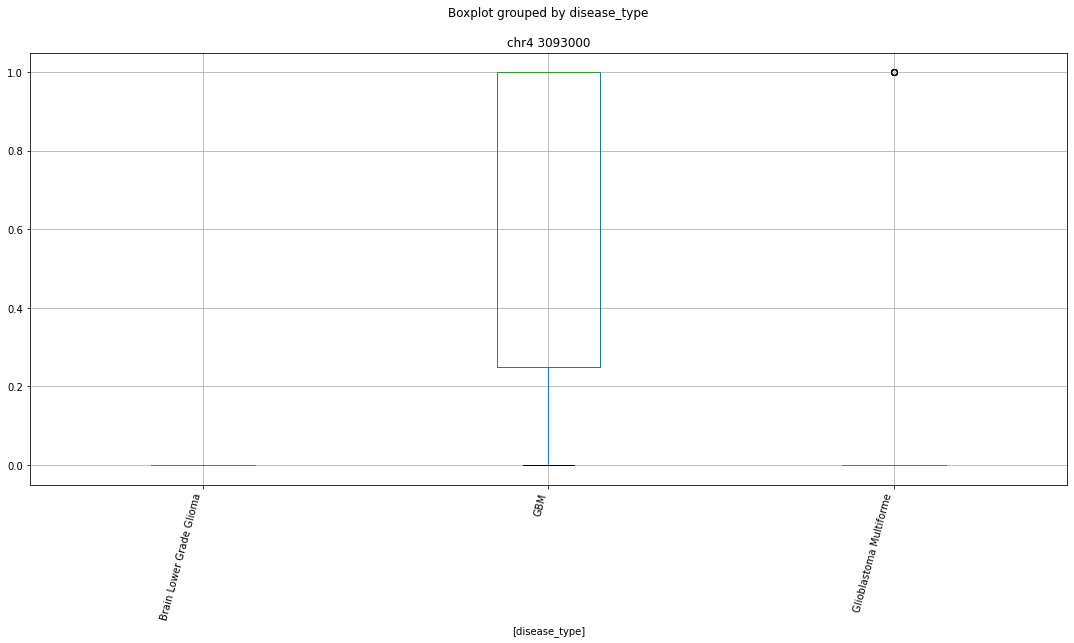

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr10 79278000


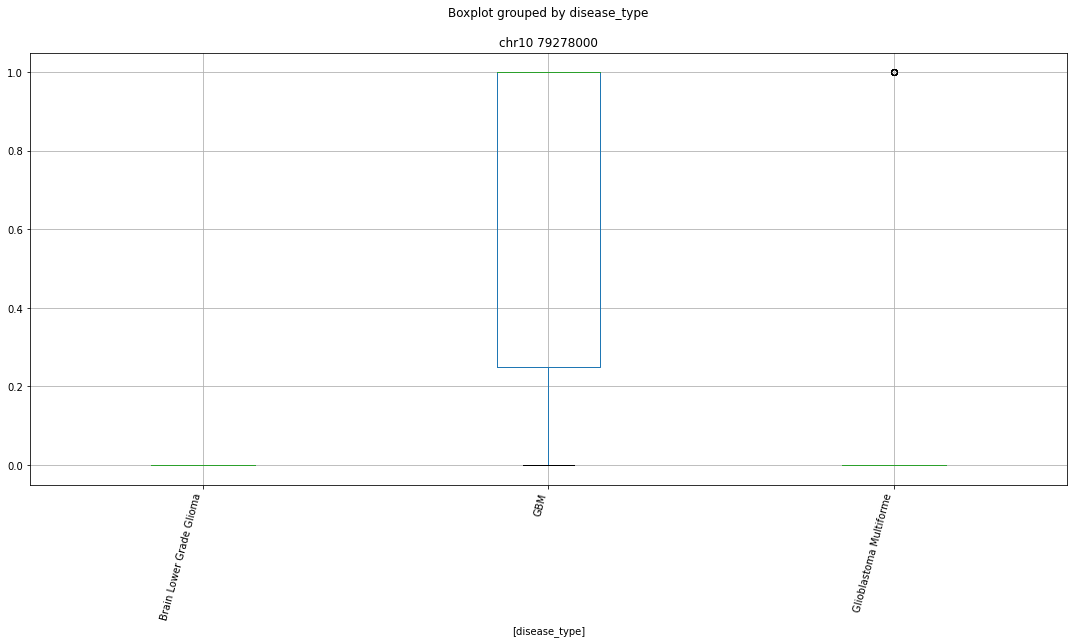

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr1 231455000


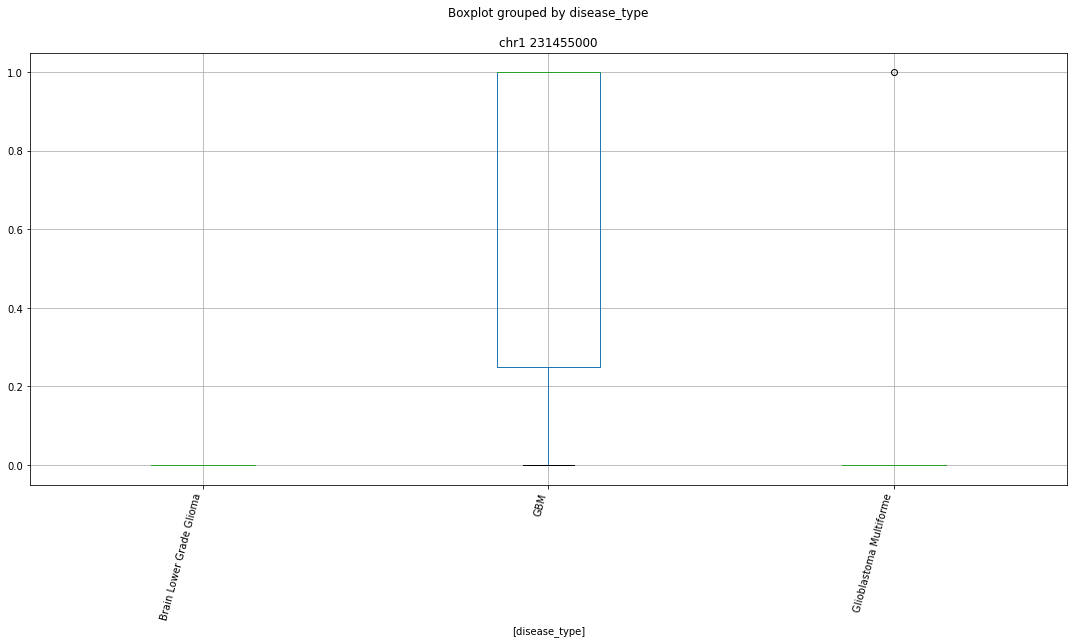

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr14 33983000


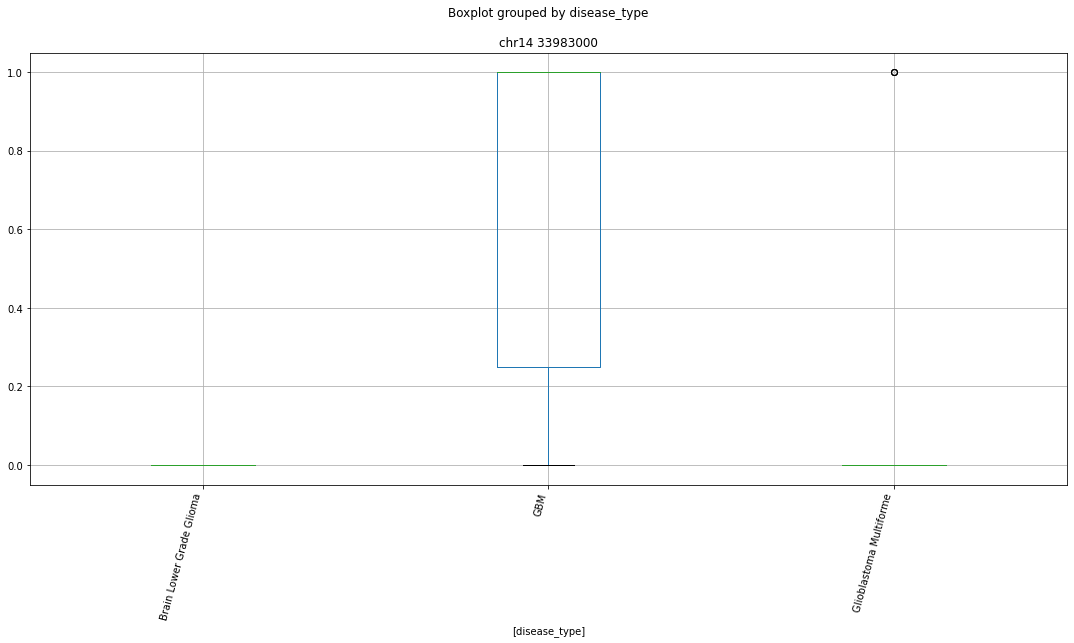

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr3 38064000


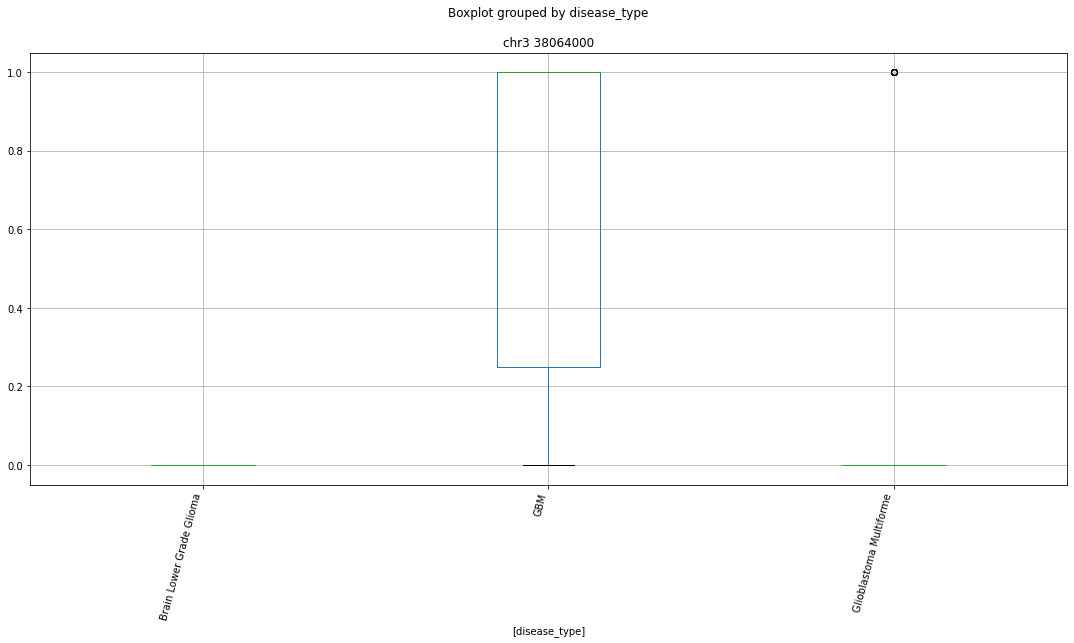

 p : 5.624511905133774e-13  ( t : 9.571183164573297 ) :  chr21 29392000


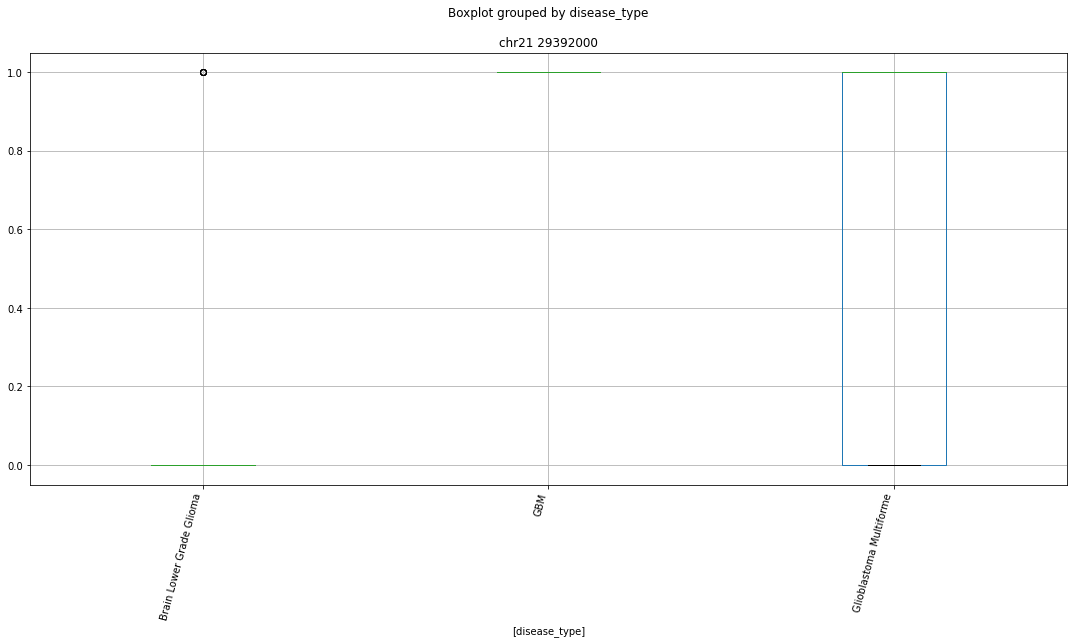

 p : 6.156397805631412e-13  ( t : 9.545065224835223 ) :  chr11 77934000


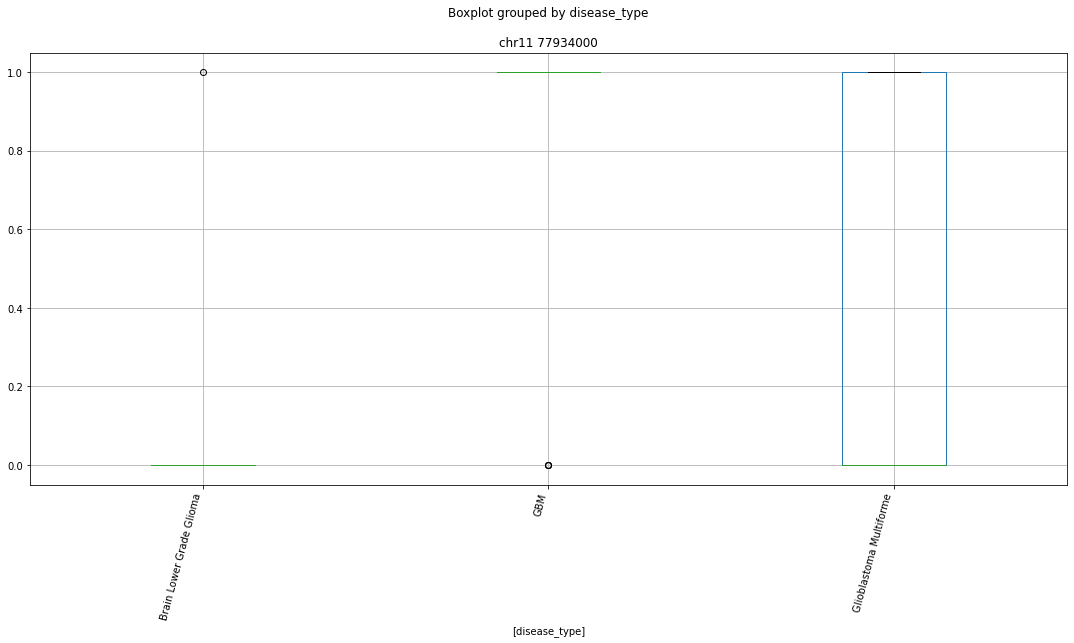

 p : 6.156397805631412e-13  ( t : 9.545065224835223 ) :  chr14 55919000


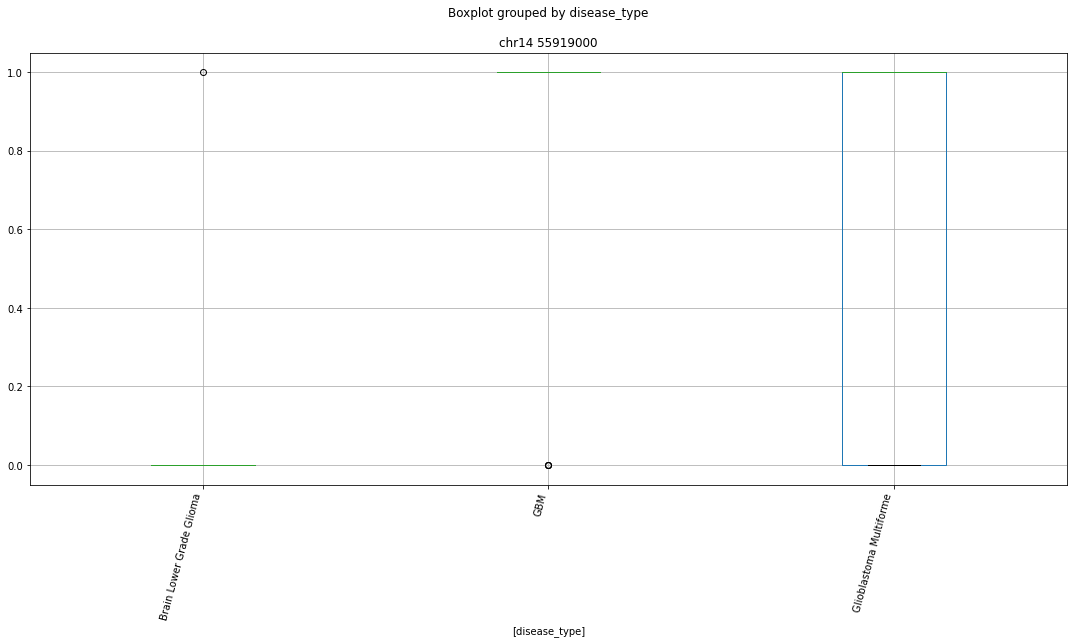

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr8 100352000


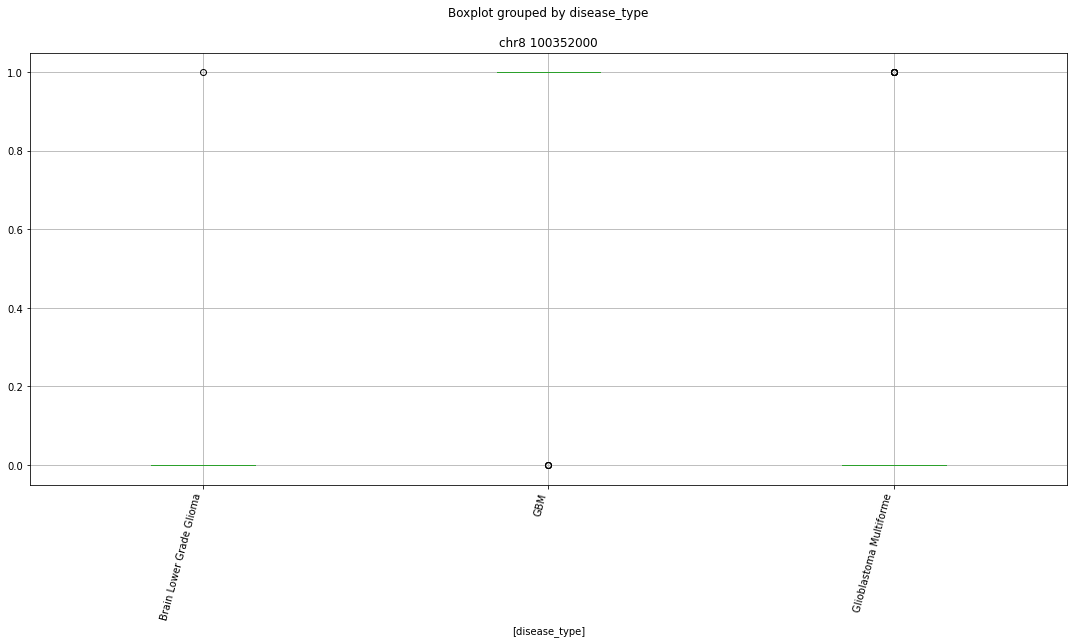

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr4 150954000


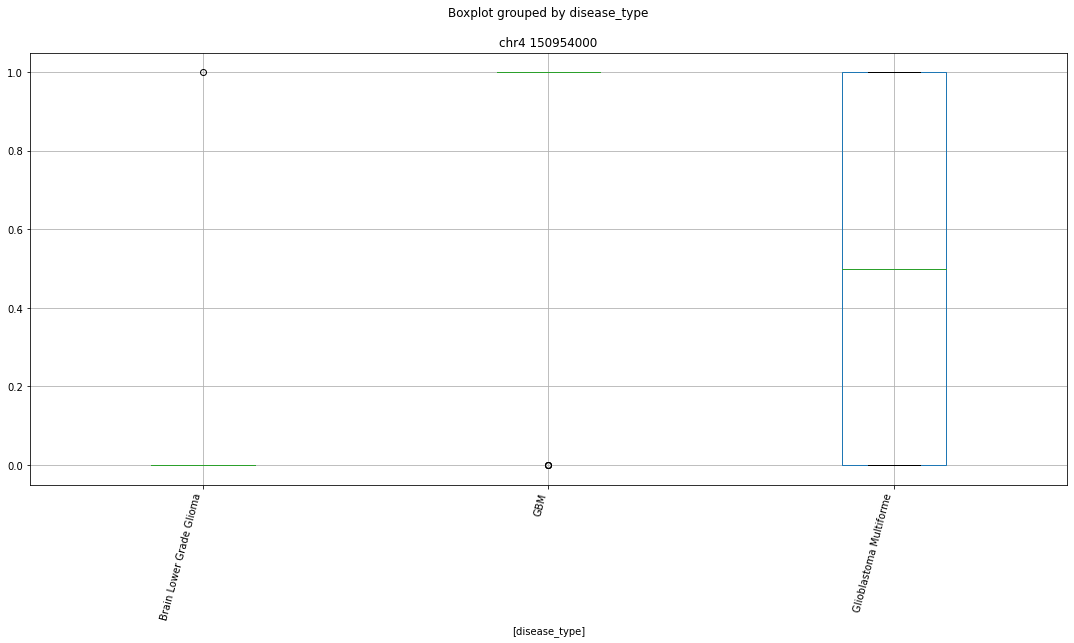

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr5 50773000


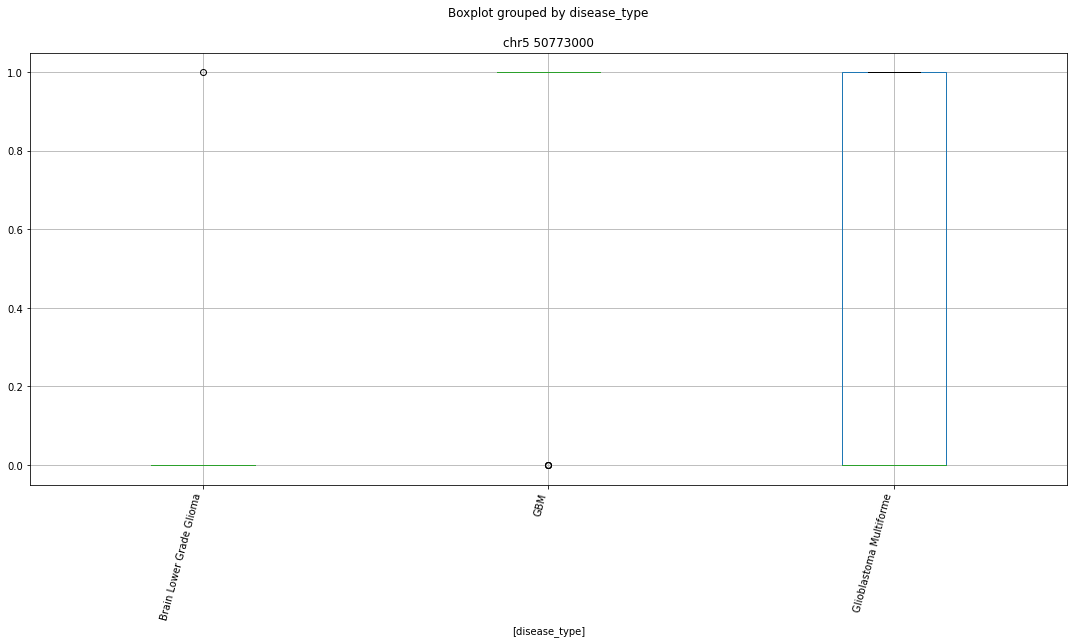

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr15 51885000


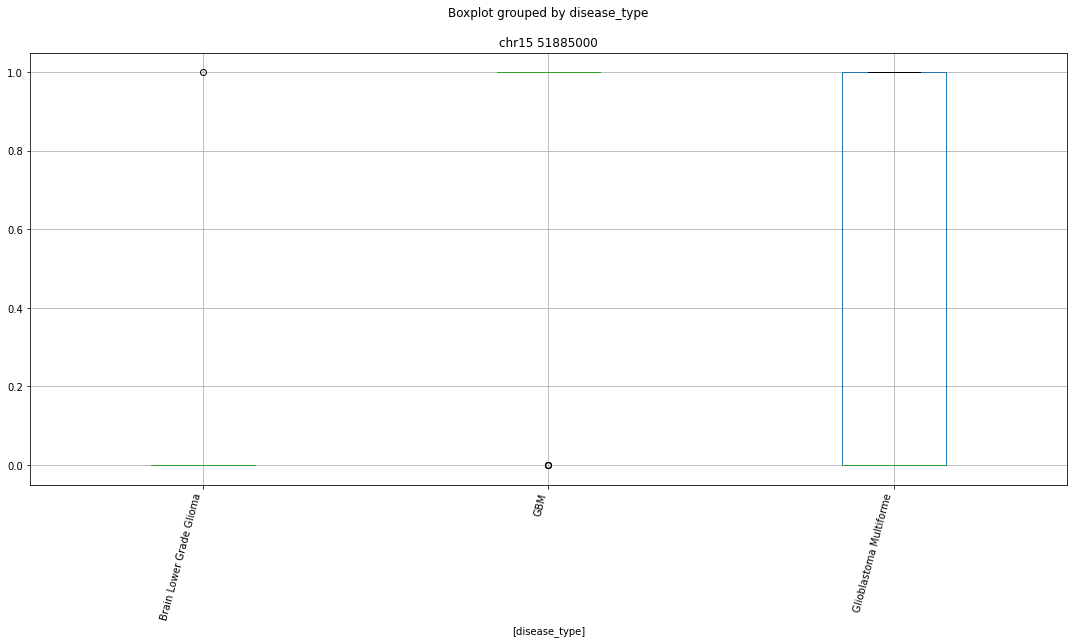

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr10 102300000


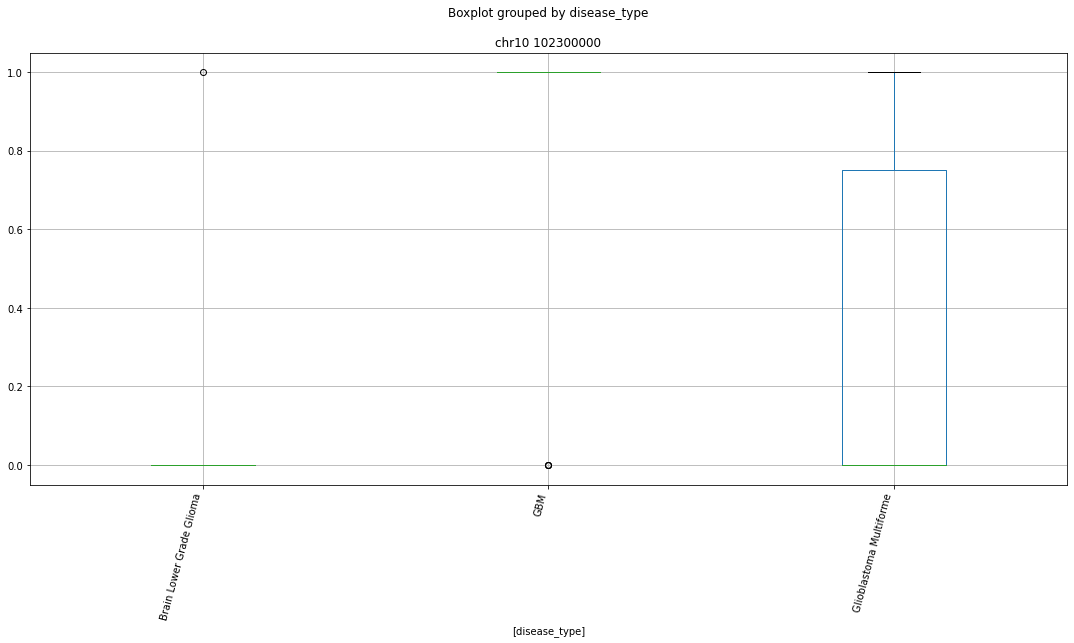

 p : 4.94184080440652e-12  ( t : 8.28545219165828 ) :  chr4 113797000


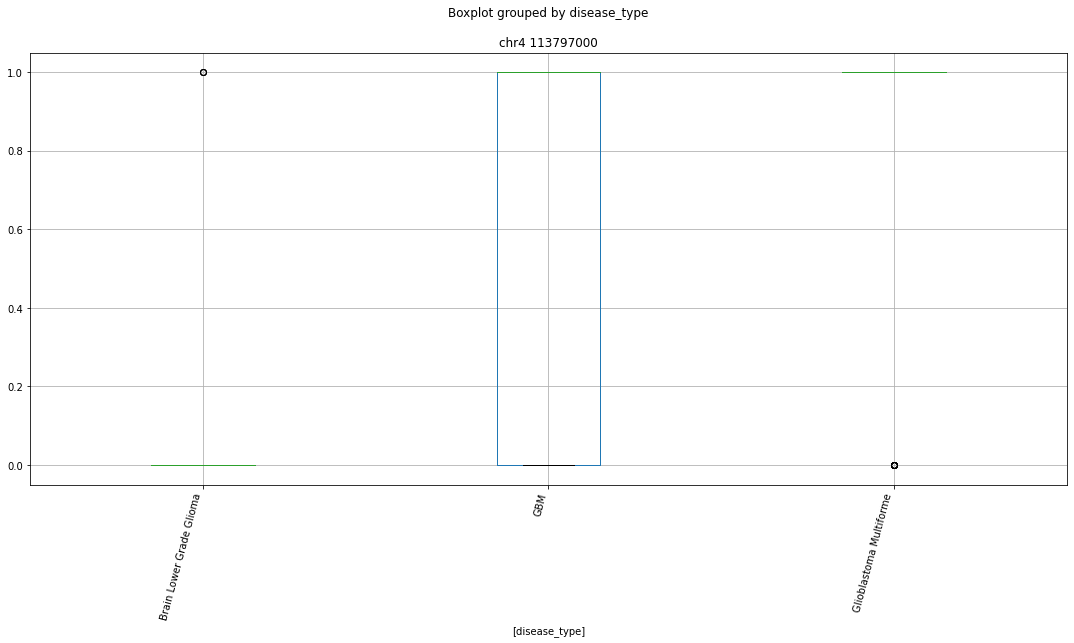

 p : 4.94184080440652e-12  ( t : 8.28545219165828 ) :  chr13 100618000


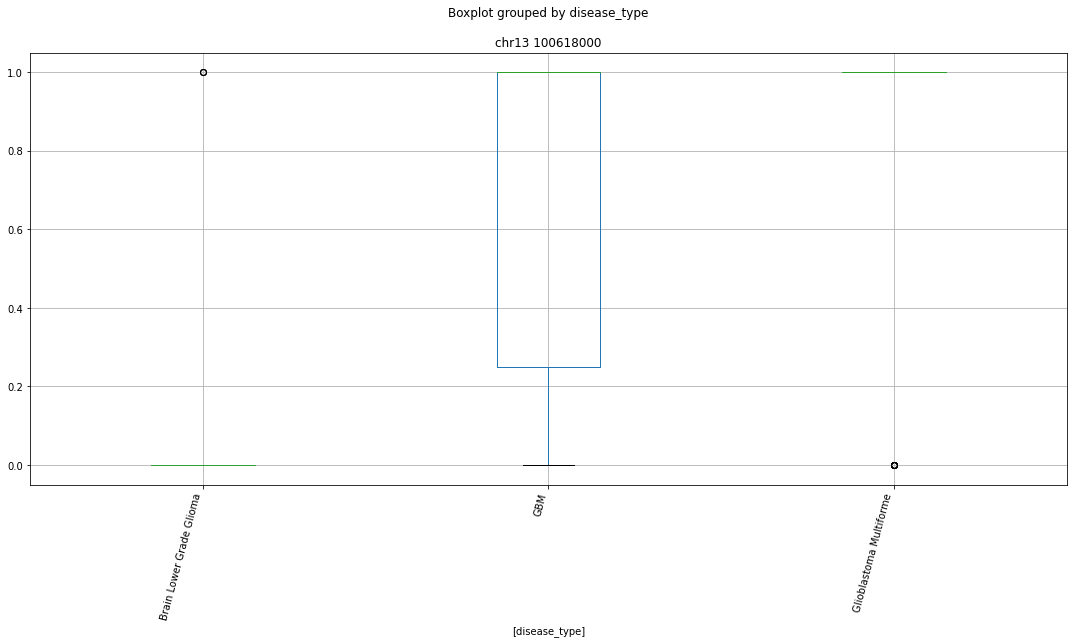

 p : 5.721020483559551e-12  ( t : 8.907157266714885 ) :  chr1 147062000


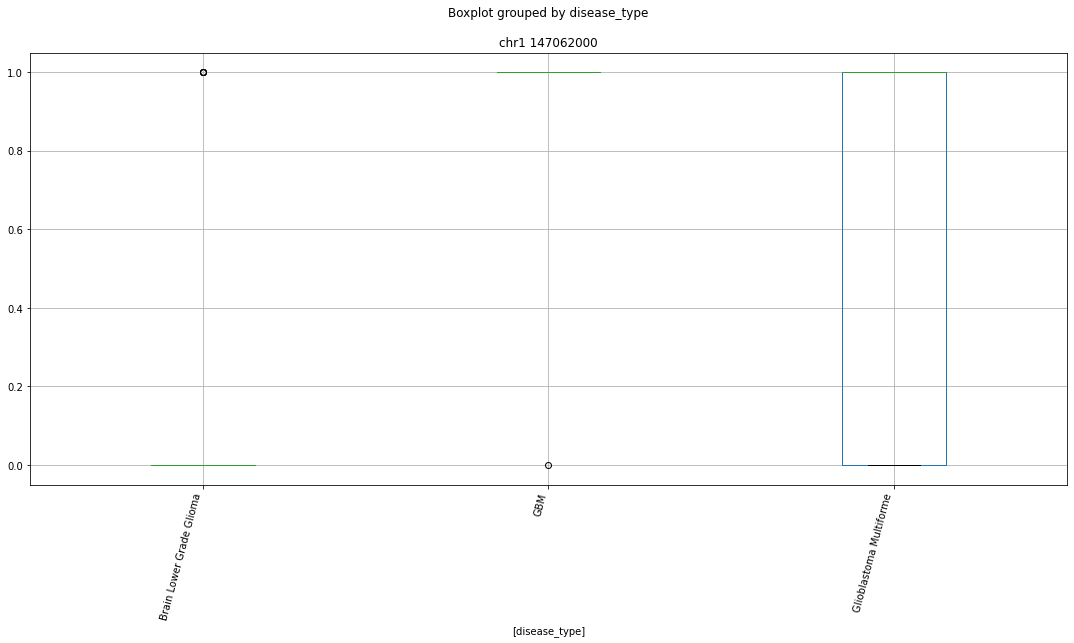

 p : 5.721020483559551e-12  ( t : 8.907157266714885 ) :  chr1 45765000


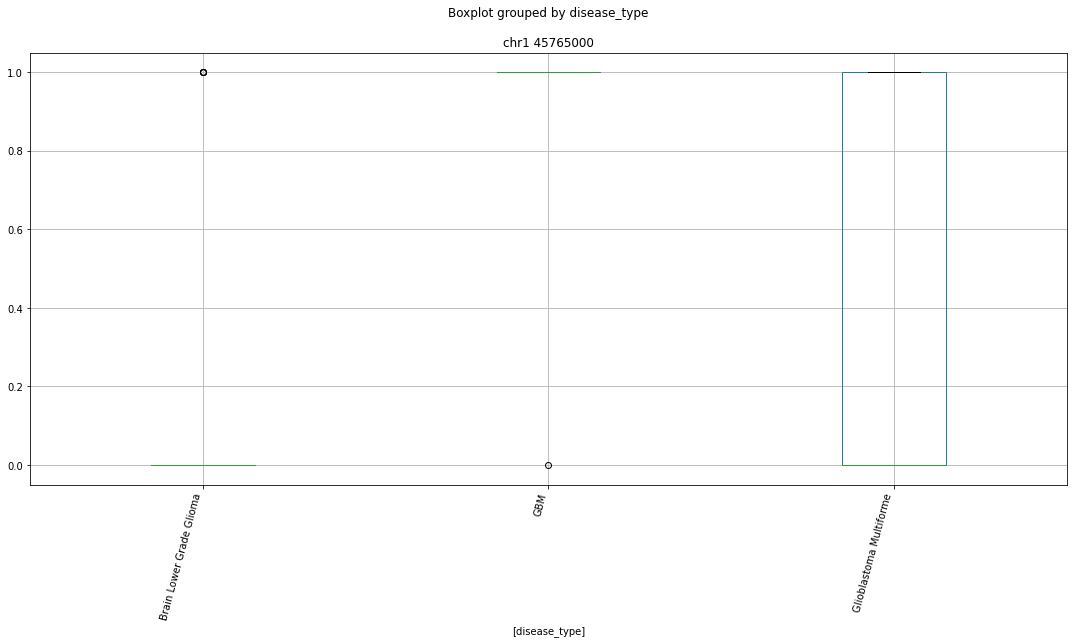

 p : 6.795720937170999e-12  ( t : 8.210862484069242 ) :  chr11 65762000


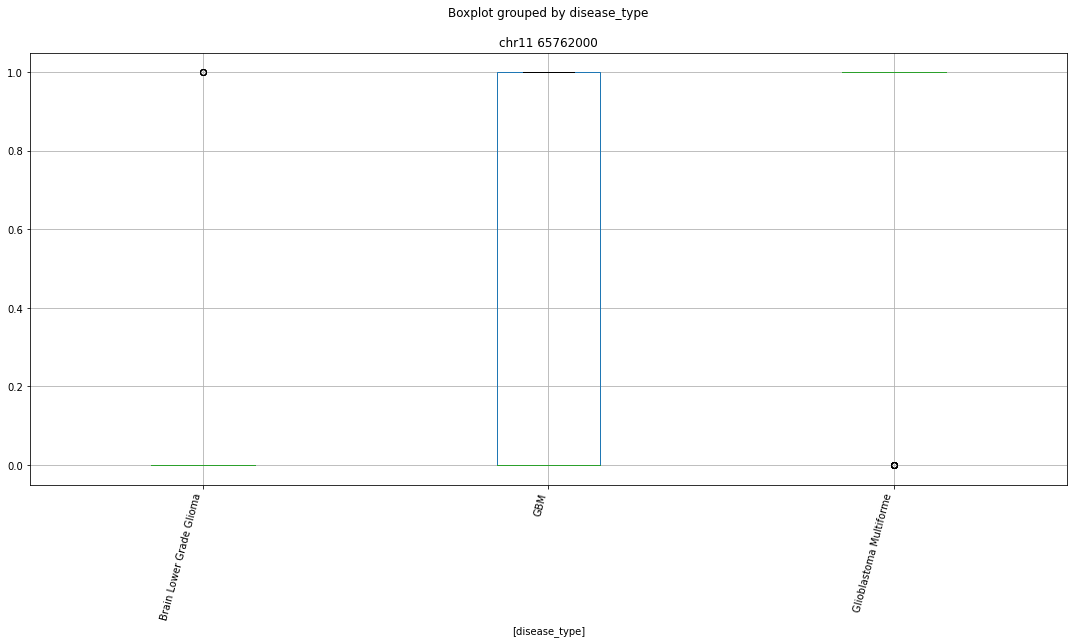

 p : 7.490288353367368e-12  ( t : 8.188076797257873 ) :  chr3 186434000


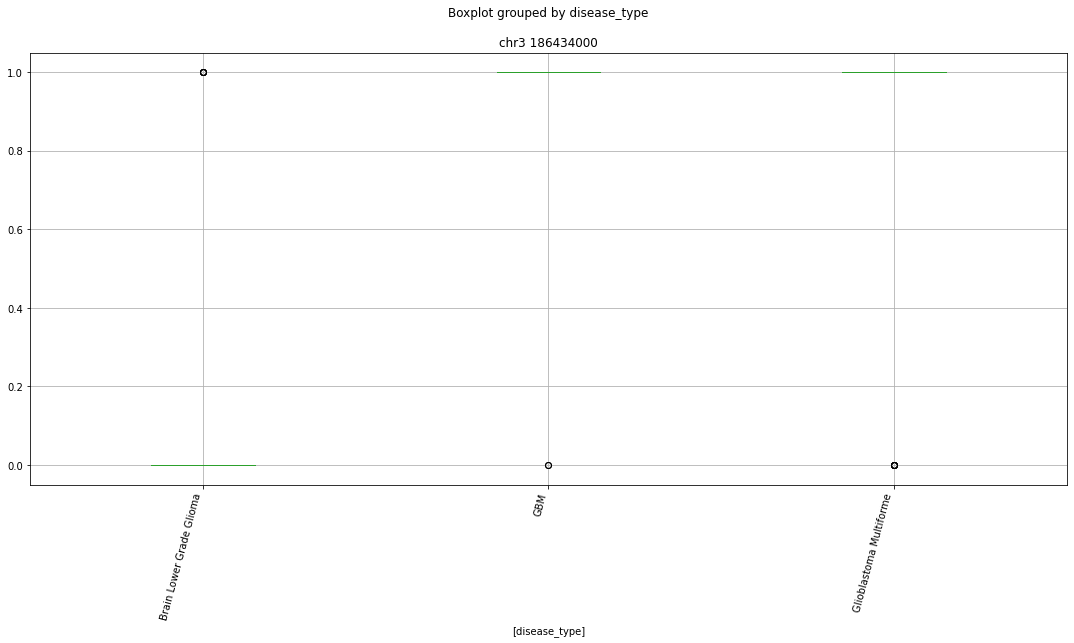

 p : 9.558830127815861e-12  ( t : 9.02542704437487 ) :  chr1 52743000


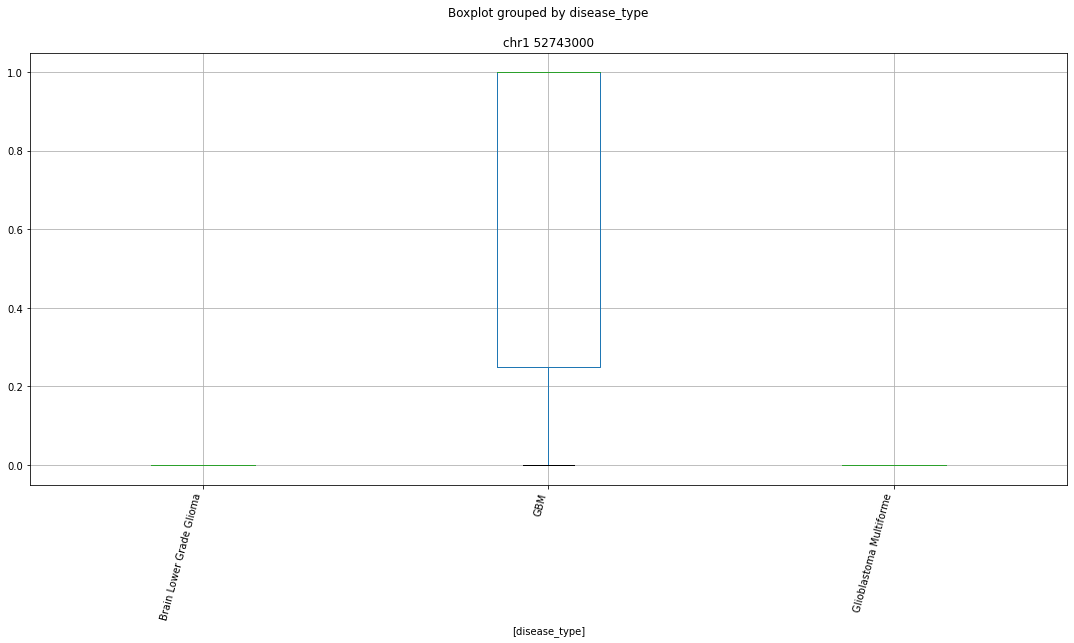

 p : 9.558830127815861e-12  ( t : 9.02542704437487 ) :  chr10 43330000


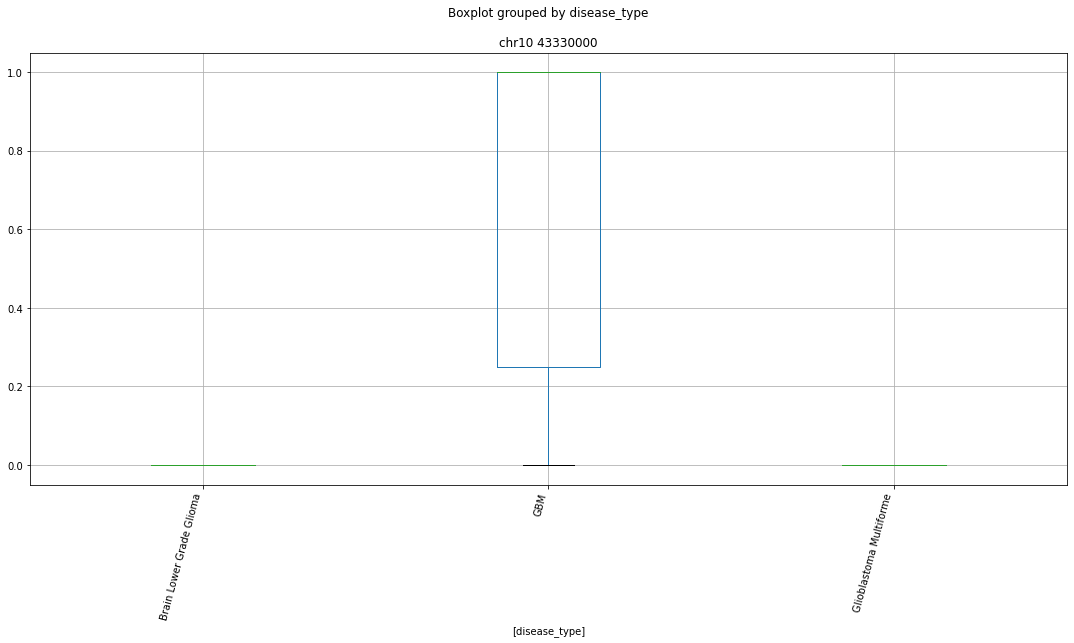

 p : 1.072083429418079e-11  ( t : 8.99062769181523 ) :  chr12 18520000


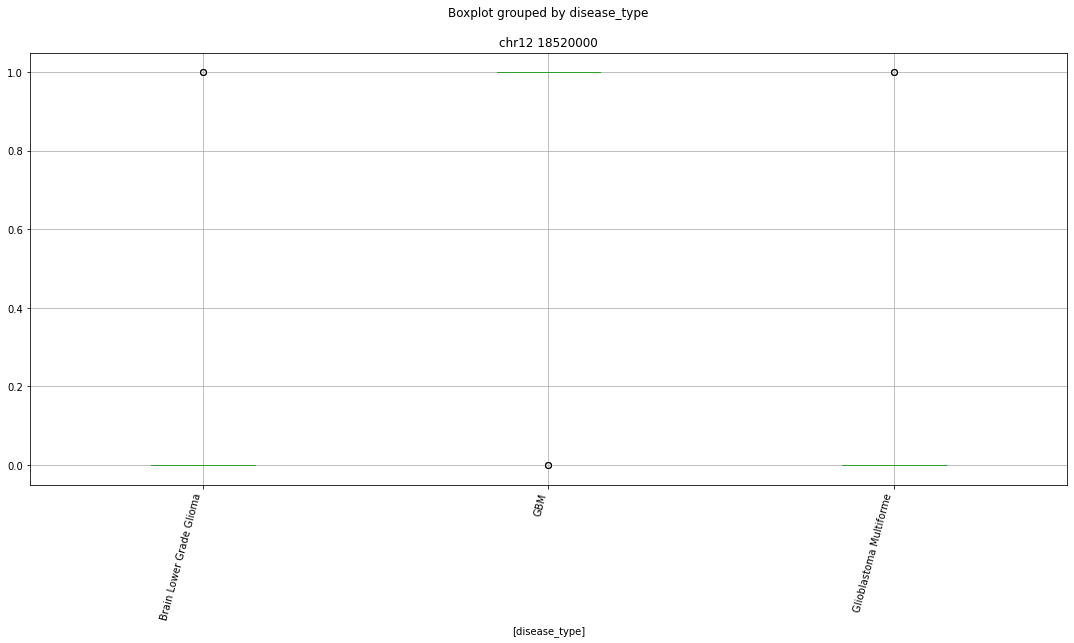

 p : 1.072083429418079e-11  ( t : 8.99062769181523 ) :  chr4 54919000


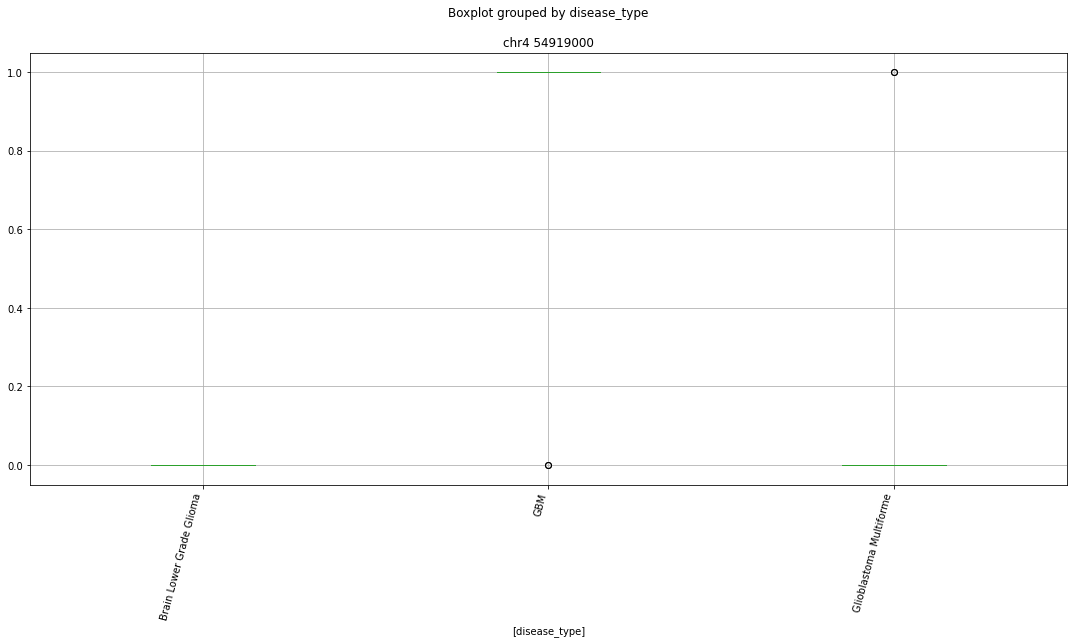

 p : 1.311789228817411e-11  ( t : 8.056861558902348 ) :  chr3 164785000


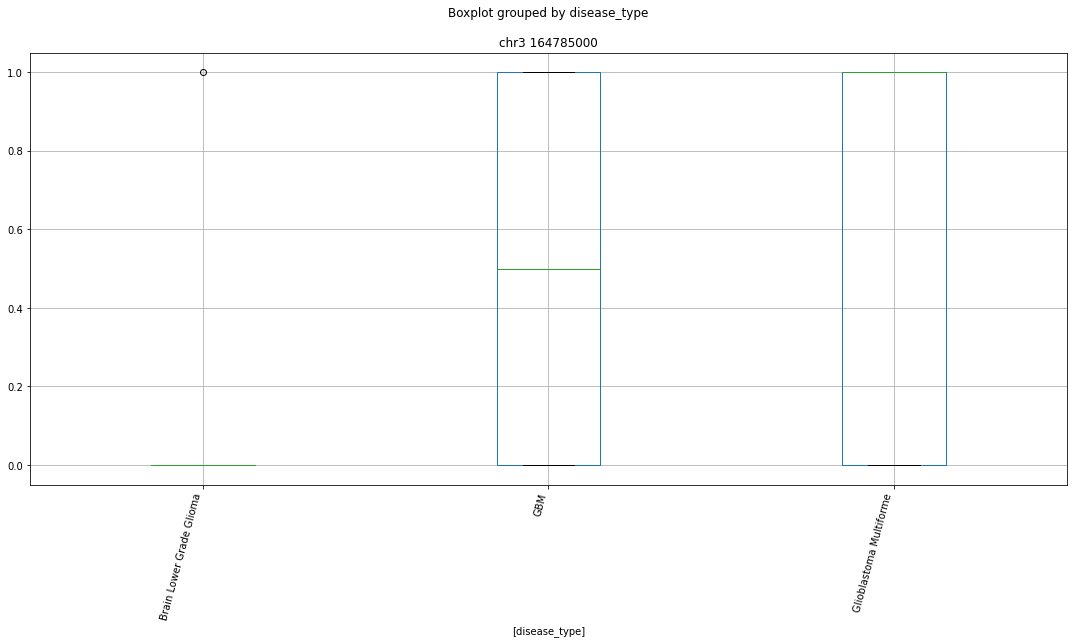

 p : 1.651038082890501e-11  ( t : 8.607806899706887 ) :  chr4 170165000


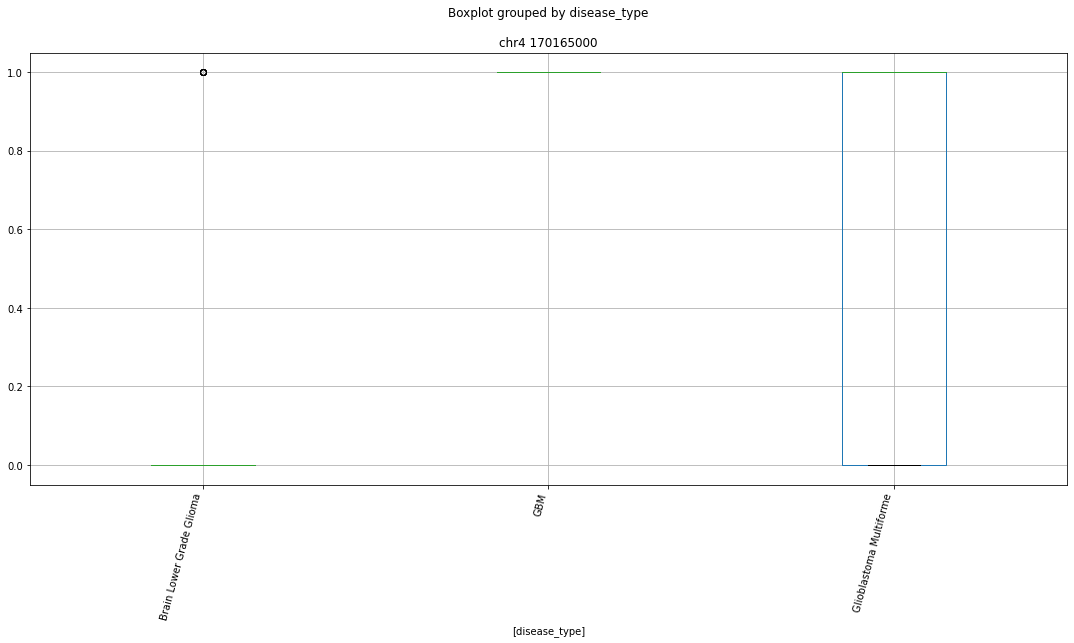

 p : 1.6792438766960513e-11  ( t : 8.854890790353707 ) :  chr12 19340000


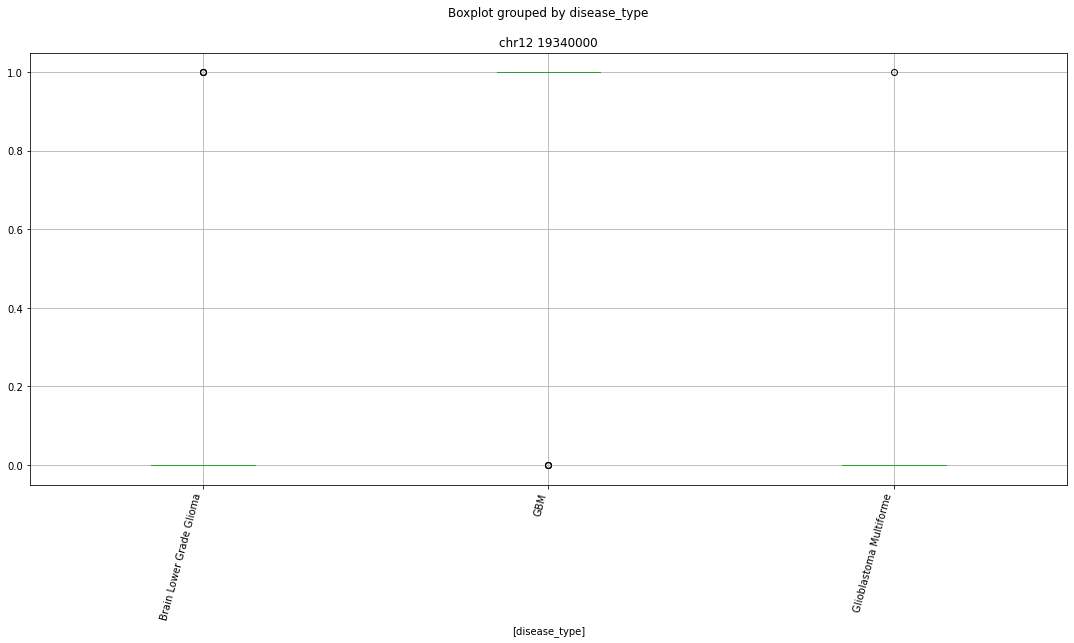

 p : 2.922459852647724e-11  ( t : 7.869221862481335 ) :  chr1 167030000


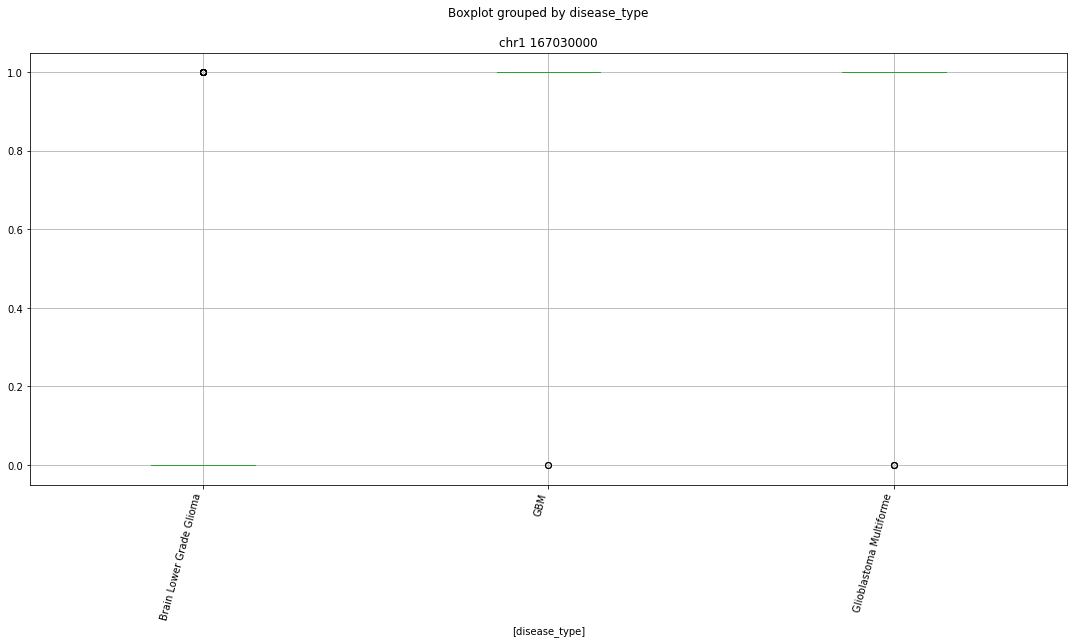

 p : 2.922459852647724e-11  ( t : 7.869221862481335 ) :  chr7 32754000


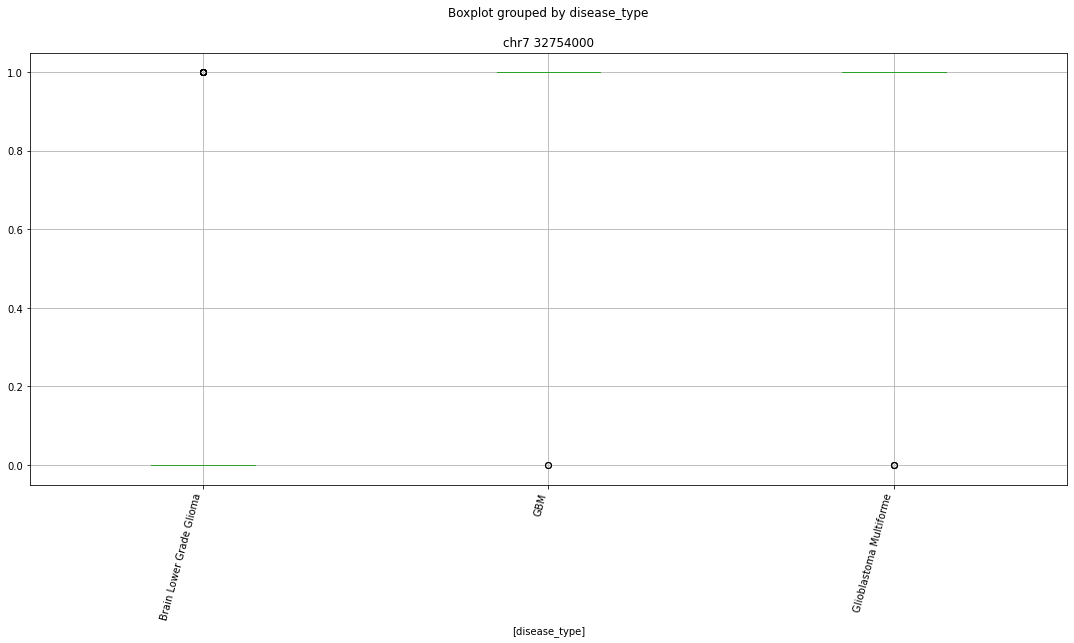

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr3 138785000


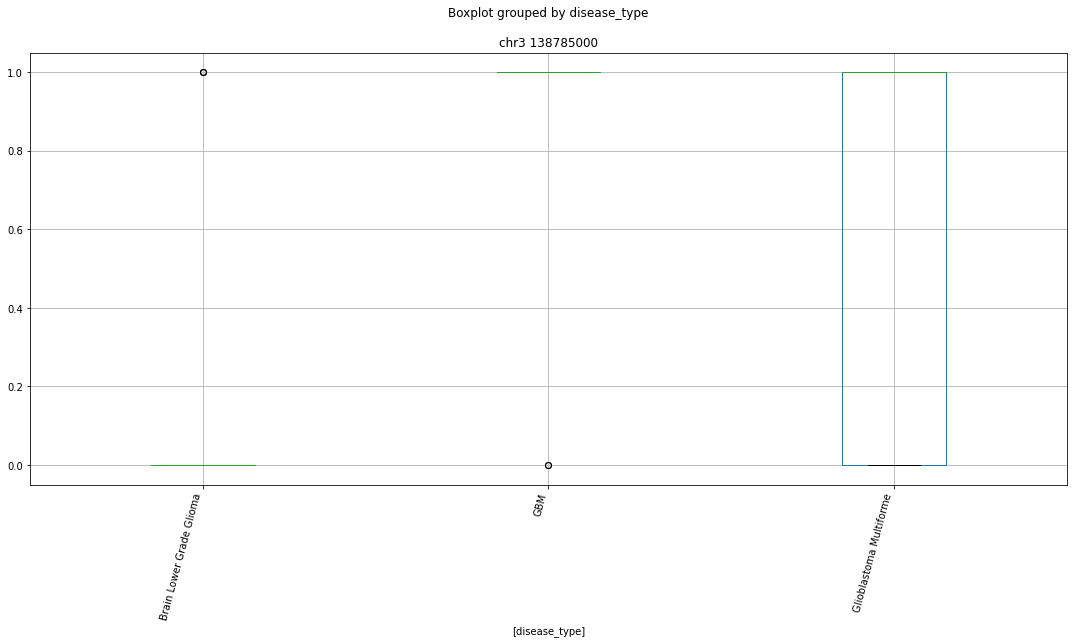

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr1 181955000


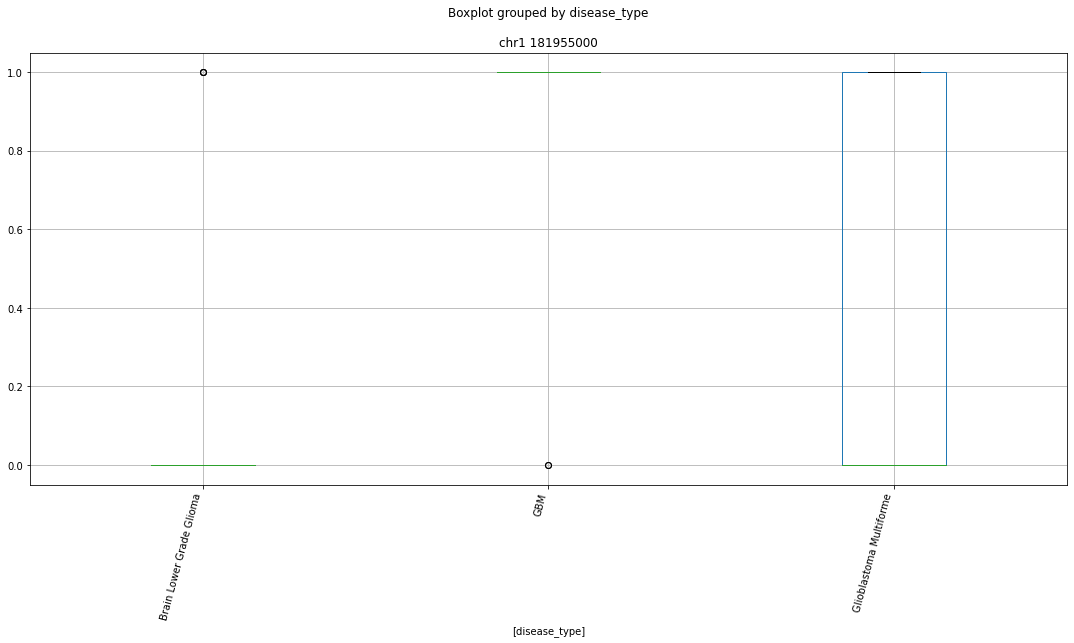

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr20 3126000


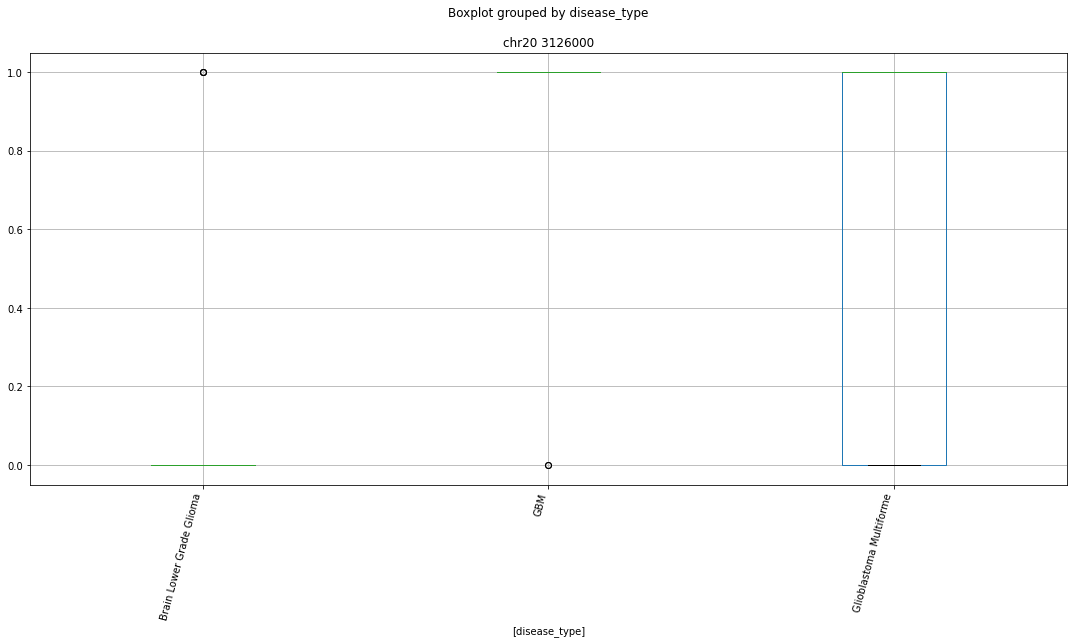

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr2 98988000


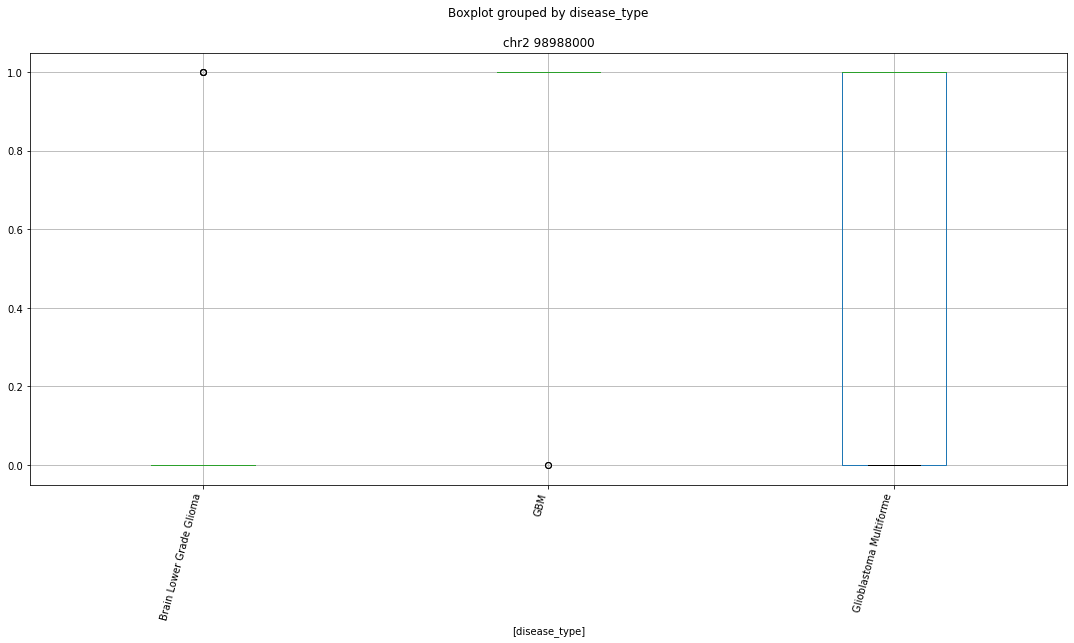

 p : 2.9374788966227866e-11  ( t : 8.445999387898233 ) :  chr9 104489000


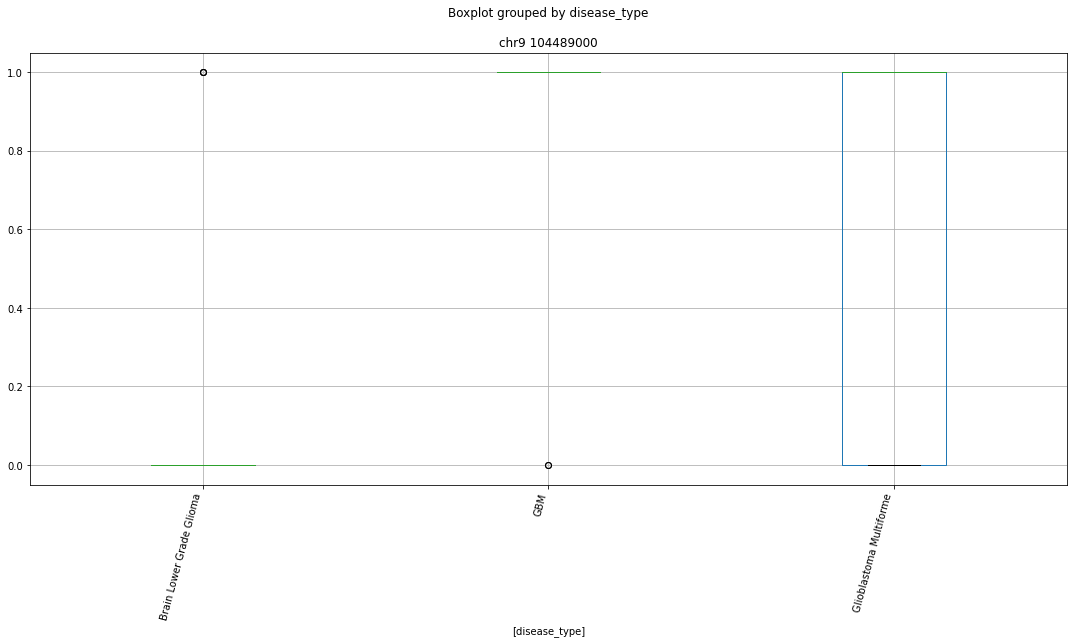

 p : 2.9374788966227866e-11  ( t : 8.445999387898233 ) :  chr7 13103000


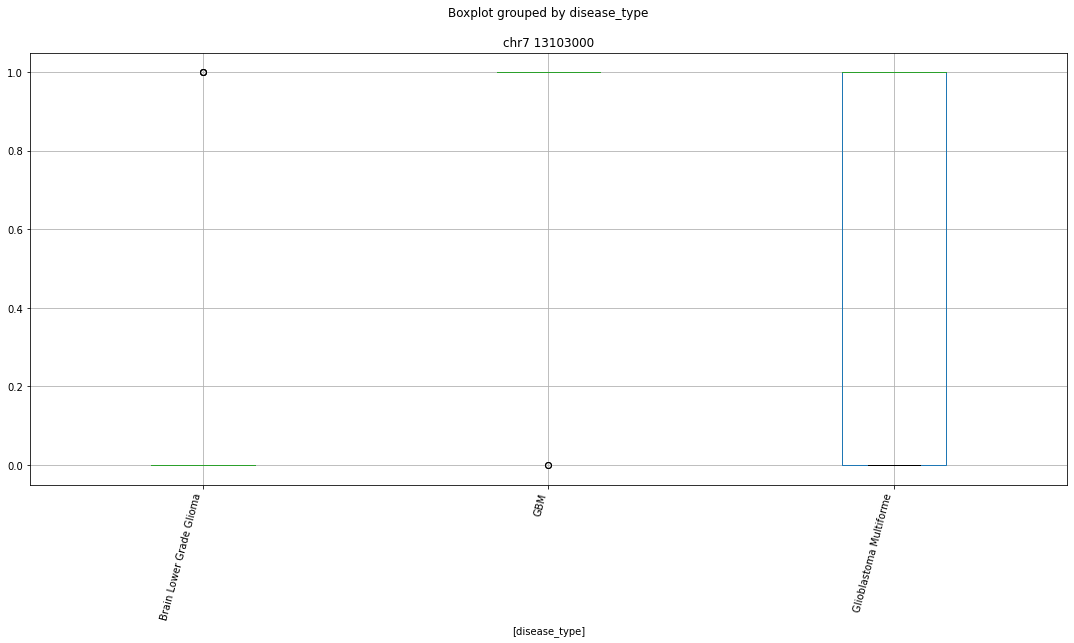

 p : 3.1038290460401354e-11  ( t : 7.855111879227142 ) :  chr9 129662000


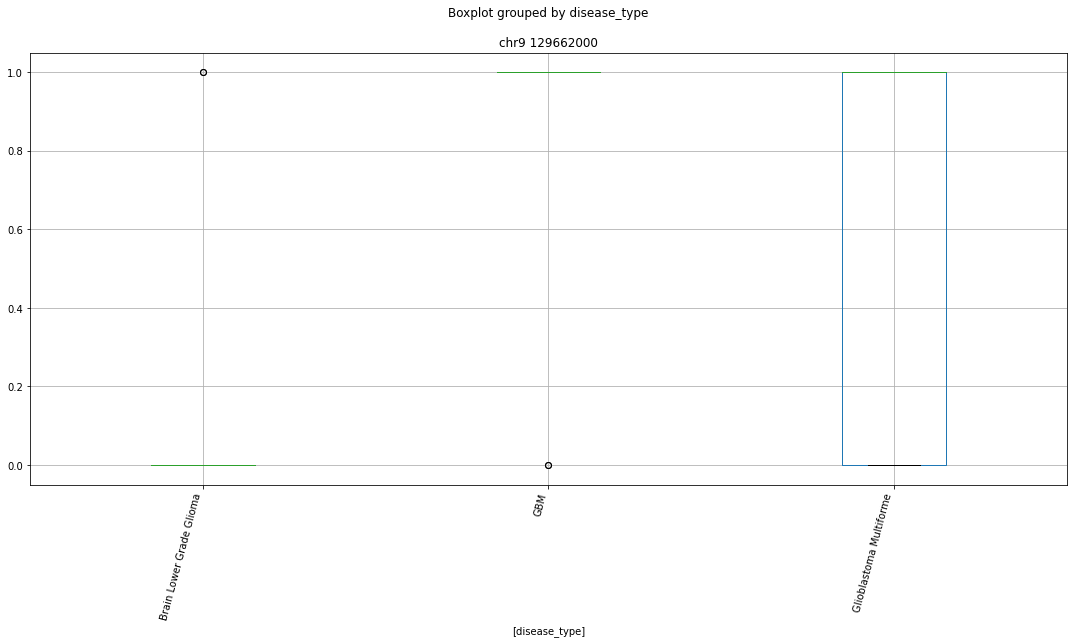

 p : 3.1038290460401354e-11  ( t : 7.855111879227142 ) :  chr11 56144000


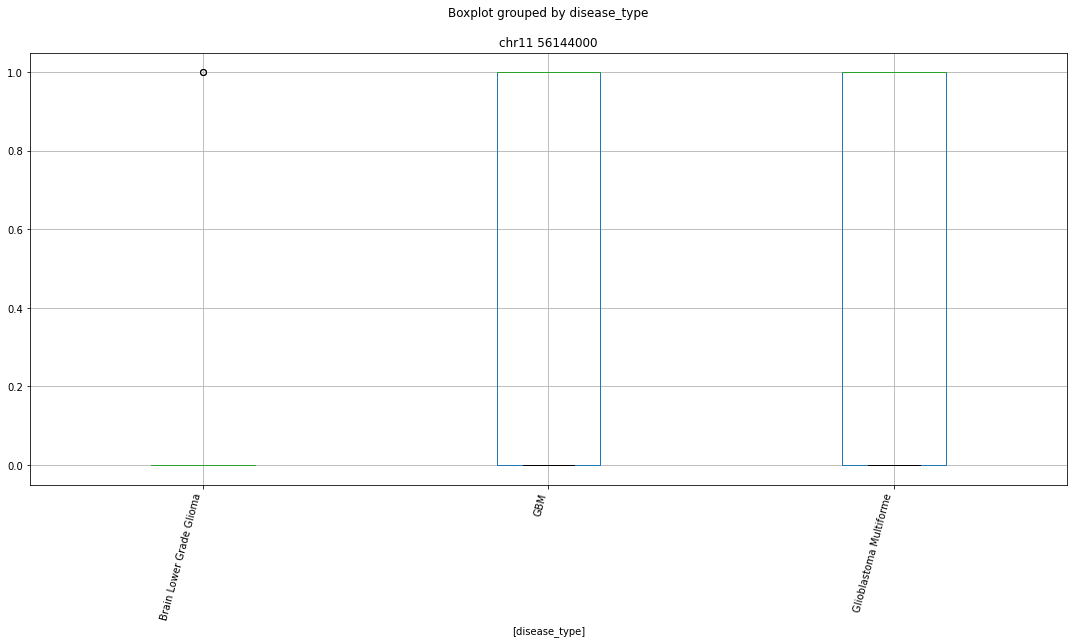

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr2 135106000


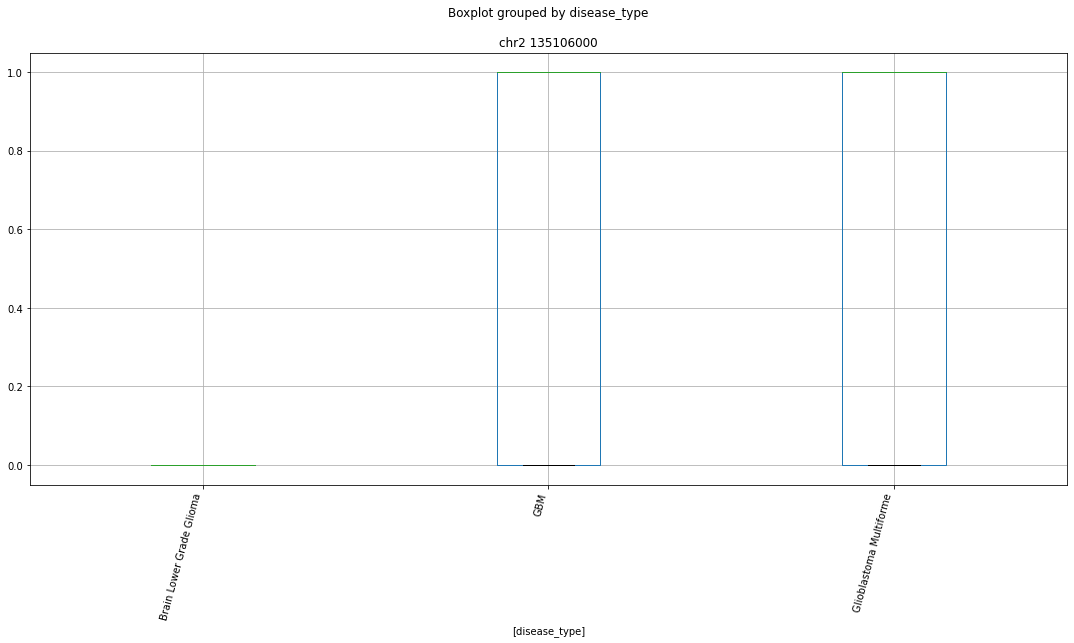

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr15 76900000


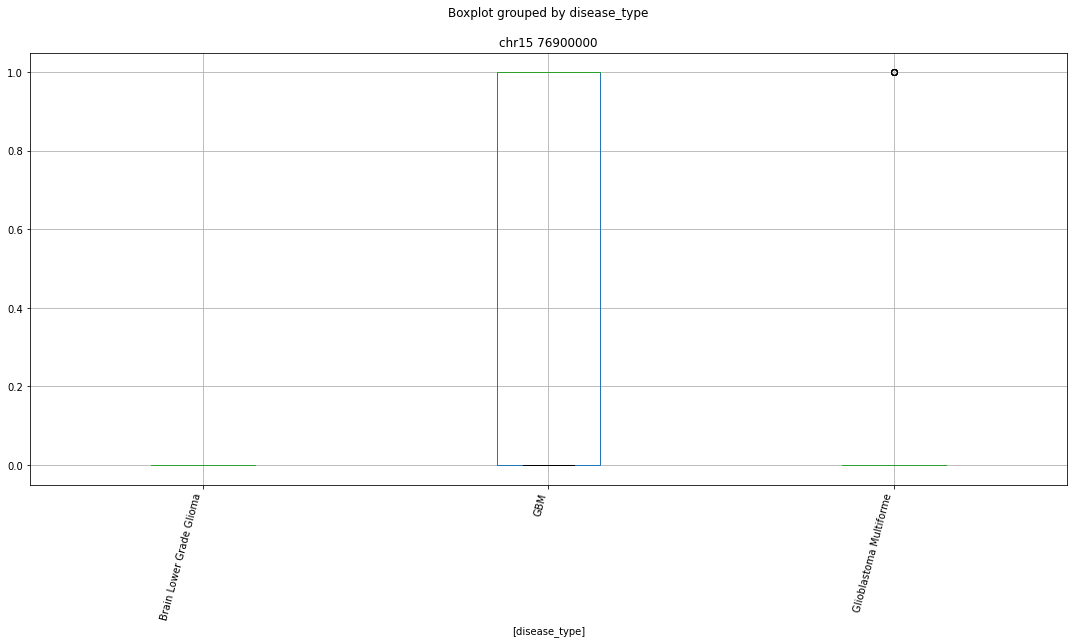

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr10 28934000


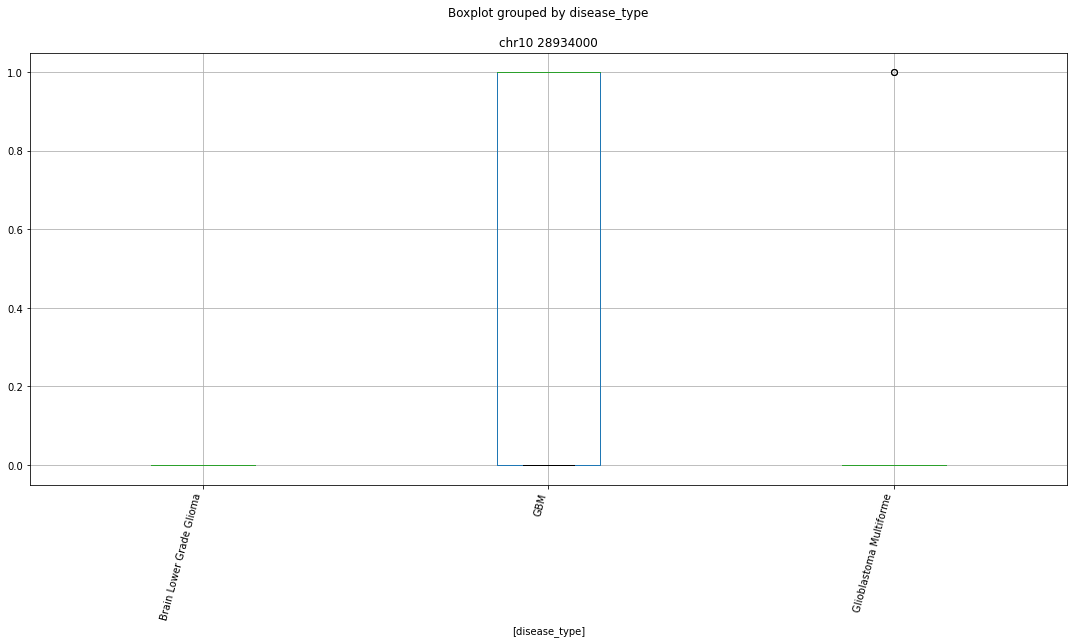

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr12 57494000


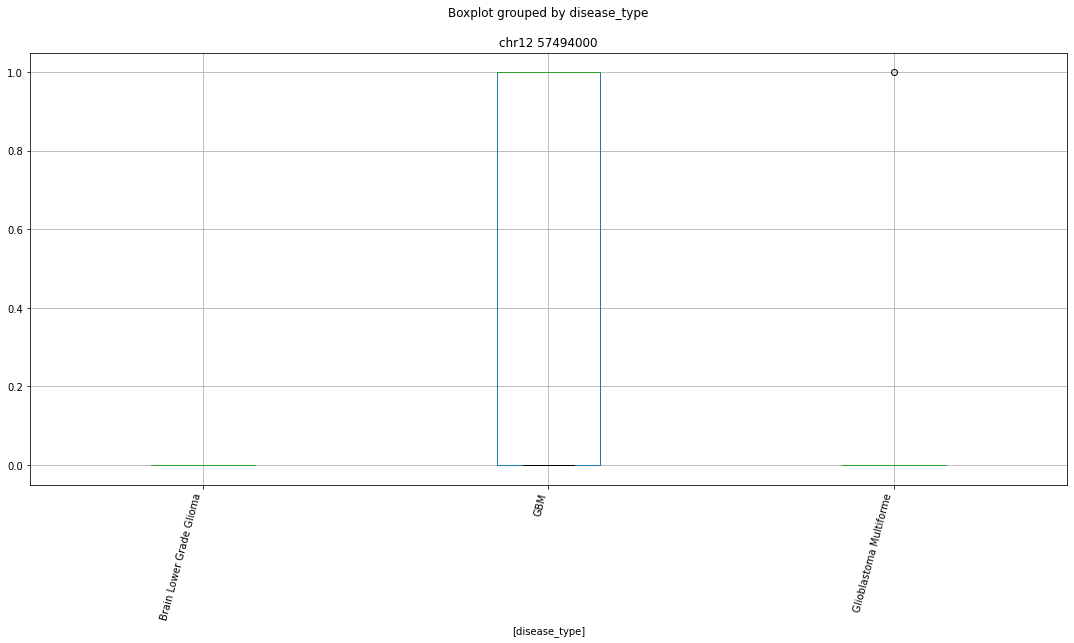

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr3 101552000


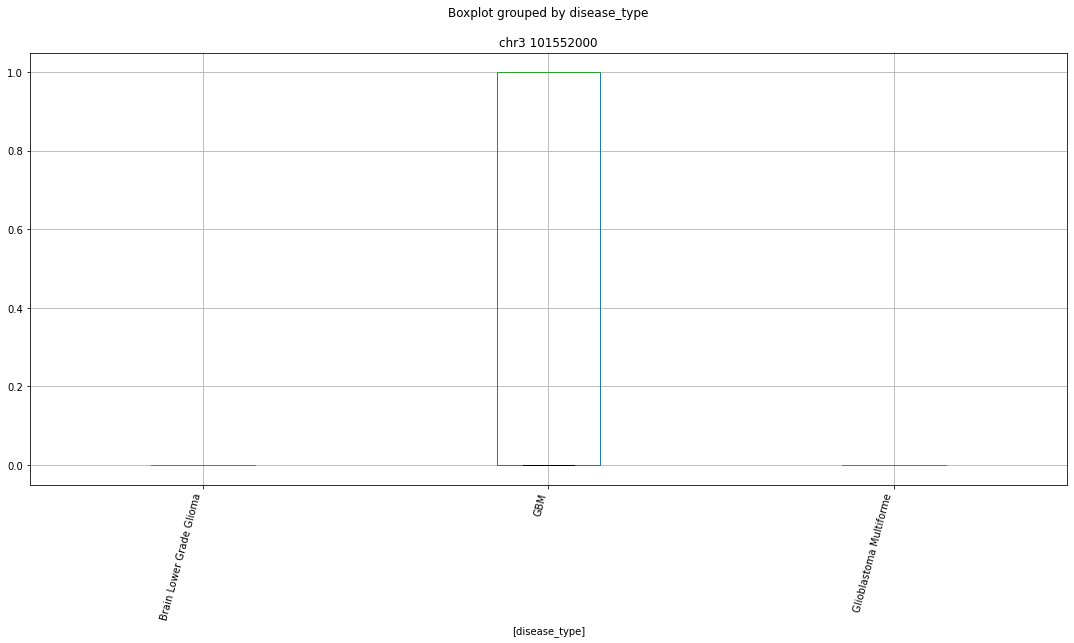

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr12 53438000


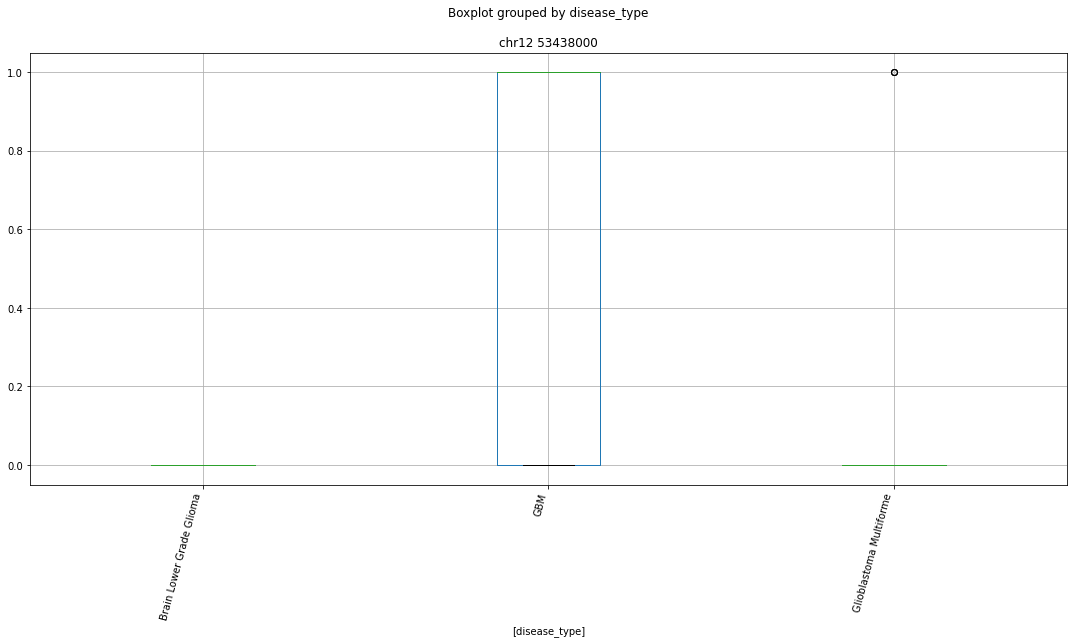

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr11 60492000


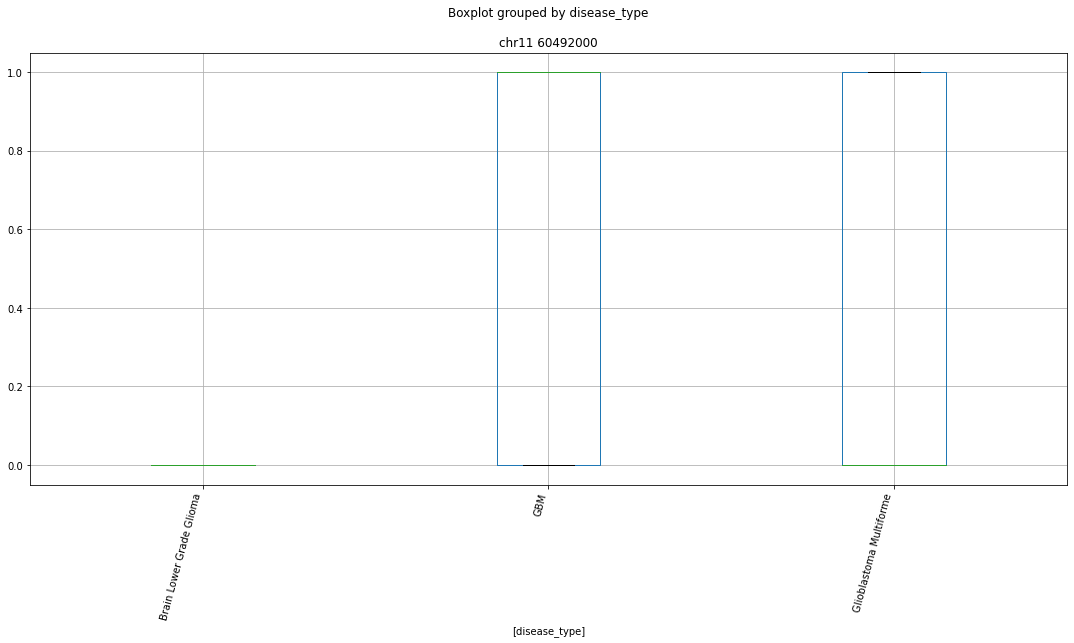

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr7 28839000


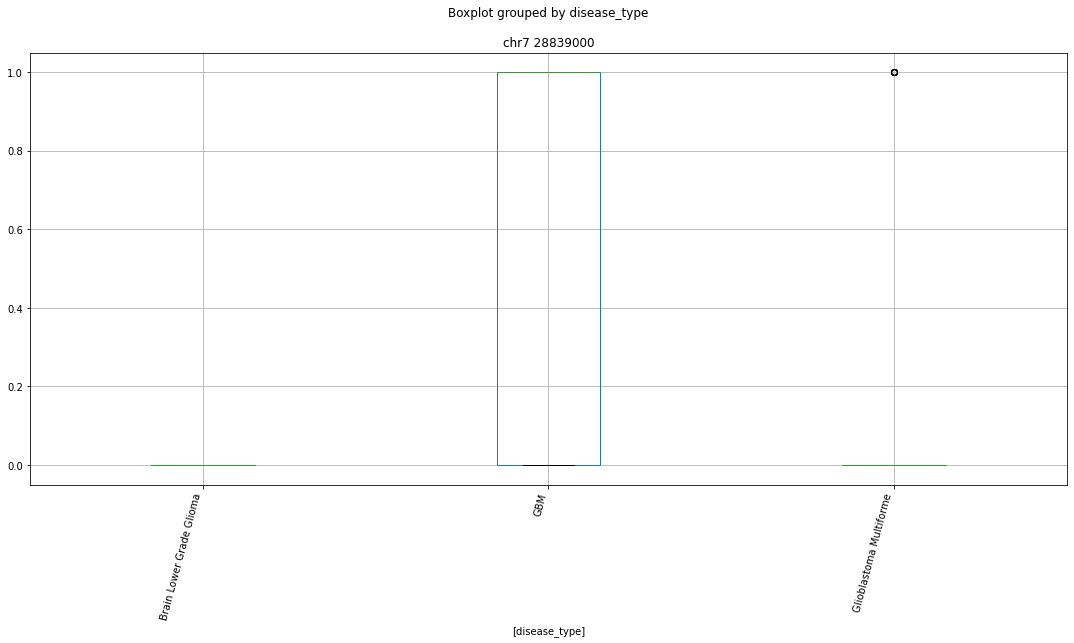

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr2 27556000


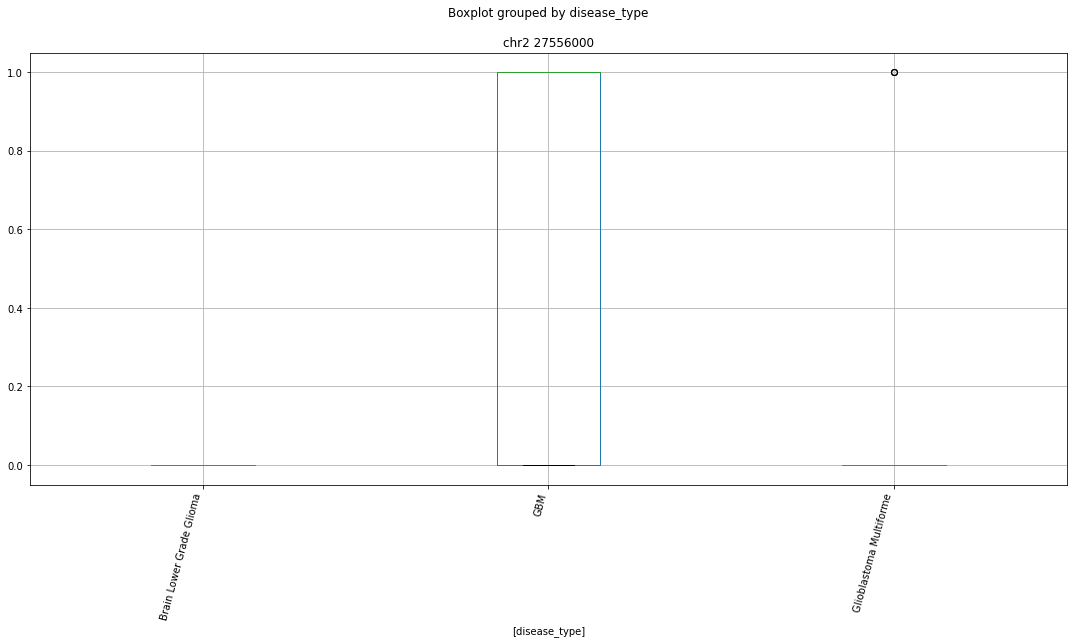

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr14 51367000


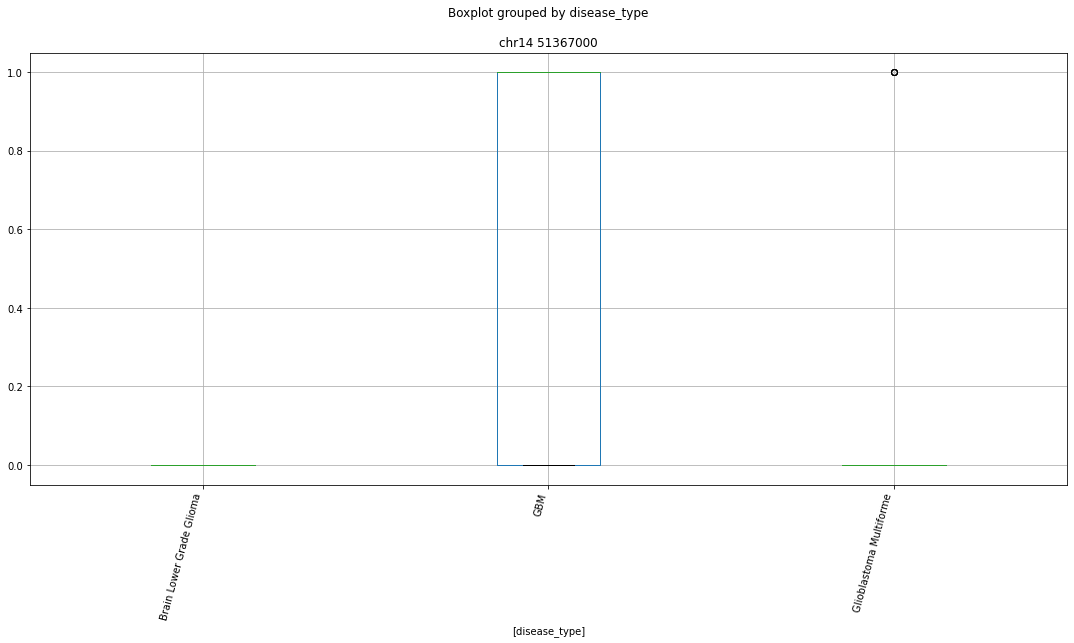

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr17 38930000


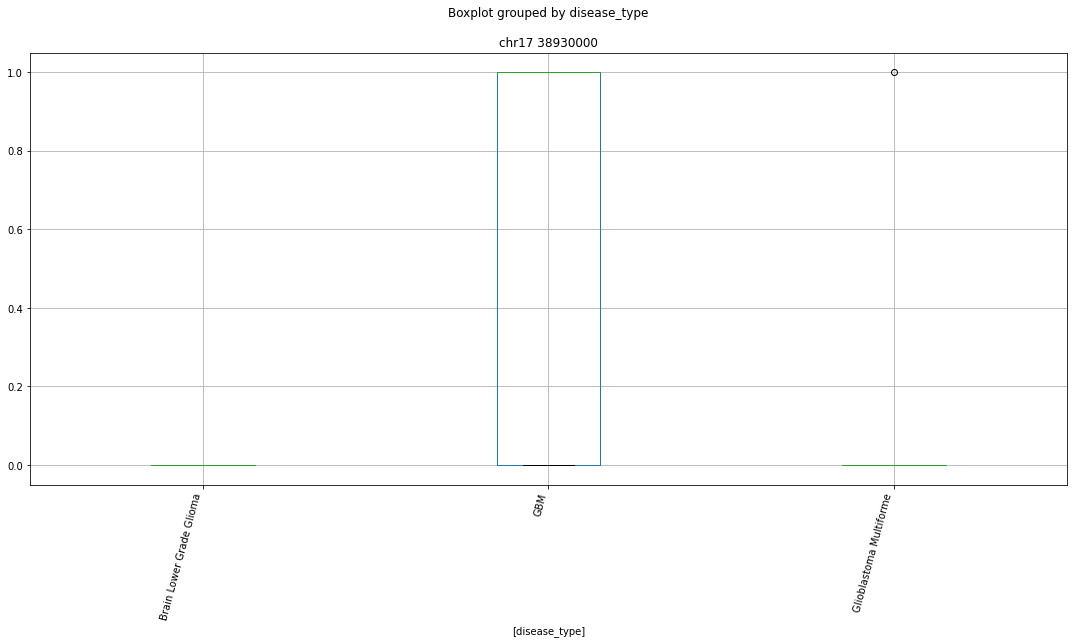

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr17 65485000


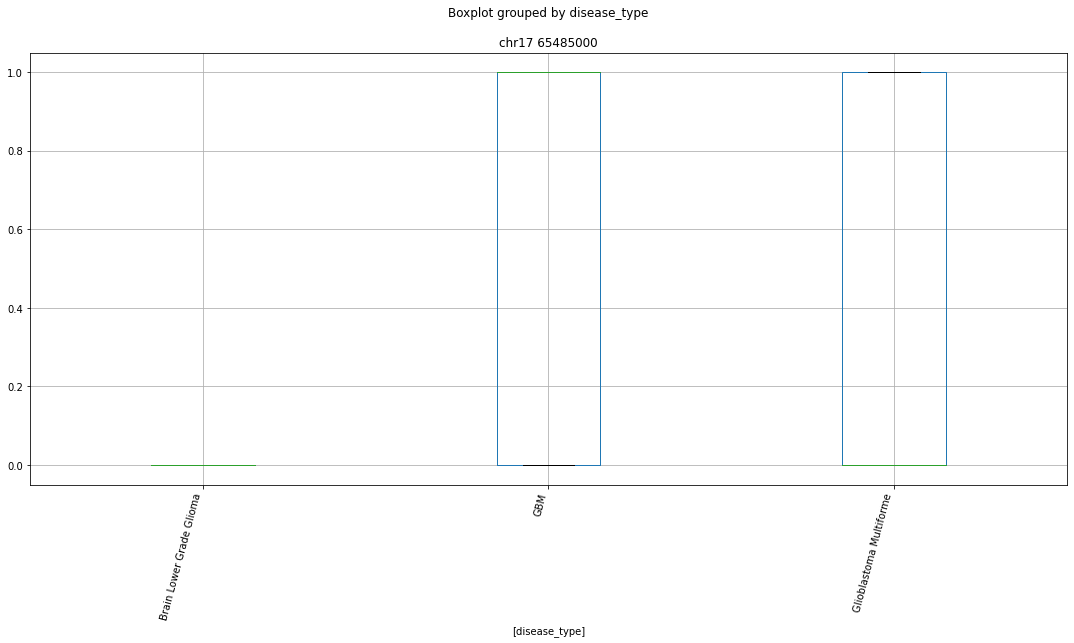

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr3 50310000


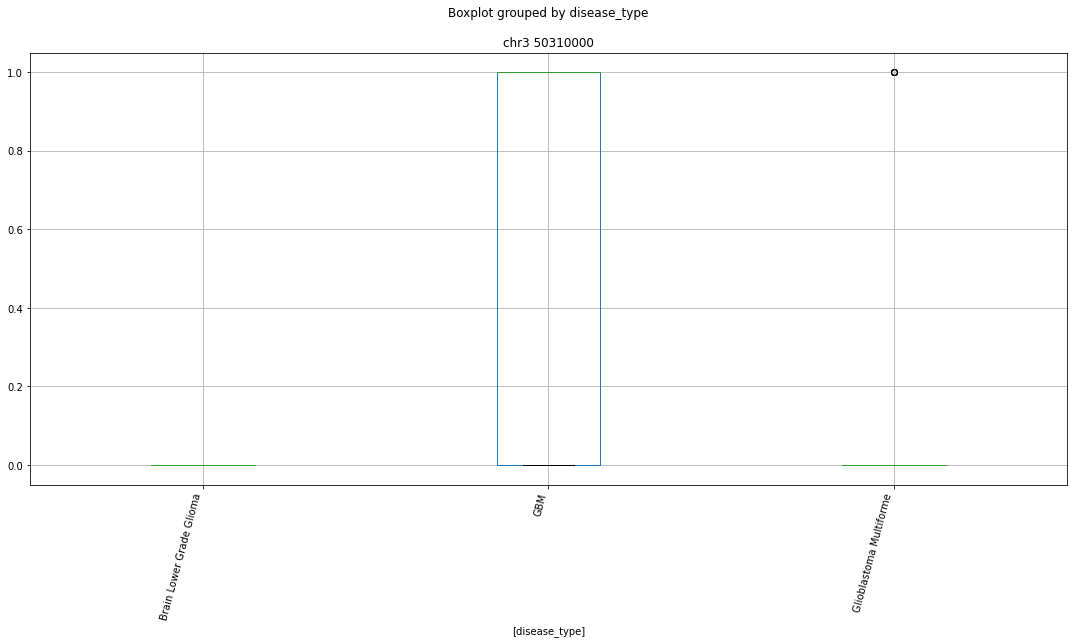

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr11 57943000


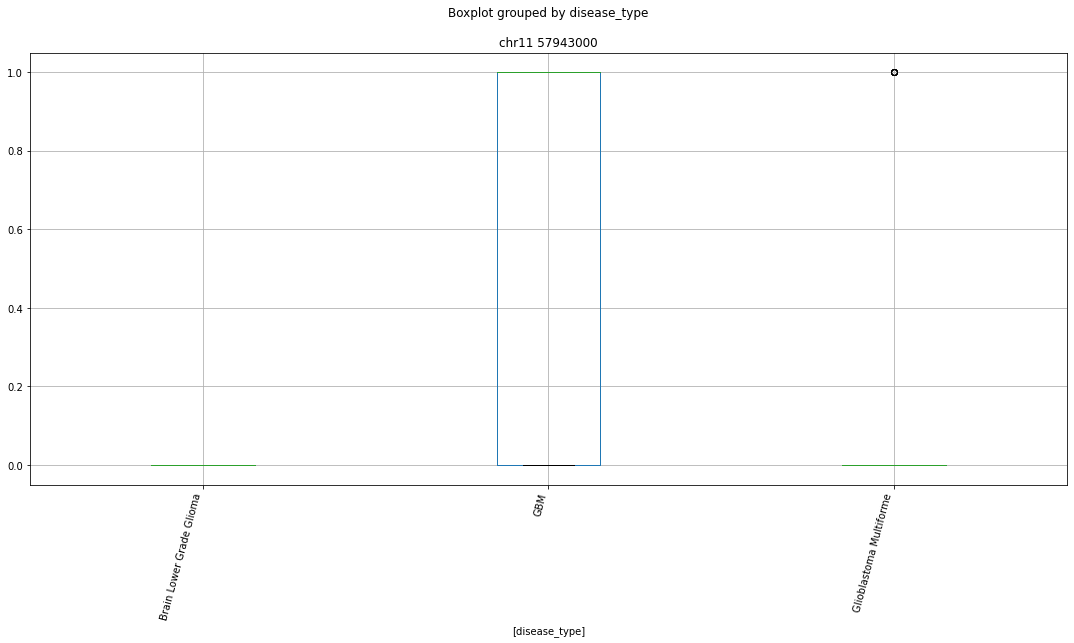

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr13 32720000


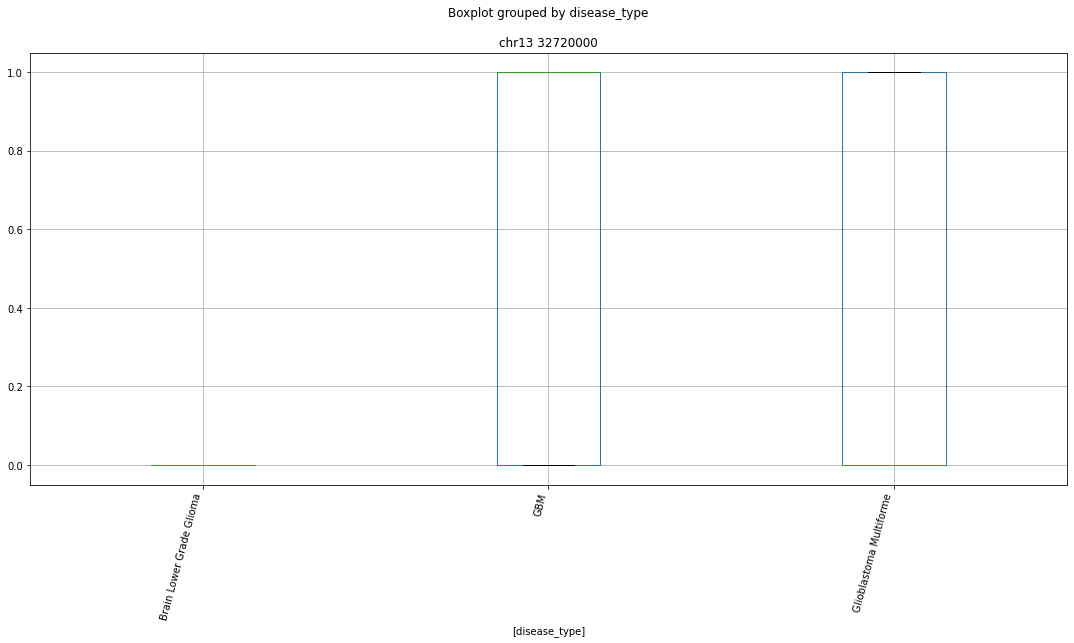

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr2 143992000


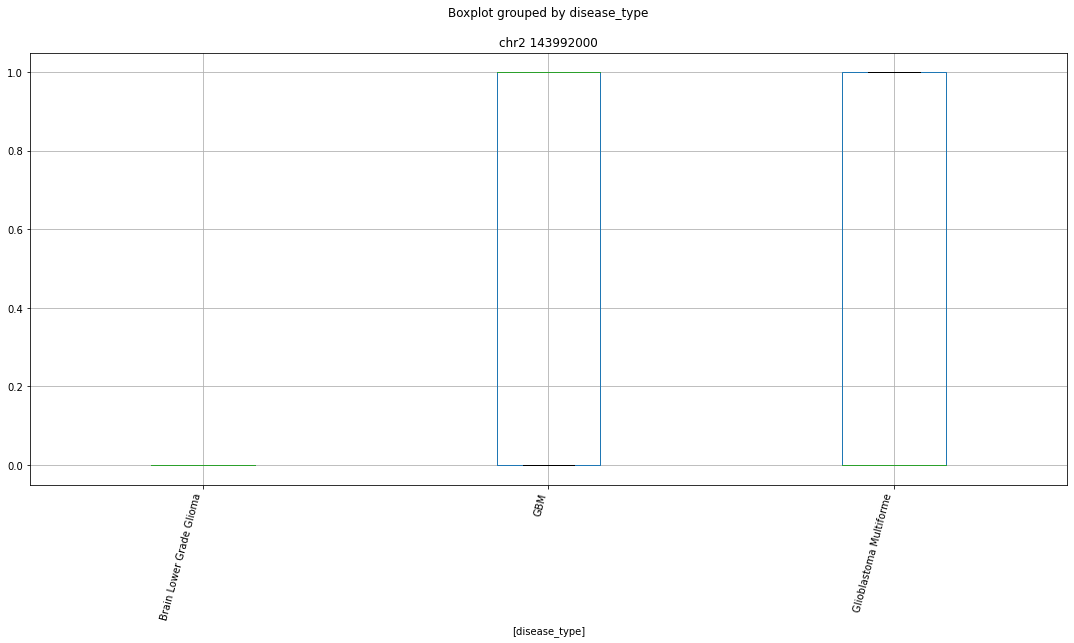

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr5 76335000


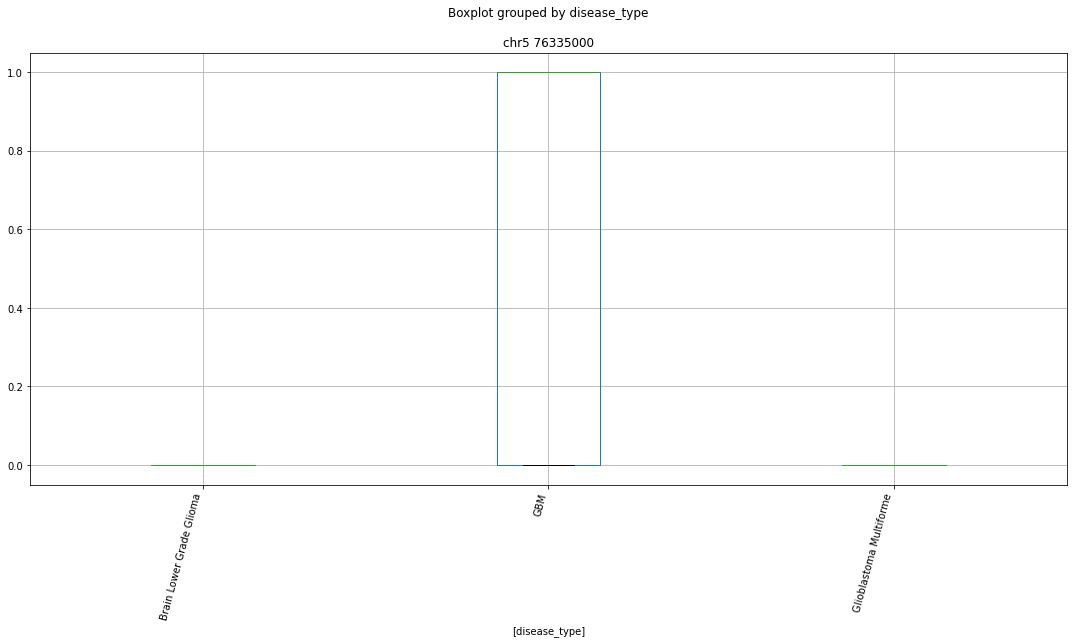

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr7 101093000


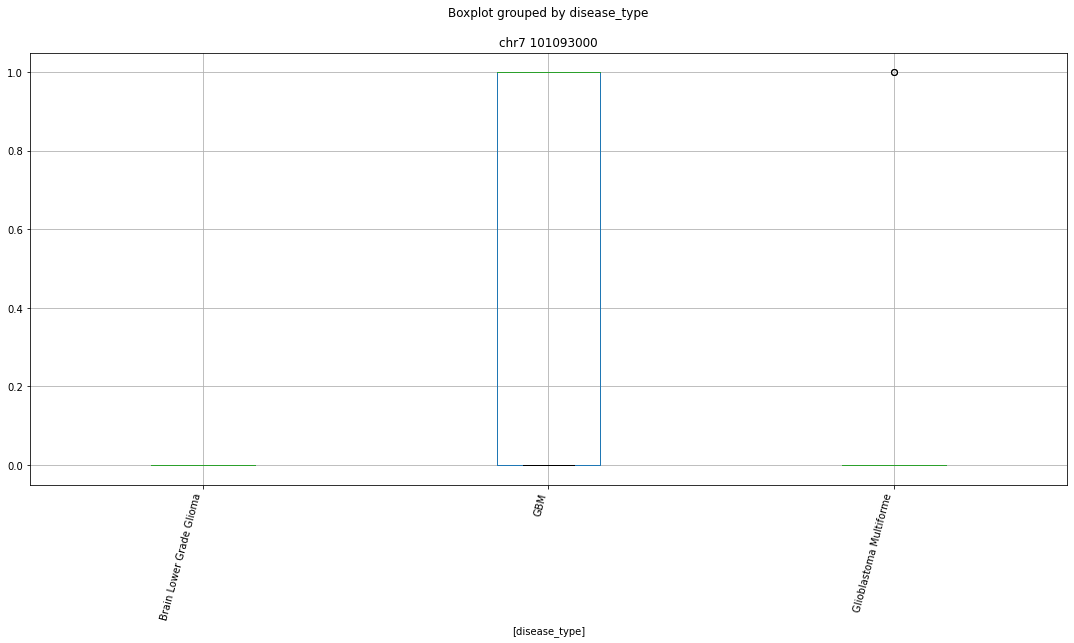

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr11 16888000


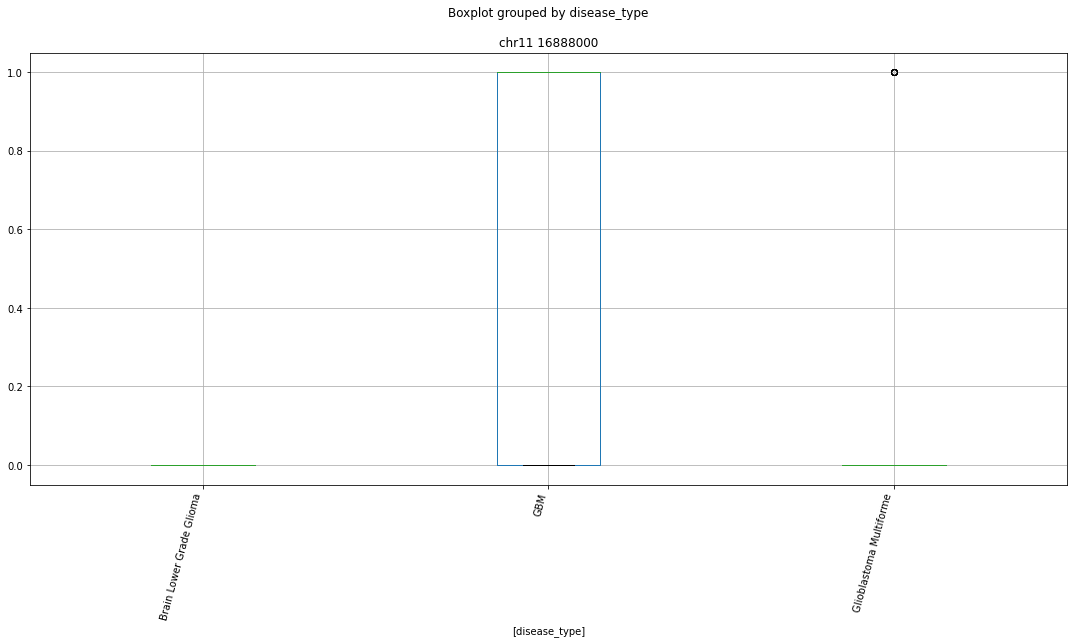

 p : 7.609277290064471e-11  ( t : 7.644822012889148 ) :  chr16 66515000


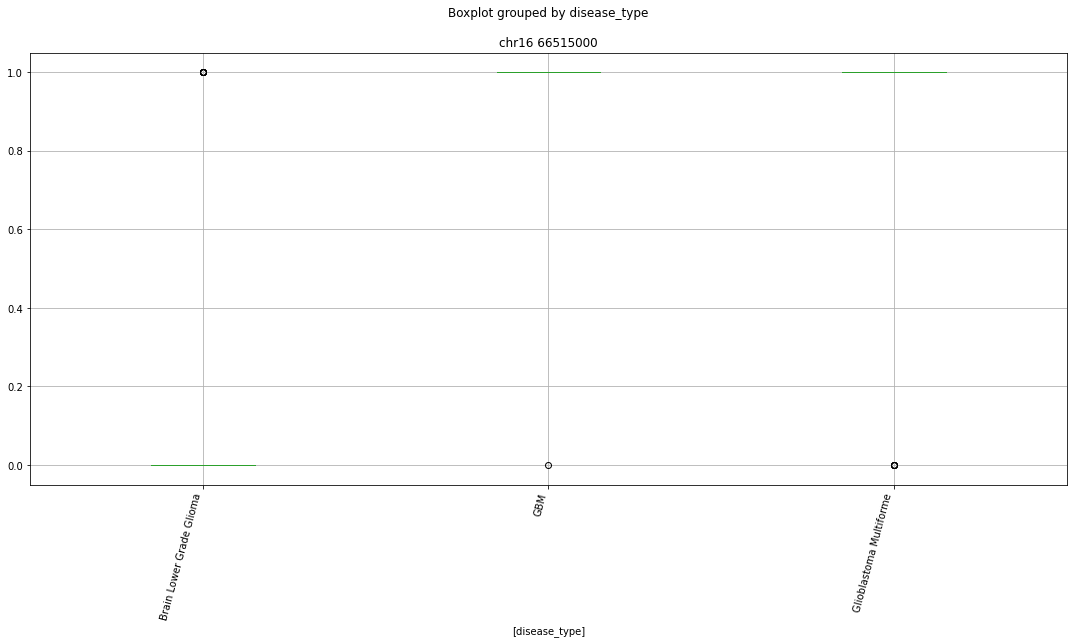

 p : 7.609277290064524e-11  ( t : 7.644822012889147 ) :  chr7 2162000


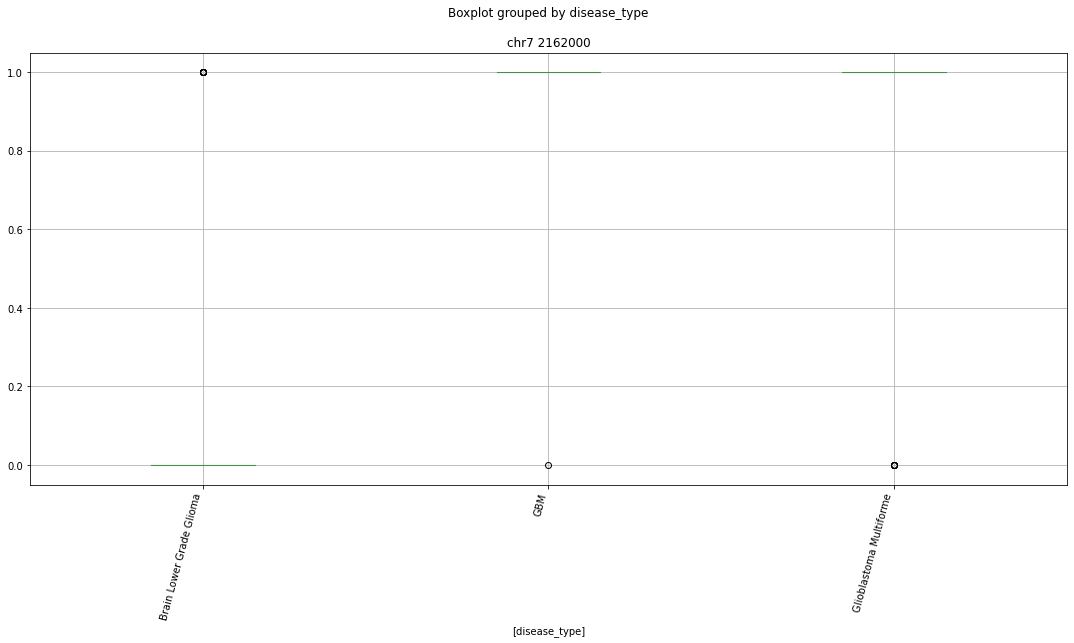

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr6 47443000


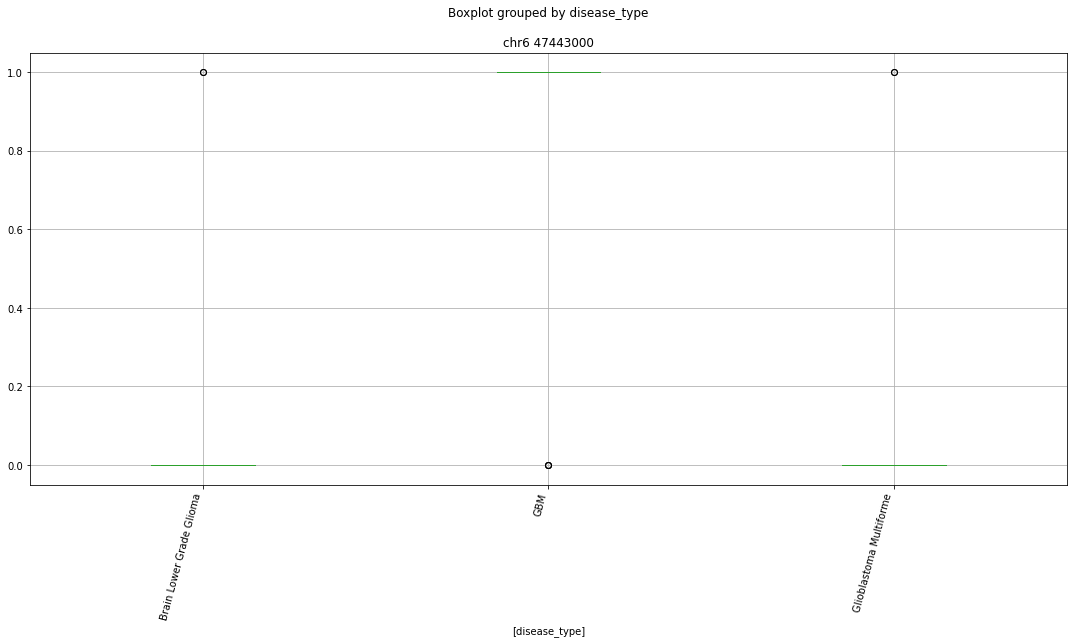

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr15 41963000


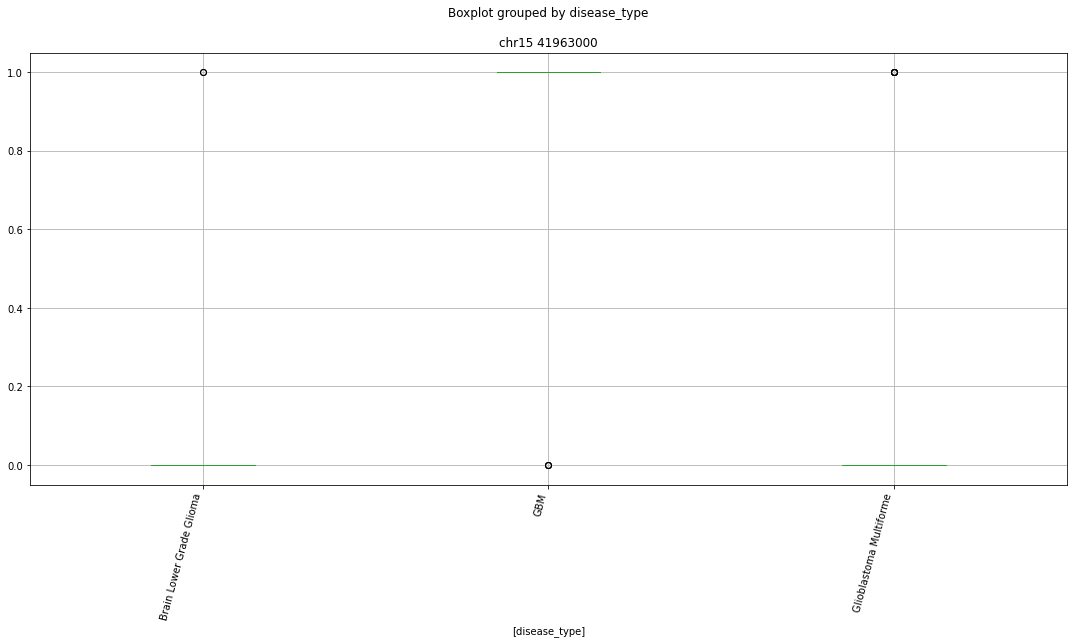

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr15 60947000


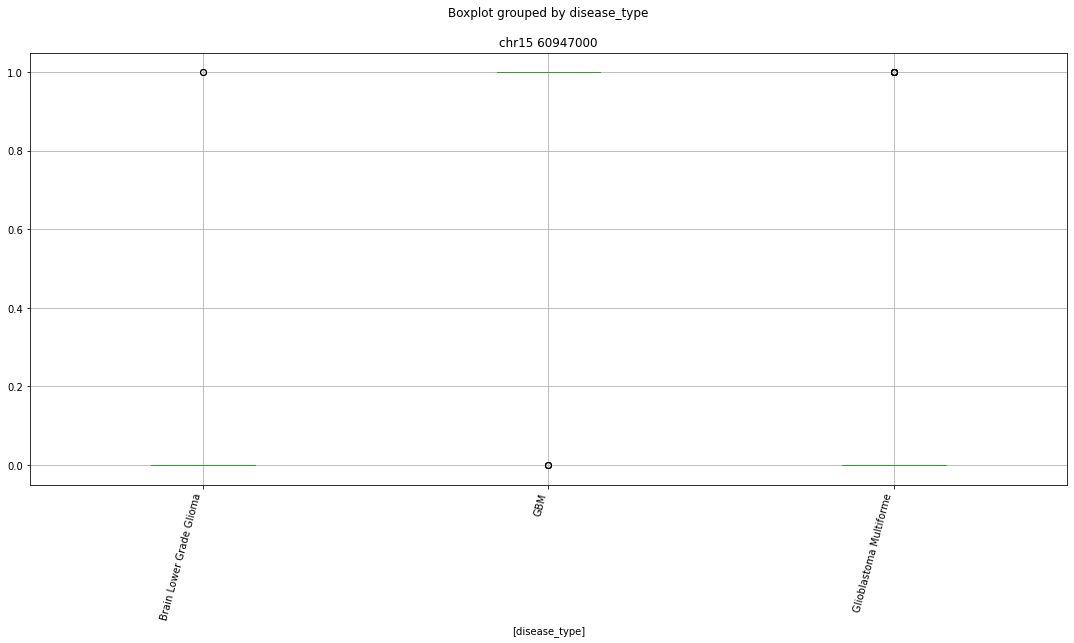

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr14 90445000


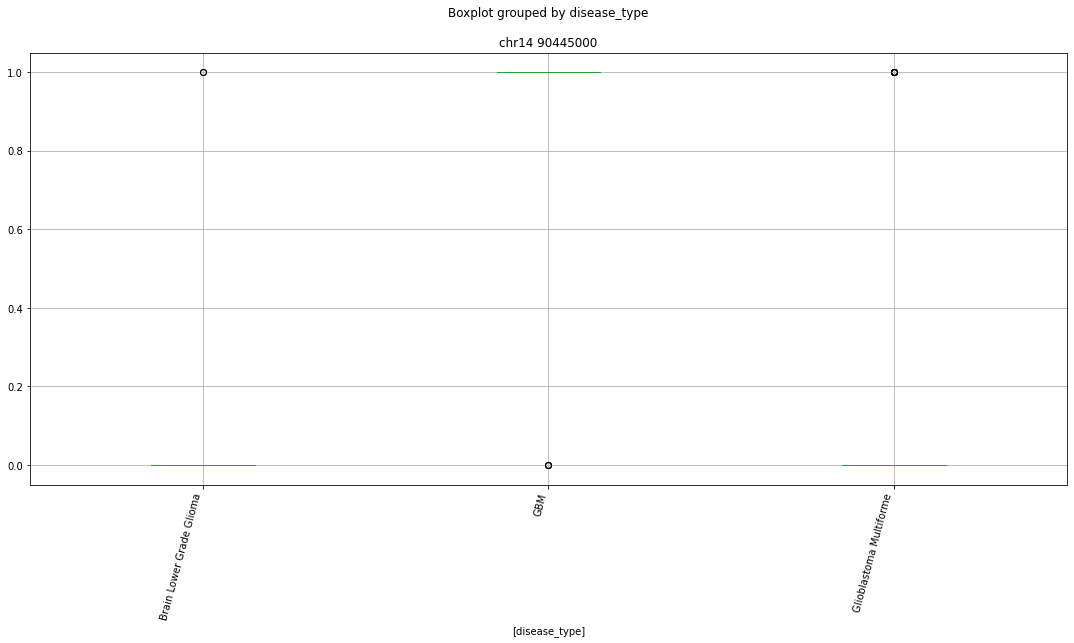

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr17 28658000


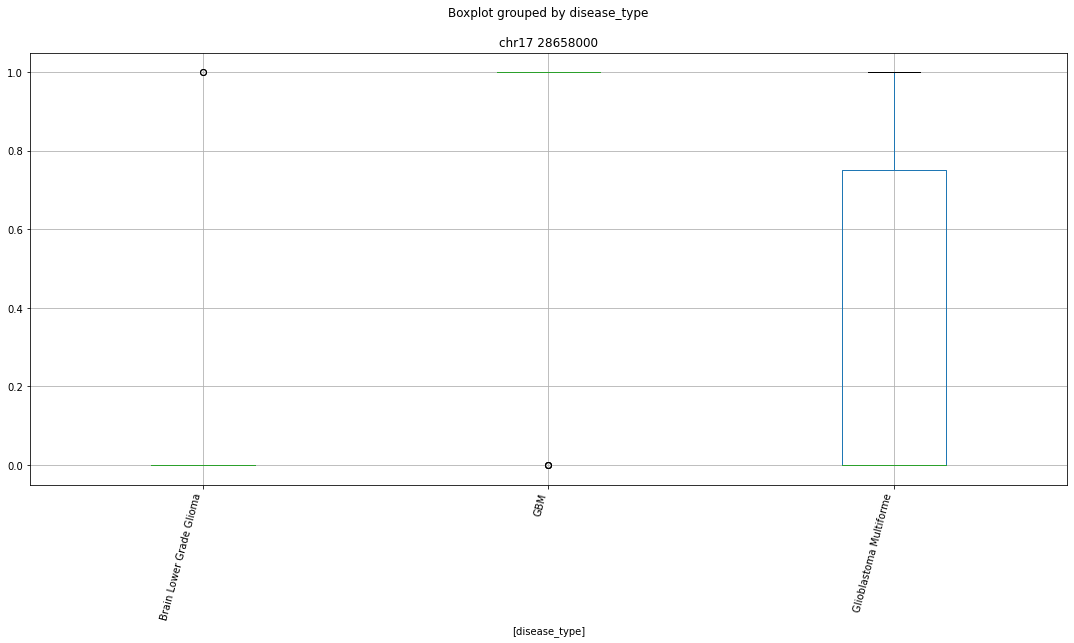

 p : 9.277251739703446e-11  ( t : 7.598297201011695 ) :  chr3 116519000


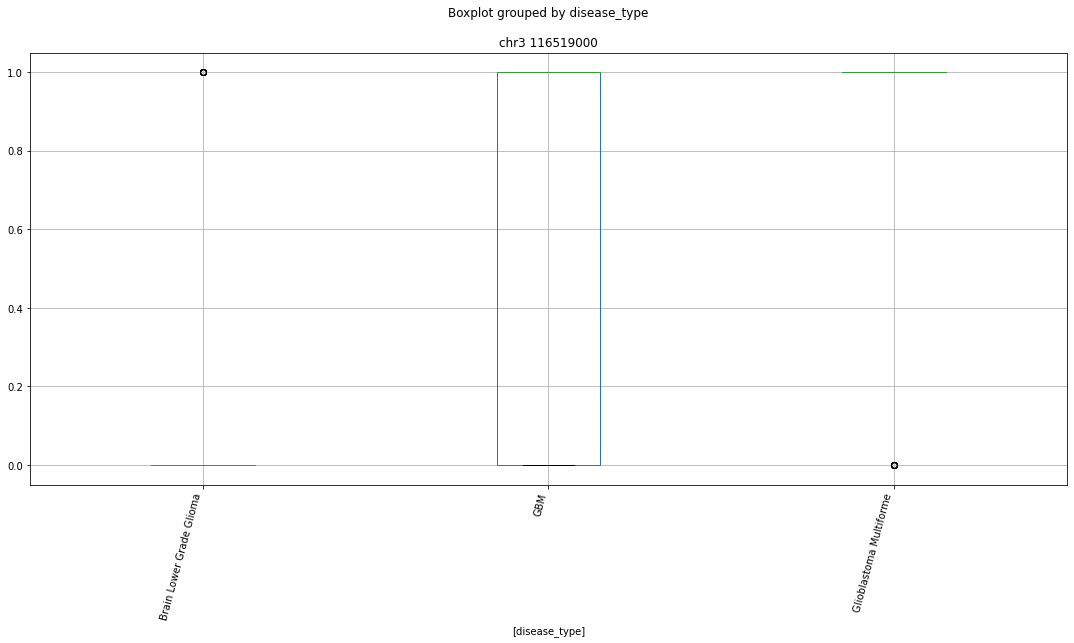

Clustermapping
['chr1 10029000' 'chr1 106413000' 'chr1 109054000' ... 'chrY 8917000'
 'disease_type' 'subject']


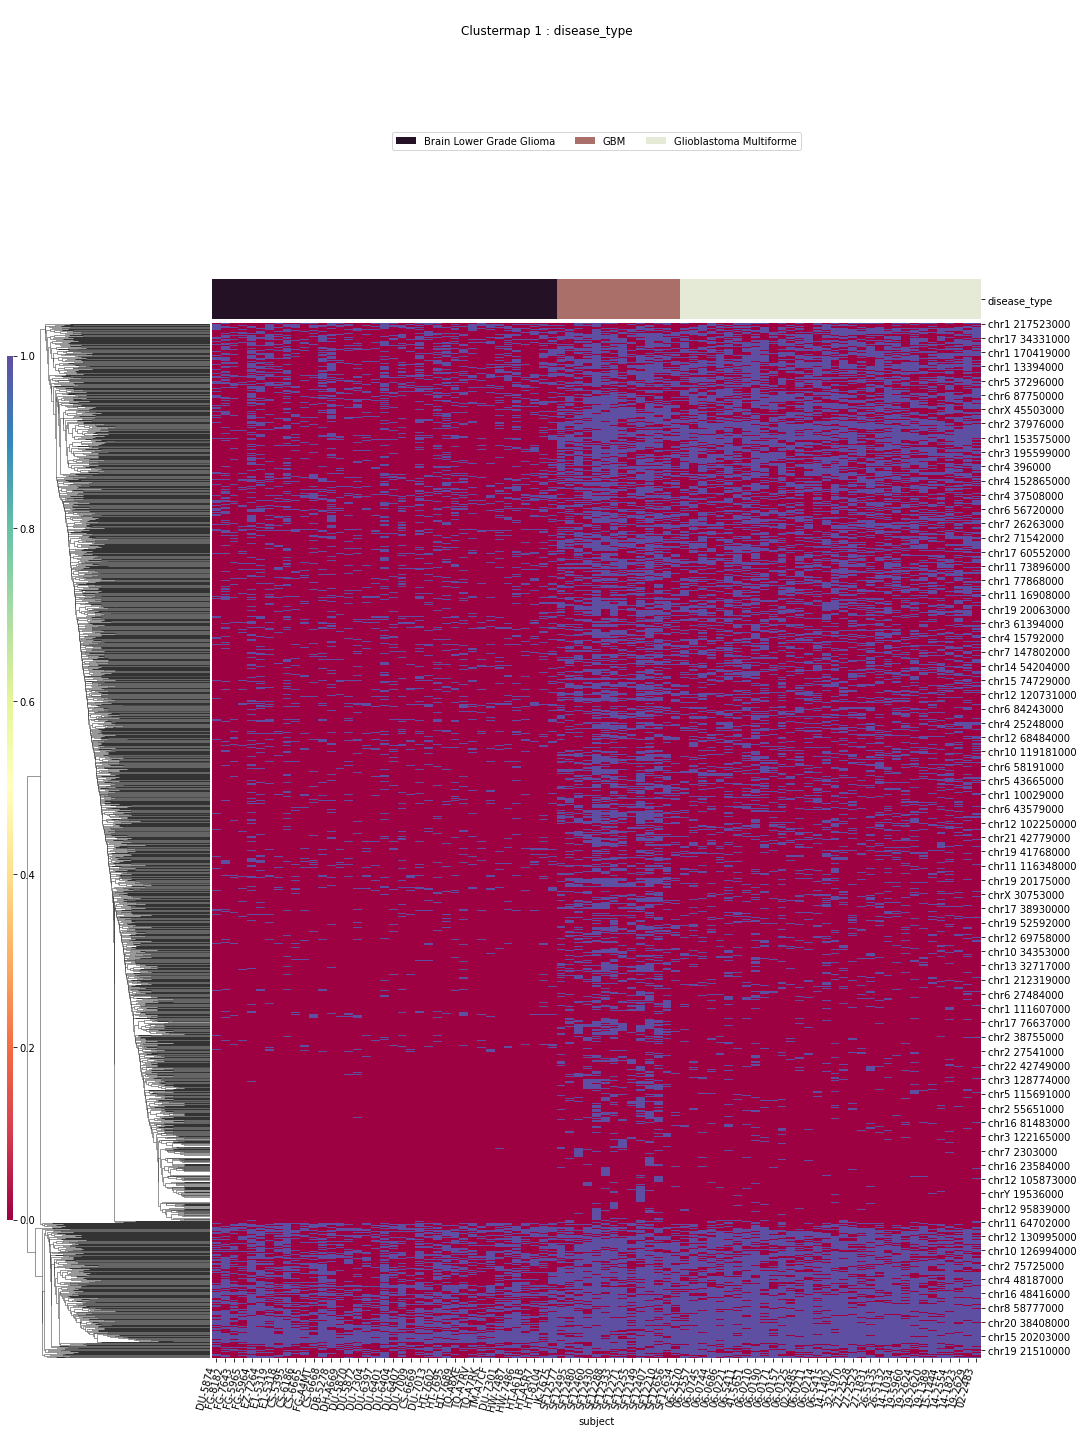

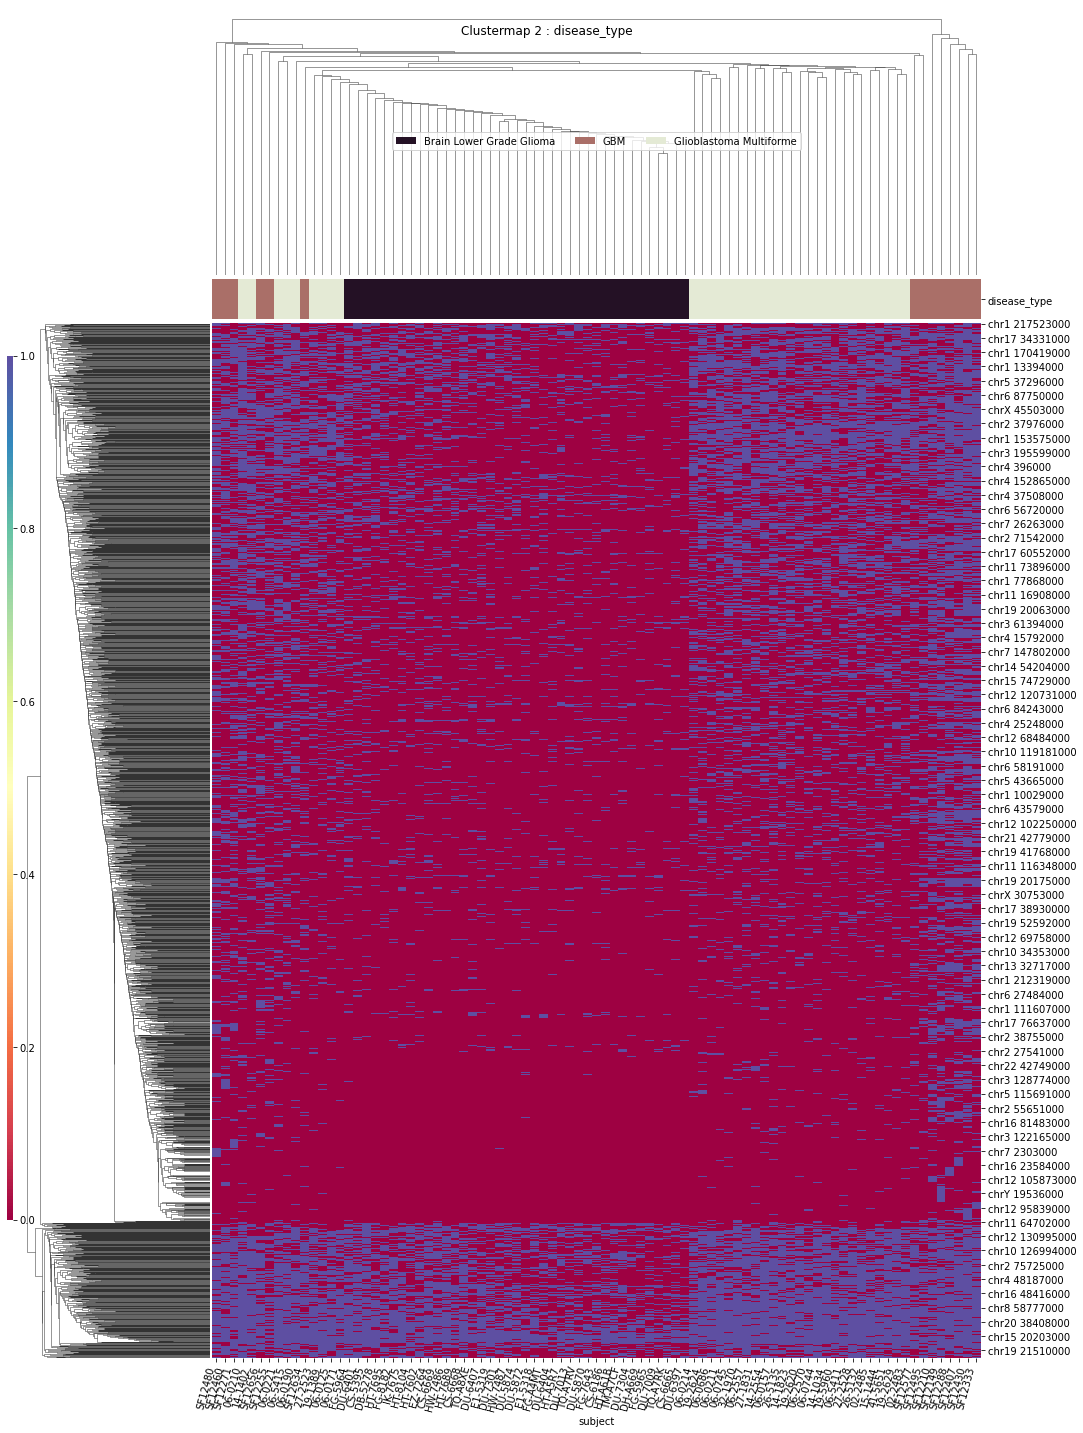

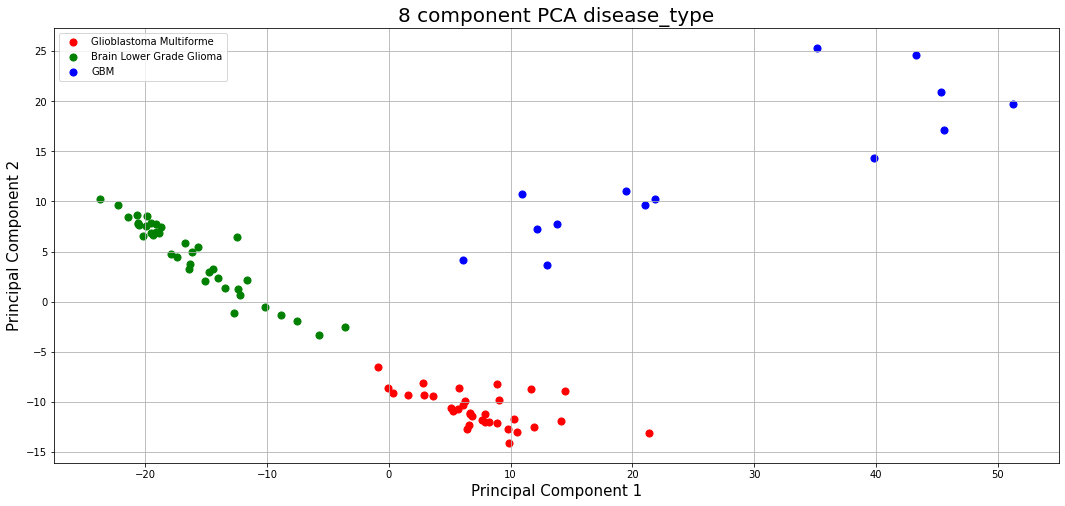

In [139]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [140]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:45:56'

disease_type
T-Testing
Boxplotting
 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr4 54919000


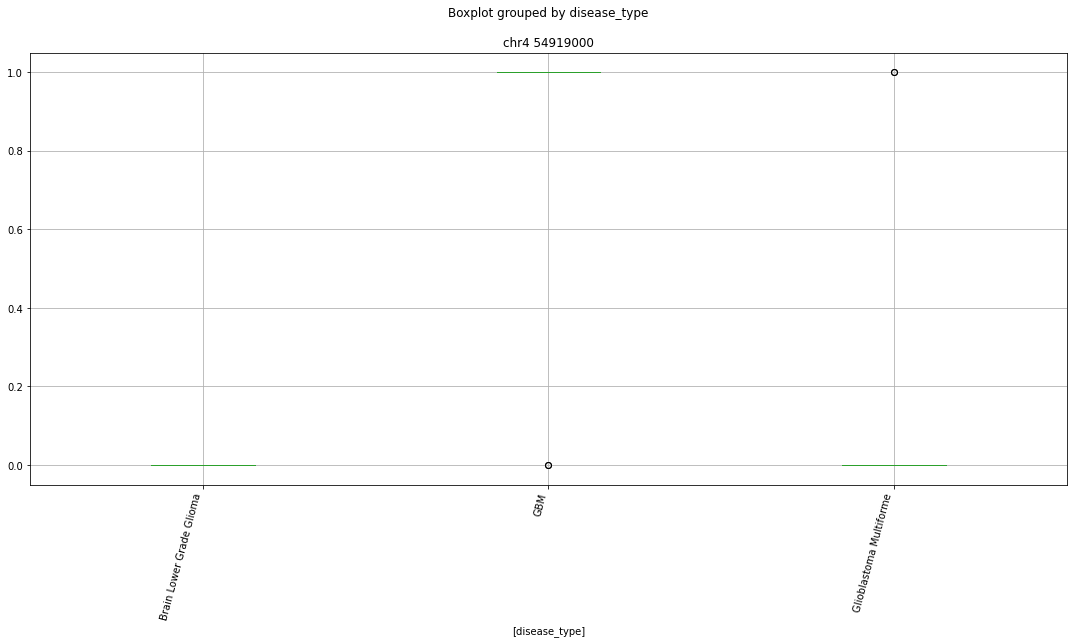

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr12 19092000


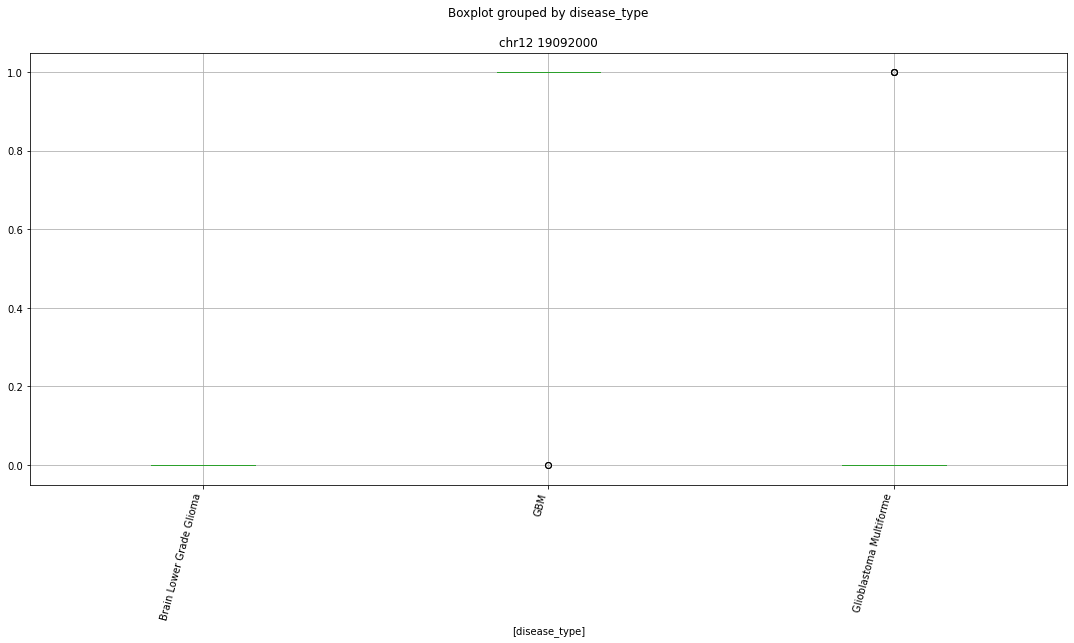

 p : 5.6655084315569635e-18  ( t : 11.554845549490993 ) :  chr9 74853000


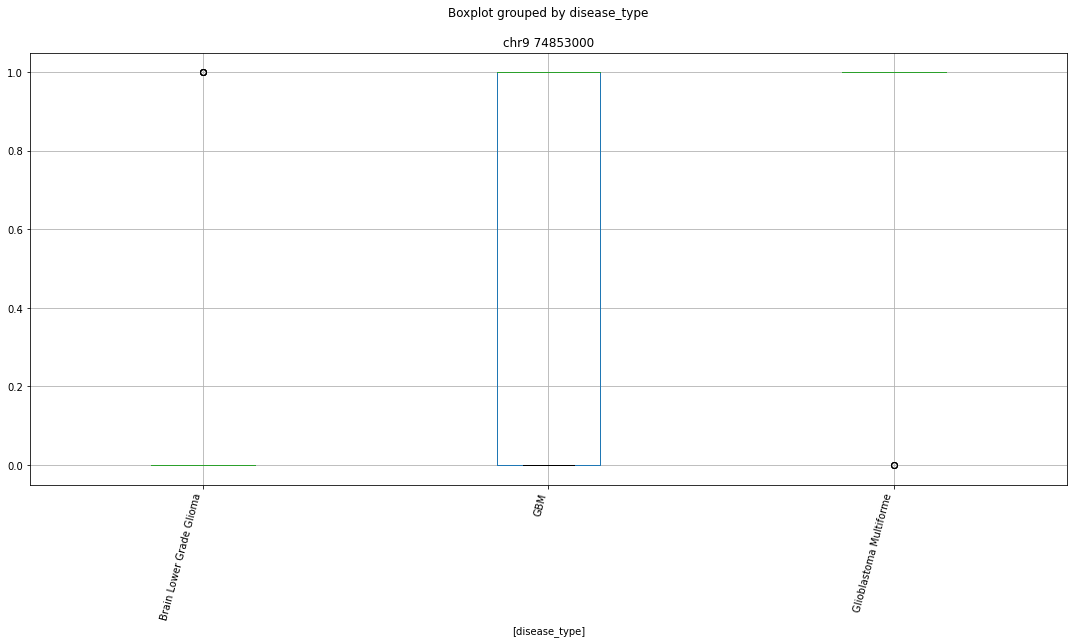

 p : 1.950069771513284e-17  ( t : 12.714573424165305 ) :  chr5 37518000


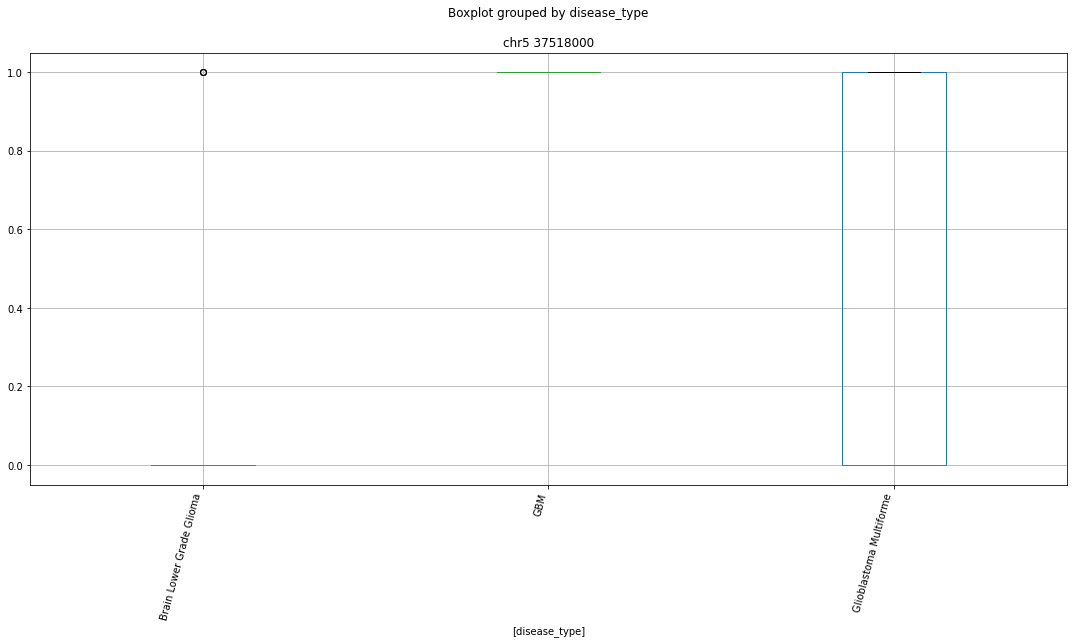

 p : 1.2480988517868185e-16  ( t : 10.797116094925201 ) :  chr3 119243000


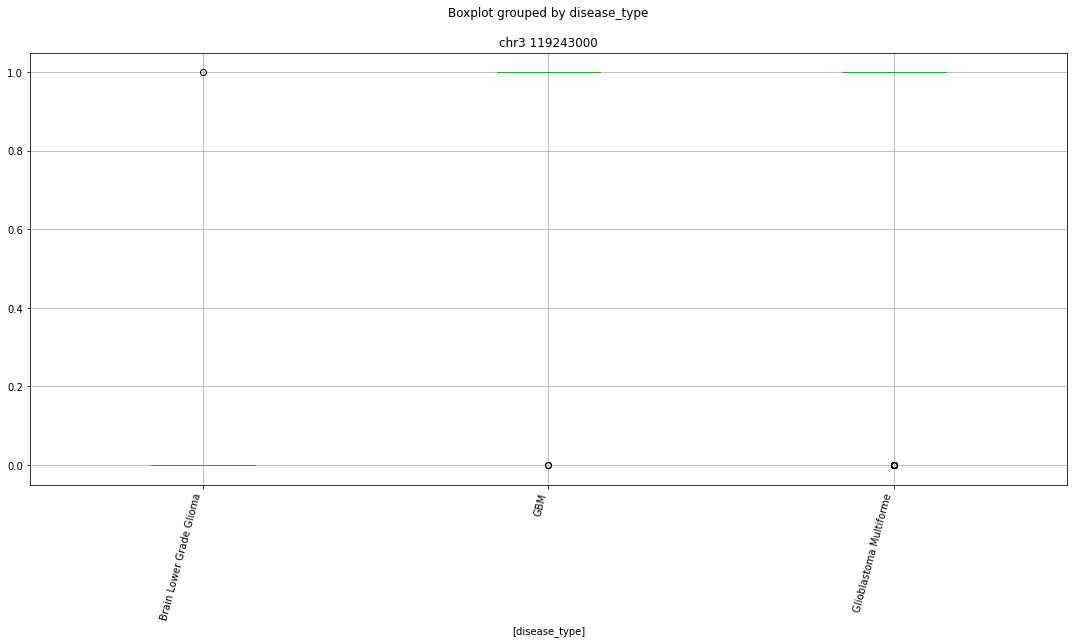

 p : 2.0346699265924837e-16  ( t : 11.961887225105135 ) :  chr16 2399000


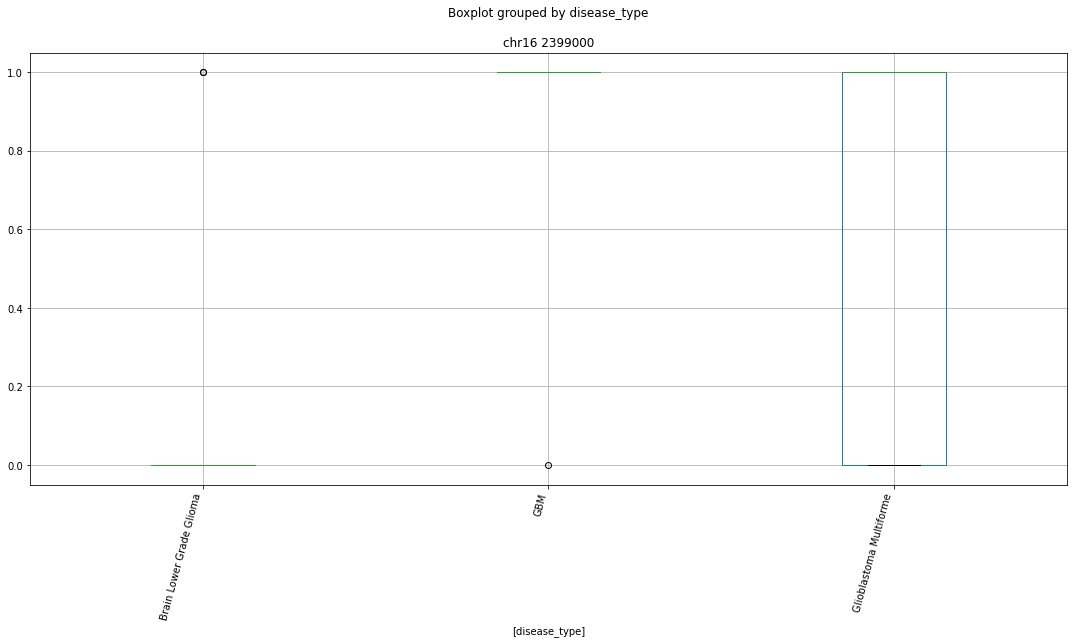

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr5 43745000


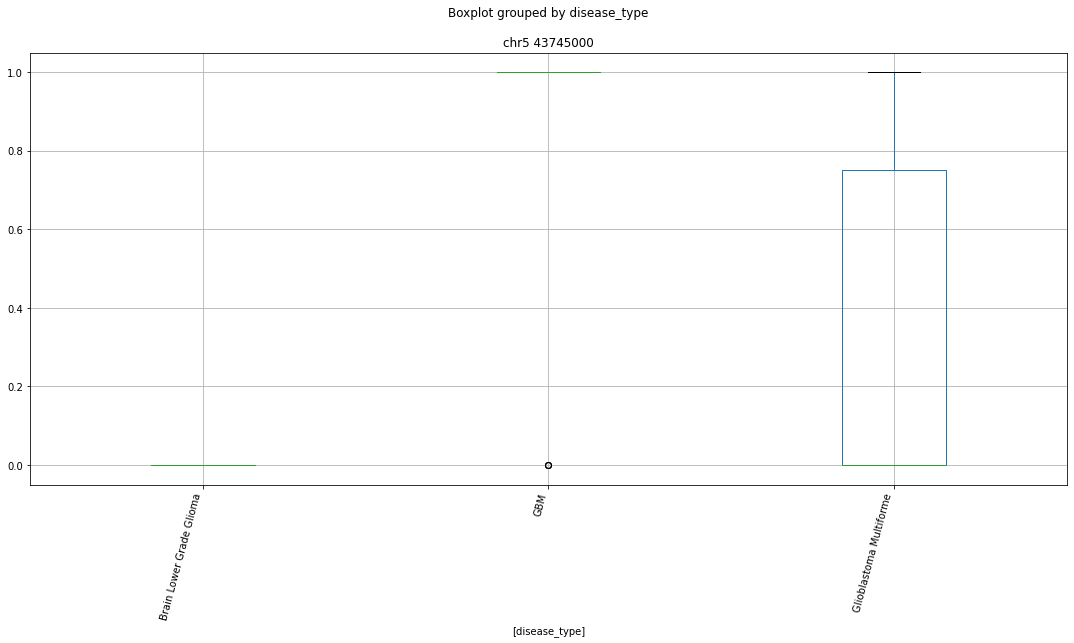

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr8 93832000


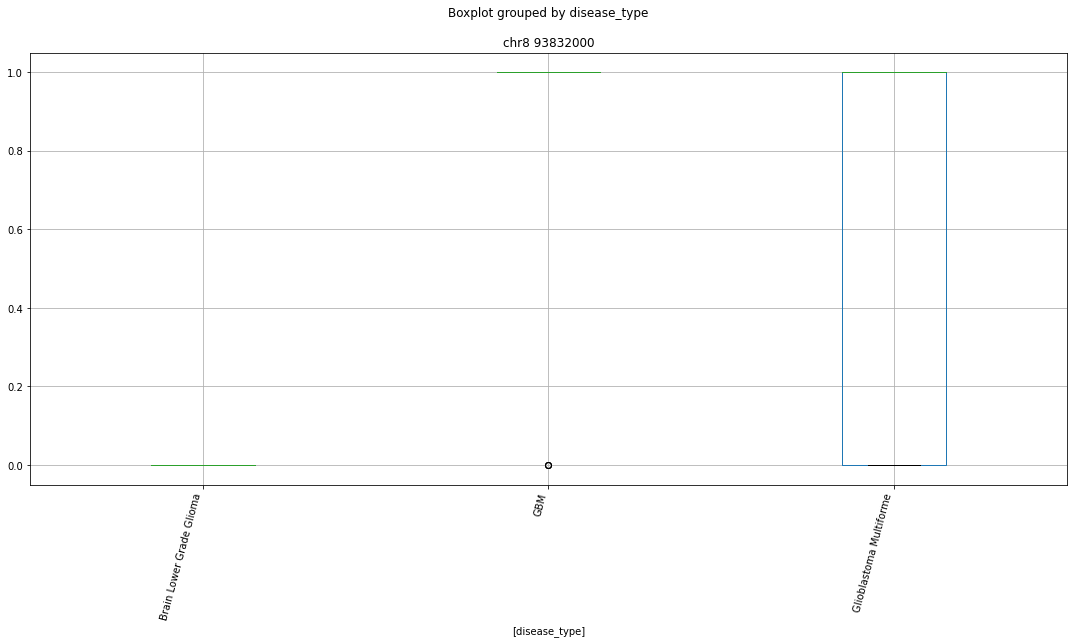

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr12 102250000


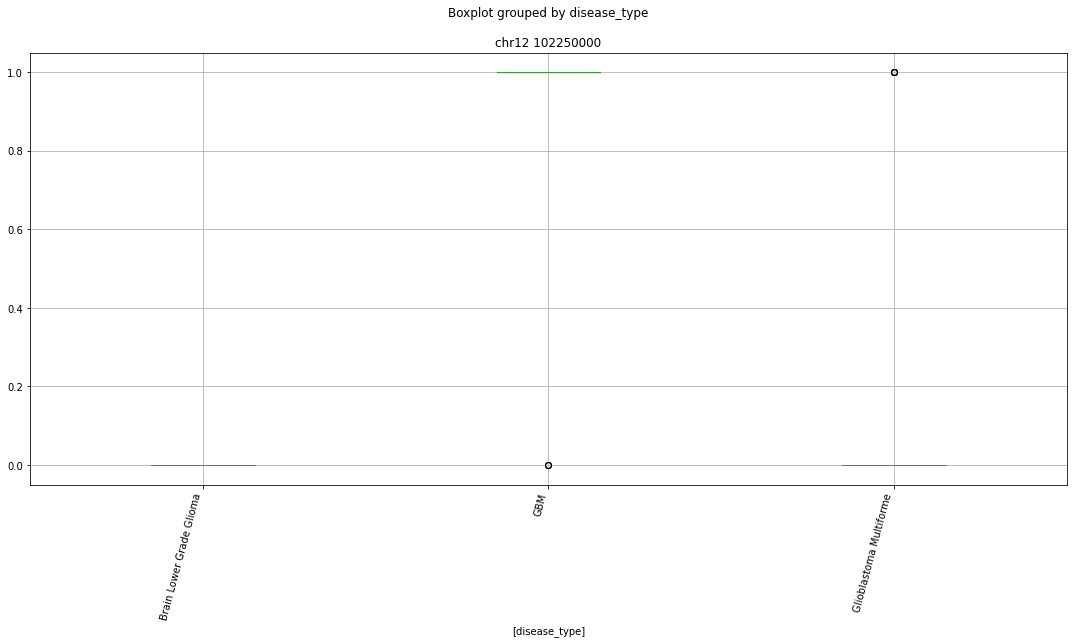

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr12 108421000


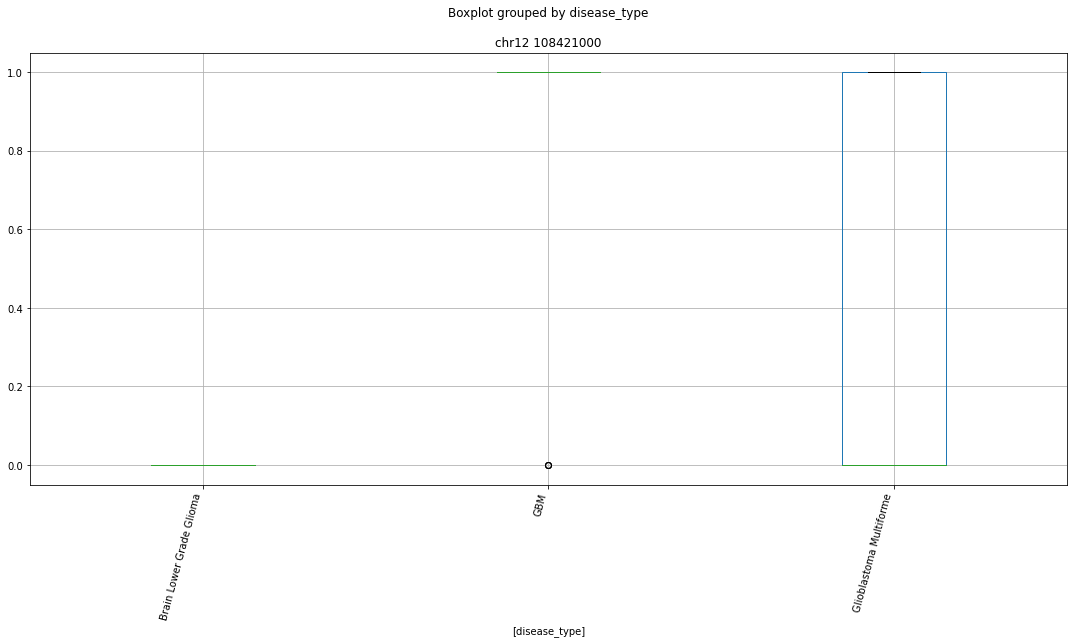

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr4 151732000


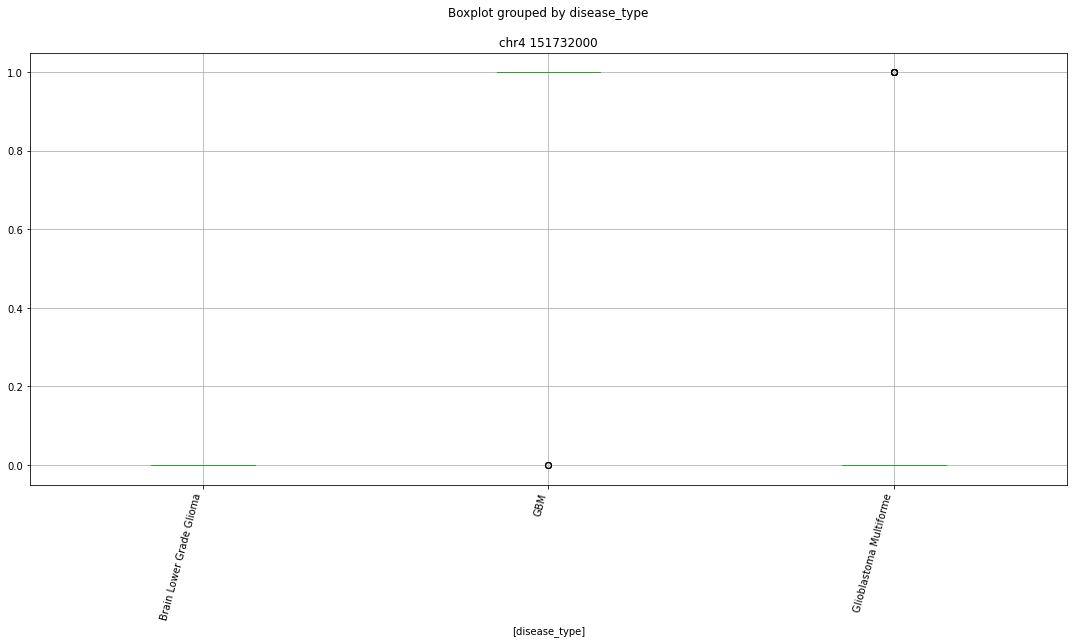

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr17 30978000


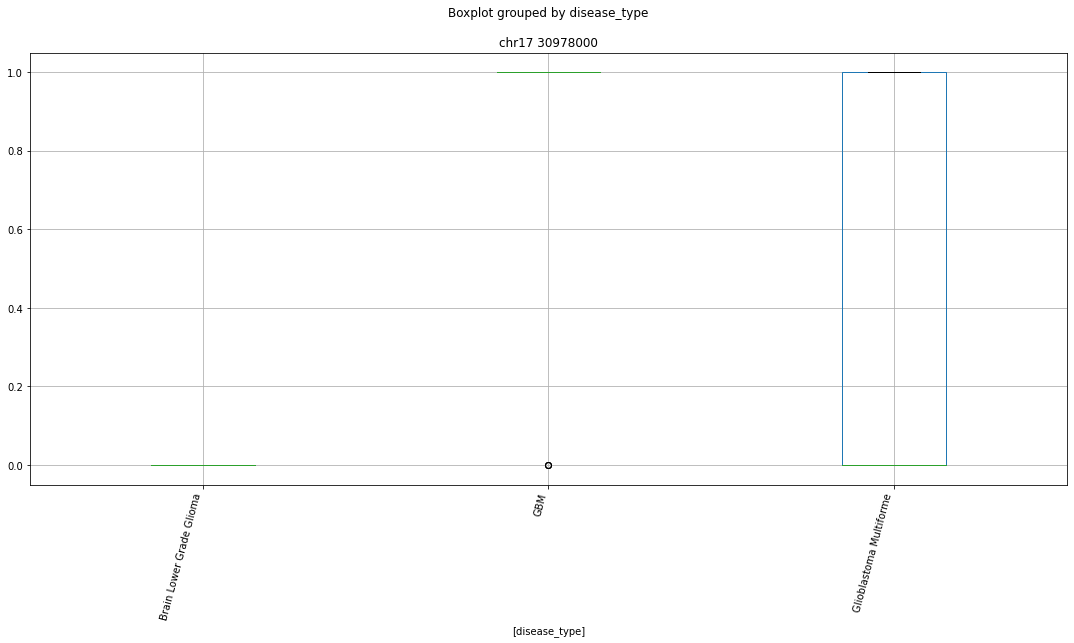

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr6 159661000


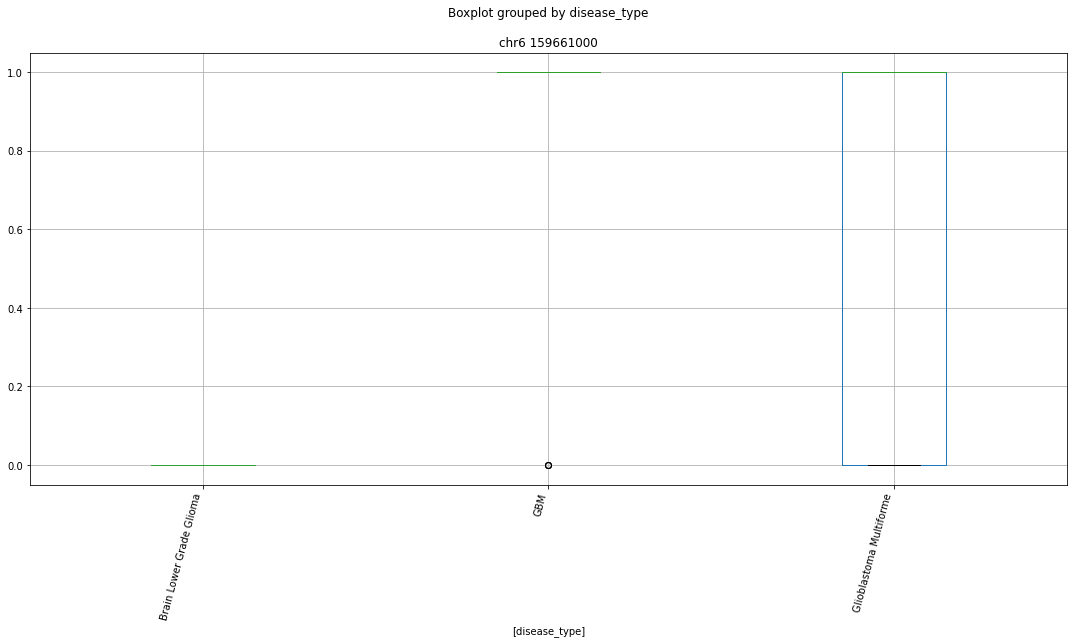

 p : 4.246227838271257e-16  ( t : 11.730463485510944 ) :  chr16 53626000


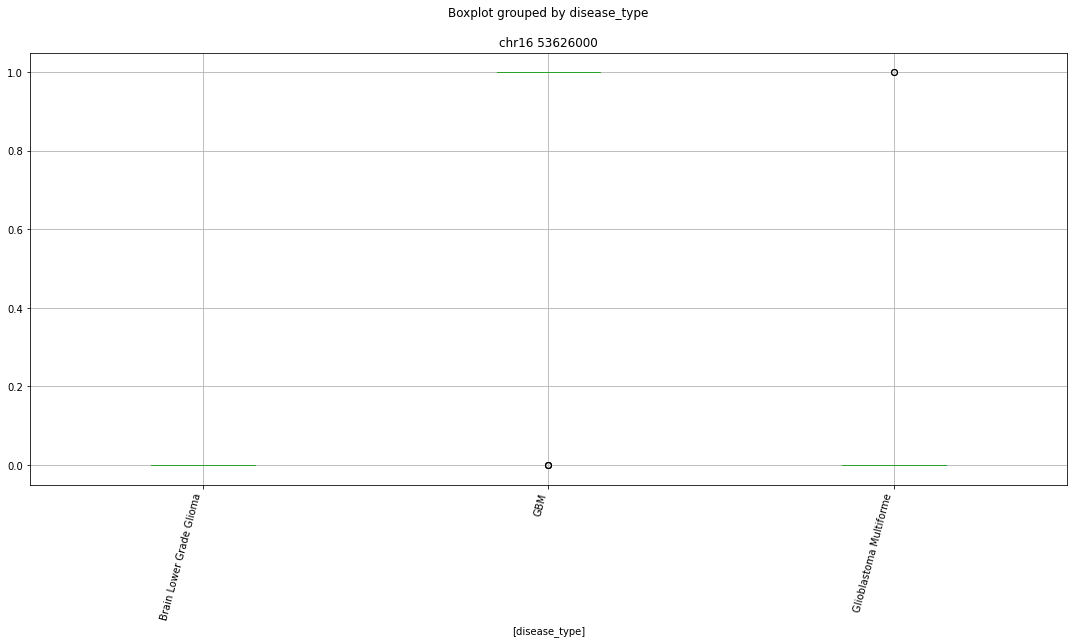

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr3 117051000


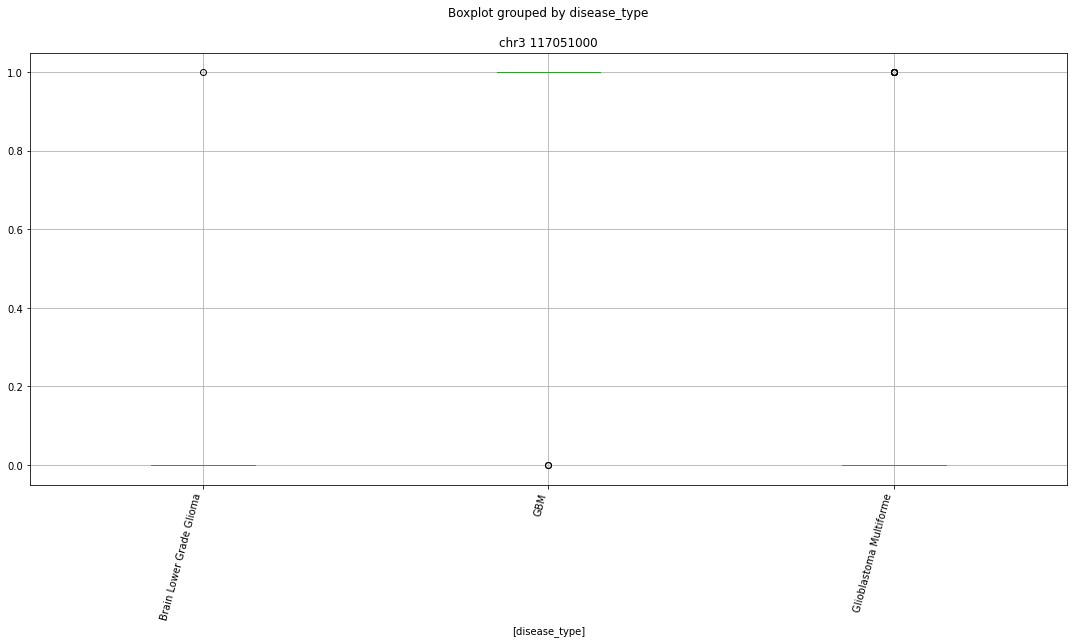

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr3 119243000


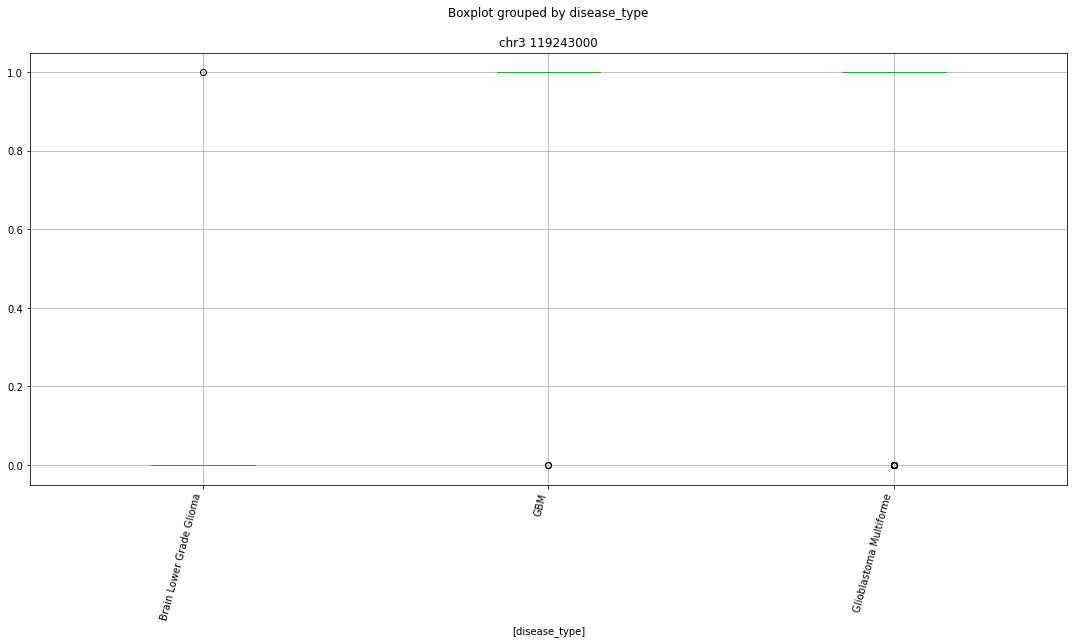

Clustermapping
['chr1 106413000' 'chr1 109074000' 'chr1 109176000' ... 'chrY 8917000'
 'disease_type' 'subject']


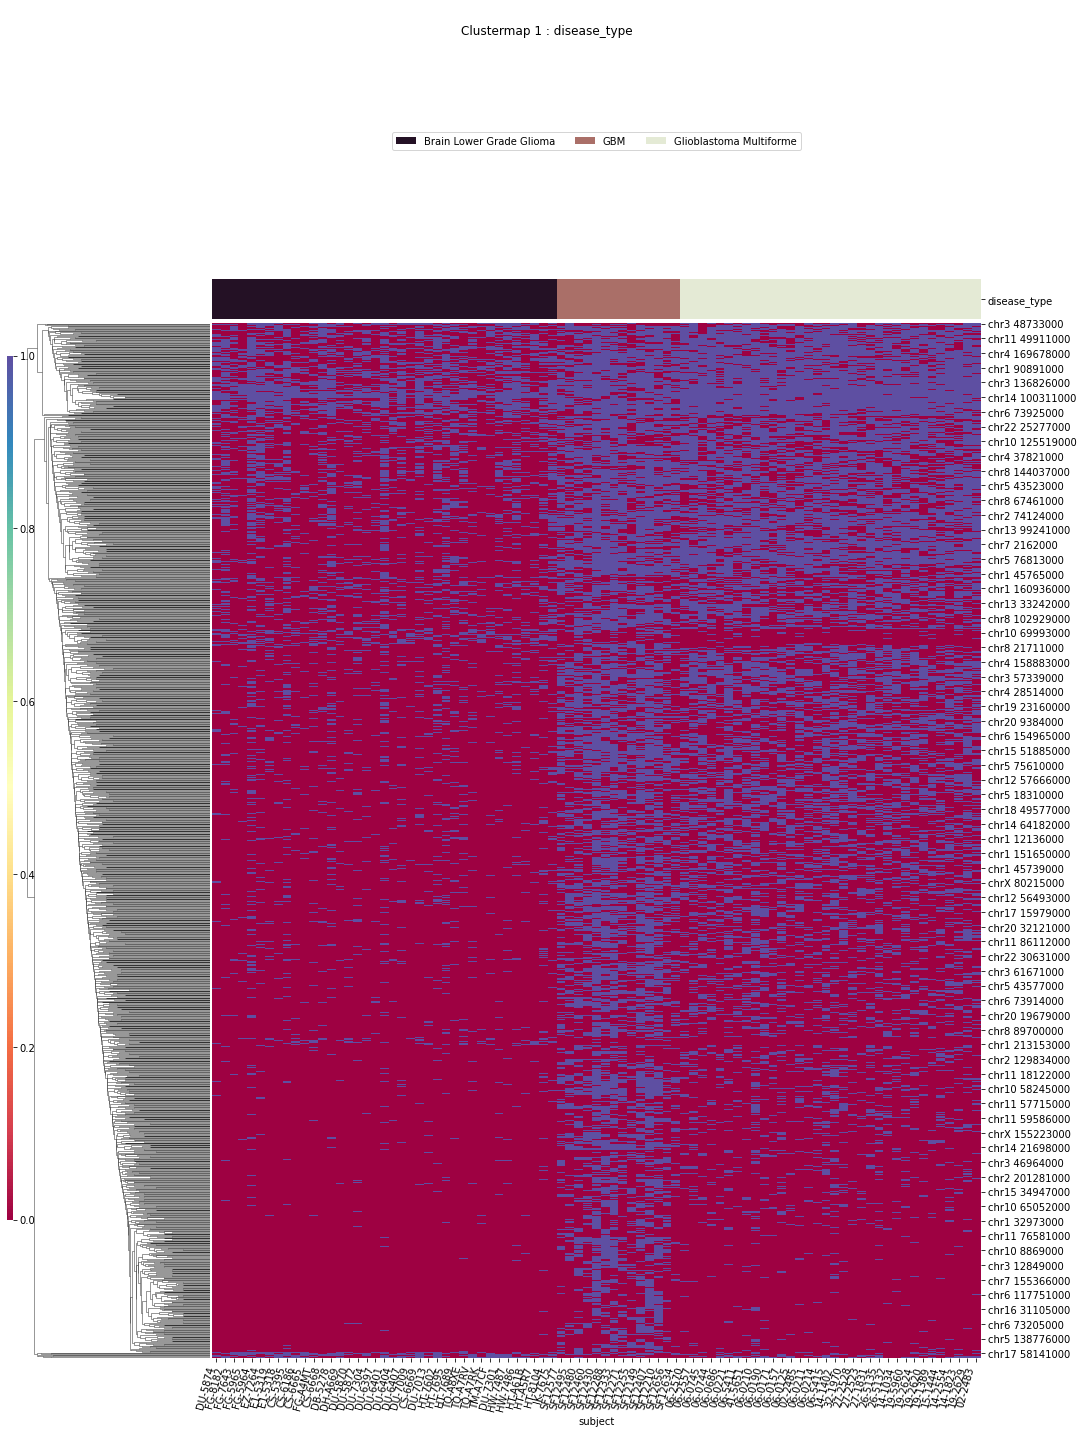

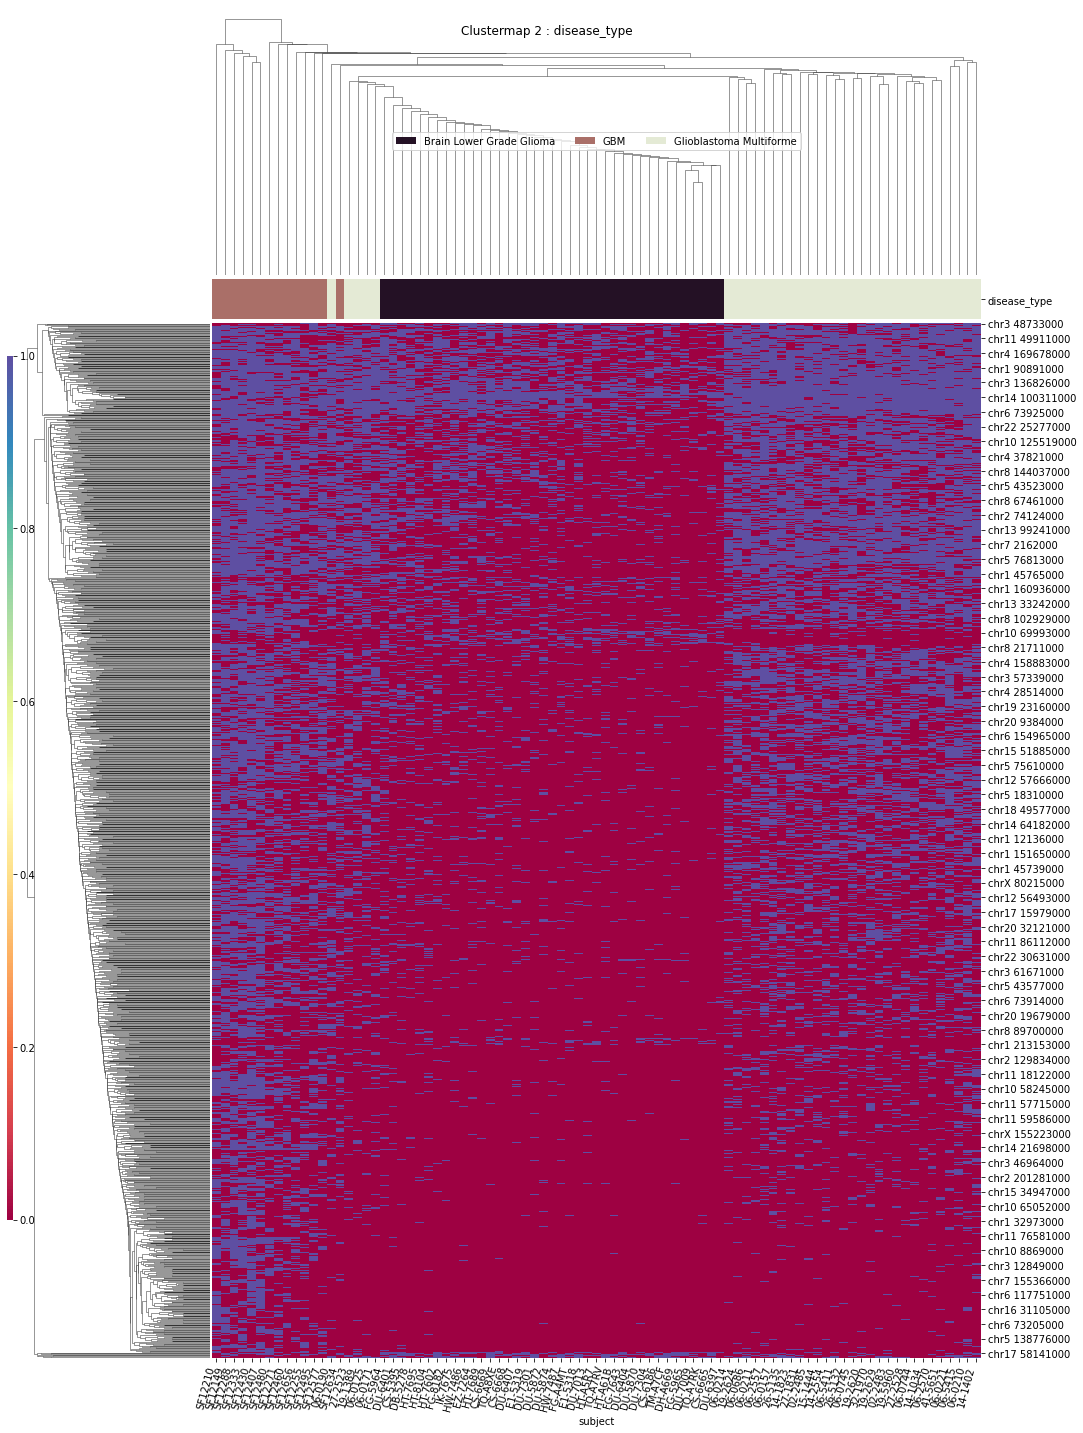

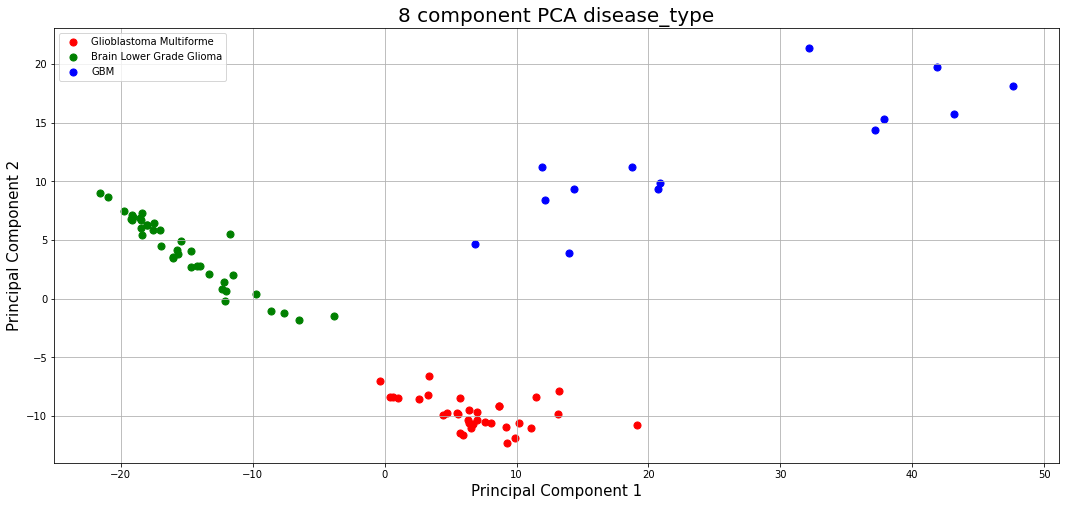

In [141]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [142]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:46:43'

disease_type
T-Testing
Boxplotting
 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr4 54919000


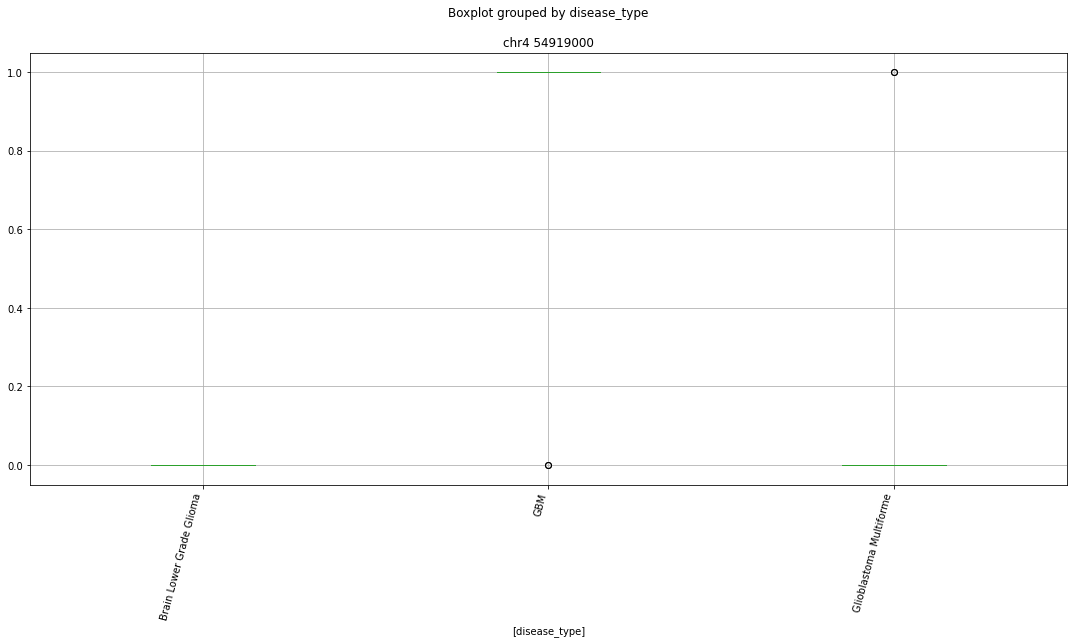

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr12 19092000


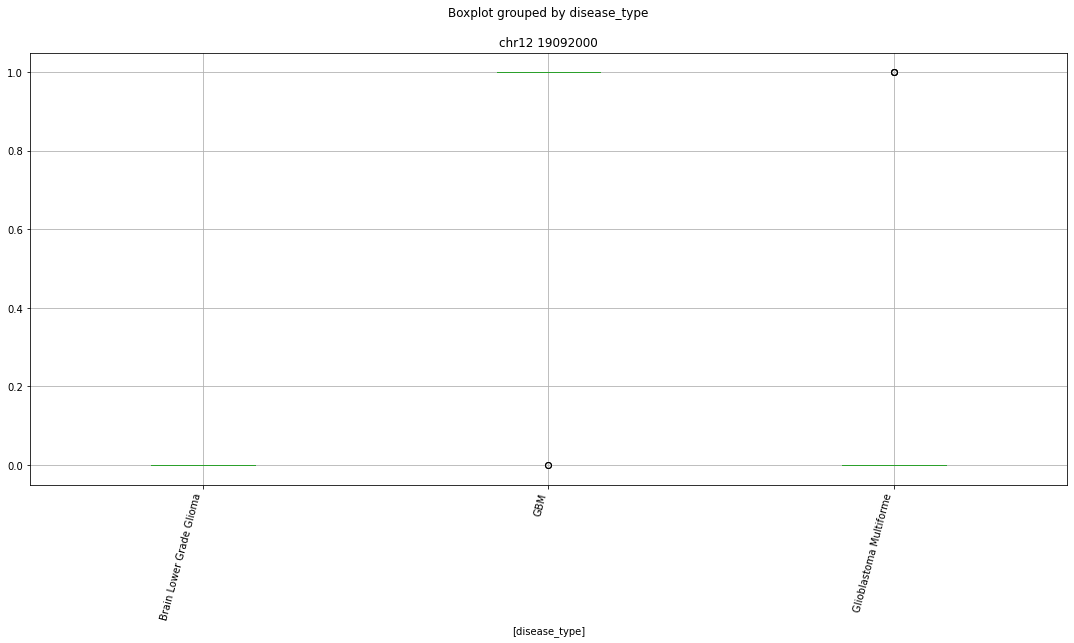

 p : 5.6655084315569635e-18  ( t : 11.554845549490993 ) :  chr9 74853000


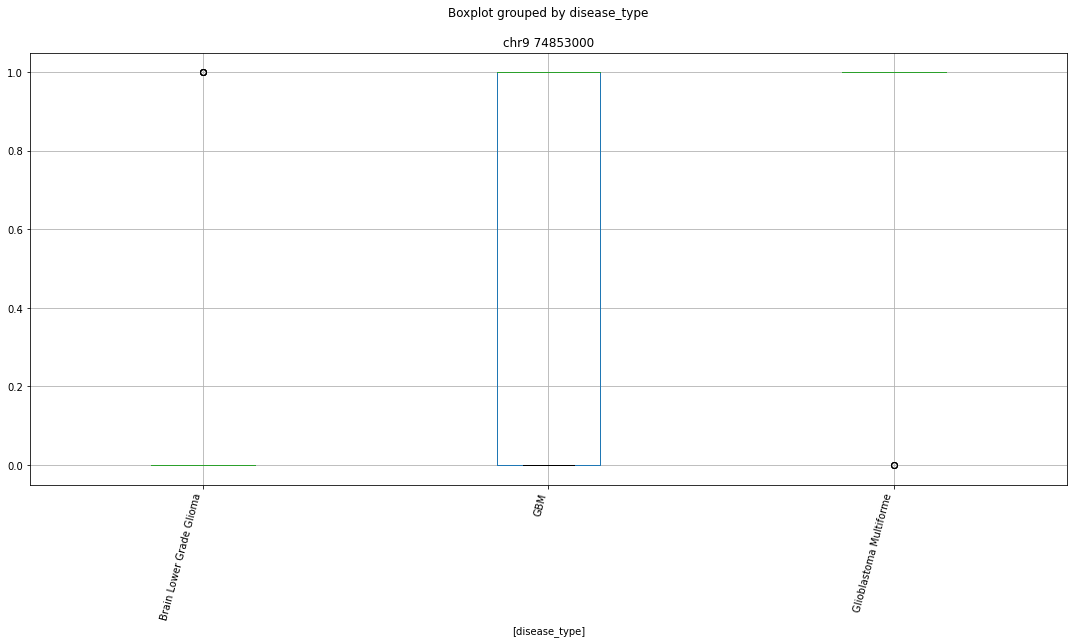

 p : 1.950069771513284e-17  ( t : 12.714573424165305 ) :  chr5 37518000


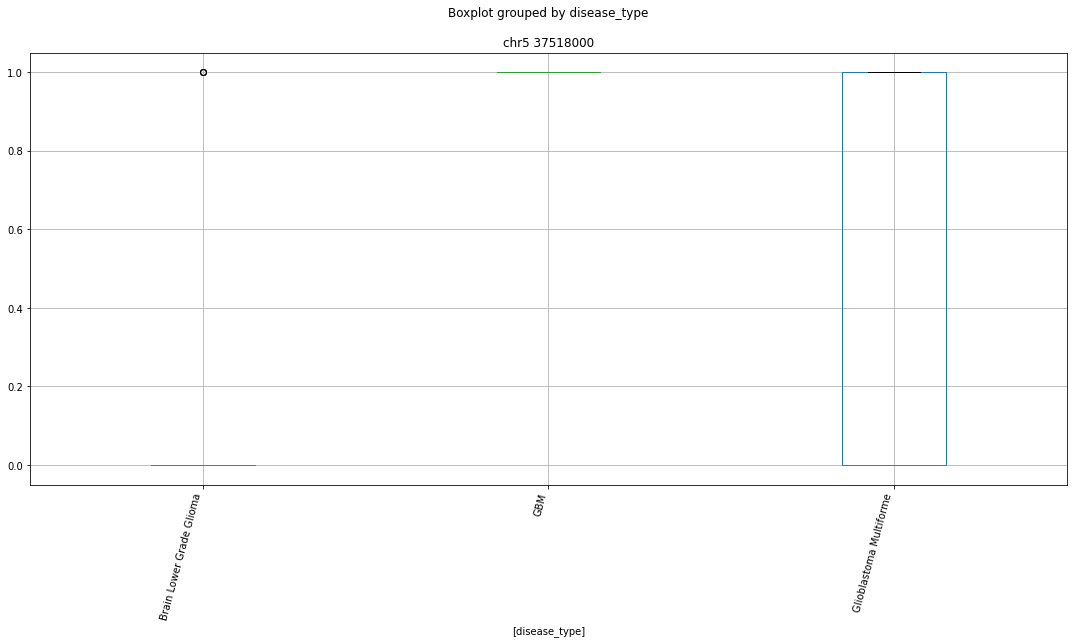

 p : 1.2480988517868185e-16  ( t : 10.797116094925201 ) :  chr3 119243000


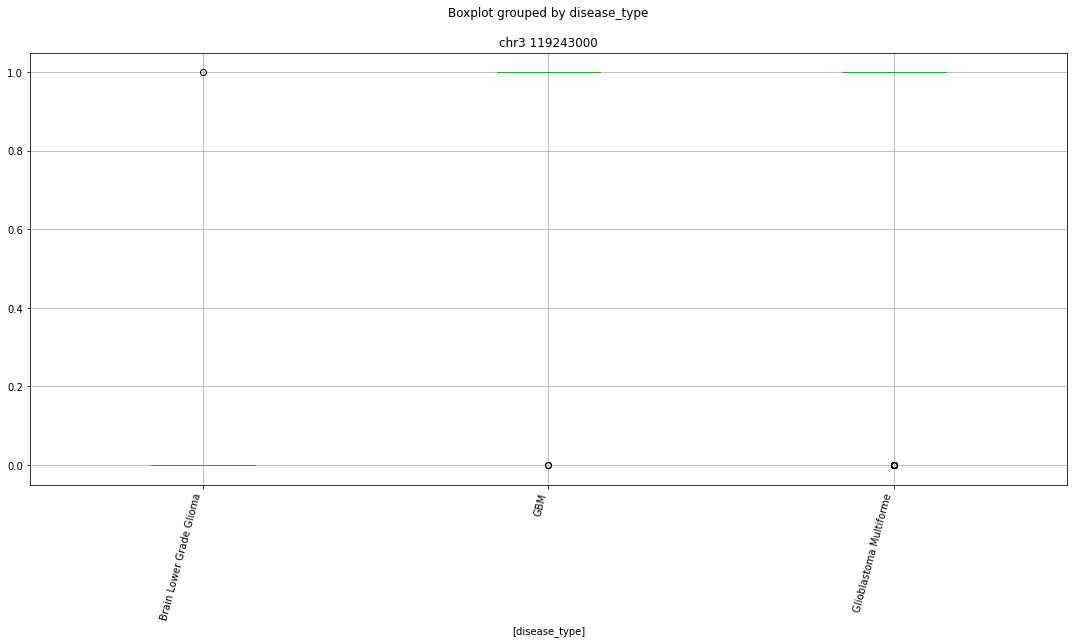

 p : 2.0346699265924837e-16  ( t : 11.961887225105135 ) :  chr16 2399000


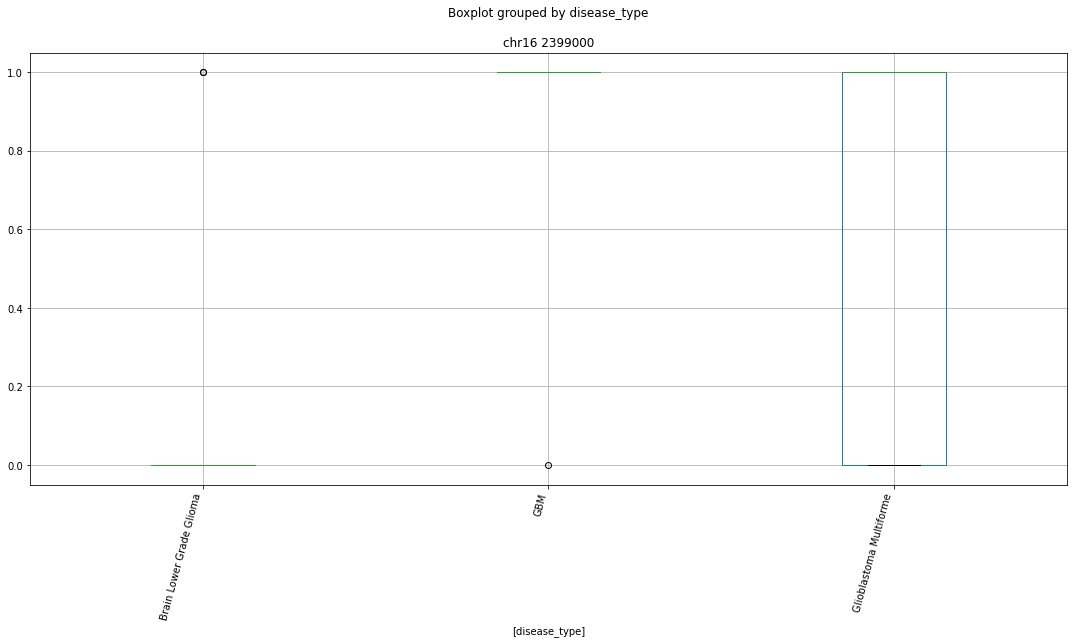

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr8 93832000


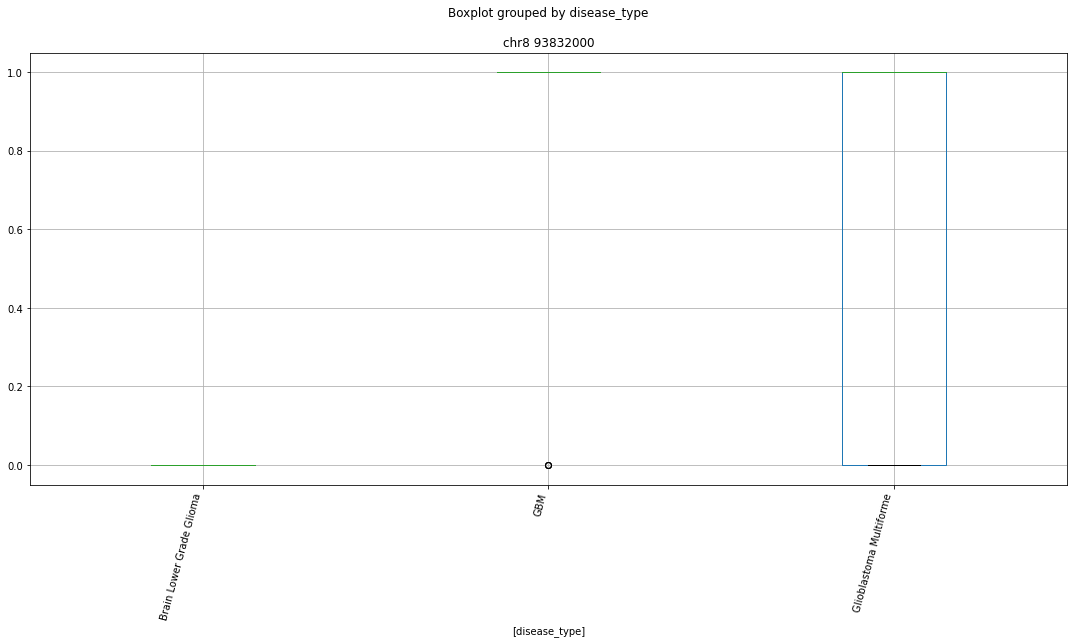

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr12 108421000


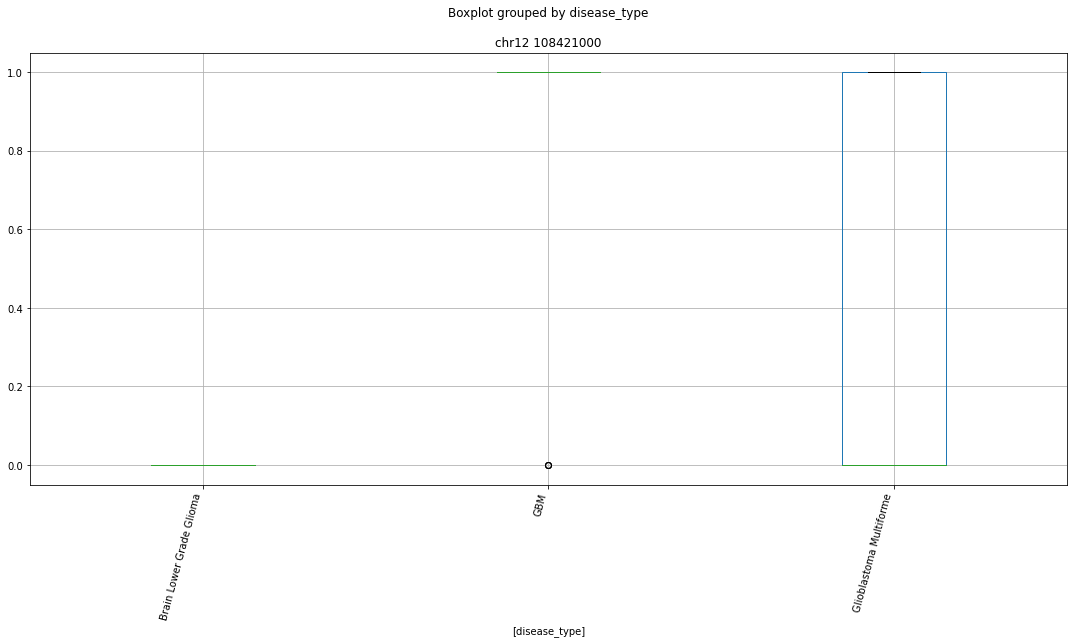

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr12 102250000


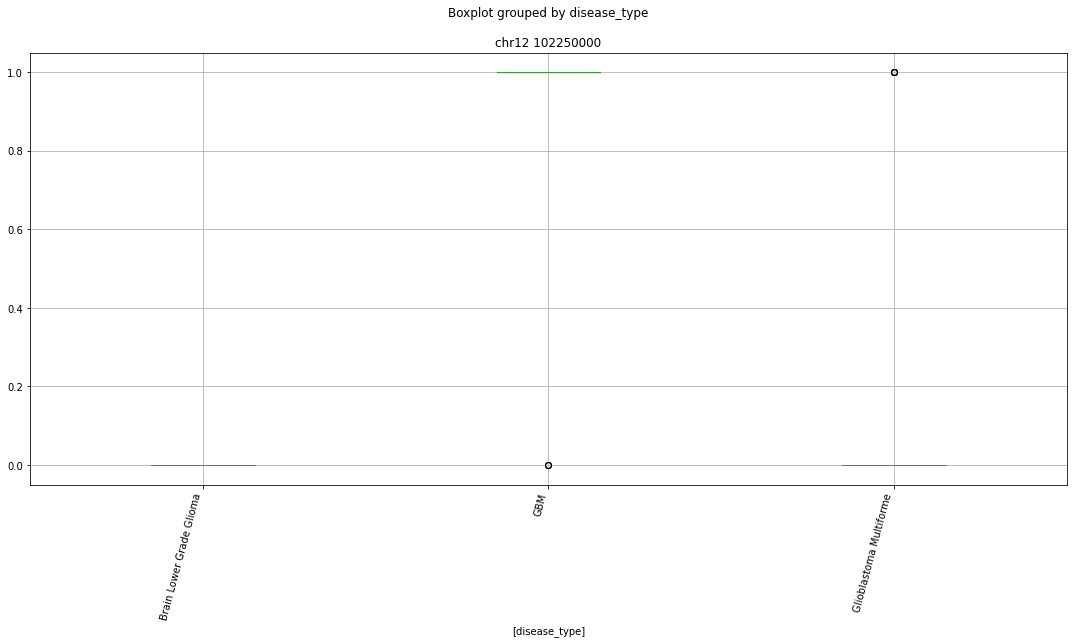

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr5 43745000


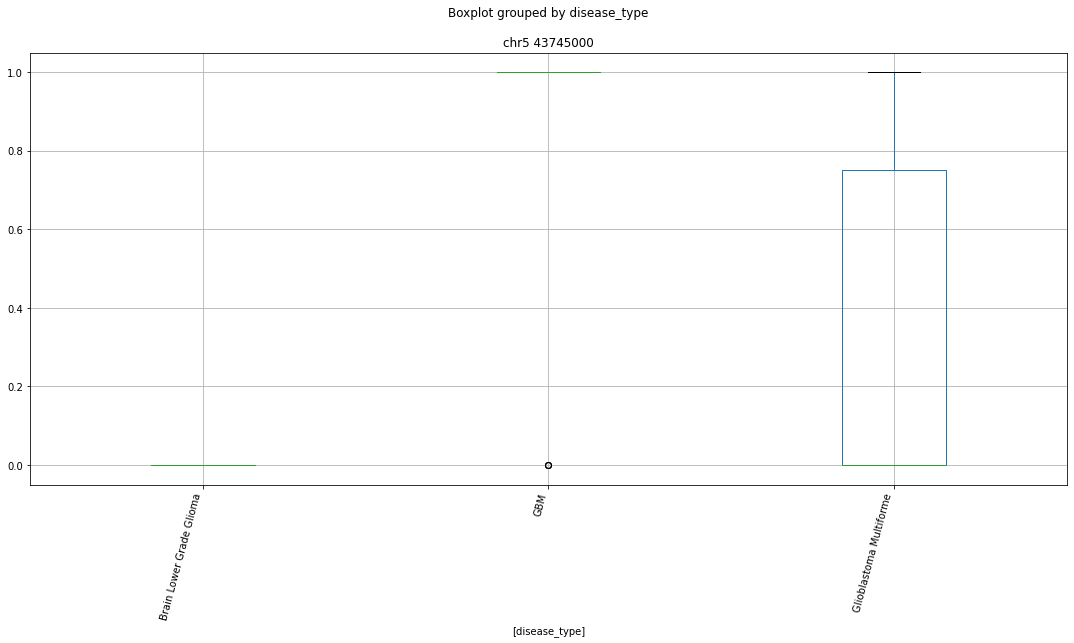

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr4 151732000


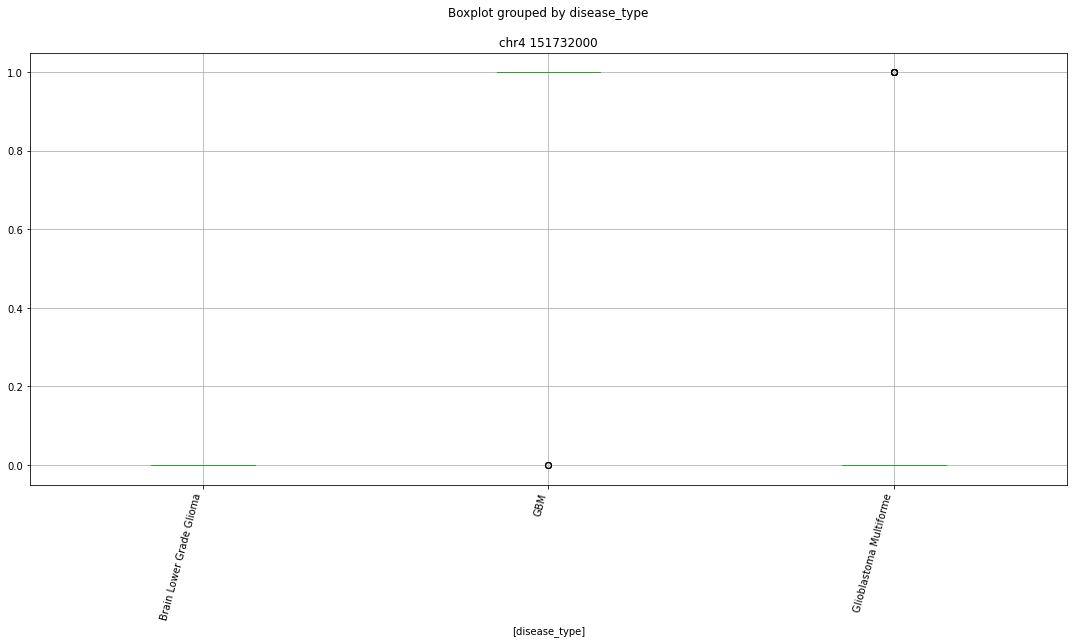

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr6 159661000


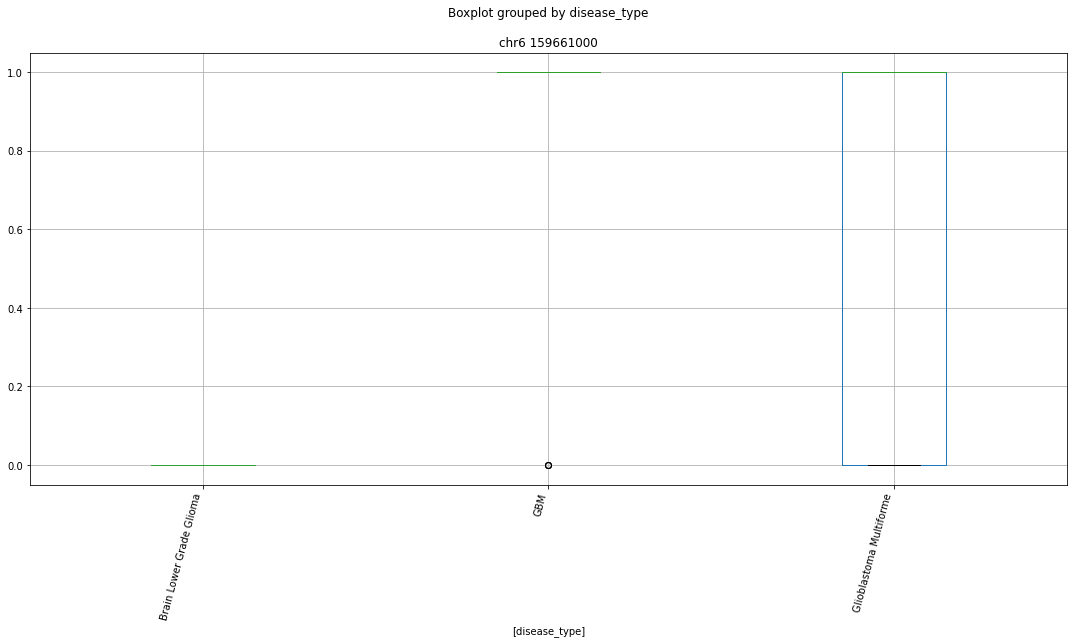

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr17 30978000


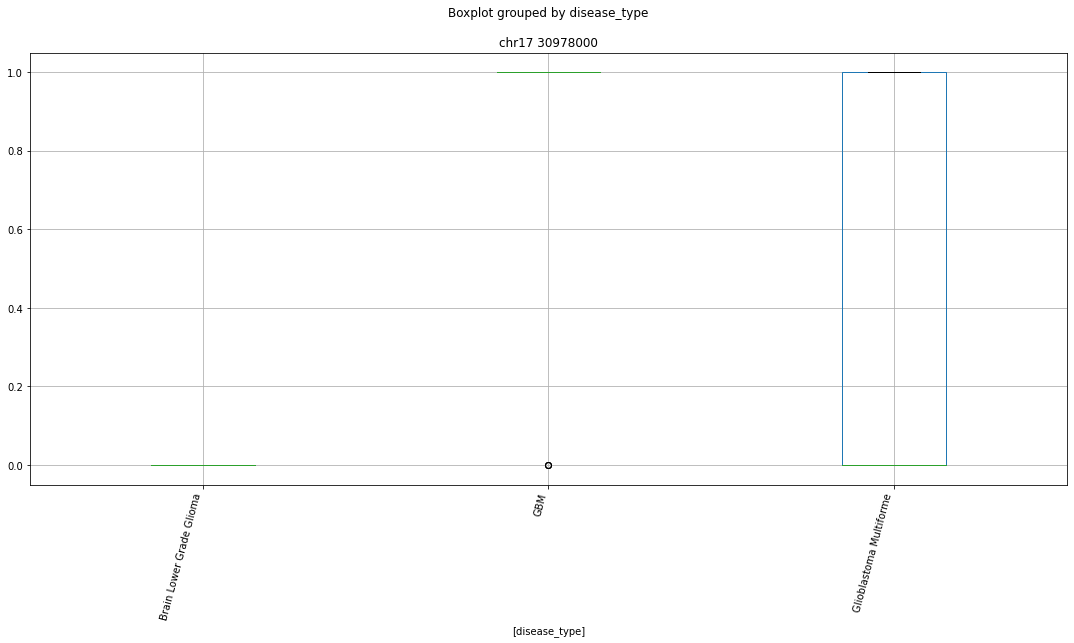

 p : 4.246227838271257e-16  ( t : 11.730463485510944 ) :  chr16 53626000


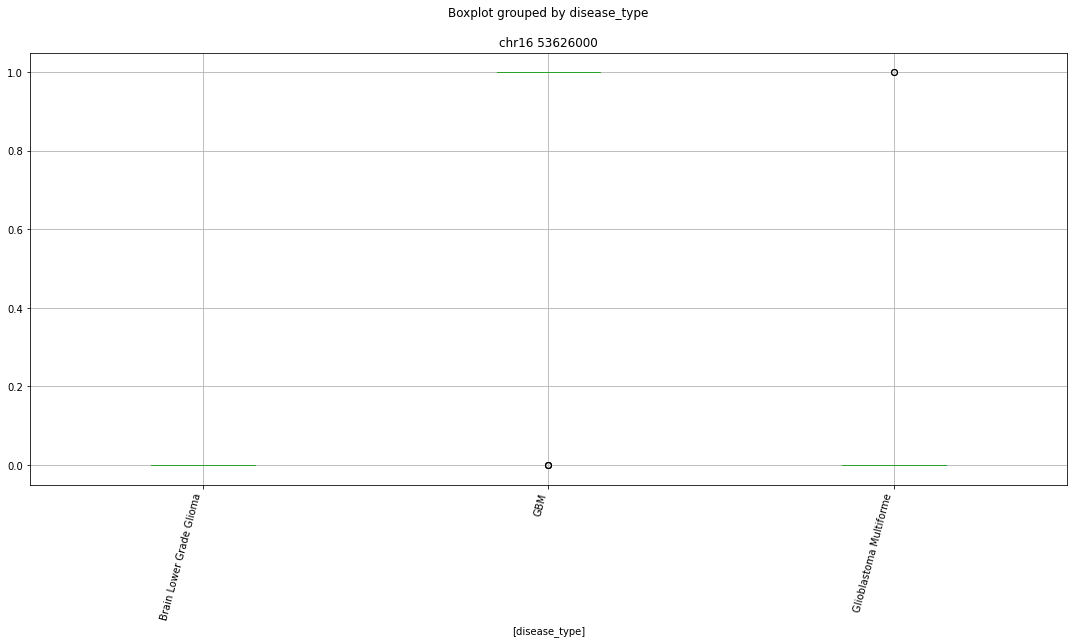

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr3 119243000


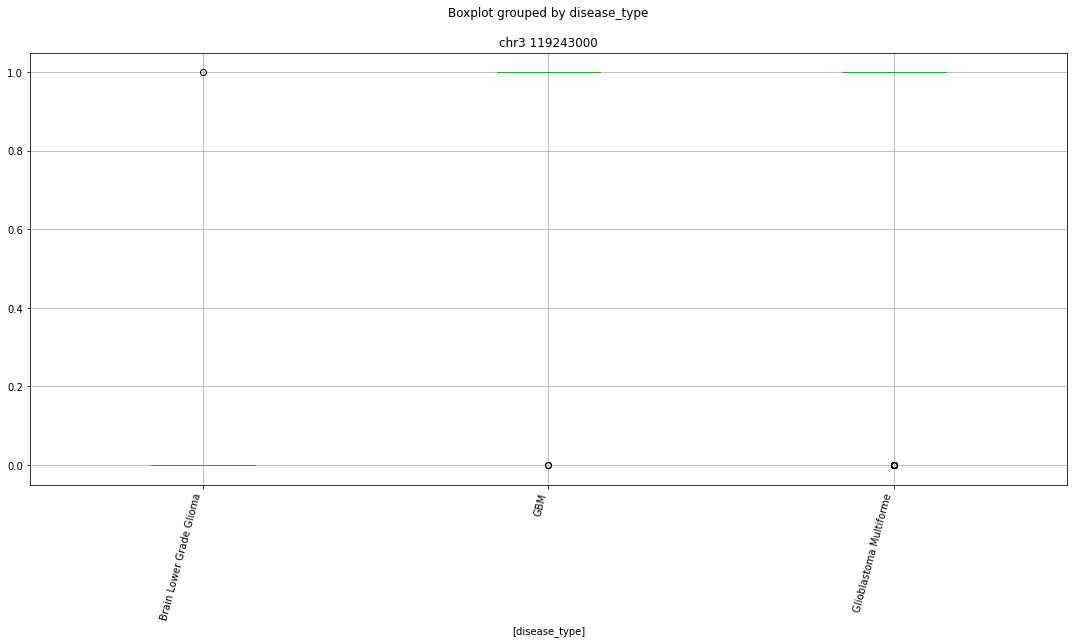

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr3 117051000


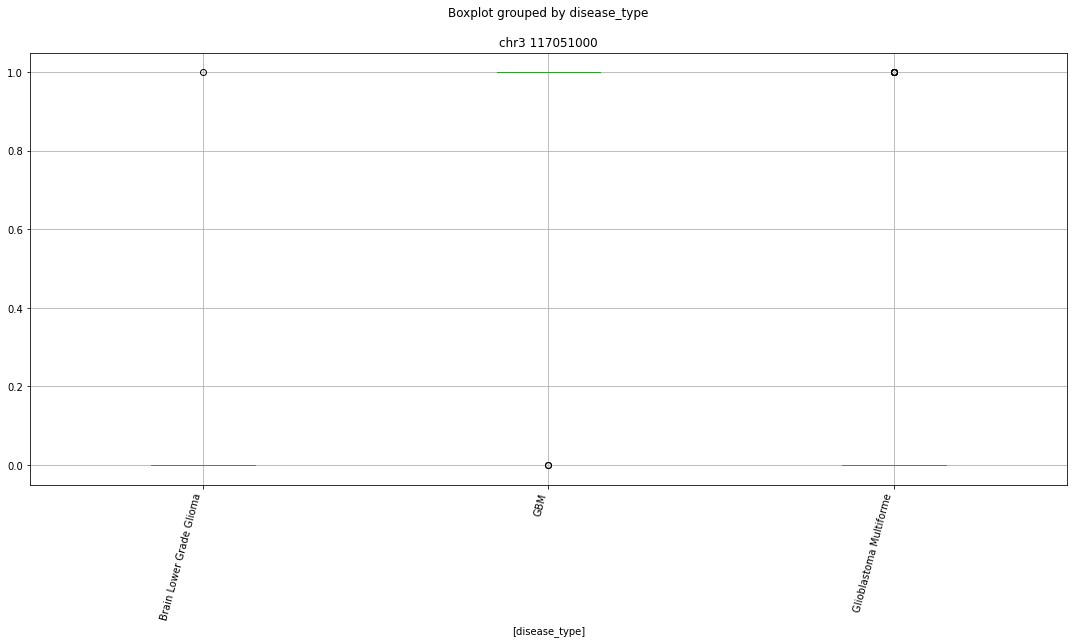

Clustermapping
['chr1 106413000' 'chr1 109074000' 'chr1 109176000' ... 'chrY 8917000'
 'disease_type' 'subject']


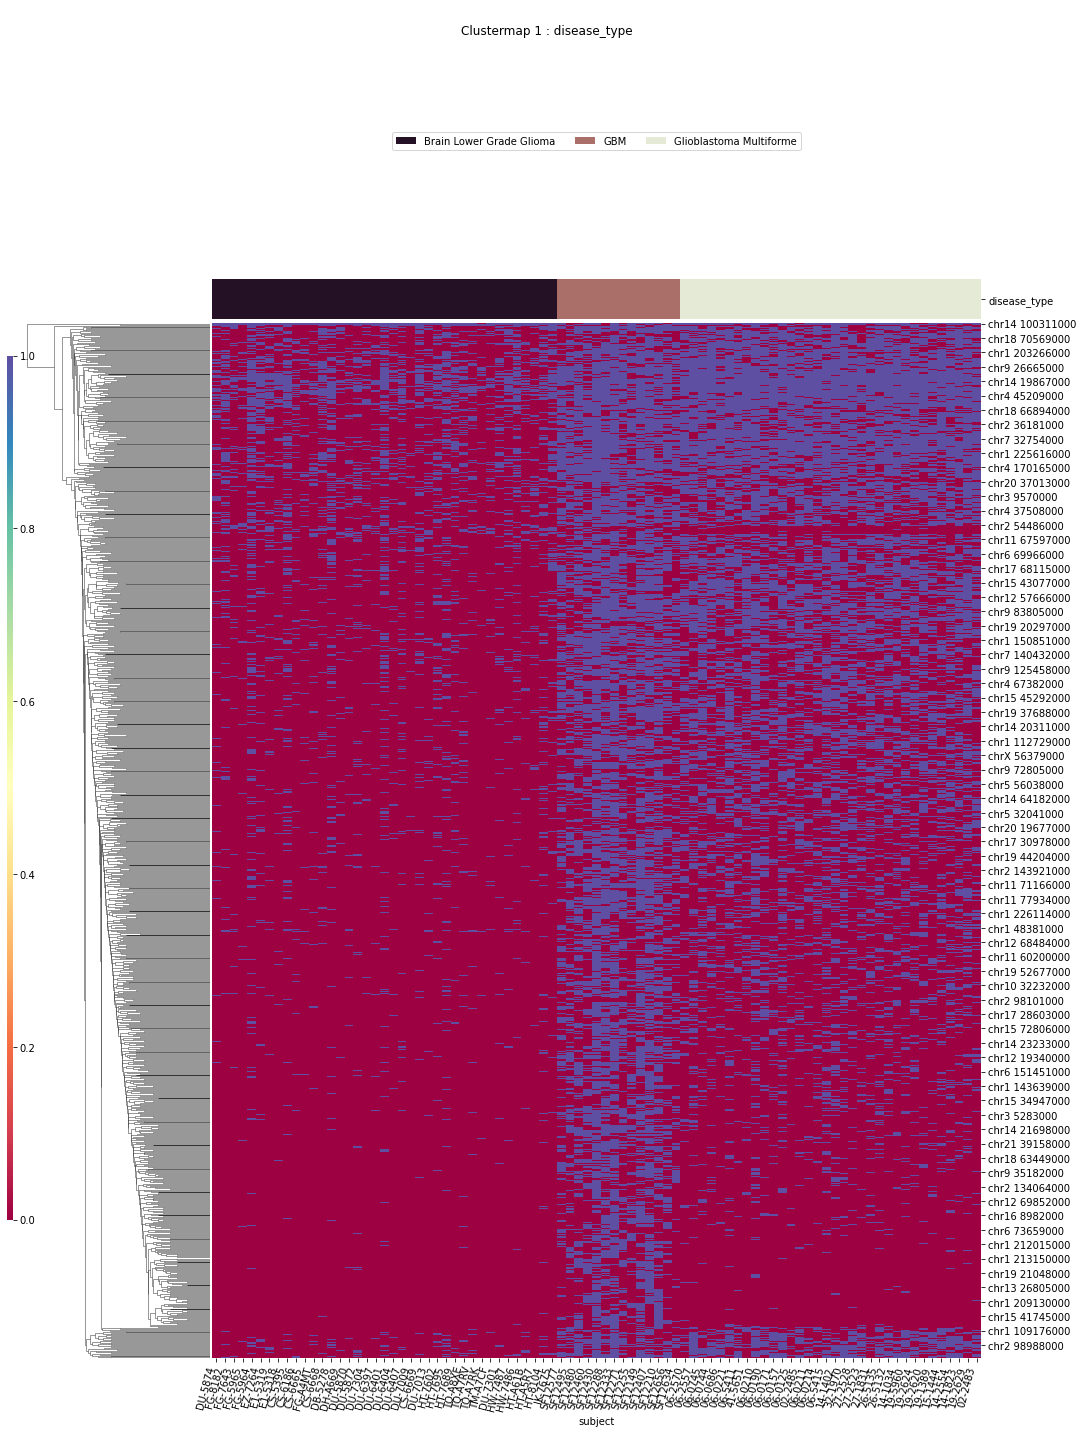

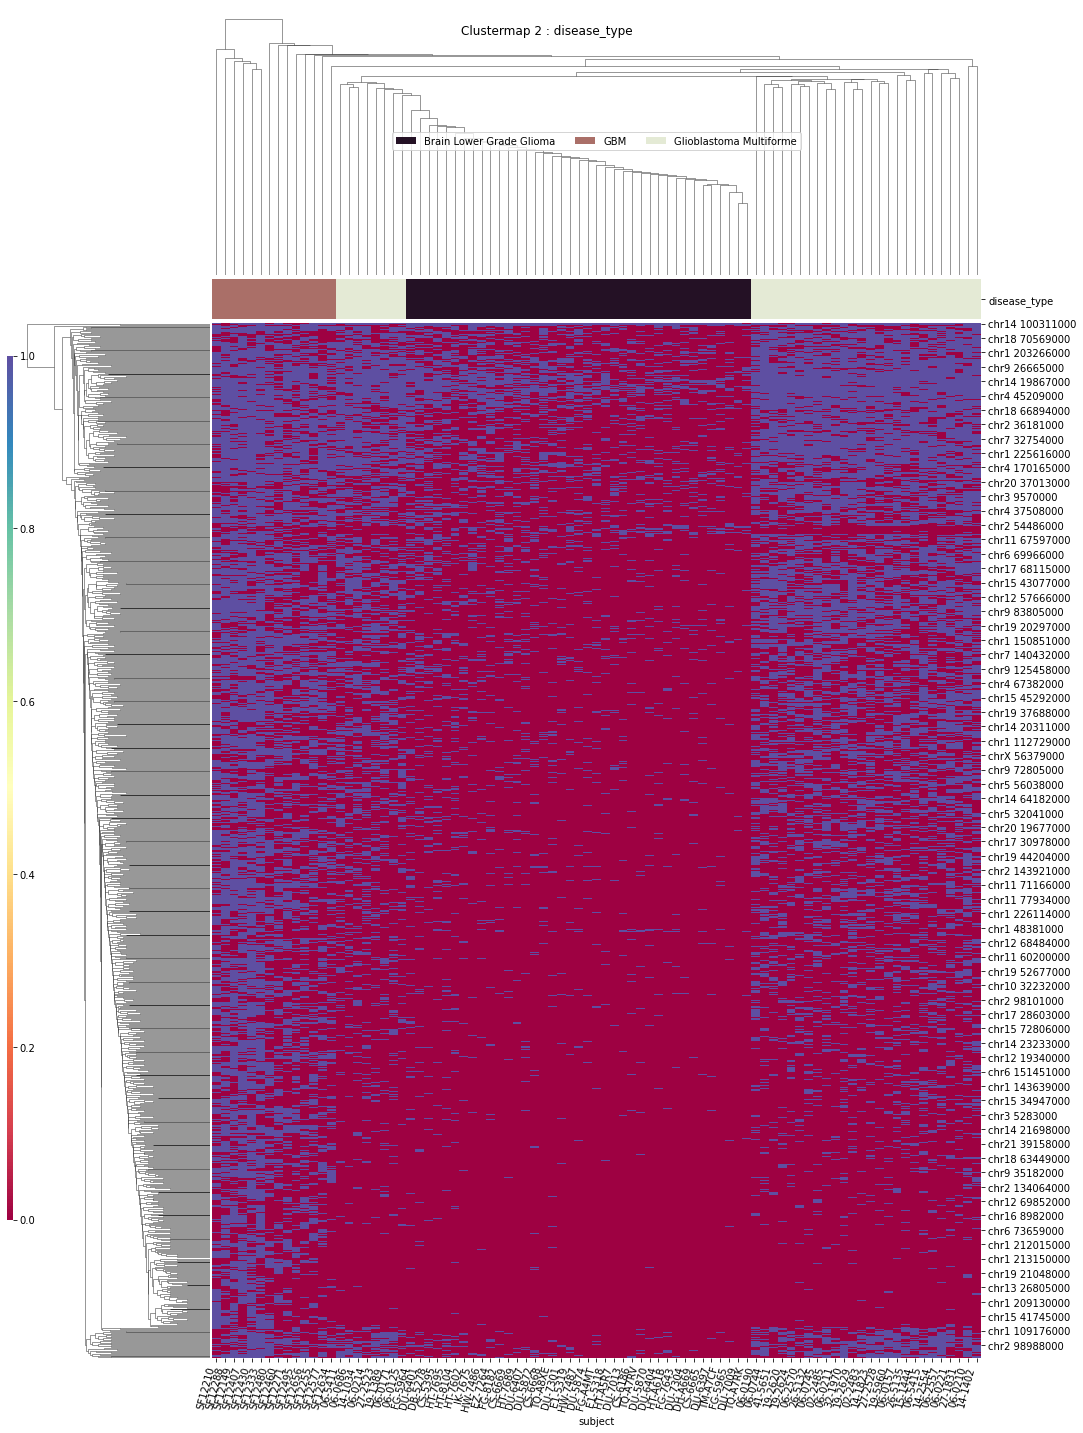

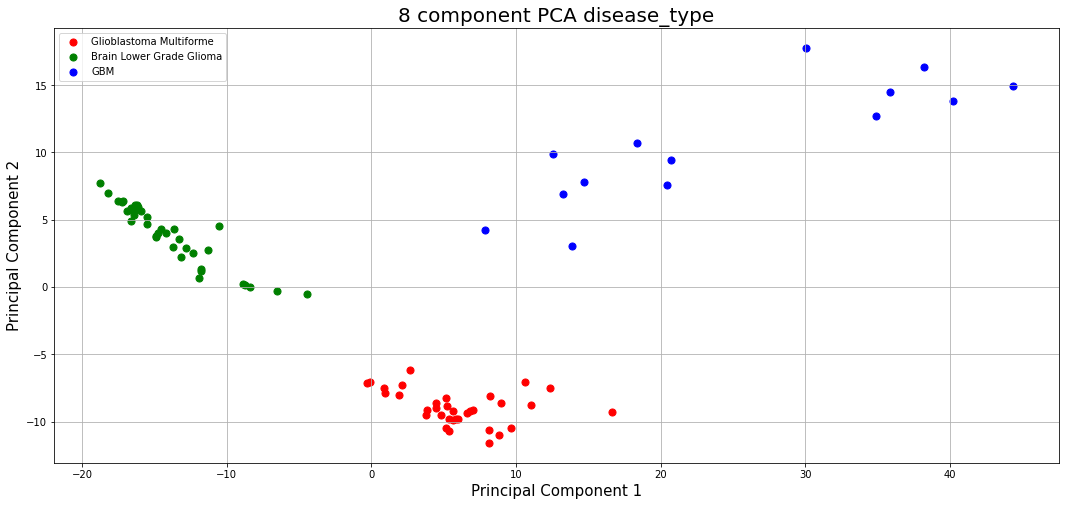

In [143]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [144]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:47:33'

---

In [145]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [146]:
pd.set_option('display.max_columns', default_max_columns)

In [147]:
pd.set_option('display.max_rows',default_max_rows)

In [148]:
pd.set_option('display.precision', default_precision)